In [ ]:
!nvidia-smi

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
HOME = "/content/"
print(HOME)

/content/


In [ ]:

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.5/78.2 GB disk)


In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True


/content
2023-12-01 22:17:13.523754: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-01 22:17:13.523856: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-01 22:17:13.523921: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-01 22:17:17.854558: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
imag

In [ ]:


!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet


from roboflow import Roboflow
rf = Roboflow(api_key="V5W4zrfksRgGIvrKaHtA")
project = rf.workspace("custom-thxhn").project("fire-wrpgm")
dataset = project.version(8).download("yolov8")

mkdir: cannot create directory ‘/content//datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.196`


Extracting Dataset Version Zip to fire-8 in yolov8::   0%|          | 0/1970 [00:00<?, ?it/s]

Extracting Dataset Version Zip to fire-8 in yolov8:: 100%|██████████| 1970/1970 [00:00<00:00, 4541.13it/s]


In [ ]:
!rm rf -d /content/datasets

In [ ]:
!cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

Extracting Dataset Version Zip to fire-8 in yolov8:: 100%|██████████| 1970/1970 [00:00<00:00, 4239.80it/s]


Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/fire-8/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspac

In [ ]:
!ls /content/runs/detect/train

In [ ]:
%cd {HOME}
Image(filename=f'/content/runs/detect/train2/confusion_matrix.png', width=600)

FileNotFoundError: ignored

In [ ]:
Image(filename=f'/content/runs/detect/train2/results.png', width=600)

In [ ]:
Image(filename=f'/content/runs/detect/train2/val_batch0_pred.jpg', width=600)

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model=/content/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml


/content
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/cfg/__init__.py", line 230, in entrypoint
    model = YOLO(model)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/engine/model.py", line 60, in __init__
    {'.pt': self._load, '.yaml': self._new}[suffix](model)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/engine/model.py", line 90, in _load
    self.model, self.ckpt = attempt_load_one_weight(weights)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 384, in attempt_load_one_weight
    ckpt = torch_safe_load(weight)  # load ckpt
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 332, in torch_safe_load
    return torch.load(file, map_location='cpu')  # load
  File "/usr/local/lib/python3.10/dist-packages/torch/serialization.py", line 986, in load
    with _open

In [ ]:
%cd {HOME}
video_path = '/content/accident.mp4'
!yolo task=detect mode=predict model={HOME}/datasets/runs/detect/train/weights/best.pt conf=0.25 source={video_path} save=True



/content
2023-12-01 02:41:24.750742: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-01 02:41:24.750813: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-01 02:41:24.750853: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-01 02:41:25.862816: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
video 1/1 (1/564) /content/accident.mp4: 480x800 110.7ms
vide

In [ ]:

import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/dog.jpeg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
!pip install ffmpeg

In [ ]:
import glob
from IPython.display import Video

# Display the output video
video_output_path = f'/content/output_video.mp4'  # Change the extension based on your needs

# Replace 'cv2.VideoWriter_fourcc(*'XVID')' with the appropriate codec for your system (e.g., 'MJPG', 'XVID', 'MP4V')
!ffmpeg -y -loglevel error -i /content/accident.mp4 -vcodec libx264 -pix_fmt yuv420p /content/output_video.mp4
# Display the output video in the notebook
Video(video_output_path,width=600)


/content/accident.mp4: No such file or directory


ValueError: ignored

#Final Code

In [ ]:
!ffmpeg -i /content/acc.3gpp -c:v libx264 -c:a aac -strict experimental /content/acc.mp4

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:

# Replace 'your_video.mp4' with the path to your pre-captured video file
video_path = '/content/accident21.mp4'

# Run YOLO in prediction mode on the video
!yolo task=detect mode=predict model=/content/best.pt conf=0.25 source={video_path} save=True


2023-12-01 20:06:04.980150: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-01 20:06:04.980227: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-01 20:06:04.980277: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-01 20:06:06.848475: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
video 1/1 (1/487) /content/accident21.mp4: 480x800 1 default, 579.0ms
video 1/1 (2/487) /conte

1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


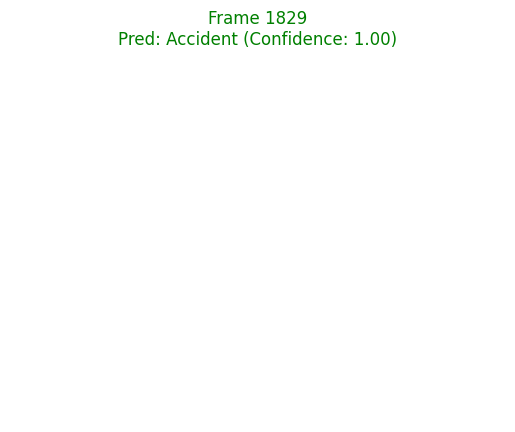

In [ ]:
import glob
from IPython.display import Video
# Load your Keras model
from keras.models import load_model
model = load_model('/content/AccidentDetectionModel.h5')


# Load your video
video_path = '/content/final.avi'
cap = cv2.VideoCapture(video_path)
class_names= ['Accident','Non-Accident']
# Get video properties
fps = cap.get(cv2.CAP_PROP_FPS)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Define the codec and create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Adjust the codec as needed
output_video_path_combined = '/content/output_video_combined.mp4'
out_combined = cv2.VideoWriter(output_video_path_combined, fourcc, fps, (frame_width, frame_height))


# Loop through video frames
for frame_idx in range(frame_count):
    ret, frame = cap.read()
    if not ret:
        break

    # Convert to RGB
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Preprocess the frame (adjust this based on your model's requirements)
    input_size = (300, 300)  # Adjust this based on your model's input size
    frame_preprocessed = cv2.resize(frame, input_size)
    frame_preprocessed = frame_preprocessed.astype("float32") / 255.0
    frame_preprocessed = np.expand_dims(frame_preprocessed, axis=0)

    # Make predictions for the frame
    predictions = model.predict(frame_preprocessed)

    # Get predicted label and confidence
    pred_label = class_names[np.argmax(predictions)]
    confidence = np.max(predictions)

    # Display the prediction and confidence on the frame
    cv2.putText(frame, f'Prediction: {pred_label}', (500, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
    cv2.putText(frame, f'Confidence: {confidence:.2f}', (500, 70), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

    # # Display the frame with prediction
    # ax = plt.subplot(10, 4, frame_idx + 1)
    # plt.imshow(frame)

    # Adjust the title based on prediction correctness
    if confidence > 0.5:
        plt.title(f'Frame {frame_idx + 1}\nPred: {pred_label} (Confidence: {confidence:.2f})', color="green")
    else:
        plt.title(f'Frame {frame_idx + 1}\nPred: {pred_label} (Low Confidence)', color="red")

    plt.axis('off')
    plt.grid(True)

    # Write the frame to the output video
    out_combined.write(cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))

# Save the plotted figure
# plt.savefig('/content/video_predictions.png')

# Release the video capture and writer objects
cap.release()
out_combined.release()


# Display the combined output video in the notebook
Video('/content/output_video_combined.mp4', width=600)


In [ ]:
!pip install -q super-gradients==3.2.1
!pip install filterpy==1.1.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 684.5/684.5 kB 34.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 55.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 58.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 408.6/408.6 kB 43.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 82.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 105.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.0/68.0 kB 9.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to b

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import cv2
import torch
from super_gradients.training import models
import numpy as np
import math
from numpy import random
from IPython.display import HTML
from base64 import b64encode
import os

[2023-12-08 09:54:41] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it


The console stream is logged into /root/sg_logs/console.log


[2023-12-08 09:54:41] WARNING - __init__.py - Failed to import pytorch_quantization
[2023-12-08 09:54:41] INFO - utils.py - NumExpr defaulting to 2 threads.
/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
[2023-12-08 09:54:55] WARNING - calibrator.py - Failed to import pytorch_quantization
[2023-12-08 09:54:55] WARNING - export.py - Failed to import pytorch_quantization
[2023-12-08 09:54:55] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization
[2023-12-08 09:54:55] WARNING - env_sanity_check.py - Failed to verify installed packages: boto3 required but not found
[2023-12-08 09:54:55] WARNING - env_sanity_check.py - Failed to verify installed packages: deprecated required but not found
[2023-12-08 09:54:55] WARNING - env_sanity_check.py - Failed to verify installed packages: coverage required but not found
[2023-12-08 09:54:55] WARNING

In [ ]:
def load_model(model_name):
    # Check if CUDA (GPU) is available and set the device accordingly
    device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

    # Load the specified model
    model = models.get(model_name, pretrained_weights="coco").to(device)
    return model

In [ ]:
model_name = 'yolo_nas_s'
model = load_model(model_name)

[2023-12-08 09:54:56] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
Downloading: "https://sghub.deci.ai/models/yolo_nas_s_coco.pth" to /root/.cache/torch/hub/checkpoints/yolo_nas_s_coco.pth
100%|██████████| 73.1M/73.1M [00:02<00:00, 34.6MB/s]
[2023-12-08 09:54:59] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_s


In [ ]:
def cococlassNames():
  class_names = ["person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck", "boat", "traffic light", "fire hydrant", "stop sign", "parking meter", "bench", "bird", "cat", "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "backpack", "umbrella","handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball", "kite", "baseball bat","baseball glove", "skateboard", "surfboard", "tennis racket", "bottle", "wine glass", "cup","fork", "knife", "spoon", "bowl", "banana", "apple", "sandwich", "orange", "broccoli","carrot", "hot dog", "pizza", "donut", "cake", "chair", "sofa", "pottedplant", "bed","diningtable", "toilet", "tvmonitor", "laptop", "mouse", "remote", "keyboard", "cell phone","microwave", "oven", "toaster", "sink", "refrigerator", "book", "clock", "vase", "scissors","teddy bear", "hair drier", "toothbrush" ]
  return class_names


In [ ]:
classNames = cococlassNames()

In [ ]:
def get_video_info(video_path):
    # Open the video file
    cap = cv2.VideoCapture(video_path)

    # Check if the video file is opened successfully
    if not cap.isOpened():
        raise ValueError("Error: Could not open the video file.")

    # Get the frame width and frame height
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    return cap, frame_width, frame_height

In [ ]:
video_path = '/content/accident2 (2).mp4'
cap, frame_width, frame_height = get_video_info(video_path)


In [ ]:
out=cv2.VideoWriter('final.avi', cv2.VideoWriter_fourcc('M', 'J', 'P', 'G'), 20, (frame_width, frame_height))
count=0
while True:
  ret, frame=cap.read()
  count+=1
  if ret:
    result=list(model.predict(frame, conf=0.5))[0]
    bbox_xyxys=result.prediction.bboxes_xyxy.tolist()
    confidences=result.prediction.confidence
    labels=result.prediction.labels.tolist()
    for (bbox_xyxy, confidence, cls) in zip(bbox_xyxys, confidences, labels):
      bbox=np.array(bbox_xyxy)
      x1, y1, x2, y2 = bbox[0], bbox[1], bbox[2], bbox[3]
      x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
      classname=int(cls)
      class_name=classNames[classname]
      conf=math.ceil((confidence*100))/100
      label=f'{class_name}{conf}'
      print("Frame N", count, "", x1, y1,x2, y2)
      #Create Bounding Boxes around the Detected Objects
      cv2.rectangle(frame, (x1, y1), (x2, y2), color=(0, 0, 255, 0.6),thickness=2, lineType=cv2.LINE_AA)
      #Create a rectangle above the detected object and add label and confidence score
      t_size=cv2.getTextSize(str(label), 0, fontScale=1/2, thickness=1)[0]
      c2=x1+t_size[0], y1-t_size[1]-3
      cv2.rectangle(frame, (x1, y1), c2, color=(0, 0, 255, 0.6), thickness=-1, lineType=cv2.LINE_AA)
      cv2.putText(frame, str(label), (x1, y1-2), 0, 1/2, [255, 255, 255], thickness=1, lineType=cv2.LINE_AA)
    out.write(frame)
  else:
    break
out.release()
cap.release()




[2023-12-08 09:58:29] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-12-08 09:58:36] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1  746 468 810 523
Frame N 1  916 530 987 584
Frame N 1  805 438 868 494
Frame N 1  482 333 540 381


[2023-12-08 09:58:37] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 2  745 468 811 524
Frame N 2  806 439 870 495
Frame N 2  917 533 989 587
Frame N 2  482 333 541 381
Frame N 2  580 289 630 335
Frame N 2  766 349 814 385
Frame N 2  786 407 838 451


[2023-12-08 09:58:37] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 3  747 470 813 526
Frame N 3  920 535 990 590
Frame N 3  807 440 872 496
Frame N 3  766 350 814 387
Frame N 3  787 411 838 450
Frame N 3  482 333 541 381


[2023-12-08 09:58:37] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 4  747 472 814 528
Frame N 4  921 538 992 592
Frame N 4  788 411 838 451
Frame N 4  482 333 540 381
Frame N 4  809 446 875 496
Frame N 4  767 351 815 387
Frame N 5  749 475 814 530


[2023-12-08 09:58:37] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 5  924 539 995 594
Frame N 5  787 411 839 454
Frame N 5  812 450 877 498
Frame N 5  767 351 815 390
Frame N 5  482 333 541 381


[2023-12-08 09:58:37] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 6  749 476 815 531
Frame N 6  926 542 997 597
Frame N 6  768 351 816 391
Frame N 6  786 411 839 455
Frame N 6  482 333 540 381


[2023-12-08 09:58:38] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 7  749 478 816 534
Frame N 7  928 542 999 599
Frame N 7  813 445 882 502
Frame N 7  769 352 816 391
Frame N 7  787 413 839 457
Frame N 7  482 333 540 382


[2023-12-08 09:58:38] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 8  750 480 816 535
Frame N 8  930 545 1002 602
Frame N 8  787 413 840 458
Frame N 8  818 453 884 505
Frame N 8  482 333 540 381
Frame N 8  769 354 817 393
Frame N 9  750 482 817 537
Frame N 9  932 548 1003 604
Frame N 9  820 448 886 507
Frame N 9  785 416 837 460


[2023-12-08 09:58:38] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 9  482 333 540 382
Frame N 10  751 482 819 538
Frame N 10  933 550 1005 606
Frame N 10  786 416 837 460
Frame N 10  821 451 888 508
Frame N 10  482 333 540 383


[2023-12-08 09:58:38] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-12-08 09:58:38] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 11  752 483 820 541
Frame N 11  935 552 1009 609
Frame N 11  663 316 709 363
Frame N 11  482 333 540 383
Frame N 11  785 419 837 461
Frame N 11  822 442 890 510


[2023-12-08 09:58:39] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 12  753 485 820 542
Frame N 12  825 454 892 513
Frame N 12  936 554 1011 612
Frame N 12  785 420 837 463
Frame N 12  482 333 540 383
Frame N 12  662 312 710 364
Frame N 12  751 317 796 354


[2023-12-08 09:58:39] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 13  753 487 822 546
Frame N 13  826 454 893 514
Frame N 13  785 421 839 465
Frame N 13  482 333 540 383
Frame N 13  772 357 822 398


[2023-12-08 09:58:39] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 14  755 488 824 548
Frame N 14  829 457 896 517
Frame N 14  785 422 839 466
Frame N 14  940 558 1015 617
Frame N 14  481 333 540 383


[2023-12-08 09:58:40] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 15  755 489 824 549
Frame N 15  941 561 1016 619
Frame N 15  481 332 540 382
Frame N 15  829 458 900 517
Frame N 15  785 423 839 467


[2023-12-08 09:58:40] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 16  756 492 825 551
Frame N 16  785 425 839 468
Frame N 16  832 457 902 519
Frame N 16  775 360 825 400
Frame N 16  482 332 541 381
Frame N 16  945 565 1019 622


[2023-12-08 09:58:40] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 17  756 493 826 551
Frame N 17  775 361 825 401
Frame N 17  785 426 838 469
Frame N 17  946 567 1021 625
Frame N 17  482 332 540 381
Frame N 17  835 455 904 521
Frame N 18  757 495 827 553


[2023-12-08 09:58:40] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 18  947 570 1023 628
Frame N 18  482 332 540 382
Frame N 18  776 363 825 402
Frame N 18  784 427 837 470
Frame N 18  836 460 905 523


[2023-12-08 09:58:40] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 19  757 495 828 555
Frame N 19  785 429 839 471
Frame N 19  776 364 827 403
Frame N 19  950 570 1027 630
Frame N 19  482 333 541 382


[2023-12-08 09:58:41] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 20  760 499 830 558
Frame N 20  952 574 1028 633
Frame N 20  777 363 828 405
Frame N 20  839 465 911 527
Frame N 20  784 430 838 474
Frame N 20  482 333 540 382


[2023-12-08 09:58:41] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 21  761 502 830 559
Frame N 21  955 576 1031 636
Frame N 21  842 470 912 528
Frame N 21  783 432 837 475
Frame N 21  777 365 828 406
Frame N 21  482 332 541 381
Frame N 22  763 503 831 562
Frame N 22  778 366 828 407
Frame N 22  783 432 837 477
Frame N 22  957 580 1032 638


[2023-12-08 09:58:41] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 22  482 332 541 381
Frame N 23  763 503 833 564
Frame N 23  779 366 828 408
Frame N 23  846 468 916 533
Frame N 23  784 434 838 478
Frame N 23  959 582 1037 641
Frame N 23  482 332 541 381


[2023-12-08 09:58:41] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-12-08 09:58:41] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 24  764 505 834 566
Frame N 24  962 583 1037 644
Frame N 24  780 366 829 409
Frame N 24  847 473 918 534
Frame N 24  784 436 838 480
Frame N 24  482 332 541 382


[2023-12-08 09:58:42] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 25  765 508 835 568
Frame N 25  964 586 1040 648
Frame N 25  850 472 920 536
Frame N 25  780 367 830 409
Frame N 25  783 436 837 482
Frame N 25  481 333 540 381


[2023-12-08 09:58:42] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 26  765 510 836 570
Frame N 26  965 589 1043 650
Frame N 26  784 439 837 483
Frame N 26  852 479 922 538
Frame N 26  782 368 832 411
Frame N 26  481 333 540 381
Frame N 27  765 511 837 573
Frame N 27  966 590 1046 653
Frame N 27  853 478 924 541
Frame N 27  784 440 837 484


[2023-12-08 09:58:42] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 27  482 332 540 381
Frame N 28  766 513 838 574
Frame N 28  854 477 926 543
Frame N 28  782 441 838 486
Frame N 28  970 594 1047 656
Frame N 28  482 332 540 381


[2023-12-08 09:58:42] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-12-08 09:58:43] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 29  768 514 839 575
Frame N 29  973 596 1052 658
Frame N 29  856 478 929 545
Frame N 29  783 442 839 487
Frame N 29  482 333 540 381
Frame N 29  785 371 834 413


[2023-12-08 09:58:43] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 30  768 515 840 577
Frame N 30  974 599 1053 662
Frame N 30  860 481 931 545
Frame N 30  784 443 838 489
Frame N 30  482 333 540 382
Frame N 31  769 517 842 581
Frame N 31  977 602 1056 665
Frame N 31  481 333 540 382


[2023-12-08 09:58:43] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 31  784 445 838 490


[2023-12-08 09:58:43] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 32  770 520 843 584
Frame N 32  979 606 1059 668
Frame N 32  784 447 837 493
Frame N 32  481 333 540 382
Frame N 32  863 487 935 551


[2023-12-08 09:58:44] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 33  772 521 844 585
Frame N 33  981 606 1061 670
Frame N 33  784 447 838 494
Frame N 33  481 333 540 382
Frame N 33  865 489 938 553
Frame N 33  763 333 814 374
Frame N 34  772 525 845 586


[2023-12-08 09:58:44] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 34  983 608 1062 673
Frame N 34  783 450 838 497
Frame N 34  481 333 540 382
Frame N 34  866 487 940 555
Frame N 34  765 335 815 375
Frame N 34  861 460 922 510
Frame N 35 

[2023-12-08 09:58:44] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


 773 526 846 590
Frame N 35  985 613 1067 677
Frame N 35  783 451 838 498
Frame N 35  868 493 942 557
Frame N 35  481 333 540 382
Frame N 35  762 339 816 377


[2023-12-08 09:58:44] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 36  774 527 847 591
Frame N 36  988 615 1069 680
Frame N 36  783 453 838 500
Frame N 36  481 333 540 382
Frame N 36  764 338 816 378
Frame N 37  775 528 847 591
Frame N 37  990 618 1072

[2023-12-08 09:58:44] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


 683
Frame N 37  783 454 837 500
Frame N 37  481 333 541 383
Frame N 37  765 339 817 378
Frame N 37  872 496 945 561


[2023-12-08 09:58:45] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 38  776 530 849 595
Frame N 38  993 622 1075 686
Frame N 38  783 456 839 502
Frame N 38  481 333 540 383
Frame N 38  769 341 819 379
Frame N 38  875 498 948 565
Frame N 38  865 468 923 516
Frame N 38  790 382 844 425


[2023-12-08 09:58:45] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 39  777 534 850 597
Frame N 39  995 625 1077 690
Frame N 39  783 457 839 505
Frame N 39  481 333 541 382
Frame N 39  770 342 818 380
Frame N 39  791 381 845 426


[2023-12-08 09:58:45] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 40  997 629 1079 693
Frame N 40  778 535 851 598
Frame N 40  481 333 541 382
Frame N 40  782 460 839 507
Frame N 40  770 342 819 380
Frame N 40  792 383 845 427


[2023-12-08 09:58:46] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 41  778 536 854 601
Frame N 41  999 630 1083 696
Frame N 41  481 333 541 382
Frame N 41  794 383 846 428
Frame N 41  783 461 839 509
Frame N 41  771 343 820 383


[2023-12-08 09:58:46] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 42  780 537 855 602
Frame N 42  1003 633 1086 699
Frame N 42  481 333 541 382
Frame N 42  782 462 839 511
Frame N 42  883 506 958 573
Frame N 42  795 384 847 430
Frame N 42  869 474 928 521
Frame N 42  770 344 821 383


[2023-12-08 09:58:46] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 43  780 541 856 605
Frame N 43  1005 636 1088 702
Frame N 43  481 333 541 382
Frame N 43  782 464 839 511
Frame N 43  870 475 931 524
Frame N 43  771 344 822 384


[2023-12-08 09:58:47] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 44  781 543 856 605
Frame N 44  887 509 963 578
Frame N 44  481 333 541 382
Frame N 44  782 466 840 513
Frame N 44  1007 637 1091 705
Frame N 44  871 476 933 524


[2023-12-08 09:58:47] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 45  781 543 857 607
Frame N 45  481 333 541 381
Frame N 45  782 466 840 515
Frame N 45  1010 641 1094 708
Frame N 45  890 511 965 581
Frame N 45  872 477 934 524


[2023-12-08 09:58:48] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 46  784 546 858 612
Frame N 46  481 333 541 382
Frame N 46  1012 646 1097 712
Frame N 46  892 515 968 583
Frame N 46  783 470 840 516


[2023-12-08 09:58:48] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 47  783 548 860 615
Frame N 47  782 471 840 518
Frame N 47  481 333 541 382
Frame N 47  1015 648 1103 715
Frame N 47  894 517 971 584
Frame N 47  874 480 936 530


[2023-12-08 09:58:48] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 48  785 550 861 617
Frame N 48  782 473 839 519
Frame N 48  1018 650 1104 717
Frame N 48  481 333 541 382
Frame N 48  875 482 940 530


[2023-12-08 09:58:48] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 49  786 553 862 617
Frame N 49  782 474 841 522
Frame N 49  898 522 976 590
Frame N 49  481 332 541 382


[2023-12-08 09:58:49] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 50  786 555 863 622
Frame N 50  782 476 841 526


[2023-12-08 09:58:49] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 51  788 556 864 622
Frame N 51  902 527 980 595
Frame N 51  783 476 841 527


[2023-12-08 09:58:49] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 52  788 559 865 625
Frame N 52  783 479 841 529
Frame N 52  804 397 857 441
Frame N 53  789 561 867 628
Frame N 53  783 481 842 531
Frame N 53  907 530 985 600
Frame N 53  804 397 858 442


[2023-12-08 09:58:49] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-12-08 09:58:49] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 54  791 564 870 629
Frame N 54  783 483 843 533
Frame N 54  593 315 649 367
Frame N 54  1036 670 1123 718


[2023-12-08 09:58:50] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 55  793 566 870 632
Frame N 55  782 485 843 535
Frame N 55  911 535 990 604
Frame N 55  884 493 950 543
Frame N 55  593 316 650 367
Frame N 55  481 332 541 383


[2023-12-08 09:58:50] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 56  793 569 871 635
Frame N 56  913 537 993 607
Frame N 56  783 486 844 535
Frame N 57  796 570 873 637
Frame N 57  783 489 844 537
Frame N 57  888 496 954 548


[2023-12-08 09:58:50] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 57  915 538 995 609
Frame N 57  481 333 540 383
Frame N 57  808 403 861 447
Frame N 58  796 573 873 637
Frame N 58  784 490 845 539
Frame N 58  917 541 997 612
Frame N 58  888 497 955 549
Frame N 58  746 313 792 350


[2023-12-08 09:58:50] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 58  481 333 540 383


[2023-12-08 09:58:51] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 59  797 574 874 643
Frame N 59  785 493 845 542
Frame N 59  920 543 999 615
Frame N 59  481 333 540 382


[2023-12-08 09:58:51] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 60  796 575 877 647
Frame N 60  784 493 845 544
Frame N 60  921 546 1004 617
Frame N 60  481 333 540 381
Frame N 60  810 406 863 452
Frame N 61  797 578 878 649
Frame N 61

[2023-12-08 09:58:51] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


  785 496 845 546
Frame N 61  924 548 1005 620
Frame N 61  481 333 541 381
Frame N 61  892 502 959 553
Frame N 62  800 581 880 651
Frame N 62

[2023-12-08 09:58:51] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


  927 550 1009 623
Frame N 62  785 498 846 549
Frame N 62  787 366 841 404
Frame N 62  481 333 541 382
Frame N 62  894 504 962 557
Frame N 63  801 582 882 654
Frame N 63  785 499 847 550
Frame N 63  481 332 541 382


[2023-12-08 09:58:51] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 63  929 551 1011 625
Frame N 63  788 364 841 405
Frame N 64  802 585 883 657
Frame N 64  786 501 847 553
Frame N 64  481 333 541 382


[2023-12-08 09:58:52] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 64  814 409 869 457


[2023-12-08 09:58:52] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 65  786 502 848 555
Frame N 65  804 588 884 659
Frame N 65  933 557 1016 632
Frame N 65  481 333 541 382
Frame N 65  815 411 871 458
Frame N 66  803 590 885 660


[2023-12-08 09:58:52] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 66  786 505 850 557
Frame N 66  481 333 540 383
Frame N 66  936 558 1018 635
Frame N 66  791 367 846 409
Frame N 67  787 507 850 560
Frame N 67  805 592 887 664
Frame N 67  817 414 873 461


[2023-12-08 09:58:52] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 67  481 333 540 383
Frame N 67  791 367 846 410
Frame N 67  752 317 796 359
Frame N 68  807 595 889 666
Frame N 68  786 509 852 562


[2023-12-08 09:58:53] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 68  481 332 540 382
Frame N 68  792 368 846 411


[2023-12-08 09:58:53] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 69  808 597 890 670
Frame N 69  786 510 851 564
Frame N 69  820 416 875 464
Frame N 69  481 332 540 382
Frame N 69  792 370 845 411


[2023-12-08 09:58:53] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 70  809 600 893 670
Frame N 70  481 332 540 382
Frame N 70  787 511 852 566
Frame N 71  810 602 894 676
Frame N 71  787 515 852 568
Frame N 71  794 371 

[2023-12-08 09:58:53] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


847 413
Frame N 71  908 521 977 573
Frame N 71  481 333 540 382
Frame N 72  813 605 895 677
Frame N 72  788 518 853 570
Frame N 72  822 418 879 469
Frame N 72  795 374 848 415


[2023-12-08 09:58:53] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 72  481 333 540 382
Frame N 73  813 607 897 679
Frame N 73  788 519 853 573
Frame N 73  481 333 540 382
Frame N 73  797 375 850 415


[2023-12-08 09:58:54] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-12-08 09:58:54] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 74  813 609 899 682
Frame N 74  790 521 856 576
Frame N 74  823 420 881 472
Frame N 74  798 375 852 417
Frame N 74  912 525 981 579
Frame N 74  481 333 540 382
Frame N 74  955 581 1041 657


[2023-12-08 09:58:54] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 75  815 612 900 687
Frame N 75  791 523 861 578
Frame N 75  481 333 541 383
Frame N 76  816 614 901 688


[2023-12-08 09:58:54] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 76  791 525 861 580
Frame N 76  825 425 882 473
Frame N 76  481 333 540 383
Frame N 77  818 618 902 691
Frame N 77  792 527 860 583
Frame N 77  481 333 540 382
Frame N 77  828 425 883 475


[2023-12-08 09:58:55] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-12-08 09:58:55] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 78  818 620 905 695
Frame N 78  793 528 860 584
Frame N 78  481 333 540 382
Frame N 78  918 533 988 588
Frame N 79  819 622 906 698
Frame N 79  829 430 885 478


[2023-12-08 09:58:55] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 79  802 381 857 424
Frame N 79  919 534 990 590
Frame N 79  793 531 860 586
Frame N 79  481 333 540 382
Frame N 80  821 624 908 701
Frame N 80  794 534 861 589
Frame N 80  829 430 886 480
Frame N 80  919 535 992 592
Frame N 80  802 381 857 425


[2023-12-08 09:58:55] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 80  481 333 540 382
Frame N 80  970 596 1058 676
Frame N 81  822 626 911 703
Frame N 81  794 536 862 592
Frame N 81  831 431 888 482
Frame N 81  803 383 859 426
Frame N 81  922 540 994 594


[2023-12-08 09:58:55] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 81  481 333 540 382
Frame N 81  972 599 1060 679
Frame N 82  823 630 912 706
Frame N 82  795 535 863 594


[2023-12-08 09:58:56] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 82  804 383 860 427
Frame N 82  832 433 888 484
Frame N 82  926 541 996 597
Frame N 82  481 333 540 382
Frame N 82  692 390 743 430


[2023-12-08 09:58:56] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 83  796 540 865 596
Frame N 83  825 633 913 706
Frame N 83  805 384 861 428
Frame N 83  481 333 540 382
Frame N 83  692 390 743 430
Frame N 83  834 435 891 484
Frame N 83  927 543 998 599


[2023-12-08 09:58:56] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 84  828 637 914 710
Frame N 84  797 541 865 598
Frame N 84  834 436 892 486
Frame N 84  928 543 999 601
Frame N 84  481 333 540 381
Frame N 84  806 386 861 430
Frame N 84  980 608 1069 687


[2023-12-08 09:58:56] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 85  829 639 917 716
Frame N 85  798 542 866 600
Frame N 85  481 333 540 381
Frame N 85  835 439 893 488
Frame N 85  929 547 1002 603
Frame N 85  806 387 863 431
Frame N 85  694 391 744 432
Frame N 85  983 610 1073 692


[2023-12-08 09:58:57] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 86  830 640 918 716
Frame N 86  836 439 894 488
Frame N 86  932 548 1004 605
Frame N 86  985 614 1075 694
Frame N 86  481 333 540 381
Frame N 86  799 543 867 601


[2023-12-08 09:58:57] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 87  933 550 1005 606
Frame N 87  831 643 920 716
Frame N 87  987 617 1077 697
Frame N 87  481 333 539 381
Frame N 87  800 544 868 604
Frame N 87  837 438 894 490


[2023-12-08 09:58:57] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 88  833 647 922 716
Frame N 88  935 553 1007 609
Frame N 88  481 333 539 381
Frame N 89  802 552 871 610


[2023-12-08 09:58:57] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 89  834 650 924 717
Frame N 89  481 333 539 380
Frame N 89  936 554 1010 612
Frame N 89  840 440 898 493
Frame N 89  695 394 748 438
Frame N 90  803 553 872 612


[2023-12-08 09:58:57] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 90  840 442 899 494
Frame N 90  995 626 1087 706
Frame N 90  481 333 539 380
Frame N 90  833 653 925 718
Frame N 90  937 556 1011 615


[2023-12-08 09:58:58] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 91  803 557 874 616
Frame N 91  842 446 900 497
Frame N 91  481 333 539 380
Frame N 91  697 394 748 441
Frame N 91  813 394 867 437
Frame N 91  997 629 1091 709


[2023-12-08 09:58:58] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 92  804 559 874 617
Frame N 92  842 448 901 498
Frame N 92  1000 631 1094 713
Frame N 92  481 333 539 380


[2023-12-08 09:58:58] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 93  807 563 875 620
Frame N 93  843 450 903 502
Frame N 93  814 395 870 441
Frame N 93  943 563 1018 621
Frame N 93  482 333 539 380
Frame N 93  697 393 750 442


[2023-12-08 09:58:59] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 94  945 565 1020 623
Frame N 94  816 396 873 442
Frame N 94  845 449 905 502
Frame N 94  808 564 878 622


[2023-12-08 09:59:00] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 95  810 567 880 627
Frame N 95  817 398 872 443
Frame N 95  847 452 907 503
Frame N 95  947 567 1022 626
Frame N 95  481 333 540 382
Frame N 95  699 404 752 446


[2023-12-08 09:59:00] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 96  810 568 881 629
Frame N 96  817 398 872 444
Frame N 96  948 569 1023 629
Frame N 96  847 452 908 504
Frame N 96  700 402 753 446
Frame N 96  1149 280 1199 326


[2023-12-08 09:59:01] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 97  817 398 874 444
Frame N 97  951 571 1027 630
Frame N 97  847 453 909 505
Frame N 97  809 569 884 630
Frame N 97  1014 646 1108 717
Frame N 97  482 333 539 381


[2023-12-08 09:59:01] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 98  810 572 886 633
Frame N 98  818 400 875 447
Frame N 98  952 573 1028 632


[2023-12-08 09:59:01] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 99  814 573 891 636
Frame N 99  819 403 877 448
Frame N 99  480 333 539 382
Frame N 99  955 576 1031 634
Frame N 99  1145 279 1196 323


[2023-12-08 09:59:02] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 100  814 577 892 639
Frame N 100  956 579 1032 638
Frame N 100  819 404 877 449
Frame N 100  1142 278 1193 322
Frame N 100  603 344 664 403
Frame N 100  851 457 912 511
Frame N 100  700 400 756 450
Frame N 100  481 333 539 382


[2023-12-08 09:59:02] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 101  958 582 1034 641
Frame N 101  816 582 889 642
Frame N 101  481 333 539 381
Frame N 101  820 404 877 451
Frame N 101  701 402 757 452


[2023-12-08 09:59:02] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 102  960 582 1038 643
Frame N 102  817 581 893 644
Frame N 102  680 332 735 381
Frame N 102  481 333 539 380
Frame N 103  963 586 1040 645
Frame N 103  604 349 665 406
Frame N 103  818 584 894 648


[2023-12-08 09:59:02] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 103  481 333 540 381
Frame N 103  680 332 737 381
Frame N 103  524 278 583 344
Frame N 104  964 589 1042 647
Frame N 104  824 408 879 455
Frame N 104  819 589 897 651


[2023-12-08 09:59:03] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 104  481 333 540 381
Frame N 104  703 401 759 455
Frame N 104  605 351 664 407
Frame N 105  966 589 1044 650
Frame N 105  605 348 665 407
Frame N 105  481 333 540 381
Frame N 105  821 590 898 654
Frame N 105  682 333 738 

[2023-12-08 09:59:03] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


384
Frame N 105  702 402 761 456
Frame N 105  825 411 880 456


[2023-12-08 09:59:03] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 106  825 413 881 458
Frame N 106  969 592 1046 653
Frame N 106  481 333 540 381
Frame N 106  859 467 922 522
Frame N 106  605 358 665 408
Frame N 106  703 406 758 457


[2023-12-08 09:59:03] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 107  970 595 1047 655
Frame N 107  827 413 884 459
Frame N 107  481 333 540 381
Frame N 107  522 282 582 346
Frame N 107  861 468 923 522
Frame N 107  605 357 666 408


[2023-12-08 09:59:04] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 108  828 414 884 460
Frame N 108  481 333 540 381
Frame N 108  972 596 1049 658
Frame N 108  521 282 581 347
Frame N 108  606 364 666 409
Frame N 108  705 404 764 459
Frame N 108  825 600 901 662


[2023-12-08 09:59:04] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 109  828 415 886 461
Frame N 109  481 333 540 381
Frame N 109  974 599 1053 661
Frame N 109  521 283 580 348
Frame N 109  707 414 763 460


[2023-12-08 09:59:04] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 110  829 416 887 463
Frame N 110  976 601 1054 663
Frame N 110  482 333 540 381
Frame N 110  521 283 579 348
Frame N 110  707 414 765 461
Frame N 110  865 473 928 528
Frame N 110  829 605 902 667


[2023-12-08 09:59:04] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 111  830 417 888 464
Frame N 111  482 333 540 380
Frame N 111  707 414 764 463
Frame N 111  979 604 1056 665
Frame N 111  831 607 907 670
Frame N 111  520 283 579 348


[2023-12-08 09:59:05] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 112  831 419 889 466
Frame N 112  520 284 578 348
Frame N 112  832 608 910 674
Frame N 112  980 606 1059 667
Frame N 112  482 334 540 380
Frame N 112  708 417 765 464
Frame N 112  867 477 930 531


[2023-12-08 09:59:05] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 113  832 421 890 467
Frame N 113  708 419 765 467
Frame N 113  519 285 578 350
Frame N 113  482 334 539 380
Frame N 113  833 611 911 677
Frame N 113  1126 269 1174 313
Frame N 113  983 607 1061 671
Frame N 113  810 402 861 443


[2023-12-08 09:59:05] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 114  834 422 891 468
Frame N 114  710 420 766 468
Frame N 114  482 334 538 380
Frame N 114  836 613 914 680
Frame N 114  518 285 578 349
Frame N 114  985 612 1063 673
Frame N 114  869 479 933 536


[2023-12-08 09:59:05] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 115  835 423 892 468
Frame N 115  985 613 1067 675
Frame N 115  836 618 915 681
Frame N 115  482 334 538 380
Frame N 115  517 285 578 350
Frame N 115  871 480 933 537


[2023-12-08 09:59:05] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 116  835 424 892 471
Frame N 116  710 422 767 469
Frame N 116  990 615 1068 678
Frame N 116  482 334 538 380
Frame N 116  872 483 935 539
Frame N 116  837 620 920 685
Frame N 116  516 287 577 351
Frame N 116  785 364 837 408


[2023-12-08 09:59:06] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 117  836 426 894 473
Frame N 117  481 334 538 382
Frame N 117  991 618 1071 681
Frame N 117  712 423 767 472
Frame N 117  515 288 576 352
Frame N 117  839 621 919 689
Frame N 118  838 427 895 474


[2023-12-08 09:59:06] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 118  482 334 539 382
Frame N 118  992 620 1073 683
Frame N 118  786 365 839 411
Frame N 118  876 487 939 543
Frame N 118  840 626 924 692


[2023-12-08 09:59:06] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 119  838 428 898 475
Frame N 119  482 334 539 383
Frame N 119  875 488 941 546
Frame N 119  714 423 770 474
Frame N 119  995 622 1076 686
Frame N 119  787 366 840 412
Frame N 119  845 629 924 695


[2023-12-08 09:59:06] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 120  839 429 897 476
Frame N 120  878 490 942 547
Frame N 120  482 334 539 383
Frame N 120  714 423 770 476
Frame N 120  847 630 927 697
Frame N 120  787 368 842 412
Frame N 120  1115 265 1165 308


[2023-12-08 09:59:07] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 121  715 430 770 477
Frame N 121  608 380 668 422
Frame N 121  841 431 899 478
Frame N 121  847 636 930 701
Frame N 121  482 334 539 381
Frame N 121  513 288 575 354
Frame N 121  999 628 1080 693


[2023-12-08 09:59:07] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 122  715 430 771 477
Frame N 122  841 431 900 480
Frame N 122  847 636 930 703
Frame N 122  482 334 539 382
Frame N 122  880 492 945 551
Frame N 122  706 400 761 442
Frame N 122  608 380 669 421


[2023-12-08 09:59:07] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 123  716 431 772 479
Frame N 123  843 433 903 482
Frame N 123  482 333 539 383
Frame N 123  850 638 933 707
Frame N 123  882 495 947 553
Frame N 123  1005 632 1086 698
Frame N 123  609 381 670 423


[2023-12-08 09:59:07] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 124  716 431 772 481
Frame N 124  844 434 903 483
Frame N 124  482 333 540 382
Frame N 124  883 497 949 555
Frame N 124  1006 635 1088 700
Frame N 124  1110 263 1159 304


[2023-12-08 09:59:07] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 125  845 435 904 484
Frame N 125  883 499 950 557
Frame N 125  715 430 772 482
Frame N 125  481 333 540 382
Frame N 125  820 416 872 457


[2023-12-08 09:59:08] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 126  845 437 904 487
Frame N 126  715 432 773 484
Frame N 126  481 333 540 383
Frame N 126  886 500 952 559
Frame N 126  1009 640 1093 706
Frame N 126  609 384 670 425
Frame N 126  856 649 944 715


[2023-12-08 09:59:08] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 127  847 438 907 487
Frame N 127  887 502 954 561
Frame N 127  717 436 775 485
Frame N 127  481 334 539 383
Frame N 127  609 384 670 426
Frame N 127  1013 644 1095 709
Frame N 127  859 652 944 716


[2023-12-08 09:59:08] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 128  848 439 908 488
Frame N 128  717 436 775 486
Frame N 128  481 333 539 383
Frame N 128  889 504 956 563
Frame N 128  860 656 946 716
Frame N 128  1015 647 1099 712


[2023-12-08 09:59:09] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 129  891 504 957 566
Frame N 129  717 439 776 488
Frame N 129  849 441 909 490
Frame N 129  609 382 670 428
Frame N 129  481 333 540 382


[2023-12-08 09:59:09] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 130  850 443 911 493
Frame N 130  892 508 960 568
Frame N 130  608 379 670 429
Frame N 130  482 333 540 382
Frame N 130  719 439 778 489


[2023-12-08 09:59:09] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 131  851 442 912 494
Frame N 131  721 440 777 490
Frame N 131  482 333 539 382
Frame N 131  608 376 670 429
Frame N 131  1101 260 1150 300
Frame N 131  894 509 961 569


[2023-12-08 09:59:09] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 132  723 443 778 491
Frame N 132  852 445 914 496
Frame N 132  482 333 539 381


[2023-12-08 09:59:09] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 133  723 443 779 492
Frame N 133  853 446 915 497
Frame N 133  482 333 539 381
Frame N 134  723 445 780 495


[2023-12-08 09:59:10] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 134  854 448 916 501
Frame N 134  798 380 856 429
Frame N 134  481 333 538 382
Frame N 135  725 446 781 495
Frame N 135  855 450 918 501


[2023-12-08 09:59:10] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 135  899 517 967 578
Frame N 135  481 333 538 382


[2023-12-08 09:59:10] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 136  725 446 783 496
Frame N 136  856 450 918 502
Frame N 136  901 519 969 581
Frame N 136  481 333 538 382
Frame N 136  831 432 883 474


[2023-12-08 09:59:10] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 137  858 451 919 503
Frame N 137  725 448 782 499
Frame N 137  902 521 972 583
Frame N 137  480 332 538 382


[2023-12-08 09:59:11] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 138  859 454 920 505
Frame N 138  904 523 974 585
Frame N 138  727 450 783 500
Frame N 138  481 333 538 383
Frame N 139  727 450 785 500


[2023-12-08 09:59:11] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 139  861 456 922 506
Frame N 139  906 526 976 586
Frame N 139  481 333 538 383
Frame N 139  834 436 886 477


[2023-12-08 09:59:11] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 140  861 456 923 509
Frame N 140  728 451 786 503
Frame N 140  907 527 976 588
Frame N 140  836 435 890 479
Frame N 140  716 420 769 464
Frame N 140  482 333 538 383
Frame N 141  862 457 925 510


[2023-12-08 09:59:11] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 141  729 453 787 505
Frame N 141  837 437 888 482
Frame N 141  481 333 538 383
Frame N 142  863 457 926 512
Frame N 142  481 333 538 383
Frame N 142  730 454 787 506


[2023-12-08 09:59:12] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-12-08 09:59:12] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 143  865 460 928 513
Frame N 143  730 455 788 507
Frame N 143  481 333 538 383
Frame N 143  912 532 983 595


[2023-12-08 09:59:12] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 144  731 456 789 509
Frame N 144  865 463 929 516
Frame N 144  914 535 984 598
Frame N 144  839 441 894 487
Frame N 144  1086 253 1132 292
Frame N 144  480 332 538 382


[2023-12-08 09:59:12] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 145  866 465 934 519
Frame N 145  732 459 789 511
Frame N 145  916 538 987 601
Frame N 145  840 443 896 489
Frame N 145  1086 252 1132 293
Frame N 145  720 428 774 471
Frame N 145  480 332 537 382
Frame N 145  702 366 762 423


[2023-12-08 09:59:13] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 146  867 465 932 519
Frame N 146  733 459 790 512
Frame N 146  719 428 774 472
Frame N 146  841 443 896 490
Frame N 146  917 538 989 601
Frame N 146  480 332 538 383
Frame N 146  704 367 764 423


[2023-12-08 09:59:13] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 147  733 461 791 513
Frame N 147  869 467 935 521
Frame N 147  919 541 991 604
Frame N 147  480 332 537 382


[2023-12-08 09:59:13] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 148  870 467 936 522
Frame N 148  732 463 792 515
Frame N 148  921 544 993 607
Frame N 148  600 342 672 414
Frame N 148  718 429 771 475


[2023-12-08 09:59:14] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 149  871 471 936 524
Frame N 149  734 463 794 518
Frame N 149  923 546 995 610
Frame N 149  845 448 900 494
Frame N 149  1079 249 1125 290


[2023-12-08 09:59:14] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 150  873 472 939 525
Frame N 150  734 464 794 519
Frame N 150  925 548 996 611
Frame N 150  846 450 901 496


[2023-12-08 09:59:14] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 151  875 472 939 526
Frame N 151  734 466 795 520
Frame N 151  927 549 999 613
Frame N 151  847 452 902 498
Frame N 151  1078 248 1123 286


[2023-12-08 09:59:15] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 152  876 474 940 529
Frame N 152  735 467 796 522
Frame N 152  928 552 1000 616
Frame N 152  847 452 904 499
Frame N 152  1077 247 1122 286


[2023-12-08 09:59:15] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 153  877 476 942 532
Frame N 153  930 554 1002 618
Frame N 153  735 468 796 523
Frame N 153  848 454 903 500
Frame N 153  724 438 777 482
Frame N 153  817 404 876 455


[2023-12-08 09:59:16] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 154  878 477 943 533
Frame N 154  736 469 797 524
Frame N 154  931 557 1005 621
Frame N 154  724 438 778 483
Frame N 154  850 454 904 502
Frame N 154  1074 246 1120 285


[2023-12-08 09:59:16] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 155  879 480 945 534
Frame N 155  739 470 798 525
Frame N 155  725 440 780 483
Frame N 155  932 557 1007 623
Frame N 155  852 456 908 504
Frame N 155  1072 246 1120 285
Frame N 155  706 378 771 433


[2023-12-08 09:59:16] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 156  739 472 800 527
Frame N 156  935 560 1008 626
Frame N 156  881 480 947 535
Frame N 156  853 458 909 506
Frame N 156  724 440 780 485
Frame N 156  1071 246 1116 284


[2023-12-08 09:59:16] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 157  882 482 950 538
Frame N 157  740 472 801 528
Frame N 157  726 443 783 488
Frame N 157  853 458 911 508
Frame N 157  937 563 1011 629
Frame N 157  1071 245 1116 283


[2023-12-08 09:59:16] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 158  883 483 950 539
Frame N 158  740 476 801 530
Frame N 158  855 461 911 509
Frame N 158  727 444 782 488
Frame N 158  939 565 1012 631


[2023-12-08 09:59:17] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 159  886 485 950 542
Frame N 159  741 477 803 532
Frame N 159  940 567 1016 634
Frame N 159  856 462 916 509
Frame N 159  823 412 881 461
Frame N 159  727 444 781 492
Frame N 160  886 487 952 544


[2023-12-08 09:59:17] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 160  742 479 804 535
Frame N 160  858 464 915 512
Frame N 160  944 569 1017 636
Frame N 160  726 446 782 492
Frame N 161  886 489 953 546


[2023-12-08 09:59:17] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 161  743 481 804 536
Frame N 161  944 572 1019 638
Frame N 161  825 415 883 463
Frame N 161  859 465 917 514
Frame N 161  727 446 783 493


[2023-12-08 09:59:17] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 162  888 489 956 548
Frame N 162  744 482 806 536
Frame N 162  946 574 1022 641
Frame N 162  860 467 917 515
Frame N 162  826 416 888 466
Frame N 162  729 445 785 495
Frame N 162  610 414 674 461


[2023-12-08 09:59:17] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 163  889 492 956 550
Frame N 163  745 484 807 539
Frame N 163  947 576 1023 645
Frame N 163  730 449 785 495
Frame N 163  860 468 918 518
Frame N 164  891 494 958 551


[2023-12-08 09:59:18] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 164  746 486 807 541
Frame N 164  950 580 1025 647
Frame N 164  862 469 919 518
Frame N 164  827 417 890 469
Frame N 164  730 451 787 497
Frame N 165  893 496 961 553
Frame N 

[2023-12-08 09:59:18] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


165  747 486 808 541
Frame N 165  951 581 1028 649
Frame N 165  864 472 922 521
Frame N 165  730 451 786 498
Frame N 165  828 418 890 470
Frame N 166  748 488 809 544
Frame N 166  893 497 961 554
Frame N 166  953 582 1030 653


[2023-12-08 09:59:18] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 166  730 453 785 500
Frame N 166  866 475 923 522


[2023-12-08 09:59:18] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 167  748 489 811 546
Frame N 167  894 499 961 557
Frame N 167  955 585 1032 655
Frame N 167  734 454 788 501
Frame N 167  867 474 924 525


[2023-12-08 09:59:19] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 168  749 492 812 547
Frame N 168  897 502 963 560
Frame N 168  958 588 1034 657
Frame N 168  868 475 926 526


[2023-12-08 09:59:19] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 169  749 492 812 549
Frame N 169  958 589 1037 659
Frame N 169  898 502 965 561
Frame N 170  750 495 814 552


[2023-12-08 09:59:19] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 170  900 504 967 564
Frame N 170  960 591 1038 663
Frame N 170  733 458 790 507
Frame N 170  869 479 933 528


[2023-12-08 09:59:19] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 171  900 506 969 566
Frame N 171  751 495 815 553
Frame N 171  962 596 1041 665
Frame N 171  1054 237 1099 276


[2023-12-08 09:59:20] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 172  752 495 815 554
Frame N 172  901 509 970 566
Frame N 172  734 461 792 509
Frame N 172  965 598 1043 668
Frame N 172  871 483 933 532
Frame N 172  1054 237 1098 275
Frame N 173  753 499 816 556
Frame N 173  903 510 972 568


[2023-12-08 09:59:20] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 173  738 462 791 509
Frame N 173  873 483 935 534
Frame N 173  1053 237 1097 275
Frame N 173  967 600 1044 670


[2023-12-08 09:59:20] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 174  905 512 974 570
Frame N 174  755 501 817 557
Frame N 174  874 486 935 535
Frame N 174  969 603 1047 673
Frame N 174  1053 237 1096 274
Frame N 174  737 462 793 511


[2023-12-08 09:59:20] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 175  907 515 976 573
Frame N 175  755 502 818 560
Frame N 175  876 489 938 537
Frame N 175  971 605 1050 677
Frame N 175  1052 237 1095 274


[2023-12-08 09:59:20] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 176  908 516 977 575
Frame N 176  756 503 820 561
Frame N 176  877 491 940 541
Frame N 176  973 607 1053 680
Frame N 176  737 465 796 515


[2023-12-08 09:59:21] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 177  910 518 978 577
Frame N 177  756 504 821 564
Frame N 177  975 611 1054 682
Frame N 177  879 492 942 542
Frame N 177  738 469 796 516


[2023-12-08 09:59:21] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 178  757 505 823 566
Frame N 178  910 518 980 578
Frame N 178  881 493 944 544
Frame N 178  977 613 1057 686
Frame N 178  738 470 797 517


[2023-12-08 09:59:21] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 179  758 509 824 568
Frame N 179  912 521 982 581
Frame N 179  882 493 947 545
Frame N 179  1046 234 1091 271
Frame N 179  978 613 1060 688


[2023-12-08 09:59:21] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 180  759 510 824 569
Frame N 180  914 522 983 583
Frame N 180  1045 234 1089 271
Frame N 180  739 473 797 521


[2023-12-08 09:59:22] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 181  915 525 985 586
Frame N 181  761 511 826 570
Frame N 181  885 498 945 551
Frame N 181  741 474 798 522
Frame N 181  1045 235 1087 270


[2023-12-08 09:59:22] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 182  762 513 828 572
Frame N 182  915 527 987 588
Frame N 182  741 474 800 524


[2023-12-08 09:59:22] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 183  916 528 988 590
Frame N 183  763 516 829 573
Frame N 183  742 476 801 525
Frame N 183  988 625 1071 700
Frame N 183  887 501 946 553
Frame N 183  610 414 681 485
Frame N 184  919 530 990 591


[2023-12-08 09:59:22] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 184  764 517 829 576
Frame N 184  744 478 803 526
Frame N 184  989 628 1072 702
Frame N 184  889 503 951 555


[2023-12-08 09:59:22] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 185  765 518 831 579
Frame N 185  921 533 993 594
Frame N 185  746 480 804 527
Frame N 185  891 505 953 558
Frame N 185  992 631 1075 705


[2023-12-08 09:59:23] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 186  766 519 832 579
Frame N 186  745 481 805 530
Frame N 186  923 534 995 596
Frame N 186  1038 231 1082 267
Frame N 187  767 521 833 582


[2023-12-08 09:59:23] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 187  923 536 995 599
Frame N 187  746 481 807 531
Frame N 187  1038 230 1081 267
Frame N 187  854 448 917 506
Frame N 187  893 509 955 561


[2023-12-08 09:59:23] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 188  768 523 835 585
Frame N 188  925 539 997 600
Frame N 188  748 484 807 532
Frame N 188  894 509 958 564
Frame N 188  856 449 921 507


[2023-12-08 09:59:24] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 189  927 541 999 602
Frame N 189  770 524 836 586
Frame N 189  747 487 808 533
Frame N 189  895 510 963 566
Frame N 190  770 527 838 588
Frame N 190  928 542 1001 606


[2023-12-08 09:59:24] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 190  747 488 809 536
Frame N 191  770 528 839 590
Frame N 191  930 543 1002 606
Frame N 191  749 489 810 539


[2023-12-08 09:59:24] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-12-08 09:59:24] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 192  771 531 840 591
Frame N 192  931 546 1004 610
Frame N 192  749 490 811 541
Frame N 192  899 518 965 573
Frame N 192  750 318 800 357
Frame N 192  612 427 685 497


[2023-12-08 09:59:24] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 193  772 532 841 593
Frame N 193  933 548 1006 612
Frame N 193  749 491 812 542
Frame N 193  751 318 801 358
Frame N 193  860 456 926 515


[2023-12-08 09:59:25] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 194  934 549 1008 615
Frame N 194  773 533 843 595
Frame N 194  752 493 813 545
Frame N 194  613 428 686 499


[2023-12-08 09:59:25] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 195  775 536 844 597
Frame N 195  752 494 814 545
Frame N 195  936 552 1010 616
Frame N 195  613 428 686 500


[2023-12-08 09:59:25] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 196  778 538 847 599
Frame N 196  753 496 815 548
Frame N 196  938 557 1012 620
Frame N 196  905 525 968 581
Frame N 197  778 540 848 602
Frame N 197  754 498 816 549
Frame N 197  939 556 1014 623
Frame N 197  866 462 932 523


[2023-12-08 09:59:25] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 197  613 431 687 503
Frame N 197  906 526 971 582
Frame N 197  754 321 804 361


[2023-12-08 09:59:25] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 198  755 498 817 551
Frame N 198  941 557 1016 625
Frame N 198  780 541 849 603
Frame N 198  613 432 687 505


[2023-12-08 09:59:26] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 199  756 502 819 553
Frame N 199  781 543 851 605
Frame N 199  943 560 1018 628


[2023-12-08 09:59:26] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 200  758 502 821 554
Frame N 200  781 543 852 608
Frame N 200  945 564 1020 631
Frame N 200  912 532 974 589
Frame N 200  613 432 687 506


[2023-12-08 09:59:27] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 201  759 504 822 557
Frame N 201  946 565 1022 631
Frame N 201  783 545 852 610
Frame N 201  872 469 935 529


[2023-12-08 09:59:27] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 202  784 546 854 612
Frame N 202  759 505 823 558
Frame N 202  947 567 1024 633
Frame N 202  872 470 938 531


[2023-12-08 09:59:27] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 203  785 549 855 614
Frame N 203  759 508 824 561
Frame N 203  948 570 1027 636
Frame N 203  917 539 978 595
Frame N 203  873 472 940 535


[2023-12-08 09:59:28] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 204  787 552 856 616
Frame N 204  760 508 826 562
Frame N 204  951 573 1028 638
Frame N 204  918 541 979 598


[2023-12-08 09:59:28] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 205  787 554 858 618
Frame N 205  761 510 826 565
Frame N 205  953 574 1031 642
Frame N 205  921 541 983 599


[2023-12-08 09:59:28] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 206  788 555 860 620
Frame N 206  763 511 828 565
Frame N 206  956 573 1032 644
Frame N 206  878 477 948 539


[2023-12-08 09:59:29] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 207  764 513 829 567
Frame N 207  957 578 1035 648
Frame N 207  789 557 862 622
Frame N 207  880 477 948 541
Frame N 207  736 435 812 501


[2023-12-08 09:59:29] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 208  791 559 864 625
Frame N 208  958 580 1037 651
Frame N 208  765 514 830 570
Frame N 208  882 481 949 544
Frame N 208  924 549 991 607


[2023-12-08 09:59:29] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 209  791 561 864 627
Frame N 209  961 583 1039 652
Frame N 209  765 516 831 570
Frame N 209  926 550 996 609


[2023-12-08 09:59:29] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 210  794 564 866 629
Frame N 210  963 589 1041 655
Frame N 210  767 519 832 574
Frame N 210  838 424 902 476
Frame N 210  884 485 952 548
Frame N 210  1139 284 1181 315
Frame N 210  928 551 991 611


[2023-12-08 09:59:30] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 211  964 590 1043 658
Frame N 211  795 565 867 632
Frame N 211  768 521 834 575
Frame N 211  931 555 992 613
Frame N 211  885 486 954 549
Frame N 211  840 425 905 477
Frame N 211  613 336 657 370


[2023-12-08 09:59:30] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 212  796 568 869 634
Frame N 212  966 591 1046 661
Frame N 212  769 523 836 577
Frame N 212  932 557 994 615
Frame N 212  886 488 955 550
Frame N 212  840 428 906 480


[2023-12-08 09:59:30] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 213  797 569 871 636
Frame N 213  770 524 837 578
Frame N 213  889 490 957 553
Frame N 213  969 595 1047 663
Frame N 213  614 337 661 372
Frame N 213  934 559 999 617
Frame N 213  1013 220 1053 254
Frame N 213  843 428 907 481


[2023-12-08 09:59:30] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 214  800 572 872 638
Frame N 214  771 526 839 582
Frame N 214  890 491 959 555
Frame N 214  615 338 663 372
Frame N 214  743 444 815 512
Frame N 214  971 595 1049 665
Frame N 214  936 560 1005 621


[2023-12-08 09:59:31] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 215  802 574 873 641
Frame N 215  972 597 1051 668
Frame N 215  772 527 840 583
Frame N 215  892 493 962 558
Frame N 215  936 562 1005 622
Frame N 215  617 338 665 373
Frame N 215  743 445 814 513
Frame N 215  1131 281 1172 311
Frame N 215  844 430 909 485


[2023-12-08 09:59:31] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 216  803 575 876 644
Frame N 216  774 529 842 584
Frame N 216  892 495 963 559
Frame N 216  974 599 1055 667
Frame N 216  743 445 818 515
Frame N 216  845 430 910 486
Frame N 216  939 565 1011 625


[2023-12-08 09:59:31] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 217  803 577 877 646
Frame N 217  776 530 843 586
Frame N 217  977 603 1057 673
Frame N 217  940 567 1010 627
Frame N 217  894 495 964 561
Frame N 217  1009 218 1049 251


[2023-12-08 09:59:31] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 218  777 532 844 588
Frame N 218  806 581 879 649
Frame N 218  979 604 1058 674
Frame N 218  1008 219 1048 251
Frame N 218  896 499 965 563


[2023-12-08 09:59:32] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 219  779 534 845 590
Frame N 219  805 581 881 652
Frame N 219  1007 218 1048 251
Frame N 219  620 342 670 374


[2023-12-08 09:59:32] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 220  808 584 883 654
Frame N 220  780 536 846 592
Frame N 220  1007 218 1046 251
Frame N 220  621 342 671 375


[2023-12-08 09:59:32] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 221  984 613 1066 686
Frame N 221  810 587 884 655
Frame N 221  1006 217 1045 250
Frame N 221  780 539 848 595
Frame N 221  900 506 963 570
Frame N 221  850 439 917 493
Frame N 221  623 341 674 376


[2023-12-08 09:59:32] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 222  986 617 1069 688
Frame N 222  852 440 917 493
Frame N 222  781 540 850 596
Frame N 222  810 589 885 659
Frame N 222  1005 216 1045 249
Frame N 222  902 507 973 571


[2023-12-08 09:59:33] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 223  782 542 850 599
Frame N 223  903 509 975 573
Frame N 223  988 619 1071 692
Frame N 223  1005 216 1044 249
Frame N 223  811 589 877 661
Frame N 223  627 342 675 377


[2023-12-08 09:59:33] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 224  783 543 853 600
Frame N 224  990 620 1073 694
Frame N 224  1005 216 1042 248
Frame N 224  814 591 888 653
Frame N 224  953 582 1024 645
Frame N 224  1117 274 1158 304
Frame N 224  627 344 679 378
Frame N 224  752 459 825 527


[2023-12-08 09:59:33] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 225  1004 216 1041 248
Frame N 225  784 544 854 603
Frame N 225  993 624 1076 697
Frame N 225  816 595 891 651
Frame N 225  1115 274 1157 304


[2023-12-08 09:59:33] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 226  786 547 845 606
Frame N 226  1001 216 1040 248
Frame N 226  957 588 1030 649
Frame N 227  789 549 857 607


[2023-12-08 09:59:33] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 227  817 598 894 670
Frame N 227  1000 215 1039 248
Frame N 227  631 345 681 378
Frame N 227  996 628 1080 702
Frame N 227  958 586 1030 652
Frame N 228  788 550 858 609


[2023-12-08 09:59:34] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 228  819 602 897 673
Frame N 228  1000 215 1038 248
Frame N 228  860 449 926 506
Frame N 228  631 345 682 378
Frame N 228  614 421 700 541


[2023-12-08 09:59:34] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 229  820 605 897 676
Frame N 229  791 552 860 611
Frame N 229  999 214 1037 247
Frame N 229  912 520 987 587
Frame N 229  860 450 928 507
Frame N 229  1001 636 1087 708
Frame N 229  963 594 1040 657


[2023-12-08 09:59:34] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 230  821 606 899 677
Frame N 230  802 555 861 612
Frame N 230  914 522 989 590
Frame N 230  998 213 1035 246
Frame N 230  863 452 930 509
Frame N 230  1003 638 1088 713
Frame N 230  622 470 700 548
Frame N 230  663 301 704 337
Frame N 230  757 467 836 537
Frame N 230  966 597 1043 661
Frame N 230  634 346 687 380


[2023-12-08 09:59:34] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 231  823 608 901 680
Frame N 231  792 556 862 615
Frame N 231  997 213 1035 246
Frame N 231  915 525 990 592
Frame N 231  759 468 834 538
Frame N 231  1005 641 1090 712


[2023-12-08 09:59:35] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 232  794 558 863 617
Frame N 232  825 609 902 682
Frame N 232  916 526 993 594
Frame N 232  997 213 1034 245
Frame N 232  866 454 931 512
Frame N 232  761 468 835 540
Frame N 232  622 472 701 549
Frame N 232  664 302 704 338
Frame N 232  1007 644 1092 712


[2023-12-08 09:59:35] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 233  795 560 865 619
Frame N 233  826 612 905 685
Frame N 233  997 213 1034 245
Frame N 233  918 527 994 596
Frame N 233  867 456 933 513
Frame N 233  623 476 701 551
Frame N 233  785 350 840 393
Frame N 233  665 303 705 338


[2023-12-08 09:59:35] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 234  828 614 907 687
Frame N 234  795 564 868 622
Frame N 234  867 457 934 515
Frame N 234  919 532 996 599
Frame N 234  996 212 1033 245
Frame N 234  623 476 702 553


[2023-12-08 09:59:36] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 235  829 617 908 690
Frame N 235  796 566 869 623
Frame N 235  922 533 997 601
Frame N 235  996 212 1033 244
Frame N 235  868 459 936 516
Frame N 235  623 478 702 552
Frame N 235  643 348 694 384


[2023-12-08 09:59:36] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 236  830 620 910 693
Frame N 236  799 567 871 626
Frame N 236  923 534 998 603
Frame N 236  868 460 937 519
Frame N 236  994 211 1032 244
Frame N 236  787 355 845 396


[2023-12-08 09:59:36] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 237  831 621 913 696
Frame N 237  800 569 871 627
Frame N 237  871 462 939 519
Frame N 237  992 210 1031 243
Frame N 237  624 479 703 557
Frame N 237  926 535 999 603


[2023-12-08 09:59:36] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 238  833 625 914 699
Frame N 238  801 573 873 631
Frame N 238  928 539 1004 607
Frame N 238  872 462 940 522
Frame N 238  790 356 847 398


[2023-12-08 09:59:36] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 239  835 628 916 702
Frame N 239  802 573 874 632
Frame N 239  624 482 705 562
Frame N 239  765 481 841 551
Frame N 239  929 540 1005 611
Frame N 239  873 466 942 523
Frame N 239  984 618 1057 685
Frame N 239  990 210 1029 242
Frame N 239  647 352 699 385


[2023-12-08 09:59:37] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 240  803 576 876 634
Frame N 240  767 482 845 554
Frame N 240  930 542 1008 613
Frame N 240  835 630 919 703
Frame N 240  624 482 706 563
Frame N 240  876 468 943 526
Frame N 240  985 619 1066 687
Frame N 240  989 210 1028 241
Frame N 240  793 357 849 400


[2023-12-08 09:59:37] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 241  804 577 877 637
Frame N 241  876 470 944 526
Frame N 241  766 483 850 557
Frame N 241  836 632 921 708
Frame N 241  932 544 1010 615
Frame N 241  624 483 706 565
Frame N 241  989 624 1075 690
Frame N 241  794 357 851 401
Frame N 241  988 208 1027 241


[2023-12-08 09:59:37] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 242  806 579 880 639
Frame N 242  877 470 945 529
Frame N 242  838 634 923 709
Frame N 242  767 484 848 557
Frame N 242  933 547 1012 617
Frame N 242  624 486 707 567
Frame N 242  991 626 1074 693
Frame N 242  987 207 1026 241


[2023-12-08 09:59:37] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 243  807 582 881 642
Frame N 243  880 471 947 530
Frame N 243  767 484 851 559
Frame N 243  936 549 1015 621
Frame N 243  840 635 924 711
Frame N 243  625 488 707 568
Frame N 243  994 629 1071 695
Frame N 243  796 360 853 403
Frame N 243  987 207 1025 240


[2023-12-08 09:59:38] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 244  808 582 883 646
Frame N 244  880 472 949 532
Frame N 244  843 637 925 714
Frame N 244  939 551 1016 622
Frame N 244  798 361 854 404
Frame N 244  768 487 850 561


[2023-12-08 09:59:38] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 245  808 585 885 647
Frame N 245  882 475 951 534
Frame N 245  767 489 851 563
Frame N 245  800 361 855 404
Frame N 245  940 554 1020 625
Frame N 245  626 492 707 572
Frame N 245  845 640 926 716
Frame N 245  985 206 1022 239
Frame N 245  997 633 1072 701


[2023-12-08 09:59:38] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 246  809 588 887 649
Frame N 246  883 476 951 535
Frame N 246  770 493 851 566
Frame N 246  627 494 708 573
Frame N 246  845 644 929 711
Frame N 246  941 554 1022 627
Frame N 246  984 207 1022 238


[2023-12-08 09:59:38] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 247  811 589 888 652
Frame N 247  883 478 952 538
Frame N 247  943 557 1024 630
Frame N 247  626 494 708 574
Frame N 247  773 493 852 567
Frame N 247  802 362 859 408
Frame N 247  847 647 929 708
Frame N 247  665 309 711 346
Frame N 247  984 206 1021 238


[2023-12-08 09:59:38] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 248  811 591 889 655
Frame N 248  884 478 954 539
Frame N 248  945 558 1026 632
Frame N 248  625 494 708 575
Frame N 248  983 205 1020 236
Frame N 248  774 493 852 569
Frame N 248  849 651 931 709
Frame N 248  803 363 861 408


[2023-12-08 09:59:39] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 249  815 592 890 656
Frame N 249  885 482 957 541
Frame N 249  627 496 709 576
Frame N 249  982 205 1020 236
Frame N 249  803 363 862 408
Frame N 249  947 563 1028 635
Frame N 249  772 494 853 570
Frame N 249  850 653 932 709
Frame N 249  660 359 718 390


[2023-12-08 09:59:39] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 250  818 595 894 659
Frame N 250  887 485 959 544
Frame N 250  852 655 933 714
Frame N 250  949 565 1030 637
Frame N 250  982 205 1019 236
Frame N 250  775 498 854 574
Frame N 250  805 364 864 409
Frame N 250  626 498 710 580


[2023-12-08 09:59:39] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 251  819 599 896 661
Frame N 251  888 487 959 546
Frame N 251  952 568 1031 641
Frame N 251  981 204 1019 235
Frame N 251  854 658 936 720
Frame N 251  810 369 865 410
Frame N 251  775 499 859 575
Frame N 251  628 499 711 581
Frame N 251  667 313 715 348


[2023-12-08 09:59:40] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 252  890 488 962 548
Frame N 252  820 601 897 664
Frame N 252  953 571 1035 645
Frame N 252  980 204 1018 234
Frame N 252  811 368 867 411
Frame N 252  777 499 862 576
Frame N 252  855 661 941 717
Frame N 252  629 501 712 582


[2023-12-08 09:59:40] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 253  821 603 899 667
Frame N 253  891 489 964 549
Frame N 253  980 203 1018 234
Frame N 253  954 572 1038 647
Frame N 253  812 370 868 412


[2023-12-08 09:59:41] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 254  823 606 901 670
Frame N 254  893 492 966 551
Frame N 254  956 575 1040 649
Frame N 254  778 504 863 580
Frame N 254  979 202 1016 234
Frame N 254  629 504 714 584
Frame N 254  858 666 944 720
Frame N 254  814 370 869 414


[2023-12-08 09:59:41] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 255  825 607 902 671
Frame N 255  896 492 967 553
Frame N 255  816 369 870 416
Frame N 255  958 575 1042 652
Frame N 255  631 506 714 587
Frame N 255  977 202 1015 234
Frame N 255  779 507 866 581
Frame N 255  859 669 946 718
Frame N 255  673 362 727 395


[2023-12-08 09:59:41] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 256  826 610 909 673
Frame N 256  898 494 968 554
Frame N 256  960 579 1045 655
Frame N 256  818 370 871 416
Frame N 256  675 362 727 396
Frame N 256  976 202 1014 233
Frame N 256  632 508 715 588


[2023-12-08 09:59:42] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 257  827 611 908 677
Frame N 257  898 495 971 556
Frame N 257  963 582 1047 656
Frame N 257  818 370 872 418
Frame N 257  631 509 716 590
Frame N 257  678 362 727 397
Frame N 257  781 508 862 584
Frame N 257  975 202 1013 234
Frame N 257  862 673 949 720


[2023-12-08 09:59:42] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 258  829 614 909 678
Frame N 258  899 496 972 559
Frame N 258  819 371 873 419
Frame N 258  781 510 865 587
Frame N 258  965 583 1049 660
Frame N 258  974 201 1014 233
Frame N 258  683 363 730 398
Frame N 258  863 677 968 720


[2023-12-08 09:59:42] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 259  901 498 974 561
Frame N 259  830 616 909 681
Frame N 259  782 513 865 590
Frame N 259  633 510 718 594
Frame N 259  821 371 873 419
Frame N 259  684 364 732 398
Frame N 259  974 201 1013 232
Frame N 259  968 586 1051 663
Frame N 259  770 309 822 352


[2023-12-08 09:59:43] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 260  832 621 912 685
Frame N 260  904 502 975 564
Frame N 260  783 513 866 592
Frame N 260  821 373 876 422
Frame N 260  633 512 719 597
Frame N 260  685 365 733 400
Frame N 260  974 202 1012 232
Frame N 260  970 588 1055 665
Frame N 260  771 309 825 353


[2023-12-08 09:59:43] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 261  904 503 977 565
Frame N 261  834 622 914 687
Frame N 261  786 515 867 593
Frame N 261  822 373 877 423
Frame N 261  974 201 1012 232
Frame N 261  687 365 735 401
Frame N 261  634 512 720 597
Frame N 261  972 591 1057 668


[2023-12-08 09:59:43] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 262  906 505 979 567
Frame N 262  835 623 916 689
Frame N 262  823 373 879 424
Frame N 262  787 516 868 596
Frame N 262  973 201 1011 231
Frame N 262  635 516 721 601
Frame N 262  974 593 1060 671
Frame N 262  688 363 736 401
Frame N 262  771 312 828 355


[2023-12-08 09:59:43] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 263  908 508 982 569
Frame N 263  836 627 918 692
Frame N 263  825 373 881 424
Frame N 263  636 517 721 602
Frame N 263  787 518 869 597
Frame N 263  978 596 1062 674
Frame N 263  973 202 1009 231
Frame N 263  690 365 737 402


[2023-12-08 09:59:43] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 264  908 508 983 571
Frame N 264  839 629 922 694
Frame N 264  826 375 881 425
Frame N 264  787 521 871 600
Frame N 264  691 367 742 403
Frame N 264  971 200 1007 231
Frame N 264  636 519 723 604
Frame N 264  979 598 1065 677


[2023-12-08 09:59:44] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 265  840 630 921 697
Frame N 265  912 510 985 573
Frame N 265  827 377 882 426
Frame N 265  637 520 723 605
Frame N 265  971 201 1006 231
Frame N 265  690 366 743 403
Frame N 265  788 525 874 602
Frame N 265  980 601 1066 679


[2023-12-08 09:59:44] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 266  913 511 986 575
Frame N 266  842 633 925 701
Frame N 266  828 379 882 426
Frame N 266  638 523 723 606
Frame N 266  690 367 746 404
Frame N 266  970 201 1005 231
Frame N 266  791 524 873 603
Frame N 266  984 605 1069 683
Frame N 266  626 469 727 559


[2023-12-08 09:59:44] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 267  914 514 987 578
Frame N 267  844 637 925 702
Frame N 267  828 380 884 428
Frame N 267  691 368 747 406
Frame N 267  794 526 874 605
Frame N 267  968 201 1005 231
Frame N 267  985 606 1072 686
Frame N 267  638 525 725 609


[2023-12-08 09:59:45] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 268  845 638 927 705
Frame N 268  915 516 989 580
Frame N 268  829 379 885 429
Frame N 268  987 607 1075 689
Frame N 268  692 367 749 407
Frame N 268  792 527 879 608
Frame N 268  639 526 725 612
Frame N 268  968 201 1004 230
Frame N 268  780 318 832 360


[2023-12-08 09:59:45] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 269  846 640 930 708
Frame N 269  917 519 991 582
Frame N 269  830 382 885 430
Frame N 269  794 531 878 610
Frame N 269  967 200 1004 229
Frame N 269  779 316 832 360
Frame N 269  989 610 1077 691
Frame N 269  692 369 749 407
Frame N 269  639 527 726 614


[2023-12-08 09:59:45] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 270  849 642 931 710
Frame N 270  918 520 993 585
Frame N 270  797 531 878 612
Frame N 270  831 382 886 431
Frame N 270  966 200 1003 229
Frame N 270  989 614 1079 694
Frame N 270  640 528 726 615
Frame N 270  694 368 750 407
Frame N 270  781 318 835 361


[2023-12-08 09:59:45] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 271  797 532 881 614
Frame N 271  920 521 996 587
Frame N 271  850 646 932 712
Frame N 271  832 382 886 432
Frame N 271  966 200 1002 228
Frame N 271  638 529 728 616
Frame N 271  993 616 1082 697
Frame N 271  699 372 752 408
Frame N 271  782 318 835 362


[2023-12-08 09:59:46] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 272  797 535 880 616
Frame N 272  923 523 997 588
Frame N 272  852 650 934 716
Frame N 272  832 382 887 433
Frame N 272  697 371 752 408
Frame N 272  640 531 729 619
Frame N 272  783 319 836 363
Frame N 272  995 620 1085 700
Frame N 272  965 200 1001 228
Frame N 272  630 476 731 572


[2023-12-08 09:59:46] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 273  924 524 1000 590
Frame N 273  798 536 882 617
Frame N 273  833 384 887 435
Frame N 273  852 652 938 719
Frame N 273  698 371 753 408
Frame N 273  785 319 839 363
Frame N 273  997 622 1088 702
Frame N 273  639 530 730 621
Frame N 273  965 198 1000 227


[2023-12-08 09:59:46] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 274  925 527 1001 593
Frame N 274  797 540 883 621
Frame N 274  833 386 889 436
Frame N 274  699 371 754 409
Frame N 274  854 655 943 720
Frame N 274  642 533 730 623
Frame N 274  1000 624 1090 706
Frame N 274  787 320 840 364
Frame N 274  964 197 1000 227


[2023-12-08 09:59:46] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 275  798 541 883 623
Frame N 275  927 529 1003 595
Frame N 275  856 656 941 719
Frame N 275  699 372 756 409
Frame N 275  833 387 890 437
Frame N 275  1003 627 1093 708
Frame N 275  787 320 841 364
Frame N 275  642 537 731 624


[2023-12-08 09:59:47] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 276  797 542 885 625
Frame N 276  834 389 890 439
Frame N 276  929 531 1004 598
Frame N 276  699 372 758 411
Frame N 276  858 660 944 720
Frame N 276  644 539 732 626
Frame N 276  789 322 842 365
Frame N 276  1005 630 1095 711


[2023-12-08 09:59:47] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 277  835 388 891 439
Frame N 277  799 544 885 626
Frame N 277  930 534 1006 599
Frame N 277  703 374 759 411
Frame N 277  860 662 946 719
Frame N 277  1006 640 1097 714
Frame N 277  645 541 733 622
Frame N 277  791 323 842 365


[2023-12-08 09:59:47] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 278  932 536 1009 601
Frame N 278  835 389 892 440
Frame N 278  704 374 761 412
Frame N 278  800 547 890 629
Frame N 278  863 665 946 719
Frame N 278  641 541 734 629
Frame N 278  1006 637 1101 716
Frame N 278  791 324 843 367


[2023-12-08 09:59:47] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 279  932 536 1012 603
Frame N 279  704 374 761 413
Frame N 279  802 547 890 631
Frame N 279  835 389 892 441
Frame N 279  1012 648 1104 718
Frame N 279  792 324 845 368
Frame N 279  624 316 675 351
Frame N 279  863 669 947 721
Frame N 279  643 542 735 632


[2023-12-08 09:59:47] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 280  705 375 762 414
Frame N 280  935 539 1013 606
Frame N 280  835 390 892 441
Frame N 280  1016 648 1105 717
Frame N 280  802 550 889 634
Frame N 280  865 670 949 721
Frame N 280  636 490 739 625
Frame N 280  624 317 675 353


[2023-12-08 09:59:48] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 281  707 375 764 415
Frame N 281  836 393 893 442
Frame N 281  937 539 1015 607
Frame N 281  801 550 893 620
Frame N 281  624 317 677 354
Frame N 281  866 671 953 720
Frame N 281  1017 645 1108 719
Frame N 281  635 493 737 584


[2023-12-08 09:59:48] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 282  939 541 1016 610
Frame N 282  708 376 765 415
Frame N 282  836 395 894 444
Frame N 282  803 554 893 638
Frame N 282  1019 647 1111 720
Frame N 282  635 491 740 622
Frame N 282  624 316 678 355
Frame N 282  795 325 849 370


[2023-12-08 09:59:48] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 283  709 376 768 416
Frame N 283  803 556 895 641
Frame N 283  836 396 895 446
Frame N 283  940 543 1019 613
Frame N 283  1023 651 1115 720
Frame N 283  955 193 992 224
Frame N 283  623 311 680 355
Frame N 283  796 326 850 370
Frame N 283  645 546 738 639


[2023-12-08 09:59:48] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 284  710 377 767 417
Frame N 284  837 397 896 448
Frame N 284  942 544 1022 615
Frame N 284  804 557 895 643
Frame N 284  1023 653 1117 720
Frame N 284  647 550 739 642
Frame N 284  798 326 851 371
Frame N 284  622 311 682 355
Frame N 284  637 494 741 596


[2023-12-08 09:59:48] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 285  944 549 1023 617
Frame N 285  838 398 896 449
Frame N 285  713 378 768 417
Frame N 285  806 559 899 645
Frame N 285  1026 655 1121 719
Frame N 285  648 554 739 645
Frame N 285  799 327 852 371


[2023-12-08 09:59:49] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 286  946 550 1026 619
Frame N 286  806 563 902 648
Frame N 286  714 380 768 419
Frame N 286  838 399 897 451
Frame N 286  648 556 740 646
Frame N 286  1029 659 1125 720
Frame N 286  801 329 852 372
Frame N 286  682 333 727 369
Frame N 286  623 310 684 358


[2023-12-08 09:59:49] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 287  714 380 769 419
Frame N 287  947 552 1028 622
Frame N 287  839 400 898 451
Frame N 287  810 564 896 625
Frame N 287  682 333 727 369
Frame N 287  626 310 686 359
Frame N 287  638 500 745 602
Frame N 287  802 329 853 372
Frame N 287  1031 662 1126 719


[2023-12-08 09:59:49] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 288  716 381 771 419
Frame N 288  840 399 899 452
Frame N 288  628 311 688 359
Frame N 288  683 333 728 369
Frame N 288  746 300 789 346
Frame N 288  803 330 855 373
Frame N 288  812 566 897 652
Frame N 288  638 501 746 646
Frame N 288  1035 666 1130 720


[2023-12-08 09:59:50] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 289  717 382 772 421
Frame N 289  952 554 1032 626
Frame N 289  809 567 898 654
Frame N 289  840 402 899 455
Frame N 289  683 333 729 370
Frame N 289  746 302 790 347
Frame N 289  629 315 689 359
Frame N 289  651 560 742 650


[2023-12-08 09:59:50] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 290  718 382 772 422
Frame N 290  684 333 730 370
Frame N 290  630 316 689 360
Frame N 290  954 561 1034 629
Frame N 290  745 303 790 347
Frame N 290  950 190 986 222
Frame N 290  813 570 898 657


[2023-12-08 09:59:50] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 291  719 382 772 422
Frame N 291  956 563 1036 631
Frame N 291  812 570 901 658
Frame N 291  684 334 730 372
Frame N 291  630 315 689 360
Frame N 291  949 189 985 221
Frame N 291  746 303 791 348
Frame N 291  841 405 900 456
Frame N 291  652 564 745 655
Frame N 291  807 332 859 377


[2023-12-08 09:59:50] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 292  958 564 1038 633
Frame N 292  720 382 775 423
Frame N 292  842 406 901 458
Frame N 292  812 572 903 661
Frame N 292  746 302 791 348
Frame N 292  684 336 732 372
Frame N 292  949 190 985 220
Frame N 292  652 564 746 659
Frame N 292  631 314 691 360
Frame N 292  808 332 860 378


[2023-12-08 09:59:51] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 293  962 566 1040 635
Frame N 293  720 383 776 424
Frame N 293  842 405 903 458
Frame N 293  812 574 906 663
Frame N 293  633 312 692 360
Frame N 293  807 333 861 378
Frame N 293  749 301 793 350
Frame N 293  684 336 731 372
Frame N 293  653 569 747 661
Frame N 293  947 190 983 220
Frame N 293  717 270 757 297


[2023-12-08 09:59:51] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 294  963 569 1043 638
Frame N 294  722 383 776 425
Frame N 294  813 577 910 666
Frame N 294  843 407 904 460
Frame N 294  747 301 794 350
Frame N 294  633 313 690 360
Frame N 294  684 336 732 373
Frame N 294  809 334 861 378
Frame N 294  653 571 748 662
Frame N 294  947 189 982 219
Frame N 294  718 270 758 299


[2023-12-08 09:59:51] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 295  964 570 1045 641
Frame N 295  723 385 777 426
Frame N 295  844 407 904 461
Frame N 295  814 581 908 668
Frame N 295  685 337 731 374
Frame N 295  947 190 981 219
Frame N 295  653 571 750 665
Frame N 295  634 313 691 360
Frame N 295  749 301 795 350


[2023-12-08 09:59:51] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 296  723 386 779 427
Frame N 296  966 572 1048 644
Frame N 296  845 408 906 463
Frame N 296  686 336 732 374
Frame N 296  636 312 694 360
Frame N 296  815 582 910 670
Frame N 296  946 190 982 219
Frame N 296  654 573 750 668


[2023-12-08 09:59:52] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 297  724 387 780 428
Frame N 297  968 575 1049 646
Frame N 297  846 412 907 464
Frame N 297  816 585 912 673
Frame N 297  685 338 732 375
Frame N 297  637 314 695 361
Frame N 297  945 189 982 219
Frame N 297  812 336 866 381
Frame N 297  653 574 751 670


[2023-12-08 09:59:52] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 298  724 387 780 428
Frame N 298  970 577 1051 648
Frame N 298  846 412 907 465
Frame N 298  638 313 695 361
Frame N 298  686 338 733 375
Frame N 298  811 335 866 382
Frame N 298  815 588 914 676
Frame N 298  944 187 981 218
Frame N 298  655 575 752 672


[2023-12-08 09:59:52] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 299  725 388 780 429
Frame N 299  972 578 1054 652
Frame N 299  847 414 908 467
Frame N 299  816 589 914 677
Frame N 299  687 339 733 376
Frame N 299  943 187 981 217
Frame N 299  642 315 700 362
Frame N 299  812 336 868 384
Frame N 299  753 304 797 353
Frame N 299  653 575 754 673


[2023-12-08 09:59:52] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 300  725 388 781 430
Frame N 300  974 582 1056 654
Frame N 300  848 415 908 467
Frame N 300  813 339 869 384
Frame N 300  820 591 911 680
Frame N 300  944 187 980 217
Frame N 300  686 340 734 378
Frame N 300  642 316 700 362
Frame N 300  657 578 754 677


[2023-12-08 09:59:53] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 301  726 389 781 431
Frame N 301  847 416 910 469
Frame N 301  975 582 1058 656
Frame N 301  822 592 912 682
Frame N 301  755 304 801 355
Frame N 301  943 187 979 216
Frame N 301  816 338 868 384
Frame N 301  688 340 736 377
Frame N 301  643 314 700 363
Frame N 301  658 581 754 679


[2023-12-08 09:59:53] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 302  978 586 1060 658
Frame N 302  726 390 782 431
Frame N 302  847 416 910 470
Frame N 302  822 593 914 685
Frame N 302  817 338 868 384
Frame N 302  942 187 977 216
Frame N 302  755 305 801 355
Frame N 302  643 314 702 364
Frame N 302  688 343 739 377


[2023-12-08 09:59:53] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 303  979 587 1063 661
Frame N 303  726 391 783 431
Frame N 303  848 418 911 471
Frame N 303  817 338 869 385
Frame N 303  941 187 975 216
Frame N 303  755 307 802 355
Frame N 303  822 597 915 686
Frame N 303  659 588 755 680
Frame N 303  644 316 702 363


[2023-12-08 09:59:54] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 304  727 392 783 433
Frame N 304  980 589 1064 664
Frame N 304  849 419 911 471
Frame N 304  941 187 975 215
Frame N 304  822 598 917 689
Frame N 304  659 589 756 685
Frame N 304  816 338 869 387
Frame N 304  646 314 703 363
Frame N 304  756 308 805 356


[2023-12-08 09:59:54] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 305  727 391 784 434
Frame N 305  983 591 1067 666
Frame N 305  851 422 912 473
Frame N 305  822 600 917 693
Frame N 305  818 341 871 387
Frame N 305  941 187 975 215
Frame N 305  756 310 806 357
Frame N 305  658 589 759 679


[2023-12-08 09:59:54] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 306  986 594 1069 668
Frame N 306  728 393 785 436
Frame N 306  649 532 762 687
Frame N 306  852 421 914 473
Frame N 306  940 187 975 215
Frame N 306  829 604 921 696
Frame N 306  757 309 807 358
Frame N 306  819 341 874 389
Frame N 306  651 315 703 365


[2023-12-08 09:59:55] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 307  988 598 1072 671
Frame N 307  729 394 785 436
Frame N 307  939 187 975 213
Frame N 307  827 606 924 698
Frame N 307  662 594 760 693
Frame N 307  852 421 915 475
Frame N 307  820 342 875 389
Frame N 307  758 313 808 359
Frame N 307  647 534 762 646
Frame N 307  653 315 705 365


[2023-12-08 09:59:55] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 308  989 598 1074 673
Frame N 308  729 394 785 436
Frame N 308  939 186 973 213
Frame N 308  825 607 925 699
Frame N 308  853 422 916 475
Frame N 308  649 535 762 690
Frame N 308  654 315 705 364
Frame N 308  759 311 808 359
Frame N 308  820 342 875 389
Frame N 308  690 340 739 380


[2023-12-08 09:59:55] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 309  991 602 1077 677
Frame N 309  730 395 787 437
Frame N 309  826 609 923 702
Frame N 309  938 186 973 213
Frame N 309  853 426 916 479
Frame N 309  821 346 877 391
Frame N 309  649 539 764 674
Frame N 309  689 345 738 383
Frame N 309  760 317 807 361


[2023-12-08 09:59:56] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 310  995 604 1080 679
Frame N 310  730 396 788 438
Frame N 310  827 612 927 705
Frame N 310  854 427 917 482
Frame N 310  938 186 971 213
Frame N 310  690 344 741 384


[2023-12-08 09:59:56] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 311  730 396 788 438
Frame N 311  996 605 1081 681
Frame N 311  854 427 918 481
Frame N 311  690 344 742 384
Frame N 311  829 613 932 707
Frame N 311  935 184 970 212
Frame N 311  656 316 708 367
Frame N 311  764 321 808 361
Frame N 311  823 346 878 392
Frame N 311  726 267 767 305


[2023-12-08 09:59:56] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 312  997 607 1083 684
Frame N 312  731 397 789 439
Frame N 312  855 430 920 483
Frame N 312  828 616 927 708
Frame N 312  935 183 970 212
Frame N 312  657 316 713 367
Frame N 312  727 266 767 306
Frame N 312  665 604 765 705
Frame N 312  763 323 811 362
Frame N 312  691 347 743 385
Frame N 312  824 345 880 393


[2023-12-08 09:59:57] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 313  1000 612 1086 688
Frame N 313  733 398 790 441
Frame N 313  856 428 920 485
Frame N 313  833 620 928 711
Frame N 313  935 184 970 211
Frame N 313  824 346 881 394
Frame N 313  657 317 710 369
Frame N 313  666 606 767 707


[2023-12-08 09:59:57] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 314  1003 612 1088 690
Frame N 314  857 429 922 485
Frame N 314  733 398 790 441
Frame N 314  829 621 930 713
Frame N 314  825 346 881 394
Frame N 314  11 19 619 604
Frame N 314  934 182 968 209
Frame N 314  1017 226 1052 251
Frame N 314  659 317 712 368
Frame N 314  669 608 768 709


[2023-12-08 09:59:57] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 315  1004 613 1090 692
Frame N 315  858 430 923 487
Frame N 315  734 399 790 441
Frame N 315  826 347 881 394
Frame N 315  830 622 930 710
Frame N 315  668 608 769 710
Frame N 315  933 182 968 209
Frame N 315  1016 226 1052 251
Frame N 315  766 326 815 363
Frame N 315  660 317 714 369


[2023-12-08 09:59:57] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 316  735 401 791 444
Frame N 316  859 435 925 488
Frame N 316  1005 616 1094 696
Frame N 316  933 183 968 210
Frame N 316  691 349 744 388
Frame N 316  827 348 882 396
Frame N 316  766 318 816 366
Frame N 316  831 627 930 702
Frame N 316  660 322 723 371
Frame N 316  1015 226 1052 250


[2023-12-08 09:59:57] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 317  735 401 791 445
Frame N 317  859 436 925 490
Frame N 317  691 348 743 388
Frame N 317  1008 619 1094 698
Frame N 317  828 349 883 397
Frame N 317  932 183 966 209
Frame N 317  661 322 723 371
Frame N 317  652 551 775 669
Frame N 317  768 322 816 366
Frame N 317  1014 226 1050 250
Frame N 317  832 630 935 715


[2023-12-08 09:59:58] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 318  736 402 791 445
Frame N 318  860 437 927 490
Frame N 318  663 323 722 371
Frame N 318  692 348 744 389
Frame N 318  1010 620 1096 700
Frame N 318  832 630 936 717
Frame N 318  769 318 818 366
Frame N 318  828 349 884 397
Frame N 318  931 182 968 209
Frame N 318  672 617 772 716


[2023-12-08 09:59:58] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 319  737 403 792 447
Frame N 319  863 438 928 492
Frame N 319  1011 625 1101 703
Frame N 319  663 325 720 372
Frame N 319  692 350 746 389
Frame N 319  770 317 817 367
Frame N 319  829 350 885 399
Frame N 319  651 553 777 670
Frame N 319  833 635 940 717
Frame N 319  931 182 968 209
Frame N 319  731 269 772 311


[2023-12-08 09:59:58] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 320  737 405 792 448
Frame N 320  864 439 929 492
Frame N 320  1013 628 1102 706
Frame N 320  835 636 944 716
Frame N 320  664 324 718 373
Frame N 320  692 352 745 390
Frame N 320  831 352 886 400
Frame N 320  653 555 777 673


[2023-12-08 09:59:59] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 321  737 404 793 448
Frame N 321  866 440 932 494
Frame N 321  1016 630 1105 709
Frame N 321  837 638 942 717
Frame N 321  665 324 718 373
Frame N 321  832 353 886 401
Frame N 321  692 351 744 389
Frame N 321  733 270 775 313
Frame N 321  771 315 821 367


[2023-12-08 09:59:59] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 322  738 405 793 449
Frame N 322  1019 633 1107 710
Frame N 322  867 441 933 496
Frame N 322  665 324 719 374
Frame N 322  832 352 887 401
Frame N 322  843 640 941 717
Frame N 322  692 351 744 390
Frame N 322  733 270 775 312
Frame N 322  675 625 776 713


[2023-12-08 09:59:59] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 323  738 408 793 449
Frame N 323  1019 636 1111 715
Frame N 323  867 443 933 498
Frame N 323  668 326 719 374
Frame N 323  694 352 744 391
Frame N 323  832 354 890 402
Frame N 323  842 642 940 718
Frame N 323  733 272 775 313
Frame N 323  675 629 778 717
Frame N 323  1009 223 1045 248


[2023-12-08 09:59:59] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 324  738 409 794 451
Frame N 324  869 445 936 500
Frame N 324  1024 638 1113 717
Frame N 324  830 354 890 403
Frame N 324  840 646 943 718
Frame N 324  669 326 721 375
Frame N 324  695 357 744 392
Frame N 324  928 182 963 209


[2023-12-08 10:00:00] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 325  739 409 794 451
Frame N 325  868 445 936 501
Frame N 325  1025 640 1116 719
Frame N 325  830 354 891 403
Frame N 325  841 646 944 720
Frame N 325  668 327 721 374
Frame N 325  695 358 745 392
Frame N 325  657 566 782 707


[2023-12-08 10:00:00] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 326  738 409 795 451
Frame N 326  868 445 937 502
Frame N 326  1028 643 1118 718
Frame N 326  845 650 944 719
Frame N 326  669 328 727 374
Frame N 326  830 355 889 404
Frame N 326  694 356 748 393
Frame N 326  657 568 782 684


[2023-12-08 10:00:00] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 327  739 412 796 453
Frame N 327  871 447 939 504
Frame N 327  1030 646 1122 717
Frame N 327  844 653 946 720
Frame N 327  658 571 783 713
Frame N 327  831 357 893 407
Frame N 327  671 327 724 376
Frame N 327  695 355 745 393


[2023-12-08 10:00:00] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 328  739 412 796 453
Frame N 328  872 448 941 505
Frame N 328  1033 649 1124 718
Frame N 328  659 573 786 711
Frame N 328  845 655 947 721
Frame N 328  671 327 724 376
Frame N 328  828 357 893 407
Frame N 328  736 272 779 315


[2023-12-08 10:00:01] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 329  739 413 796 455
Frame N 329  875 450 942 506
Frame N 329  1036 651 1126 719
Frame N 329  846 656 950 721
Frame N 329  658 574 788 711
Frame N 329  832 357 893 407
Frame N 329  672 327 727 376
Frame N 329  1003 221 1038 245
Frame N 329  736 272 779 315


[2023-12-08 10:00:01] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 330  740 413 797 456
Frame N 330  1037 655 1129 720
Frame N 330  874 451 943 508
Frame N 330  660 576 787 715
Frame N 330  847 659 951 720
Frame N 330  1002 220 1038 245
Frame N 330  697 357 745 397


[2023-12-08 10:00:01] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 331  740 414 797 457
Frame N 331  1040 656 1132 720
Frame N 331  875 451 946 508
Frame N 331  660 578 788 716
Frame N 331  698 357 746 397
Frame N 331  848 662 948 719
Frame N 331  837 362 893 410
Frame N 331  673 330 725 377


[2023-12-08 10:00:01] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 332  741 414 797 457
Frame N 332  1042 659 1135 720
Frame N 332  878 451 948 510
Frame N 332  661 580 793 717
Frame N 332  698 357 747 397
Frame N 332  838 362 894 410
Frame N 332  1001 220 1036 244
Frame N 332  673 329 727 377


[2023-12-08 10:00:02] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 333  742 414 798 459
Frame N 333  879 454 950 512
Frame N 333  1044 662 1138 721
Frame N 333  836 362 895 411
Frame N 333  698 359 748 398
Frame N 333  673 329 731 378
Frame N 333  739 276 781 318
Frame N 333  857 668 958 720


[2023-12-08 10:00:02] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 334  743 416 798 459
Frame N 334  881 454 951 514
Frame N 334  1047 666 1140 721
Frame N 334  740 276 781 320
Frame N 334  698 361 748 398
Frame N 334  665 584 796 715
Frame N 334  783 334 830 377
Frame N 334  674 331 732 378


[2023-12-08 10:00:02] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 335  743 416 800 461
Frame N 335  883 457 952 516
Frame N 335  1049 669 1142 720
Frame N 335  668 584 797 716
Frame N 335  699 363 748 400
Frame N 335  740 278 781 320
Frame N 335  674 331 734 379


[2023-12-08 10:00:02] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 336  743 417 800 461
Frame N 336  884 458 953 517
Frame N 336  669 589 798 718
Frame N 336  838 365 897 413
Frame N 336  741 276 783 320
Frame N 336  699 362 748 399
Frame N 336  676 331 734 380
Frame N 336  1052 671 1146 720


[2023-12-08 10:00:03] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 337  742 418 800 462
Frame N 337  886 459 954 518
Frame N 337  669 590 798 717
Frame N 337  677 333 736 380
Frame N 337  740 278 783 320
Frame N 337  1054 674 1148 721


[2023-12-08 10:00:03] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 338  887 460 957 520
Frame N 338  742 421 800 464
Frame N 338  670 594 799 718
Frame N 338  919 177 952 204
Frame N 338  741 278 784 321


[2023-12-08 10:00:03] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 339  890 460 960 520
Frame N 339  741 420 800 465
Frame N 339  669 595 801 718
Frame N 339  918 177 952 203
Frame N 339  741 278 784 321


[2023-12-08 10:00:03] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 340  742 421 800 465
Frame N 340  890 461 961 521
Frame N 340  669 598 803 718
Frame N 340  918 177 950 202
Frame N 340  841 368 899 418


[2023-12-08 10:00:03] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 341  892 462 963 522
Frame N 341  743 422 800 467
Frame N 341  841 368 900 419
Frame N 341  917 177 950 202
Frame N 341  670 602 806 718
Frame N 341  679 332 735 379


[2023-12-08 10:00:04] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 342  743 424 800 468
Frame N 342  894 461 965 523
Frame N 342  916 177 949 201
Frame N 342  674 604 806 718
Frame N 342  842 369 900 420
Frame N 342  679 332 734 381


[2023-12-08 10:00:04] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 343  743 424 800 468
Frame N 343  895 461 966 524
Frame N 343  915 175 948 201
Frame N 343  841 370 900 419
Frame N 344

[2023-12-08 10:00:04] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


  743 425 801 469
Frame N 344  898 468 968 526
Frame N 344  915 174 949 201
Frame N 344  676 611 811 719
Frame N 344  701 365 749 407
Frame N 344  679 333 736 382


[2023-12-08 10:00:04] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 345  743 427 802 470
Frame N 345  899 468 970 528
Frame N 345  914 173 948 201
Frame N 345  702 365 748 407
Frame N 345  680 335 734 384


[2023-12-08 10:00:04] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 346  743 427 801 470
Frame N 346  899 469 972 529
Frame N 346  702 365 748 407
Frame N 346  676 613 813 719
Frame N 346  912 173 946 200
Frame N 346  680 334 734 383


[2023-12-08 10:00:05] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 347  744 427 803 471
Frame N 347  900 468 973 530
Frame N 347  702 365 748 407
Frame N 347  680 335 736 383
Frame N 347  675 611 812 719
Frame N 347  912 172 946 200
Frame N 347  840 371 900 424


[2023-12-08 10:00:05] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 348  744 429 803 473
Frame N 348  902 471 975 533
Frame N 348  842 373 900 426
Frame N 348  681 336 734 385
Frame N 348  911 173 945 200


[2023-12-08 10:00:05] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 349  745 430 804 473
Frame N 349  905 472 976 534
Frame N 349  702 367 749 409
Frame N 349  844 374 902 426
Frame N 349  682 337 736 386
Frame N 349  911 174 943 199


[2023-12-08 10:00:06] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 350  746 431 803 474
Frame N 350  906 473 979 535
Frame N 350  844 374 904 427
Frame N 350  702 367 749 409
Frame N 350  681 336 736 386
Frame N 350  911 175 943 199


[2023-12-08 10:00:06] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 351  745 431 804 476
Frame N 351  908 475 981 537
Frame N 351  841 376 903 429
Frame N 351  682 623 814 720
Frame N 351  911 175 942 199


[2023-12-08 10:00:06] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 352  746 433 805 476
Frame N 352  911 475 983 538
Frame N 352  800 336 845 378
Frame N 352  842 373 904 429


[2023-12-08 10:00:06] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 353  746 433 804 478
Frame N 353  913 477 985 539
Frame N 353  841 379 903 431
Frame N 353  678 614 752 674
Frame N 353  802 336 844 368


[2023-12-08 10:00:07] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 354  746 434 805 480
Frame N 354  914 478 986 539
Frame N 354  845 381 905 432
Frame N 354  909 172 940 197


[2023-12-08 10:00:07] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 355  746 434 806 480
Frame N 355  843 380 905 432
Frame N 355  915 478 988 542
Frame N 355  702 371 753 414
Frame N 355  680 618 752 678
Frame N 355  687 636 815 719


[2023-12-08 10:00:07] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 356  747 437 806 481
Frame N 356  916 482 990 542
Frame N 356  844 380 907 433
Frame N 356  702 370 752 415


[2023-12-08 10:00:08] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 357  747 438 806 483
Frame N 357  917 483 992 545
Frame N 357  842 381 907 434
Frame N 357  701 371 752 415
Frame N 357  804 363 860 395
Frame N 357  908 172 938 196
Frame N 357  749 299 792 331


[2023-12-08 10:00:08] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 358  746 438 806 485
Frame N 358  920 486 994 548
Frame N 358  842 381 907 435
Frame N 358  805 351 860 394
Frame N 358  906 172 937 196


[2023-12-08 10:00:08] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 359  747 440 803 484
Frame N 359  843 382 908 436
Frame N 359  922 486 997 549
Frame N 359  906 172 937 196
Frame N 359  806 363 860 395


[2023-12-08 10:00:09] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 360  747 440 806 485
Frame N 360  925 488 998 551
Frame N 360  843 382 908 439
Frame N 360  905 171 936 195
Frame N 360  806 365 861 396
Frame N 360  701 372 752 418


[2023-12-08 10:00:09] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 361  746 440 808 486
Frame N 361  925 488 999 552
Frame N 361  806 361 860 397
Frame N 361  843 384 910 439
Frame N 361  701 373 753 418
Frame N 361  903 168 935 194


[2023-12-08 10:00:10] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 362  746 440 808 487
Frame N 362  928 490 1002 553
Frame N 362  843 386 909 440
Frame N 362  808 361 861 397
Frame N 362  701 373 753 418
Frame N 362  684 631 761 691


[2023-12-08 10:00:10] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 363  930 492 1004 556
Frame N 363  746 443 807 488
Frame N 363  843 386 910 442
Frame N 363  808 359 863 398
Frame N 363  1157 245 1193 272


[2023-12-08 10:00:10] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 364  746 444 805 489
Frame N 364  932 493 1005 556
Frame N 364  810 361 861 399
Frame N 364  844 389 911 442
Frame N 364  1157 246 1191 272
Frame N 364  700 373 754 420


[2023-12-08 10:00:10] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 365  746 444 808 490
Frame N 365  933 495 1007 558
Frame N 365  847 389 911 443
Frame N 365  810 360 863 400


[2023-12-08 10:00:11] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 366  746 445 807 491
Frame N 366  845 390 912 444
Frame N 366  934 496 1008 558
Frame N 366  810 364 865 401
Frame N 366  971 207 1003 229
Frame N 366  699 371 753 422


[2023-12-08 10:00:11] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 367  747 446 807 492
Frame N 367  938 499 1011 561
Frame N 367  848 391 912 444
Frame N 367  811 363 865 401
Frame N 367  688 642 766 704
Frame N 367  969 208 1002 229
Frame N 367  701 375 754 423


[2023-12-08 10:00:11] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 368  747 446 807 493
Frame N 368  849 392 912 445
Frame N 368  938 500 1013 564
Frame N 368  812 361 865 402
Frame N 368  689 643 767 706
Frame N 368  969 207 1002 229
Frame N 368  700 376 754 424


[2023-12-08 10:00:11] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 369  747 446 808 495
Frame N 369  850 392 914 446
Frame N 369  941 502 1014 565
Frame N 369  689 645 768 709
Frame N 369  814 364 865 402
Frame N 369  701 380 753 425
Frame N 370  747 447 807 495


[2023-12-08 10:00:11] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 370  943 502 1015 567
Frame N 370  851 391 914 448
Frame N 370  816 364 865 403
Frame N 370  701 381 753 425


[2023-12-08 10:00:12] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 371  747 449 809 497
Frame N 371  852 393 916 449
Frame N 371  945 503 1017 568
Frame N 371  817 368 866 403
Frame N 371  692 649 769 714
Frame N 371  701 378 754 425


[2023-12-08 10:00:12] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 372  747 451 807 497
Frame N 372  946 505 1019 571
Frame N 372  852 394 914 451
Frame N 372  819 372 868 405
Frame N 372  694 652 771 715


[2023-12-08 10:00:12] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 373  747 452 808 498
Frame N 373  947 506 1020 571
Frame N 373  694 654 772 716
Frame N 373  820 375 869 405
Frame N 373  852 395 914 451


[2023-12-08 10:00:12] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 374  748 454 807 500
Frame N 374  948 508 1022 573
Frame N 374  636 249 709 339
Frame N 374  822 377 872 407
Frame N 374  852 397 915 452
Frame N 374  695 657 774 717
Frame N 374  702 382 754 429


[2023-12-08 10:00:13] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 375  747 454 809 500
Frame N 375  948 508 1023 573
Frame N 375  852 397 916 452
Frame N 375  637 249 709 339
Frame N 375  823 377 873 407
Frame N 375  701 383 753 428
Frame N 375  814 349 860 384
Frame N 375  758 294 805 340


[2023-12-08 10:00:13] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 376  747 456 807 501
Frame N 376  696 660 777 718
Frame N 376  952 510 1025 574
Frame N 376  823 371 873 408


[2023-12-08 10:00:13] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 377  747 457 807 502
Frame N 377  824 371 875 409
Frame N 377  697 663 779 718
Frame N 377  702 385 754 430
Frame N 377  953 512 1027 578
Frame N 377  634 250 708 340
Frame N 378  747 457 

[2023-12-08 10:00:14] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


807 503
Frame N 378  854 402 917 457
Frame N 378  697 665 779 718
Frame N 378  824 369 875 410
Frame N 378  635 250 709 340
Frame N 378  702 387 754 431
Frame N 378  955 515 1029 580


[2023-12-08 10:00:14] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 379  747 458 808 504
Frame N 379  826 371 877 410
Frame N 379  699 667 780 718
Frame N 379  956 516 1030 582
Frame N 379  702 387 754 432
Frame N 379  855 401 917 458


[2023-12-08 10:00:14] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 380  747 459 809 505
Frame N 380  826 372 878 411
Frame N 380  699 669 781 718
Frame N 380  702 388 754 432
Frame N 380  957 517 1028 582
Frame N 380  856 401 917 459


[2023-12-08 10:00:14] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 381  747 459 811 506
Frame N 381  827 373 879 413
Frame N 381  703 389 754 434
Frame N 381  856 405 918 460
Frame N 381  702 671 782 719
Frame N 381  957 518 1028 585


[2023-12-08 10:00:14] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 382  747 460 812 507
Frame N 382  828 376 879 414
Frame N 382  703 389 754 434
Frame N 382  856 405 919 460
Frame N 382  960 521 1032 586
Frame N 382  703 673 783 720


[2023-12-08 10:00:15] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 383  748 462 809 508
Frame N 383  962 522 1036 588
Frame N 383  829 378 880 414
Frame N 383  857 405 921 461
Frame N 383  704 389 755 435
Frame N 384  747 462 811 510
Frame N 384  963 525 1038 589
Frame N 384  856 407 923 464
Frame N 384  704 392 754 436
Frame N 384  830 379 881 415
Frame N 384  704 677 785 720


[2023-12-08 10:00:15] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-12-08 10:00:15] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 385  749 462 812 511
Frame N 385  857 407 924 465
Frame N 385  965 524 1039 590
Frame N 385  704 391 755 437
Frame N 385  832 379 883 416


[2023-12-08 10:00:15] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 386  749 462 812 512
Frame N 386  857 408 924 466
Frame N 386  704 392 755 439
Frame N 386  965 524 1040 591
Frame N 386  831 378 884 416


[2023-12-08 10:00:15] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 387  750 462 813 514
Frame N 387  966 529 1042 595
Frame N 387  857 412 924 468
Frame N 387  703 390 757 439
Frame N 387  832 375 885 417


[2023-12-08 10:00:16] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 388  750 464 812 515
Frame N 388  968 529 1043 595
Frame N 388  858 411 924 469
Frame N 388  705 392 755 439
Frame N 388  832 376 885 417


[2023-12-08 10:00:16] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 389  749 467 813 516
Frame N 389  969 533 1043 597
Frame N 389  857 412 924 471
Frame N 389  704 394 756 440
Frame N 389  833 377 886 418


[2023-12-08 10:00:16] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 390  750 468 814 517
Frame N 390  970 533 1045 599
Frame N 390  705 395 755 441
Frame N 390  835 381 887 420
Frame N 390  860 413 925 472


[2023-12-08 10:00:16] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 391  750 470 812 518
Frame N 391  705 395 755 441
Frame N 391  972 533 1046 603
Frame N 391  835 380 888 420
Frame N 391  859 414 925 473


[2023-12-08 10:00:17] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 392  750 470 813 519
Frame N 392  705 397 755 442
Frame N 392  972 534 1047 604
Frame N 392  835 379 888 421
Frame N 392  860 414 925 473
Frame N 393  749 471 814 519


[2023-12-08 10:00:17] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 393  705 398 755 443
Frame N 393  972 536 1048 605
Frame N 393  859 415 926 474
Frame N 393  834 383 890 420


[2023-12-08 10:00:17] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 394  750 473 814 521
Frame N 394  974 537 1049 606
Frame N 394  704 398 756 445
Frame N 394  859 419 927 476
Frame N 394  837 387 892 424


[2023-12-08 10:00:17] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 395  750 474 815 523
Frame N 395  704 398 757 445
Frame N 395  975 539 1052 608
Frame N 395  859 419 928 476
Frame N 395  837 387 893 424
Frame N 396  750 475 814 524


[2023-12-08 10:00:18] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 396  704 399 757 446
Frame N 396  976 540 1052 610
Frame N 396  860 420 926 477
Frame N 396  838 391 894 425
Frame N 397  750 476 816 525
Frame N 397  704 401 756 447
Frame N 397  976 542 1054 611
Frame N 397  861 421 927 479
Frame N 397  840 394 895 426


[2023-12-08 10:00:18] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-12-08 10:00:18] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 398  750 476 816 526
Frame N 398  704 402 755 447
Frame N 398  978 543 1056 614
Frame N 398  841 394 897 426
Frame N 398  863 421 927 482


[2023-12-08 10:00:18] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 399  751 478 815 528
Frame N 399  862 425 928 483
Frame N 399  705 402 756 449
Frame N 399  842 394 895 427
Frame N 399  978 546 1056 617
Frame N 399  772 303 821 353
Frame N 399  830 366 878 405


[2023-12-08 10:00:19] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 400  752 478 815 528
Frame N 400  863 424 929 484
Frame N 400  842 394 896 429
Frame N 400  705 403 757 450
Frame N 400  979 547 1058 618
Frame N 400  828 368 877 404
Frame N 400  773 304 821 353
Frame N 400  641 259 709 350


[2023-12-08 10:00:19] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 401  752 479 815 529
Frame N 401  979 548 1060 620
Frame N 401  843 393 897 430
Frame N 401  863 425 930 484
Frame N 401  705 403 757 451
Frame N 401  773 305 822 353
Frame N 401  829 368 878 404
Frame N 401  497 299 536 327


[2023-12-08 10:00:19] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 402  753 480 814 531
Frame N 402  980 549 1061 622
Frame N 402  703 405 756 452
Frame N 402  843 391 897 430
Frame N 402  864 428 930 479


[2023-12-08 10:00:19] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 403  753 482 814 531
Frame N 403  703 406 756 452
Frame N 403  844 392 897 430
Frame N 403  981 551 1062 624


[2023-12-08 10:00:19] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 404  753 483 815 533
Frame N 404  983 553 1063 626
Frame N 404  703 406 756 452
Frame N 404  845 393 897 432
Frame N 404  709 364 768 416
Frame N 405 

[2023-12-08 10:00:20] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


 752 484 817 535
Frame N 405  984 553 1065 627
Frame N 405  703 407 758 454
Frame N 405  843 389 897 432


[2023-12-08 10:00:20] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 406  753 486 816 535
Frame N 406  703 408 758 454
Frame N 406  985 555 1066 628
Frame N 406  846 393 897 433


[2023-12-08 10:00:20] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 407  752 486 817 536
Frame N 407  987 557 1069 632
Frame N 407  703 408 758 455
Frame N 407  867 431 933 492


[2023-12-08 10:00:21] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 408  753 488 817 538
Frame N 408  988 559 1071 634
Frame N 408  703 411 753 455
Frame N 408  867 433 935 494


[2023-12-08 10:00:21] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 409  753 490 819 539
Frame N 409  990 561 1073 636
Frame N 409  848 391 900 436
Frame N 409  703 411 753 455


[2023-12-08 10:00:21] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 410  753 491 819 541
Frame N 410  991 562 1075 636
Frame N 410  867 434 935 496
Frame N 410  704 412 754 456
Frame N 410  848 391 900 437


[2023-12-08 10:00:22] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 411  755 493 819 542
Frame N 411  993 565 1077 638
Frame N 411  868 436 937 498
Frame N 411  703 412 755 457


[2023-12-08 10:00:22] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 412  754 493 819 544
Frame N 412  994 566 1077 640
Frame N 412  847 391 901 440
Frame N 412  870 437 937 499
Frame N 412  703 412 754 458


[2023-12-08 10:00:22] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 413  755 493 819 544
Frame N 413  704 414 757 460
Frame N 413  995 567 1080 643


[2023-12-08 10:00:23] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 414  755 495 820 546
Frame N 414  997 569 1082 643
Frame N 414  704 414 756 460
Frame N 414  870 439 939 501


[2023-12-08 10:00:23] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 415  755 496 821 548
Frame N 415  705 415 758 463
Frame N 415  998 572 1084 647


[2023-12-08 10:00:23] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 416  755 496 822 549
Frame N 416  704 415 759 464
Frame N 416  1000 573 1087 650
Frame N 416  872 442 941 504


[2023-12-08 10:00:24] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 417  756 497 822 550
Frame N 417  704 416 759 464
Frame N 417  1002 575 1090 652
Frame N 417  873 443 941 507


[2023-12-08 10:00:24] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 418  757 497 822 550
Frame N 418  1005 576 1093 653
Frame N 418  873 443 941 507
Frame N 418  706 417 760 464


[2023-12-08 10:00:24] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 419  757 499 823 551
Frame N 419  705 418 761 467
Frame N 419  1007 577 1094 654
Frame N 419  873 445 942 508
Frame N 419  709 374 776 430


[2023-12-08 10:00:25] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 420  757 501 823 553
Frame N 420  705 419 762 467
Frame N 420  1009 580 1096 655
Frame N 420  874 446 944 510
Frame N 420  710 374 776 432


[2023-12-08 10:00:25] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 421  757 502 824 554
Frame N 421  706 420 762 467
Frame N 421  1011 581 1099 658
Frame N 421  874 447 944 511
Frame N 421  851 406 906 447
Frame N 421  645 260 720 364
Frame N 421  710 377 773 432


[2023-12-08 10:00:25] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 422  757 503 824 556
Frame N 422  706 420 762 469
Frame N 422  1013 583 1102 659
Frame N 422  874 448 945 512
Frame N 422  712 378 775 432


[2023-12-08 10:00:25] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 423  759 505 824 557
Frame N 423  706 421 763 468
Frame N 423  1015 584 1105 661


[2023-12-08 10:00:25] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 424  759 506 826 558
Frame N 424  1018 587 1108 663
Frame N 424  707 421 763 469
Frame N 424  876 450 947 515


[2023-12-08 10:00:26] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 425  759 509 826 560
Frame N 425  707 422 763 469
Frame N 425  1021 588 1111 665
Frame N 425  878 452 948 516
Frame N 425  713 376 774 436


[2023-12-08 10:00:26] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 426  760 509 826 561
Frame N 426  1024 590 1114 668
Frame N 426  709 423 764 471
Frame N 426  714 377 776 437


[2023-12-08 10:00:26] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 427  761 510 827 563
Frame N 427  710 425 764 471
Frame N 427  1026 592 1116 668
Frame N 427  879 454 951 520


[2023-12-08 10:00:27] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 428  762 512 828 564
Frame N 428  710 427 764 472
Frame N 428  1029 594 1120 670
Frame N 428  880 454 951 521
Frame N 428  715 379 776 437


[2023-12-08 10:00:27] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 429  761 512 828 566
Frame N 429  709 428 764 473
Frame N 429  1031 595 1123 671
Frame N 429  880 456 951 523
Frame N 429  715 379 776 439


[2023-12-08 10:00:27] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 430  762 513 827 567
Frame N 430  1033 597 1126 675
Frame N 430  710 427 764 475
Frame N 430  881 456 954 523


[2023-12-08 10:00:27] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 431  762 514 828 568
Frame N 431  711 428 763 475
Frame N 431  882 455 955 525
Frame N 431  1037 598 1130 677
Frame N 431  854 406 908 456


[2023-12-08 10:00:27] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 432  762 515 828 568
Frame N 432  712 428 765 475
Frame N 432  882 457 956 526
Frame N 432  1039 598 1131 678
Frame N 432  792 322 839 370


[2023-12-08 10:00:28] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 433  763 518 829 570
Frame N 433  884 459 958 528
Frame N 433  711 429 769 476
Frame N 433  1042 600 1134 680
Frame N 433  853 391 908 456


[2023-12-08 10:00:28] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 434  763 520 829 571
Frame N 434  712 431 769 479
Frame N 434  884 464 958 530
Frame N 434  1044 604 1137 683


[2023-12-08 10:00:28] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 435  763 521 830 573
Frame N 435  712 431 768 480
Frame N 435  886 464 958 531
Frame N 435  1046 606 1141 684
Frame N 435  856 426 909 461
Frame N 435  795 333 843 373


[2023-12-08 10:00:28] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 436  763 521 831 574
Frame N 436  713 432 769 482
Frame N 436  1050 606 1144 685
Frame N 436  887 461 960 532
Frame N 436  856 425 909 462


[2023-12-08 10:00:29] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 437  764 522 831 576
Frame N 437  714 433 770 483
Frame N 437  1053 608 1147 687
Frame N 437  887 464 961 535
Frame N 437  856 425 909 462


[2023-12-08 10:00:29] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 438  764 524 832 577
Frame N 438  888 465 963 536
Frame N 438  714 434 769 483
Frame N 438  1055 611 1149 689
Frame N 438  855 395 912 461


[2023-12-08 10:00:29] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 439  764 525 832 578
Frame N 439  888 465 964 536
Frame N 439  714 434 770 484
Frame N 439  855 395 910 461
Frame N 439  716 383 779 445


[2023-12-08 10:00:29] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 440  765 525 833 580
Frame N 440  714 435 771 484
Frame N 440  890 469 964 539
Frame N 440  716 384 779 445
Frame N 440  856 424 910 464
Frame N 440  1060 613 1156 697


[2023-12-08 10:00:30] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 441  764 527 835 582
Frame N 441  714 436 769 486
Frame N 441  891 473 966 540
Frame N 441  797 337 847 378
Frame N 441  856 417 911 467


[2023-12-08 10:00:30] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 442  765 528 835 582
Frame N 442  714 437 769 485
Frame N 442  892 475 967 541
Frame N 442  857 420 912 467
Frame N 442  798 337 847 378
Frame N 442  1067 617 1162 701


[2023-12-08 10:00:30] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 443  765 529 835 583
Frame N 443  714 437 769 485
Frame N 443  857 422 913 467
Frame N 443  892 475 967 542


[2023-12-08 10:00:30] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 444  767 531 835 585
Frame N 444  716 440 770 488
Frame N 444  1072 621 1168 703
Frame N 444  858 424 912 469
Frame N 444  798 328 848 379
Frame N 444  894 478 970 544
Frame N 444  716 389 778 444


[2023-12-08 10:00:30] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 445  766 532 835 587
Frame N 445  716 441 772 489
Frame N 445  894 478 972 546
Frame N 445  797 327 848 380
Frame N 445  1075 623 1172 705
Frame N 445  859 424 911 470


[2023-12-08 10:00:31] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 446  766 534 835 589
Frame N 446  716 441 771 489
Frame N 446  896 480 973 547
Frame N 446  1077 622 1174 707
Frame N 446  798 327 848 380


[2023-12-08 10:00:31] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 447  766 533 836 590
Frame N 447  717 441 771 490
Frame N 447  897 480 974 549
Frame N 447  1080 625 1177 709
Frame N 447  798 328 849 380


[2023-12-08 10:00:31] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 448  767 536 836 592
Frame N 448  718 442 771 491
Frame N 448  898 480 976 551
Frame N 448  1084 627 1180 712


[2023-12-08 10:00:31] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 449  769 537 838 593
Frame N 449  717 443 772 492
Frame N 449  899 483 977 553
Frame N 449  1087 629 1183 713


[2023-12-08 10:00:32] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 450  769 538 837 594
Frame N 450  717 443 771 492
Frame N 450  899 484 978 554
Frame N 450  1088 629 1186 715
Frame N 450  860 406 917 473


[2023-12-08 10:00:32] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 451  769 540 838 596
Frame N 451  901 487 979 556
Frame N 451  717 445 773 494
Frame N 451  1091 633 1190 716
Frame N 451  860 428 916 476
Frame N 452  770 541 839 598
Frame N 452  717 446 772 495
Frame N 452  1094 636 1194 715
Frame N 452  804 332 851 384


[2023-12-08 10:00:32] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-12-08 10:00:33] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 453  770 543 839 599
Frame N 453  717 446 773 496
Frame N 453  861 429 917 478
Frame N 453  1098 637 1195 715
Frame N 453  903 489 981 559


[2023-12-08 10:00:33] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 454  771 544 840 599
Frame N 454  716 446 772 497
Frame N 454  1100 641 1199 715
Frame N 454  860 430 918 478
Frame N 454  903 489 982 561


[2023-12-08 10:00:33] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 455  771 545 842 601
Frame N 455  862 432 918 480
Frame N 455  906 495 985 563
Frame N 455  716 447 772 499


[2023-12-08 10:00:33] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 456  770 546 842 602
Frame N 456  863 434 919 481
Frame N 456  906 497 986 564
Frame N 456  716 447 773 500
Frame N 456  1107 643 1205 716


[2023-12-08 10:00:33] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 457  770 546 842 604
Frame N 457  863 435 918 481
Frame N 457  908 499 987 567
Frame N 457  715 449 772 500
Frame N 457  1108 646 1209 718


[2023-12-08 10:00:34] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 458  770 549 842 606
Frame N 458  714 450 772 501
Frame N 458  864 436 919 482
Frame N 458  718 398 785 461
Frame N 458  1112 647 1211 717
Frame N 458  908 498 989 568


[2023-12-08 10:00:34] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 459  772 550 843 608
Frame N 459  714 451 771 503
Frame N 459  911 501 990 571
Frame N 459  652 284 741 387
Frame N 459  866 434 920 483
Frame N 459  718 403 784 462


[2023-12-08 10:00:34] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 460  772 553 844 609
Frame N 460  714 452 771 503
Frame N 460  911 502 992 571
Frame N 460  866 434 921 484
Frame N 460  652 284 741 387
Frame N 460  716 403 784 463


[2023-12-08 10:00:34] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 461  712 452 771 504
Frame N 461  772 554 844 611
Frame N 461  912 502 993 572
Frame N 461  717 403 785 464
Frame N 461  866 431 923 486
Frame N 461  1122 652 1221 718


[2023-12-08 10:00:35] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 462  773 556 845 613
Frame N 462  711 453 771 505
Frame N 462  913 503 995 574
Frame N 462  867 438 923 487
Frame N 462  717 405 785 464
Frame N 462  1124 655 1223 717


[2023-12-08 10:00:35] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 463  775 557 846 614
Frame N 463  712 453 770 506
Frame N 463  867 438 923 488
Frame N 463  915 505 996 577
Frame N 463  717 404 784 466
Frame N 463  1126 657 1226 717


[2023-12-08 10:00:35] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 464  774 557 846 615
Frame N 464  711 456 769 507
Frame N 464  868 440 924 489
Frame N 464  915 507 998 579
Frame N 464  717 405 785 468
Frame N 464  810 335 859 391


[2023-12-08 10:00:36] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 465  775 560 846 616
Frame N 465  710 457 768 508
Frame N 465  869 440 925 490
Frame N 465  720 406 785 469
Frame N 465  810 334 859 392
Frame N 465  918 512 1000 580


[2023-12-08 10:00:36] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 466  775 560 847 617
Frame N 466  710 458 767 508
Frame N 466  869 441 926 491
Frame N 466  811 334 859 392
Frame N 466  920 510 1001 583
Frame N 466  719 406 785 469


[2023-12-08 10:00:36] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 467  777 562 847 619
Frame N 467  870 442 926 492
Frame N 467  710 458 766 508
Frame N 467  921 513 1003 584
Frame N 467  718 407 785 470
Frame N 467  811 335 860 393


[2023-12-08 10:00:37] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 468  778 564 848 621
Frame N 468  870 445 927 494
Frame N 468  708 458 766 510
Frame N 468  719 409 786 471
Frame N 468  811 335 862 395
Frame N 468  921 506 1005 586
Frame N 468  885 422 937 464


[2023-12-08 10:00:37] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 469  776 566 849 624
Frame N 469  707 462 765 512
Frame N 469  871 446 928 495
Frame N 469  923 516 1006 587
Frame N 469  812 337 862 394
Frame N 469  1163 294 1210 333


[2023-12-08 10:00:38] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 470  776 567 850 625
Frame N 470  707 462 764 514
Frame N 470  872 447 928 496
Frame N 470  924 518 1007 590
Frame N 470  884 425 937 467
Frame N 470  812 337 863 395


[2023-12-08 10:00:38] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 471  707 462 764 514
Frame N 471  779 568 851 627
Frame N 471  872 448 929 496
Frame N 471  925 517 1009 591
Frame N 471  885 425 939 466


[2023-12-08 10:00:38] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 472  704 463 763 515
Frame N 472  779 569 852 628
Frame N 472  926 518 1010 593
Frame N 472  872 449 929 497
Frame N 472  884 426 939 467
Frame N 472  720 410 785 474


[2023-12-08 10:00:38] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 473  703 465 762 518
Frame N 473  778 571 853 631
Frame N 473  874 452 931 500
Frame N 473  927 518 1011 595
Frame N 473  887 429 940 470
Frame N 474  702 465 761 519


[2023-12-08 10:00:39] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 474  780 573 853 632
Frame N 474  876 452 931 500
Frame N 474  928 519 1013 597
Frame N 474  888 429 941 470
Frame N 474  718 414 786 476
Frame N 474  816 358 866 400


[2023-12-08 10:00:39] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 475  701 466 760 519
Frame N 475  781 574 853 633
Frame N 475  875 452 931 501
Frame N 475  929 512 1014 598
Frame N 475  887 429 941 471
Frame N 475  720 417 787 476
Frame N 475  816 358 866 400


[2023-12-08 10:00:39] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 476  699 467 759 520
Frame N 476  780 575 855 634
Frame N 476  875 453 933 502
Frame N 476  931 526 1015 601
Frame N 476  718 414 786 477
Frame N 476  887 430 943 472


[2023-12-08 10:00:39] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 477  698 468 759 521
Frame N 477  782 576 856 637
Frame N 477  877 454 935 503
Frame N 477  933 530 1017 603
Frame N 477  818 364 868 402
Frame N 477  720 416 787 477


[2023-12-08 10:00:39] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 478  697 469 759 522
Frame N 478  782 578 857 638
Frame N 478  877 455 936 505
Frame N 478  933 532 1018 604
Frame N 478  720 417 787 478
Frame N 478  888 431 944 475
Frame N 478  820 362 868 402


[2023-12-08 10:00:40] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 479  695 469 758 523
Frame N 479  783 579 857 640
Frame N 479  879 456 936 507
Frame N 479  935 533 1019 607
Frame N 479  889 432 945 476
Frame N 479  720 418 788 482
Frame N 479  1149 287 1196 325


[2023-12-08 10:00:40] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 480  694 470 757 524
Frame N 480  784 582 858 642
Frame N 480  880 456 937 507
Frame N 480  937 535 1022 608
Frame N 480  721 419 788 483


[2023-12-08 10:00:40] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 481  693 469 756 525
Frame N 481  783 583 860 644
Frame N 481  879 457 938 509
Frame N 481  938 534 1024 609
Frame N 481  894 435 948 478
Frame N 481  819 363 869 403


[2023-12-08 10:00:41] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 482  880 458 938 510
Frame N 482  786 584 860 645
Frame N 482  691 472 754 525
Frame N 482  939 535 1026 611
Frame N 482  895 436 951 479
Frame N 482  819 364 869 404
Frame N 482  721 423 789 487


[2023-12-08 10:00:41] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 483  881 460 939 510
Frame N 483  785 585 861 647
Frame N 483  690 473 752 527
Frame N 483  940 537 1028 614
Frame N 483  819 364 871 406
Frame N 483  721 422 789 487
Frame N 483  895 437 951 480


[2023-12-08 10:00:41] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 484  786 587 861 647
Frame N 484  882 461 940 512
Frame N 484  688 475 751 528
Frame N 484  941 540 1028 617
Frame N 484  720 422 789 488
Frame N 484  897 438 950 481
Frame N 484  822 365 872 406


[2023-12-08 10:00:41] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 485  785 589 862 650
Frame N 485  882 460 940 513
Frame N 485  687 476 751 530
Frame N 485  898 438 951 482
Frame N 486  685 476 750 532


[2023-12-08 10:00:42] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 486  788 591 863 652
Frame N 486  881 460 942 515
Frame N 486  945 545 1032 620
Frame N 486  899 440 951 484
Frame N 486  817 357 875 408
Frame N 486  724 438 790 489
Frame N 486  662 287 744 403
Frame N 486  1140 284 1186 320


[2023-12-08 10:00:42] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 487  683 479 748 533
Frame N 487  786 592 864 655
Frame N 487  884 463 942 516
Frame N 487  718 424 789 489
Frame N 487  946 547 1035 622
Frame N 487  898 442 952 485
Frame N 487  893 169 920 188


[2023-12-08 10:00:42] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 488  681 479 747 534
Frame N 488  787 594 865 656
Frame N 488  885 465 943 516
Frame N 488  718 425 791 490
Frame N 488  947 549 1036 625
Frame N 488  898 442 953 487
Frame N 488  838 125 868 148


[2023-12-08 10:00:42] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 489  680 479 745 535
Frame N 489  788 595 863 657
Frame N 489  948 550 1038 625
Frame N 489  886 465 944 518
Frame N 489  720 427 792 492
Frame N 489  661 288 745 403
Frame N 489  898 442 953 487


[2023-12-08 10:00:42] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 490  679 479 743 536
Frame N 490  789 597 864 658
Frame N 490  950 552 1039 627
Frame N 490  720 427 794 493
Frame N 490  886 467 947 520
Frame N 490  891 167 919 187


[2023-12-08 10:00:43] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 491  679 482 741 537
Frame N 491  790 600 865 661
Frame N 491  720 428 793 494
Frame N 491  887 469 947 521
Frame N 491  951 552 1040 629
Frame N 491  900 446 957 490


[2023-12-08 10:00:43] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 492  790 600 866 663
Frame N 492  675 483 740 538
Frame N 492  888 469 949 521
Frame N 492  721 429 793 495
Frame N 492  953 553 1042 632
Frame N 492  901 446 958 490
Frame N 492  837 122 866 147


[2023-12-08 10:00:43] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 493  789 601 866 663
Frame N 493  675 485 738 539
Frame N 493  887 470 949 522
Frame N 493  722 429 794 498
Frame N 493  955 556 1043 633
Frame N 493  837 122 866 146
Frame N 493  900 446 958 491
Frame N 493  827 373 878 412
Frame N 493  1236 281 1280 323


[2023-12-08 10:00:43] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 494  789 604 866 666
Frame N 494  671 486 737 541
Frame N 494  889 470 951 524
Frame N 494  722 432 793 499
Frame N 494  956 560 1045 636
Frame N 494  836 122 865 147


[2023-12-08 10:00:44] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 495  791 605 867 668
Frame N 495  671 485 736 542
Frame N 495  890 469 952 526
Frame N 495  957 561 1045 638
Frame N 495  724 433 796 499
Frame N 495  830 375 879 414
Frame N 495  835 122 865 147
Frame N 495  1233 281 1278 323


[2023-12-08 10:00:44] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 496  791 607 868 670
Frame N 496  670 484 736 542
Frame N 496  892 469 952 526
Frame N 496  959 565 1049 641
Frame N 496  724 433 795 499
Frame N 496  830 376 880 415
Frame N 496  835 120 864 145


[2023-12-08 10:00:44] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 497  792 608 868 672
Frame N 497  667 484 734 543
Frame N 497  960 565 1050 642
Frame N 497  893 469 952 527
Frame N 497  725 433 796 502
Frame N 497  830 376 880 416
Frame N 497  835 121 863 144


[2023-12-08 10:00:44] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 498  794 610 868 674
Frame N 498  962 568 1052 644
Frame N 498  894 471 954 529
Frame N 498  665 486 734 545
Frame N 498  725 435 797 503
Frame N 498  830 379 882 417
Frame N 498  834 121 863 144


[2023-12-08 10:00:45] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 499  793 612 869 676
Frame N 499  963 569 1054 648
Frame N 499  663 488 732 546
Frame N 499  894 473 955 531
Frame N 499  727 436 798 504
Frame N 499  831 379 882 419
Frame N 499  834 121 862 144
Frame N 499  1229 278 1276 320


[2023-12-08 10:00:45] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 500  793 614 869 677
Frame N 500  895 474 956 532
Frame N 500  965 569 1056 649
Frame N 500  661 490 732 546
Frame N 500  725 437 798 505
Frame N 500  1227 277 1275 319
Frame N 500  831 380 882 418
Frame N 500  833 120 862 144


[2023-12-08 10:00:45] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 501  793 615 870 679
Frame N 501  659 491 729 548
Frame N 501  897 478 957 532
Frame N 501  727 438 800 505
Frame N 501  966 572 1057 651
Frame N 501  834 380 884 419
Frame N 501  833 120 861 143
Frame N 501  1226 276 1276 318


[2023-12-08 10:00:45] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 502  792 616 871 681
Frame N 502  898 480 957 534
Frame N 502  657 492 726 549
Frame N 502  968 573 1059 654
Frame N 502  727 439 801 503
Frame N 502  833 378 884 420
Frame N 502  832 120 860 143
Frame N 502  1122 273 1166 309
Frame N 502  667 300 750 411


[2023-12-08 10:00:46] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 503  793 618 871 683
Frame N 503  899 480 958 535
Frame N 503  654 493 726 550
Frame N 503  728 440 802 506
Frame N 503  970 575 1060 656
Frame N 503  666 300 750 411
Frame N 503  831 120 860 143
Frame N 503  833 378 885 422
Frame N 503  1121 272 1165 309


[2023-12-08 10:00:46] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 504  900 483 959 536
Frame N 504  795 620 871 684
Frame N 504  653 495 723 552
Frame N 504  727 440 803 503
Frame N 504  971 577 1064 658
Frame N 504  669 309 749 413
Frame N 504  910 460 967 505
Frame N 504  826 357 875 391
Frame N 504  1222 275 1275 316
Frame N 504  834 384 886 423


[2023-12-08 10:00:46] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 505  900 483 960 537
Frame N 505  652 495 722 552
Frame N 505  789 621 871 687
Frame N 505  973 580 1063 659
Frame N 505  671 307 750 412
Frame N 505  834 385 886 424
Frame N 505  1117 271 1162 306
Frame N 505  731 456 803 511


[2023-12-08 10:00:46] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 506  794 624 872 689
Frame N 506  650 496 722 553
Frame N 506  901 482 962 539
Frame N 506  732 460 803 512
Frame N 506  974 582 1066 661
Frame N 506  673 308 750 413
Frame N 506  1116 271 1161 305
Frame N 506  910 462 968 506


[2023-12-08 10:00:46] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 507  795 626 872 691
Frame N 507  648 497 718 555
Frame N 507  902 486 963 540
Frame N 507  975 583 1067 665
Frame N 507  673 309 751 415
Frame N 507  1116 271 1160 305


[2023-12-08 10:00:47] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 508  645 498 715 556
Frame N 508  795 628 873 693
Frame N 508  902 486 963 542
Frame N 508  977 584 1070 667
Frame N 508  676 309 752 416
Frame N 508  732 456 804 516


[2023-12-08 10:00:47] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 509  796 629 873 695
Frame N 509  645 500 713 557
Frame N 509  978 588 1072 669
Frame N 509  903 488 966 543
Frame N 509  673 307 752 417
Frame N 509  834 387 888 426


[2023-12-08 10:00:47] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 510  795 631 873 696
Frame N 510  642 501 711 558
Frame N 510  980 589 1072 671
Frame N 510  672 306 752 415
Frame N 510  904 488 968 545
Frame N 510  733 462 806 518


[2023-12-08 10:00:47] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 511  639 501 709 560
Frame N 511  793 632 873 698
Frame N 511  672 308 752 418
Frame N 511  904 488 970 546
Frame N 511  981 589 1075 673


[2023-12-08 10:00:48] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 512  792 634 873 700
Frame N 512  638 504 706 561
Frame N 512  667 312 752 418
Frame N 512  905 491 970 548
Frame N 512  983 593 1077 675
Frame N 512  732 447 805 518
Frame N 512  771 320 822 369


[2023-12-08 10:00:48] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 513  907 492 969 550
Frame N 513  792 636 873 702
Frame N 513  671 312 752 419
Frame N 513  638 505 705 562
Frame N 513  733 450 807 520
Frame N 513  985 596 1077 677


[2023-12-08 10:00:49] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 514  794 637 874 704
Frame N 514  908 494 971 551
Frame N 514  637 506 704 562
Frame N 514  672 314 752 420
Frame N 514  986 598 1078 680
Frame N 514  733 450 809 522
Frame N 514  1109 266 1152 300
Frame N 514  830 362 881 400
Frame N 514  838 389 892 429


[2023-12-08 10:00:49] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 515  794 640 873 706
Frame N 515  909 494 972 552
Frame N 515  637 506 701 563
Frame N 515  732 451 810 523
Frame N 515  987 599 1081 683
Frame N 515  669 312 752 420
Frame N 515  840 391 892 430
Frame N 515  831 361 882 400


[2023-12-08 10:00:49] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 516  794 641 874 708
Frame N 516  670 314 752 422
Frame N 516  909 497 972 552
Frame N 516  638 507 699 564
Frame N 516  988 601 1084 686
Frame N 516  733 453 809 524
Frame N 516  1106 265 1149 299


[2023-12-08 10:00:50] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 517  911 497 974 554
Frame N 517  794 644 874 710
Frame N 517  991 604 1087 688
Frame N 517  639 508 697 565
Frame N 517  737 466 810 525
Frame N 517  674 315 752 423


[2023-12-08 10:00:50] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 518  625 508 696 568
Frame N 518  794 646 874 713
Frame N 518  913 499 974 555
Frame N 518  737 472 810 525
Frame N 518  672 316 753 422
Frame N 518  991 606 1089 690
Frame N 518  916 475 979 522
Frame N 518  1104 265 1147 298
Frame N 518  734 453 809 523


[2023-12-08 10:00:50] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 519  795 648 874 714
Frame N 519  737 473 811 526
Frame N 519  913 502 975 557
Frame N 519  640 510 693 568
Frame N 519  1103 265 1146 298
Frame N 519  993 606 1090 691
Frame N 519  915 476 981 524
Frame N 519  672 315 753 422


[2023-12-08 10:00:51] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 520  913 500 976 560
Frame N 520  736 457 817 528
Frame N 520  794 650 874 715
Frame N 520  625 512 691 569
Frame N 520  922 477 983 525
Frame N 520  1102 262 1145 297
Frame N 520  673 317 754 424


[2023-12-08 10:00:51] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 521  914 500 977 561
Frame N 521  793 652 873 717
Frame N 521  737 456 817 529
Frame N 521  619 513 689 571
Frame N 521  1101 262 1145 296
Frame N 521  924 477 984 526


[2023-12-08 10:00:51] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 522  792 654 873 719
Frame N 522  737 457 819 530
Frame N 522  915 503 980 562
Frame N 522  617 513 688 572
Frame N 522  998 613 1096 699


[2023-12-08 10:00:52] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 523  737 461 818 532
Frame N 523  792 656 873 719
Frame N 523  916 505 981 563
Frame N 523  615 515 685 574
Frame N 523  670 306 755 426
Frame N 523  1001 614 1098 702
Frame N 523  1098 262 1143 296


[2023-12-08 10:00:52] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 524  614 517 684 575
Frame N 524  737 460 819 533
Frame N 524  791 659 873 720
Frame N 524  916 504 983 565
Frame N 524  670 314 755 427
Frame N 524  1002 616 1101 704
Frame N 524  916 482 986 564


[2023-12-08 10:00:52] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 525  611 518 683 577
Frame N 525  737 461 819 535
Frame N 525  790 660 871 719
Frame N 525  672 318 756 427
Frame N 525  1005 621 1102 706
Frame N 525  917 505 984 565
Frame N 525  845 402 900 442


[2023-12-08 10:00:52] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 526  610 520 680 577
Frame N 526  740 461 818 536
Frame N 526  671 320 756 429
Frame N 526  792 662 873 720
Frame N 526  1005 622 1103 707
Frame N 526  919 515 985 568
Frame N 526  849 404 901 442


[2023-12-08 10:00:53] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 527  608 520 679 579
Frame N 527  740 462 819 537
Frame N 527  920 515 985 569
Frame N 527  791 664 872 720
Frame N 527  1007 624 1106 709
Frame N 527  672 320 756 430
Frame N 527  850 404 902 443
Frame N 527  781 327 833 377


[2023-12-08 10:00:53] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 528  741 463 820 538
Frame N 528  604 521 678 580
Frame N 528  921 513 986 570
Frame N 528  1008 628 1108 714
Frame N 528  791 666 871 720
Frame N 528  672 322 755 430
Frame N 528  850 402 905 444
Frame N 528  1197 265 1247 305


[2023-12-08 10:00:53] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 529  604 522 674 581
Frame N 529  922 514 987 571
Frame N 529  1010 630 1111 716
Frame N 529  672 325 756 430
Frame N 529  742 464 821 538
Frame N 529  788 668 872 720
Frame N 529  850 402 905 444
Frame N 529  783 326 834 377
Frame N 529  1093 258 1134 291
Frame N 529  929 488 991 535
Frame N 529  1197 265 1246 305


[2023-12-08 10:00:54] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 530  601 522 673 582
Frame N 530  923 517 988 574
Frame N 530  741 464 822 539
Frame N 530  672 325 756 431
Frame N 530  788 670 871 720
Frame N 530  783 326 834 377
Frame N 530  928 489 991 536
Frame N 530  1092 259 1133 291
Frame N 530  850 402 905 445
Frame N 530  1011 631 1116 718


[2023-12-08 10:00:54] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 531  599 522 671 584
Frame N 531  924 518 988 575
Frame N 531  741 467 820 540
Frame N 531  672 326 757 433
Frame N 531  931 491 992 537
Frame N 531  1194 265 1243 304
Frame N 531  787 671 871 721
Frame N 531  1091 257 1132 290
Frame N 531  1014 633 1120 719
Frame N 531  784 332 834 378


[2023-12-08 10:00:54] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 532  597 524 669 586
Frame N 532  925 519 990 577
Frame N 532  744 468 823 541
Frame N 532  672 326 758 431
Frame N 532  852 404 905 447
Frame N 532  930 491 993 537
Frame N 532  1089 256 1130 290
Frame N 532  786 673 871 721
Frame N 532  1192 264 1242 303
Frame N 532  1015 636 1120 719


[2023-12-08 10:00:54] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 533  594 525 668 587
Frame N 533  673 327 757 433
Frame N 533  744 470 822 544
Frame N 533  786 674 871 721
Frame N 533  853 406 905 448
Frame N 533  1191 265 1241 303
Frame N 533  1017 638 1123 718
Frame N 533  926 495 994 577
Frame N 533  929 494 996 543
Frame N 533  840 374 895 413
Frame N 533  1088 255 1130 289


[2023-12-08 10:00:54] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 534  593 527 665 586
Frame N 534  746 470 823 545
Frame N 534  673 324 757 435
Frame N 534  925 519 994 580
Frame N 534  854 407 907 450
Frame N 534  1020 642 1124 719
Frame N 534  786 676 870 721
Frame N 534  1190 264 1239 302
Frame N 534  841 374 892 413


[2023-12-08 10:00:55] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 535  746 470 824 547
Frame N 535  674 326 757 435
Frame N 535  928 520 995 582
Frame N 535  591 531 642 589
Frame N 535  1022 645 1124 720
Frame N 535  854 408 907 451
Frame N 535  785 329 836 379
Frame N 535  1190 262 1238 302


[2023-12-08 10:00:55] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 536  590 529 662 589
Frame N 536  746 471 827 547
Frame N 536  673 316 758 436
Frame N 536  928 499 999 583
Frame N 536  855 408 908 451
Frame N 536  786 329 837 380
Frame N 536  1024 646 1126 720


[2023-12-08 10:00:55] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 537  589 530 659 590
Frame N 537  747 472 828 549
Frame N 537  673 315 758 436
Frame N 537  1024 647 1129 720
Frame N 537  787 329 839 379
Frame N 537  930 499 1003 584
Frame N 537  856 409 909 451


[2023-12-08 10:00:55] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 538  746 474 829 550
Frame N 538  586 532 657 590
Frame N 538  673 323 758 438
Frame N 538  1027 649 1130 719
Frame N 538  929 500 1002 585
Frame N 538  787 330 837 380
Frame N 538  842 376 893 416
Frame N 538  856 410 910 455


[2023-12-08 10:00:56] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 539  584 531 656 592
Frame N 539  747 476 828 551
Frame N 539  674 327 758 438
Frame N 539  1028 653 1132 719
Frame N 539  932 500 1002 587
Frame N 539  842 377 892 418
Frame N 539  857 410 911 457


[2023-12-08 10:00:56] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 540  582 532 654 593
Frame N 540  749 476 828 552
Frame N 540  674 327 758 438
Frame N 540  932 502 1004 589
Frame N 540  858 413 912 457
Frame N 540  843 379 893 417
Frame N 540  1184 261 1233 299
Frame N 540  788 330 835 379
Frame N 540  1030 654 1135 720


[2023-12-08 10:00:56] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 541  580 534 653 595
Frame N 541  749 477 828 554
Frame N 541  932 503 1003 590
Frame N 541  674 317 759 439
Frame N 541  859 422 912 457
Frame N 541  1184 260 1234 299
Frame N 541  788 330 840 378
Frame N 541  843 380 892 418


[2023-12-08 10:00:57] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 542  579 534 651 596
Frame N 542  749 478 830 555
Frame N 542  933 504 1003 592
Frame N 542  674 320 760 439
Frame N 542  859 415 913 458
Frame N 542  789 331 842 369
Frame N 542  1184 260 1232 299
Frame N 542  1035 661 1139 721


[2023-12-08 10:00:57] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 543  748 478 832 556
Frame N 543  575 536 649 596
Frame N 543  933 506 1004 593
Frame N 543  675 325 760 440
Frame N 543  859 414 913 458
Frame N 543  1037 662 1142 721
Frame N 543  790 331 843 382


[2023-12-08 10:00:57] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 544  749 480 833 557
Frame N 544  574 535 647 598
Frame N 544  937 535 1005 594
Frame N 544  860 414 914 458
Frame N 544  1037 665 1144 721
Frame N 544  791 332 844 383
Frame N 544  939 508 1006 556


[2023-12-08 10:00:57] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 545  573 536 645 599
Frame N 545  750 482 833 558
Frame N 545  844 381 895 417
Frame N 545  679 331 760 441
Frame N 545  938 536 1006 598
Frame N 545  791 332 844 384
Frame N 545  860 416 914 460
Frame N 545  1039 668 1146 720
Frame N 545  937 511 1007 597


[2023-12-08 10:00:57] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 546  570 538 643 600
Frame N 546  751 484 834 560
Frame N 546  940 540 1008 599
Frame N 546  791 332 845 385
Frame N 546  679 331 762 443
Frame N 546  861 418 916 462
Frame N 546  845 380 895 418
Frame N 546  1041 670 1150 720


[2023-12-08 10:00:58] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 547  751 486 835 561
Frame N 547  567 538 641 601
Frame N 547  940 538 1009 600
Frame N 547  792 333 845 383
Frame N 547  845 381 896 419
Frame N 547  862 419 916 462
Frame N 547  1075 249 1115 281
Frame N 547  1178 258 1225 296


[2023-12-08 10:00:58] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 548  751 485 835 563
Frame N 548  566 540 638 601
Frame N 548  941 543 1010 601
Frame N 548  792 333 847 387
Frame N 548  845 381 896 419
Frame N 548  862 420 916 463
Frame N 548  1074 249 1114 280


[2023-12-08 10:00:58] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 549  751 486 838 564
Frame N 549  563 540 637 603
Frame N 549  942 537 1012 602
Frame N 549  863 422 916 463
Frame N 549  793 333 847 389
Frame N 549  1176 257 1224 296


[2023-12-08 10:00:58] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 550  561 543 635 605
Frame N 550  753 489 837 566
Frame N 550  864 422 917 465
Frame N 550  681 333 763 444
Frame N 550  1072 248 1112 280
Frame N 550  944 528 1014 604
Frame N 550  1050 680 1160 718


[2023-12-08 10:00:59] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 551  560 543 632 605
Frame N 551  753 489 838 567
Frame N 551  863 422 917 466
Frame N 551  1174 256 1223 294
Frame N 551  946 539 1014 606
Frame N 551  680 332 764 445


[2023-12-08 10:00:59] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 552  556 544 630 607
Frame N 552  755 490 837 569
Frame N 552  863 421 918 466
Frame N 552  946 518 1015 607
Frame N 552  1173 255 1220 293


[2023-12-08 10:00:59] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 553  555 545 630 608
Frame N 553  756 492 838 570
Frame N 553  865 424 919 467
Frame N 553  681 333 764 448
Frame N 553  1173 255 1219 293
Frame N 553  947 517 1016 573
Frame N 553  848 386 899 425


[2023-12-08 10:00:59] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 554  757 493 839 571
Frame N 554  552 546 629 601
Frame N 554  681 334 764 450
Frame N 554  866 424 920 468
Frame N 554  846 389 903 426
Frame N 554  947 519 1018 575
Frame N 554  1172 255 1219 293


[2023-12-08 10:00:59] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 555  756 494 840 572
Frame N 555  552 547 625 602
Frame N 555  867 426 920 469
Frame N 555  681 335 765 450
Frame N 555  947 522 1019 613


[2023-12-08 10:01:00] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 556  551 548 624 612
Frame N 556  756 494 841 573
Frame N 556  867 426 921 471
Frame N 556  947 525 1020 614
Frame N 556  681 339 766 451


[2023-12-08 10:01:00] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 557  550 549 623 612
Frame N 557  757 496 843 574
Frame N 557  950 526 1023 617
Frame N 557  866 428 921 473
Frame N 557  681 340 766 451


[2023-12-08 10:01:00] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 558  548 550 622 614
Frame N 558  758 500 843 577
Frame N 558  951 527 1023 617
Frame N 558  867 430 922 473


[2023-12-08 10:01:00] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 559  546 551 620 615
Frame N 559  759 500 846 578
Frame N 559  868 431 923 475
Frame N 559  953 553 1025 621


[2023-12-08 10:01:01] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 560  545 552 619 616
Frame N 560  759 500 846 579
Frame N 560  954 557 1026 622
Frame N 560  868 431 924 476


[2023-12-08 10:01:01] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 561  542 553 617 617
Frame N 561  761 502 848 581
Frame N 561  955 561 1029 624
Frame N 561  868 431 925 477
Frame N 561  1061 243 1100 274
Frame N 561  1166 252 1210 290


[2023-12-08 10:01:01] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 562  762 502 849 583
Frame N 562  541 554 616 618
Frame N 562  957 563 1030 625
Frame N 562  869 433 925 478
Frame N 562  1060 242 1098 274


[2023-12-08 10:01:02] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 563  539 556 615 619
Frame N 563  762 503 854 584
Frame N 563  869 433 925 478
Frame N 563  960 563 1030 626
Frame N 563  1059 242 1097 273
Frame N 563  958 534 1026 586


[2023-12-08 10:01:02] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 564  762 505 851 586
Frame N 564  539 557 614 620
Frame N 564  961 564 1033 629
Frame N 564  869 436 926 480
Frame N 564  960 535 1027 584
Frame N 564  1058 240 1096 272
Frame N 564  851 392 908 433


[2023-12-08 10:01:02] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 565  537 559 612 621
Frame N 565  962 565 1033 631
Frame N 565  762 506 849 586
Frame N 565  1056 240 1095 271
Frame N 565  960 536 1029 589


[2023-12-08 10:01:02] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 566  538 559 610 623
Frame N 566  764 509 850 588
Frame N 566  963 569 1035 632
Frame N 566  962 538 1031 591
Frame N 566  1056 240 1094 271
Frame N 566  871 437 927 482


[2023-12-08 10:01:03] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 567  763 510 851 589
Frame N 567  964 571 1037 634
Frame N 567  963 540 1031 595
Frame N 567  1054 239 1092 270


[2023-12-08 10:01:03] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 568  535 561 608 624
Frame N 568  764 509 852 590
Frame N 568  965 575 1037 637
Frame N 568  854 394 911 434
Frame N 568  872 440 928 485
Frame N 568  964 542 1034 599


[2023-12-08 10:01:03] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 569  533 562 607 624
Frame N 569  765 510 852 592
Frame N 569  967 578 1038 638
Frame N 569  856 394 910 435
Frame N 569  1157 250 1202 287


[2023-12-08 10:01:04] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 570  532 562 606 625
Frame N 570  765 511 851 594
Frame N 570  968 578 1040 641
Frame N 570  856 396 911 436
Frame N 570  874 442 929 487
Frame N 570  964 545 1035 597


[2023-12-08 10:01:04] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 571  530 562 606 627
Frame N 571  766 512 852 595
Frame N 571  969 582 1042 642
Frame N 571  685 349 769 460
Frame N 571  857 396 910 437


[2023-12-08 10:01:05] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 572  767 515 854 596
Frame N 572  529 564 604 628
Frame N 572  858 397 910 438
Frame N 572  970 583 1043 644
Frame N 572  685 347 771 461
Frame N 572  874 443 931 490
Frame N 572  966 548 1041 602


[2023-12-08 10:01:05] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 573  529 565 602 629
Frame N 573  859 397 911 439
Frame N 573  972 584 1046 647
Frame N 573  968 550 1041 604
Frame N 573  769 517 854 598
Frame N 573  686 346 771 463
Frame N 573  876 449 932 492


[2023-12-08 10:01:05] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 574  528 567 601 629
Frame N 574  769 517 857 600
Frame N 574  858 397 911 441
Frame N 574  968 550 1041 604
Frame N 574  971 582 1047 649
Frame N 574  684 345 771 463
Frame N 574  876 449 932 493
Frame N 574  802 365 848 405


[2023-12-08 10:01:06] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 575  769 518 865 601
Frame N 575  528 567 600 629
Frame N 575  973 583 1048 649
Frame N 575  876 448 932 494
Frame N 575  970 551 1042 607
Frame N 575  685 348 772 463
Frame N 575  684 346 771 464


[2023-12-08 10:01:06] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 576  769 521 864 603
Frame N 576  974 583 1050 652
Frame N 576  526 568 599 630
Frame N 576  876 449 934 496
Frame N 576  971 553 1043 607
Frame N 576  1045 236 1085 266


[2023-12-08 10:01:06] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 577  769 522 862 604
Frame N 577  975 584 1052 654
Frame N 577  525 569 599 631
Frame N 577  972 554 1044 607
Frame N 577  1044 236 1082 266
Frame N 577  876 450 935 496


[2023-12-08 10:01:06] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 578  770 524 861 605
Frame N 578  976 590 1053 655
Frame N 578  524 569 599 632
Frame N 578  876 451 936 497
Frame N 578  972 556 1045 609
Frame N 578  1044 235 1082 265


[2023-12-08 10:01:07] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 579  978 597 1056 657
Frame N 579  521 570 598 632
Frame N 579  973 559 1045 612
Frame N 579  771 526 866 607
Frame N 579  878 454 936 499
Frame N 579  686 347 774 468
Frame N 579  1042 233 1081 265


[2023-12-08 10:01:07] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 580  521 572 596 634
Frame N 580  772 526 863 609
Frame N 580  975 560 1047 614
Frame N 580  979 594 1057 659
Frame N 580  1041 233 1080 264
Frame N 580  878 453 936 499
Frame N 580  687 346 774 469
Frame N 580  860 403 917 444


[2023-12-08 10:01:07] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 581  520 572 596 635
Frame N 581  981 595 1059 662
Frame N 581  976 563 1047 614
Frame N 581  774 526 863 611
Frame N 581  1039 233 1078 264
Frame N 581  861 404 920 445
Frame N 581  880 451 936 500


[2023-12-08 10:01:07] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 582  519 573 594 636
Frame N 582  773 528 863 612
Frame N 582  982 600 1061 663
Frame N 582  977 564 1050 618
Frame N 582  880 452 939 500
Frame N 582  1040 232 1077 264
Frame N 582  862 405 921 445
Frame N 582  687 345 774 470


[2023-12-08 10:01:07] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 583  519 574 593 636
Frame N 583  774 530 863 613
Frame N 583  982 596 1062 665
Frame N 583  979 567 1052 622
Frame N 583  687 346 776 470
Frame N 583  1039 233 1076 263


[2023-12-08 10:01:08] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 584  519 575 592 638
Frame N 584  774 531 863 614
Frame N 584  985 602 1064 667
Frame N 584  863 405 922 449
Frame N 584  878 454 941 505
Frame N 584  979 568 1054 624
Frame N 584  1038 232 1076 263
Frame N 584  688 346 777 470


[2023-12-08 10:01:08] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 585  518 575 591 639
Frame N 585  774 533 865 616
Frame N 585  988 604 1065 669
Frame N 585  979 568 1054 626
Frame N 585  687 345 778 472
Frame N 585  865 406 922 449
Frame N 585  1037 232 1074 262
Frame N 585  804 373 851 410


[2023-12-08 10:01:08] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 586  517 576 591 641
Frame N 586  773 533 865 617
Frame N 586  987 605 1067 671
Frame N 586  867 405 922 448
Frame N 586  981 569 1057 629
Frame N 586  805 374 853 412
Frame N 586  1036 231 1073 260
Frame N 586  689 353 778 471
Frame N 586  877 457 942 507
Frame N 586  798 88 827 112


[2023-12-08 10:01:08] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 587  516 577 591 642
Frame N 587  990 613 1068 673
Frame N 587  774 533 866 620
Frame N 587  867 405 923 448
Frame N 587  981 572 1057 629
Frame N 587  805 375 853 412
Frame N 587  797 87 826 111
Frame N 587  690 354 778 472
Frame N 587  880 459 941 507
Frame N 587  1036 231 1072 260


[2023-12-08 10:01:09] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 588  515 577 591 643
Frame N 588  774 535 867 621
Frame N 588  991 613 1070 674
Frame N 588  805 375 853 413
Frame N 588  867 408 924 447
Frame N 588  690 356 781 472
Frame N 588  880 462 941 512
Frame N 588  797 87 825 111
Frame N 588  982 574 1059 630
Frame N 588  1136 241 1183 279


[2023-12-08 10:01:09] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 589  514 579 590 643
Frame N 589  688 350 782 472
Frame N 589  994 615 1072 677
Frame N 589  775 538 867 624
Frame N 589  984 575 1059 632
Frame N 589  880 463 942 512
Frame N 589  805 376 855 412
Frame N 589  868 409 925 449
Frame N 589  797 87 825 111


[2023-12-08 10:01:09] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 590  514 579 589 644
Frame N 590  687 343 783 474
Frame N 590  775 539 868 625
Frame N 590  994 614 1075 679
Frame N 590  806 377 856 414
Frame N 590  869 409 926 450
Frame N 590  882 464 944 514
Frame N 590  985 578 1060 637
Frame N 590  797 87 824 111


[2023-12-08 10:01:10] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 591  513 580 589 644
Frame N 591  687 346 784 474
Frame N 591  775 541 868 627
Frame N 591  805 376 857 414
Frame N 591  870 409 926 451
Frame N 591  882 469 944 516
Frame N 591  991 601 1076 681
Frame N 591  846 137 871 154
Frame N 591  796 87 824 110


[2023-12-08 10:01:10] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 592  514 580 589 645
Frame N 592  688 348 786 476
Frame N 592  774 542 870 628
Frame N 592  870 410 926 453
Frame N 592  882 467 944 517
Frame N 592  807 377 858 415


[2023-12-08 10:01:10] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 593  513 581 589 646
Frame N 593  689 347 786 477
Frame N 593  883 467 945 518
Frame N 593  988 584 1064 644
Frame N 593  775 545 871 631
Frame N 593  870 412 927 455
Frame N 593  807 379 859 416
Frame N 593  1030 227 1066 258
Frame N 593  997 622 1088 686


[2023-12-08 10:01:10] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 594  513 581 588 647
Frame N 594  689 340 788 477
Frame N 594  778 543 870 632
Frame N 594  990 584 1065 645
Frame N 594  1000 619 1086 688
Frame N 594  870 412 928 456
Frame N 594  883 468 945 519
Frame N 594  808 378 858 417
Frame N 594  1029 227 1066 257


[2023-12-08 10:01:10] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 595  513 582 588 646
Frame N 595  1003 625 1090 690
Frame N 595  777 546 870 634
Frame N 595  991 585 1067 647
Frame N 595  689 345 789 477
Frame N 595  884 469 946 520
Frame N 595  808 379 859 417
Frame N 595  871 412 929 456


[2023-12-08 10:01:11] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 596  513 583 588 647
Frame N 596  777 547 874 636
Frame N 596  808 380 859 417
Frame N 596  1004 625 1086 691
Frame N 596  872 413 930 457
Frame N 596  884 472 946 521
Frame N 596  690 348 789 478
Frame N 596  992 589 1071 648


[2023-12-08 10:01:11] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 597  512 585 587 648
Frame N 597  778 548 871 637
Frame N 597  808 380 859 418
Frame N 597  875 415 930 457
Frame N 597  690 348 789 480
Frame N 597  883 473 948 521
Frame N 597  1005 627 1088 694
Frame N 597  993 591 1071 651


[2023-12-08 10:01:11] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 598  511 586 587 649
Frame N 598  1006 631 1089 697
Frame N 598  778 551 873 638
Frame N 598  689 342 789 479
Frame N 598  808 381 859 418
Frame N 598  884 473 948 524
Frame N 598  873 414 930 458
Frame N 598  994 592 1072 654


[2023-12-08 10:01:11] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 599  511 586 587 650
Frame N 599  1010 632 1092 698
Frame N 599  690 345 791 480
Frame N 599  779 552 873 641
Frame N 599  809 381 859 419
Frame N 599  875 415 931 460
Frame N 599  885 476 948 526
Frame N 599  836 354 888 392


[2023-12-08 10:01:12] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 600  511 588 586 650
Frame N 600  1011 636 1094 700
Frame N 600  690 344 792 481
Frame N 600  875 416 932 461
Frame N 600  996 597 1072 656
Frame N 600  782 553 877 635
Frame N 600  887 476 949 527
Frame N 600  809 382 860 420
Frame N 600  836 354 888 393


[2023-12-08 10:01:12] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 601  511 588 586 650
Frame N 601  997 600 1074 659
Frame N 601  1013 637 1094 703
Frame N 601  874 416 933 462
Frame N 601  780 557 874 644
Frame N 601  808 382 859 422
Frame N 601  888 478 949 529
Frame N 601  690 346 794 483


[2023-12-08 10:01:12] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 602  510 588 585 651
Frame N 602  1014 642 1096 705
Frame N 602  998 600 1076 662
Frame N 602  780 557 874 626
Frame N 602  875 418 934 463
Frame N 602  888 480 949 530
Frame N 602  691 348 795 484
Frame N 602  808 383 860 422


[2023-12-08 10:01:12] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 603  509 590 584 653
Frame N 603  999 601 1076 663
Frame N 603  1015 642 1098 707
Frame N 603  691 344 796 485
Frame N 603  876 417 934 463
Frame N 603  780 558 873 637
Frame N 603  889 481 951 532


[2023-12-08 10:01:13] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 604  509 591 584 654
Frame N 604  1000 602 1076 666
Frame N 604  1018 644 1100 710
Frame N 604  780 560 872 648
Frame N 604  691 339 797 485
Frame N 604  876 419 935 464
Frame N 604  890 484 951 532


[2023-12-08 10:01:13] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 605  508 591 584 654
Frame N 605  779 562 875 651
Frame N 605  1021 646 1102 712
Frame N 605  1002 606 1078 668
Frame N 605  691 336 797 484
Frame N 605  878 420 936 465
Frame N 605  890 485 952 533


[2023-12-08 10:01:13] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 606  1022 647 1104 714
Frame N 606  509 591 584 655
Frame N 606  777 562 873 654
Frame N 606  1003 606 1079 670
Frame N 606  692 336 796 485
Frame N 606  878 420 937 464
Frame N 606  890 485 952 534


[2023-12-08 10:01:13] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 607  1024 646 1107 716
Frame N 607  777 565 874 655
Frame N 607  510 592 584 656
Frame N 607  1004 608 1079 671
Frame N 607  692 336 798 487
Frame N 607  890 488 953 533
Frame N 607  880 421 938 464
Frame N 607  810 385 862 425


[2023-12-08 10:01:14] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 608  778 567 874 656
Frame N 608  510 592 583 656
Frame N 608  881 422 939 464
Frame N 608  1025 651 1118 718
Frame N 608  692 337 798 488
Frame N 608  891 487 955 538
Frame N 608  1005 613 1082 674
Frame N 608  809 385 861 426
Frame N 608  693 338 798 488


[2023-12-08 10:01:14] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 609  1027 654 1118 718
Frame N 609  777 570 875 658
Frame N 609  510 593 583 657
Frame N 609  892 489 956 539
Frame N 609  1006 614 1083 675
Frame N 609  882 422 940 465
Frame N 609  692 339 800 489
Frame N 609  693 339 798 489


[2023-12-08 10:01:14] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 610  510 594 582 658
Frame N 610  1029 657 1115 717
Frame N 610  882 425 941 466
Frame N 610  776 572 876 661
Frame N 610  692 339 801 491
Frame N 610  1007 616 1087 677
Frame N 610  892 490 956 541


[2023-12-08 10:01:14] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 611  509 595 583 658
Frame N 611  1030 657 1118 717
Frame N 611  882 425 942 468
Frame N 611  1009 617 1087 680
Frame N 611  775 574 875 663
Frame N 611  694 345 802 492
Frame N 611  893 490 958 544


[2023-12-08 10:01:15] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 612  509 596 583 658
Frame N 612  882 425 943 470
Frame N 612  777 575 876 665
Frame N 612  694 343 802 492
Frame N 612  1010 619 1088 682
Frame N 612  1033 659 1118 717
Frame N 612  894 493 958 545


[2023-12-08 10:01:15] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 613  510 596 583 660
Frame N 613  882 426 942 470
Frame N 613  784 575 876 667
Frame N 613  895 495 960 546
Frame N 613  1011 622 1091 685
Frame N 613  1035 662 1118 717
Frame N 613  695 347 803 493


[2023-12-08 10:01:15] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 614  509 598 582 662
Frame N 614  780 577 877 670
Frame N 614  883 429 942 471
Frame N 614  1012 622 1092 687
Frame N 614  895 496 961 548
Frame N 614  694 348 803 494
Frame N 614  1036 663 1121 719


[2023-12-08 10:01:15] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 615  509 597 582 662
Frame N 615  778 579 876 671
Frame N 615  1013 625 1093 688
Frame N 615  895 497 962 549
Frame N 615  883 429 943 471
Frame N 615  1038 665 1122 720
Frame N 615  695 345 805 495


[2023-12-08 10:01:15] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 616  508 598 582 663
Frame N 616  883 429 943 472
Frame N 616  777 580 879 673
Frame N 616  895 497 963 550
Frame N 616  1014 626 1093 690
Frame N 616  694 341 807 493
Frame N 616  1039 665 1124 720
Frame N 616  694 341 807 493


[2023-12-08 10:01:16] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 617  510 598 582 663
Frame N 617  883 430 943 473
Frame N 617  1016 629 1096 692
Frame N 617  780 581 877 674
Frame N 617  896 499 964 551
Frame N 617  1042 672 1125 719
Frame N 617  694 344 809 493
Frame N 617  693 342 809 493


[2023-12-08 10:01:16] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 618  885 431 945 474
Frame N 618  1017 632 1097 696
Frame N 618  897 501 964 552
Frame N 618  510 599 582 663
Frame N 618  697 353 811 497
Frame N 618  778 584 879 670
Frame N 618  1044 673 1127 718


[2023-12-08 10:01:16] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 619  887 431 945 476
Frame N 619  1019 633 1100 698
Frame N 619  511 600 582 663
Frame N 619  776 586 880 678
Frame N 619  898 502 964 554
Frame N 619  1046 675 1130 718
Frame N 619  696 348 811 498


[2023-12-08 10:01:17] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 620  888 432 946 476
Frame N 620  1020 634 1100 699
Frame N 620  898 503 966 556
Frame N 620  778 588 881 680
Frame N 620  511 600 582 664
Frame N 620  1048 678 1131 720
Frame N 620  926 156 951 175


[2023-12-08 10:01:17] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 621  889 431 947 478
Frame N 621  699 366 812 499
Frame N 621  1022 638 1102 702
Frame N 621  900 505 967 557
Frame N 621  511 601 582 665
Frame N 621  776 589 881 683
Frame N 621  812 395 867 437
Frame N 621  926 156 950 175


[2023-12-08 10:01:18] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 622  890 432 948 478
Frame N 622  899 506 968 560
Frame N 622  698 361 814 500
Frame N 622  774 591 881 685
Frame N 622  1022 640 1103 704
Frame N 622  511 601 582 665
Frame N 622  812 395 867 438


[2023-12-08 10:01:18] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 623  890 433 949 480
Frame N 623  900 508 969 561
Frame N 623  1024 642 1105 706
Frame N 623  774 592 881 687
Frame N 623  698 351 815 501
Frame N 623  510 602 582 666
Frame N 623  813 396 867 438
Frame N 623  796 288 848 330


[2023-12-08 10:01:18] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 624  891 435 950 481
Frame N 624  774 594 881 689
Frame N 624  510 602 582 666
Frame N 624  901 510 969 563
Frame N 624  1025 645 1106 710
Frame N 624  699 364 816 501
Frame N 624  796 289 849 330


[2023-12-08 10:01:19] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 625  889 435 950 481
Frame N 625  698 351 817 502
Frame N 625  901 510 969 565
Frame N 625  509 603 582 667
Frame N 625  1027 647 1108 711
Frame N 625  774 595 881 691


[2023-12-08 10:01:19] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 626  891 435 951 482
Frame N 626  509 603 582 667
Frame N 626  902 512 969 565
Frame N 626  699 360 818 502
Frame N 626  1027 649 1109 714
Frame N 626  778 598 881 693


[2023-12-08 10:01:19] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 627  698 350 819 503
Frame N 627  508 604 582 667
Frame N 627  903 513 969 567
Frame N 627  891 438 953 482
Frame N 627  1029 650 1110 716
Frame N 627  777 601 881 695


[2023-12-08 10:01:20] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 628  508 605 583 668
Frame N 628  904 515 969 568
Frame N 628  699 351 819 504
Frame N 628  892 438 955 482
Frame N 628  775 603 882 698
Frame N 628  1030 652 1114 717


[2023-12-08 10:01:20] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 629  508 606 582 669
Frame N 629  699 348 820 505
Frame N 629  904 515 971 571
Frame N 629  892 438 957 483
Frame N 629  1033 655 1116 719
Frame N 629  783 605 882 700


[2023-12-08 10:01:20] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 630  699 347 821 506
Frame N 630  905 517 974 572
Frame N 630  1034 657 1117 719
Frame N 630  507 605 583 669
Frame N 630  780 606 883 702
Frame N 630  894 439 957 482
Frame N 630  831 122 854 141


[2023-12-08 10:01:20] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 631  1035 660 1121 720
Frame N 631  507 606 584 669
Frame N 631  783 607 884 703
Frame N 631  701 354 821 505
Frame N 631  907 518 974 573
Frame N 631  895 441 957 485


[2023-12-08 10:01:20] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 632  699 349 822 507
Frame N 632  507 606 584 670
Frame N 632  907 520 975 575
Frame N 632  783 609 883 705
Frame N 632  1037 661 1122 719
Frame N 632  895 441 959 488


[2023-12-08 10:01:21] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 633  699 350 823 507
Frame N 633  509 607 584 671
Frame N 633  785 610 883 703
Frame N 633  907 522 975 577
Frame N 633  1038 664 1123 718
Frame N 633  897 442 960 488


[2023-12-08 10:01:21] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 634  699 350 823 508
Frame N 634  509 607 584 672
Frame N 634  1040 667 1124 719
Frame N 634  897 442 960 489
Frame N 634  909 523 978 579
Frame N 634  782 612 884 694


[2023-12-08 10:01:21] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 635  700 350 825 508
Frame N 635  1040 669 1126 719
Frame N 635  509 607 584 671
Frame N 635  898 445 961 491
Frame N 635  909 525 977 581
Frame N 635  782 615 882 693


[2023-12-08 10:01:22] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 636  700 351 826 510
Frame N 636  509 607 584 672
Frame N 636  897 445 962 491
Frame N 636  910 526 979 582
Frame N 636  781 617 884 696
Frame N 636  1042 670 1130 719
Frame N 636  996 211 1031 238


[2023-12-08 10:01:22] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 637  700 353 828 510
Frame N 637  897 446 961 492
Frame N 637  509 608 583 674
Frame N 637  911 528 980 584
Frame N 637  778 621 883 696
Frame N 637  1043 674 1131 721
Frame N 637  996 211 1030 237


[2023-12-08 10:01:22] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 638  700 354 828 512
Frame N 638  509 608 583 675
Frame N 638  899 447 962 494
Frame N 638  911 529 982 585
Frame N 638  778 622 884 698
Frame N 639  700 356 829 513
Frame N 

[2023-12-08 10:01:22] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


639  899 447 962 495
Frame N 639  509 608 584 674
Frame N 639  912 531 982 587
Frame N 639  779 623 886 716
Frame N 640  509 608 584 674
Frame N 640  700 355 830 514
Frame N 640  900 448 963 495
Frame N 640  913 530 982 589


[2023-12-08 10:01:23] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 640  782 625 883 701
Frame N 641  508 609 584 677


[2023-12-08 10:01:23] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 641  701 355 829 513
Frame N 641  900 449 965 497
Frame N 641  914 534 984 592
Frame N 641  778 626 885 720
Frame N 641  993 209 1028 236


[2023-12-08 10:01:23] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 642  706 372 832 516
Frame N 642  508 609 585 678
Frame N 642  915 535 985 593
Frame N 642  901 450 966 497
Frame N 642  993 209 1027 236


[2023-12-08 10:01:23] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 643  710 374 833 517
Frame N 643  507 609 585 678
Frame N 643  902 451 967 497
Frame N 643  916 537 986 594
Frame N 643  993 209 1026 236


[2023-12-08 10:01:23] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 644  508 610 585 677
Frame N 644  702 354 834 515
Frame N 644  903 451 967 498
Frame N 644  916 538 987 596
Frame N 644  818 412 869 453
Frame N 644  992 207 1025 235


[2023-12-08 10:01:24] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 645  508 610 585 678
Frame N 645  703 355 835 519
Frame N 645  918 540 990 598
Frame N 645  904 451 968 500
Frame N 645  778 637 886 718
Frame N 646  508 611 585 679
Frame N 646  706 365 837 519
Frame N 646  904 453 969 501


[2023-12-08 10:01:24] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 646  777 638 886 718
Frame N 646  920 541 991 600


[2023-12-08 10:01:24] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 647  508 611 585 679
Frame N 647  706 364 838 520
Frame N 647  905 454 970 501
Frame N 647  920 543 992 601
Frame N 647  777 640 887 718


[2023-12-08 10:01:24] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 648  508 611 585 679
Frame N 648  906 454 971 502
Frame N 648  704 354 837 520
Frame N 648  921 545 991 602
Frame N 648  779 642 887 719


[2023-12-08 10:01:25] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 649  508 612 585 679
Frame N 649  703 355 837 521
Frame N 649  907 455 972 502
Frame N 649  922 548 994 604
Frame N 649  778 645 885 720
Frame N 649  989 207 1022 233


[2023-12-08 10:01:25] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 650  508 613 585 679
Frame N 650  908 457 975 504
Frame N 650  704 356 838 521
Frame N 650  923 548 995 606
Frame N 650  776 646 886 720
Frame N 650  988 207 1021 233
Frame N 650  847 382 902 420


[2023-12-08 10:01:25] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 651  909 457 975 504
Frame N 651  508 613 586 679
Frame N 651  704 359 838 521
Frame N 651  987 206 1020 233
Frame N 651  923 550 994 607
Frame N 651  847 383 903 421


[2023-12-08 10:01:25] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 652  910 458 975 505
Frame N 652  508 614 586 679
Frame N 652  924 552 996 610
Frame N 652  711 373 839 522
Frame N 652  987 206 1020 233
Frame N 652  777 652 887 720


[2023-12-08 10:01:26] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 653  911 458 976 505
Frame N 653  507 614 587 679
Frame N 653  705 354 838 524
Frame N 653  925 553 997 612
Frame N 653  778 654 887 720


[2023-12-08 10:01:26] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 654  912 459 977 506
Frame N 654  508 614 587 680
Frame N 654  927 555 999 615
Frame N 654  709 373 838 526
Frame N 654  911 146 935 164
Frame N 654  778 655 888 720
Frame N 654  986 205 1019 232


[2023-12-08 10:01:26] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 655  721 379 839 527
Frame N 655  914 461 978 508
Frame N 655  508 614 587 680
Frame N 655  927 557 1000 617
Frame N 655  910 146 934 163
Frame N 655  985 204 1018 232
Frame N 655  778 658 889 720


[2023-12-08 10:01:26] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 656  913 461 979 510
Frame N 656  508 614 587 681
Frame N 656  721 378 842 530
Frame N 656  928 558 1001 618
Frame N 656  984 205 1018 231
Frame N 656  777 659 888 720
Frame N 656  910 146 934 163


[2023-12-08 10:01:27] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 657  914 461 979 511
Frame N 657  507 614 587 681
Frame N 657  720 371 843 531
Frame N 657  930 561 1003 620
Frame N 657  983 204 1017 230


[2023-12-08 10:01:27] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 658  915 463 981 512
Frame N 658  507 614 587 681
Frame N 658  724 377 844 532
Frame N 658  930 563 1004 621
Frame N 658  983 203 1016 230


[2023-12-08 10:01:27] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 659  916 464 983 513
Frame N 659  508 614 587 682
Frame N 659  732 382 845 532
Frame N 659  932 564 1005 623


[2023-12-08 10:01:27] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 660  733 383 844 532
Frame N 660  917 464 983 514
Frame N 660  508 615 587 682
Frame N 660  933 566 1007 625


[2023-12-08 10:01:27] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 661  734 383 844 534
Frame N 661  918 466 984 515
Frame N 661  508 615 586 683
Frame N 661  935 566 1010 628


[2023-12-08 10:01:28] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 662  734 383 842 534
Frame N 662  919 467 985 516
Frame N 662  507 616 587 683
Frame N 662  935 569 1011 630
Frame N 662  981 203 1014 229


[2023-12-08 10:01:28] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 663  735 382 844 534
Frame N 663  919 467 988 518
Frame N 663  507 616 587 683
Frame N 663  936 570 1011 632
Frame N 663  981 202 1013 228
Frame N 663  772 675 892 720


[2023-12-08 10:01:28] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 664  737 385 846 534
Frame N 664  507 616 587 683
Frame N 664  920 467 988 519
Frame N 664  937 573 1013 634
Frame N 664  980 202 1013 228
Frame N 664  707 365 777 460


[2023-12-08 10:01:28] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 665  738 385 848 537
Frame N 665  922 470 990 519
Frame N 665  507 616 587 683
Frame N 665  939 573 1015 636
Frame N 665  708 365 778 460


[2023-12-08 10:01:28] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 666  738 386 848 537
Frame N 666  923 470 992 519
Frame N 666  507 617 587 682
Frame N 666  939 576 1016 638
Frame N 666  708 365 779 460


[2023-12-08 10:01:29] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 667  738 385 848 539
Frame N 667  924 470 993 520
Frame N 667  507 617 587 683
Frame N 667  941 578 1018 639
Frame N 667  1070 216 1111 250


[2023-12-08 10:01:29] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 668  927 472 993 521
Frame N 668  739 387 848 540
Frame N 668  507 617 588 683
Frame N 668  942 580 1019 642
Frame N 668  1069 217 1111 250


[2023-12-08 10:01:30] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 669  740 390 850 540
Frame N 669  927 473 994 521
Frame N 669  507 617 587 684
Frame N 669  943 582 1020 645
Frame N 669  1069 217 1110 250


[2023-12-08 10:01:30] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 670  740 389 851 540
Frame N 670  507 617 587 685
Frame N 670  927 473 995 522
Frame N 670  944 584 1022 646
Frame N 670  1068 216 1109 250


[2023-12-08 10:01:30] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 671  930 473 996 524
Frame N 671  742 392 852 541
Frame N 671  507 618 587 685
Frame N 671  945 586 1024 648
Frame N 671  854 395 912 435


[2023-12-08 10:01:31] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 672  931 476 999 525
Frame N 672  742 395 850 542
Frame N 672  947 588 1026 650
Frame N 672  507 618 587 686


[2023-12-08 10:01:31] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 673  743 393 850 544
Frame N 673  930 477 1000 526
Frame N 673  948 588 1027 653
Frame N 673  507 618 587 685
Frame N 673  711 370 781 465


[2023-12-08 10:01:31] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 674  949 589 1030 655
Frame N 674  743 394 851 545
Frame N 674  930 477 1001 527
Frame N 674  508 618 587 685


[2023-12-08 10:01:31] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 675  745 396 851 548
Frame N 675  508 618 587 686
Frame N 675  932 478 1003 528
Frame N 675  952 591 1030 656
Frame N 675  1063 216 1103 250


[2023-12-08 10:01:32] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 676  745 400 852 549
Frame N 676  933 480 1003 529
Frame N 676  508 618 588 686
Frame N 676  953 595 1032 659
Frame N 676  714 371 783 466


[2023-12-08 10:01:32] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 677  934 480 1005 531
Frame N 677  745 397 851 549
Frame N 677  508 618 588 686
Frame N 677  955 598 1035 661
Frame N 677  714 372 784 468
Frame N 677  973 198 1005 222


[2023-12-08 10:01:32] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 678  936 481 1007 532
Frame N 678  747 405 851 550
Frame N 678  508 619 588 686
Frame N 678  956 599 1036 664
Frame N 678  714 374 784 468


[2023-12-08 10:01:33] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 679  936 483 1008 534
Frame N 679  957 601 1039 665
Frame N 679  749 411 850 551
Frame N 679  508 619 588 686
Frame N 679  972 197 1004 222


[2023-12-08 10:01:33] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 680  937 483 1010 535
Frame N 680  958 604 1039 666
Frame N 680  508 619 587 686
Frame N 680  749 411 850 551
Frame N 680  972 196 1003 221


[2023-12-08 10:01:33] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 681  938 484 1010 535
Frame N 681  749 410 851 553
Frame N 681  960 605 1041 669
Frame N 681  508 620 588 685
Frame N 681  971 196 1003 221


[2023-12-08 10:01:34] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 682  939 487 1014 536
Frame N 682  751 409 850 553
Frame N 682  962 607 1043 671
Frame N 682  508 620 588 685
Frame N 682  715 376 784 473
Frame N 682  107 402 521 714


[2023-12-08 10:01:34] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 683  940 487 1013 538
Frame N 683  751 412 852 555
Frame N 683  508 619 588 685
Frame N 683  964 610 1044 673
Frame N 683  714 377 785 475
Frame N 683  970 195 1001 221


[2023-12-08 10:01:34] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 684  751 415 853 557
Frame N 684  943 487 1014 539
Frame N 684  965 611 1045 676
Frame N 684  508 619 588 685
Frame N 684  970 195 1001 220
Frame N 684  715 377 838 474


[2023-12-08 10:01:35] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 685  944 489 1015 539
Frame N 685  753 417 853 557
Frame N 685  966 614 1047 677
Frame N 685  508 619 588 686
Frame N 685  716 378 839 474
Frame N 685  968 194 1001 221


[2023-12-08 10:01:35] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 686  945 490 1017 540
Frame N 686  752 417 854 558
Frame N 686  970 616 1050 680
Frame N 686  508 620 588 686
Frame N 686  838 445 892 489
Frame N 686  968 194 1000 220
Frame N 686  716 379 792 474


[2023-12-08 10:01:35] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 687  947 492 1018 537
Frame N 687  752 417 856 558
Frame N 687  508 620 588 685
Frame N 687  970 617 1051 682
Frame N 687  862 408 919 448
Frame N 687  968 194 999 220


[2023-12-08 10:01:35] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 688  753 418 856 561
Frame N 688  948 492 1019 539
Frame N 688  508 620 588 685
Frame N 688  971 619 1053 685
Frame N 688  861 409 919 449
Frame N 688  716 380 790 476


[2023-12-08 10:01:35] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 689  949 493 1021 540
Frame N 689  753 418 856 562
Frame N 689  508 620 588 685
Frame N 689  973 621 1054 687
Frame N 689  862 409 920 450
Frame N 689  717 382 791 477


[2023-12-08 10:01:36] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 690  951 493 1022 542
Frame N 690  753 418 855 563
Frame N 690  508 620 588 685
Frame N 690  974 623 1057 690
Frame N 690  861 409 920 450
Frame N 690  840 448 895 492
Frame N 690  966 194 998 218
Frame N 690  717 382 789 476


[2023-12-08 10:01:36] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 691  952 495 1024 543
Frame N 691  753 419 856 564
Frame N 691  508 620 588 685
Frame N 691  976 625 1059 692
Frame N 691  862 409 920 450
Frame N 691  839 448 896 492
Frame N 691  718 383 839 478


[2023-12-08 10:01:36] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 692  953 496 1025 546
Frame N 692  754 419 856 564
Frame N 692  508 620 588 685
Frame N 692  977 628 1061 694
Frame N 692  862 410 922 451
Frame N 692  840 451 896 494
Frame N 692  717 385 792 480


[2023-12-08 10:01:36] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 693  955 496 1026 546
Frame N 693  754 415 859 566
Frame N 693  979 630 1062 697
Frame N 693  508 620 588 685
Frame N 693  839 451 897 495
Frame N 693  863 411 921 453
Frame N 693  720 385 791 481


[2023-12-08 10:01:37] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 694  755 413 859 568
Frame N 694  956 498 1028 548
Frame N 694  981 632 1065 699
Frame N 694  508 620 588 685
Frame N 694  863 412 922 455
Frame N 694  840 452 897 497
Frame N 694  720 385 791 480


[2023-12-08 10:01:37] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 695  755 412 861 568
Frame N 695  958 500 1029 549
Frame N 695  508 620 587 685
Frame N 695  982 634 1066 702
Frame N 695  865 413 924 456
Frame N 695  720 384 791 483


[2023-12-08 10:01:37] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 696  958 500 1030 551
Frame N 696  754 410 860 569
Frame N 696  508 620 588 685
Frame N 696  866 413 924 456
Frame N 696  721 384 792 483
Frame N 696  984 637 1068 703


[2023-12-08 10:01:37] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 697  755 414 861 570
Frame N 697  960 502 1033 553
Frame N 697  508 620 588 685
Frame N 697  721 384 791 483
Frame N 697  869 414 925 457
Frame N 697  987 638 1070 706


[2023-12-08 10:01:37] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 698  755 416 861 571
Frame N 698  961 503 1035 554
Frame N 698  988 643 1072 708
Frame N 698  508 620 588 685
Frame N 698  868 415 926 458
Frame N 698  721 386 792 484


[2023-12-08 10:01:38] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 699  962 503 1036 556
Frame N 699  757 416 861 573
Frame N 699  990 645 1074 709
Frame N 699  508 620 588 685
Frame N 699  868 415 925 458
Frame N 699  722 388 792 484


[2023-12-08 10:01:38] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 700  757 414 861 574
Frame N 700  963 505 1036 556
Frame N 700  991 647 1077 714
Frame N 700  508 620 588 685
Frame N 700  722 387 793 484
Frame N 700  869 415 926 458


[2023-12-08 10:01:38] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 701  963 505 1037 558
Frame N 701  756 415 862 575
Frame N 701  993 648 1078 716
Frame N 701  508 620 588 685
Frame N 701  869 416 926 458
Frame N 701  722 387 793 484


[2023-12-08 10:01:39] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 702  757 414 862 575
Frame N 702  965 505 1038 560
Frame N 702  507 620 588 686
Frame N 702  995 650 1079 717
Frame N 702  869 418 928 460
Frame N 702  722 388 794 488


[2023-12-08 10:01:39] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 703  757 413 863 574
Frame N 703  966 508 1040 561
Frame N 703  507 620 588 685
Frame N 703  997 654 1082 717
Frame N 703  722 389 795 489
Frame N 703  870 418 928 460


[2023-12-08 10:01:39] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 704  967 509 1040 562
Frame N 704  758 418 863 578
Frame N 704  508 620 588 685
Frame N 704  998 655 1084 716
Frame N 704  869 418 930 463
Frame N 704  722 390 794 489


[2023-12-08 10:01:39] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 705  968 510 1041 563
Frame N 705  761 431 863 578
Frame N 705  508 620 588 686
Frame N 705  723 391 796 489
Frame N 705  999 658 1086 717
Frame N 705  870 421 930 464


[2023-12-08 10:01:39] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 706  759 417 865 580
Frame N 706  970 511 1042 564
Frame N 706  508 620 588 686
Frame N 706  723 392 797 490
Frame N 706  646 270 683 298


[2023-12-08 10:01:40] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 707  971 511 1045 564
Frame N 707  760 418 865 582
Frame N 707  508 620 588 686
Frame N 707  1004 663 1090 717
Frame N 707  723 393 797 490
Frame N 707  646 271 683 298


[2023-12-08 10:01:40] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 708  760 418 865 582
Frame N 708  508 620 588 686
Frame N 708  973 513 1044 566
Frame N 708  871 424 934 465


[2023-12-08 10:01:40] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 709  760 417 867 583
Frame N 709  508 620 587 686
Frame N 709  975 515 1045 567
Frame N 709  723 394 797 493
Frame N 709  872 424 934 467


[2023-12-08 10:01:40] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 710  761 418 868 585
Frame N 710  975 516 1047 570
Frame N 710  508 620 587 687
Frame N 710  723 394 797 495
Frame N 710  873 426 934 467


[2023-12-08 10:01:41] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 711  761 422 869 586
Frame N 711  976 518 1048 570
Frame N 711  508 620 587 686
Frame N 711  723 395 798 495
Frame N 711  1011 672 1095 718
Frame N 711  874 426 934 468


[2023-12-08 10:01:41] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 712  761 420 871 586
Frame N 712  508 620 587 686
Frame N 712  978 519 1049 571
Frame N 712  723 396 798 496
Frame N 712  873 427 935 470
Frame N 712  955 184 984 210


[2023-12-08 10:01:41] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 713  761 421 871 587
Frame N 713  508 620 587 686
Frame N 713  978 519 1050 572
Frame N 713  724 397 798 496
Frame N 713  954 185 984 210


[2023-12-08 10:01:41] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 714  761 422 871 588
Frame N 714  979 522 1051 573
Frame N 714  508 620 587 686
Frame N 714  724 398 798 497
Frame N 714  874 428 936 472


[2023-12-08 10:01:41] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 715  761 422 869 589
Frame N 715  508 620 587 686
Frame N 715  979 521 1053 574
Frame N 715  724 398 799 498
Frame N 715  874 429 937 472


[2023-12-08 10:01:42] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 716  761 421 871 590
Frame N 716  508 620 587 687
Frame N 716  875 429 939 473
Frame N 716  980 521 1054 576
Frame N 716  725 398 800 499


[2023-12-08 10:01:42] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 717  761 425 869 591
Frame N 717  981 525 1055 579
Frame N 717  508 620 586 688
Frame N 717  877 430 940 473
Frame N 717  725 398 801 500


[2023-12-08 10:01:42] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 718  763 428 870 592
Frame N 718  982 526 1055 580
Frame N 718  508 620 586 688
Frame N 718  878 432 941 474
Frame N 718  725 399 801 501


[2023-12-08 10:01:43] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 719  763 429 870 593
Frame N 719  983 527 1057 581
Frame N 719  508 620 586 688
Frame N 719  880 433 941 475
Frame N 719  725 401 802 503


[2023-12-08 10:01:43] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 720  984 528 1058 584
Frame N 720  763 430 870 595
Frame N 720  508 620 586 688
Frame N 720  725 402 803 504
Frame N 720  882 433 941 475


[2023-12-08 10:01:43] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 721  984 528 1058 584
Frame N 721  764 428 872 596
Frame N 721  508 620 586 689
Frame N 721  727 401 803 503
Frame N 721  882 435 943 475


[2023-12-08 10:01:43] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 722  764 430 876 598
Frame N 722  985 529 1060 585
Frame N 722  508 620 586 689
Frame N 722  728 402 803 503
Frame N 722  881 435 943 476


[2023-12-08 10:01:44] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 723  764 435 874 599
Frame N 723  986 532 1060 586
Frame N 723  508 620 586 689
Frame N 723  880 435 944 478
Frame N 723  728 403 803 506


[2023-12-08 10:01:44] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 724  764 434 877 601
Frame N 724  987 532 1061 587
Frame N 724  508 620 586 689
Frame N 724  881 436 946 480
Frame N 724  729 403 804 506


[2023-12-08 10:01:44] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 725  765 434 880 602
Frame N 725  988 535 1061 588
Frame N 725  508 620 586 689
Frame N 725  882 438 946 481
Frame N 725  730 404 804 505


[2023-12-08 10:01:45] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 726  766 437 879 603
Frame N 726  508 620 585 689
Frame N 726  989 535 1062 590
Frame N 726  882 439 947 482
Frame N 726  730 405 804 505
Frame N 726  648 273 687 303


[2023-12-08 10:01:45] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 727  990 536 1064 593
Frame N 727  767 444 883 603
Frame N 727  883 439 948 484
Frame N 727  508 620 586 689
Frame N 727  730 406 804 509
Frame N 727  648 274 688 302


[2023-12-08 10:01:45] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 728  766 446 886 605
Frame N 728  990 537 1067 593
Frame N 728  508 620 585 689
Frame N 728  886 439 949 485
Frame N 728  730 407 804 507


[2023-12-08 10:01:46] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 729  766 444 881 606
Frame N 729  508 620 586 689
Frame N 729  991 537 1065 594
Frame N 729  886 441 950 485
Frame N 729  731 406 805 509
Frame N 729  648 274 688 302


[2023-12-08 10:01:46] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 730  767 452 884 605
Frame N 730  508 620 586 689
Frame N 730  993 540 1066 597
Frame N 730  887 442 951 487
Frame N 730  648 274 688 302
Frame N 730  730 409 806 510


[2023-12-08 10:01:46] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 731  767 446 880 605
Frame N 731  508 620 586 689
Frame N 731  993 542 1067 599
Frame N 731  888 441 952 487
Frame N 731  731 410 806 510
Frame N 731  648 275 688 303


[2023-12-08 10:01:47] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 732  767 441 880 610
Frame N 732  993 542 1067 600
Frame N 732  508 620 585 689
Frame N 732  731 410 808 513
Frame N 732  889 443 952 488


[2023-12-08 10:01:47] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 733  768 438 880 605
Frame N 733  994 544 1069 601
Frame N 733  509 620 585 689
Frame N 733  890 445 953 490
Frame N 733  731 410 808 513
Frame N 733  761 278 829 338


[2023-12-08 10:01:47] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 734  767 439 883 612
Frame N 734  994 544 1071 602
Frame N 734  509 620 585 689
Frame N 734  891 445 955 490
Frame N 734  732 411 808 514


[2023-12-08 10:01:48] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 735  768 441 881 613
Frame N 735  995 546 1072 603
Frame N 735  893 445 956 490
Frame N 735  509 620 585 689
Frame N 735  732 412 808 515


[2023-12-08 10:01:48] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 736  768 448 879 613
Frame N 736  509 621 587 686
Frame N 736  997 548 1072 603
Frame N 736  732 413 809 515
Frame N 736  894 449 958 492


[2023-12-08 10:01:48] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 737  768 444 877 616
Frame N 737  508 621 587 686
Frame N 737  998 550 1072 606
Frame N 737  894 448 957 492
Frame N 737  732 414 809 516


[2023-12-08 10:01:48] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 738  769 455 878 618
Frame N 738  508 621 587 686
Frame N 738  998 551 1074 609
Frame N 738  895 449 959 494
Frame N 738  733 414 810 519
Frame N 739  769 446 880 618


[2023-12-08 10:01:48] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 739  998 552 1074 610
Frame N 739  508 621 587 686
Frame N 739  896 450 959 495
Frame N 739  734 414 811 518


[2023-12-08 10:01:49] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 740  769 448 882 620
Frame N 740  1000 553 1075 612
Frame N 740  508 621 587 686
Frame N 740  897 451 961 497
Frame N 740  735 415 810 518


[2023-12-08 10:01:49] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 741  770 451 882 622
Frame N 741  508 621 587 686
Frame N 741  1000 554 1076 614
Frame N 741  897 452 961 497
Frame N 741  735 415 813 520


[2023-12-08 10:01:49] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 742  770 452 882 623
Frame N 742  508 621 587 686
Frame N 742  898 452 962 498
Frame N 742  735 416 813 523
Frame N 742  1000 557 1078 615


[2023-12-08 10:01:49] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 743  770 451 883 625
Frame N 743  508 621 587 686
Frame N 743  1001 557 1079 616
Frame N 743  898 455 964 499
Frame N 743  735 417 814 524
Frame N 743  765 280 836 340


[2023-12-08 10:01:50] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 744  770 452 883 626
Frame N 744  508 621 587 686
Frame N 744  1003 559 1080 619
Frame N 744  899 455 963 500
Frame N 744  735 417 815 523
Frame N 744  765 280 835 340
Frame N 744  1204 320 1258 364


[2023-12-08 10:01:50] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 745  771 460 883 628
Frame N 745  508 621 587 685
Frame N 745  1005 560 1081 620
Frame N 745  900 456 967 501
Frame N 745  766 281 833 341
Frame N 745  736 418 814 524
Frame N 745  1203 320 1258 364


[2023-12-08 10:01:50] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 746  770 452 884 629
Frame N 746  508 621 588 685
Frame N 746  1007 562 1082 622
Frame N 746  901 457 967 503
Frame N 746  766 281 833 341
Frame N 746  737 419 816 524
Frame N 746  654 280 692 305


[2023-12-08 10:01:51] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 747  771 454 884 630
Frame N 747  508 620 589 685
Frame N 747  901 457 969 503
Frame N 747  1008 563 1083 622
Frame N 747  767 280 833 341
Frame N 747  737 420 817 524
Frame N 747  1201 318 1257 361


[2023-12-08 10:01:51] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 748  770 452 885 632
Frame N 748  508 619 589 685
Frame N 748  903 458 971 503
Frame N 748  1200 317 1255 361
Frame N 748  737 420 816 525
Frame N 748  767 280 835 341
Frame N 748  1008 565 1084 624


[2023-12-08 10:01:51] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 749  771 456 885 633
Frame N 749  508 619 589 686
Frame N 749  904 458 972 505
Frame N 749  738 421 816 527
Frame N 749  767 280 837 341
Frame N 749  1008 566 1085 625
Frame N 749  1199 317 1254 361


[2023-12-08 10:01:51] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 750  508 619 590 686
Frame N 750  905 460 973 505
Frame N 750  772 468 886 635
Frame N 750  1010 568 1088 628
Frame N 750  737 421 818 528
Frame N 750  768 281 840 341
Frame N 750  692 294 735 326


[2023-12-08 10:01:51] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 751  508 619 590 686
Frame N 751  773 475 887 635
Frame N 751  906 461 974 506
Frame N 751  1010 569 1089 629
Frame N 751  737 422 820 527
Frame N 751  769 282 838 341
Frame N 751  693 294 736 326


[2023-12-08 10:01:52] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 752  508 620 591 685
Frame N 752  1010 570 1089 630
Frame N 752  773 466 886 636
Frame N 752  907 462 975 507
Frame N 752  737 423 819 531
Frame N 752  769 282 838 341
Frame N 752  693 294 737 326


[2023-12-08 10:01:52] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 753  508 619 592 685
Frame N 753  907 463 976 507
Frame N 753  774 474 889 638
Frame N 753  1012 572 1090 631
Frame N 753  769 281 838 341
Frame N 753  738 424 819 532


[2023-12-08 10:01:52] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 754  508 619 592 685
Frame N 754  1013 574 1091 634
Frame N 754  909 464 977 509
Frame N 754  773 471 889 637
Frame N 754  770 282 840 342
Frame N 754  738 425 820 531


[2023-12-08 10:01:52] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 755  508 619 593 685
Frame N 755  775 480 890 642
Frame N 755  910 465 977 511
Frame N 755  1013 577 1092 635
Frame N 755  771 282 839 342


[2023-12-08 10:01:53] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 756  508 619 593 684
Frame N 756  775 478 892 643
Frame N 756  1015 577 1092 637
Frame N 756  911 467 978 512
Frame N 756  771 282 840 342
Frame N 756  738 427 820 533


[2023-12-08 10:01:53] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 757  776 478 892 643
Frame N 757  508 619 593 685
Frame N 757  913 467 981 514
Frame N 757  771 283 839 342
Frame N 757  1016 579 1093 638
Frame N 757  739 428 820 533
Frame N 757  655 281 699 310


[2023-12-08 10:01:53] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 758  508 619 593 684
Frame N 758  776 475 894 644
Frame N 758  1019 581 1095 641
Frame N 758  914 467 983 515
Frame N 758  772 283 839 343
Frame N 758  739 429 820 534
Frame N 758  656 281 694 309


[2023-12-08 10:01:53] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 759  1019 582 1096 642
Frame N 759  776 474 894 645
Frame N 759  508 619 593 685
Frame N 759  915 467 983 516
Frame N 759  772 283 839 343
Frame N 759  739 430 820 535
Frame N 759  656 281 694 309


[2023-12-08 10:01:54] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 760  1020 583 1097 645
Frame N 760  773 464 894 646
Frame N 760  508 619 594 685
Frame N 760  915 469 984 518
Frame N 760  771 283 837 343
Frame N 760  739 430 821 538


[2023-12-08 10:01:54] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 761  773 465 894 647
Frame N 761  508 619 594 685
Frame N 761  1021 585 1098 646
Frame N 761  916 470 984 519
Frame N 761  740 430 823 539
Frame N 761  772 283 836 343


[2023-12-08 10:01:54] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 762  771 464 895 650
Frame N 762  508 619 594 685
Frame N 762  1022 586 1099 648
Frame N 762  917 472 984 519
Frame N 762  740 430 822 539
Frame N 762  773 284 838 343
Frame N 762  698 294 740 327


[2023-12-08 10:01:55] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 763  772 467 895 648
Frame N 763  508 619 594 685
Frame N 763  1023 588 1102 650
Frame N 763  918 473 985 520
Frame N 763  742 430 822 540
Frame N 763  774 284 838 344
Frame N 763  698 295 741 328


[2023-12-08 10:01:55] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 764  773 466 896 651
Frame N 764  1022 590 1103 651
Frame N 764  508 619 594 685
Frame N 764  919 473 986 521
Frame N 764  742 430 823 541
Frame N 764  774 283 839 344


[2023-12-08 10:01:55] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 765  772 466 897 652
Frame N 765  1024 591 1104 653
Frame N 765  508 619 594 685
Frame N 765  921 474 990 522
Frame N 765  743 434 821 540
Frame N 765  774 283 840 344
Frame N 765  698 293 742 328


[2023-12-08 10:01:55] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 766  773 467 897 653
Frame N 766  508 620 594 685
Frame N 766  1026 593 1104 655
Frame N 766  923 475 992 524
Frame N 766  774 283 838 344
Frame N 766  744 434 823 541
Frame N 766  699 294 742 328
Frame N 766  658 282 698 311


[2023-12-08 10:01:55] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 767  774 467 899 652
Frame N 767  508 619 594 685
Frame N 767  1026 594 1105 657
Frame N 767  923 477 992 524
Frame N 767  745 433 825 544
Frame N 767  775 283 841 344
Frame N 767  699 294 742 328


[2023-12-08 10:01:56] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 768  775 468 900 658
Frame N 768  508 619 595 685
Frame N 768  1027 596 1106 659
Frame N 768  924 479 991 526
Frame N 768  774 283 841 345
Frame N 768  745 433 827 542


[2023-12-08 10:01:56] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 769  776 470 901 659
Frame N 769  1027 598 1108 661
Frame N 769  508 619 594 685
Frame N 769  746 435 825 543
Frame N 769  926 479 992 527
Frame N 769  775 284 840 345


[2023-12-08 10:01:56] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 770  1029 600 1110 663
Frame N 770  776 471 902 660
Frame N 770  508 619 594 685
Frame N 770  927 480 994 529
Frame N 770  776 284 841 345
Frame N 770  746 435 826 545


[2023-12-08 10:01:56] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 771  776 473 902 663
Frame N 771  1030 602 1111 664
Frame N 771  508 619 594 685
Frame N 771  927 483 995 531
Frame N 771  746 434 826 545
Frame N 771  776 284 841 345


[2023-12-08 10:01:57] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 772  773 473 903 666
Frame N 772  508 619 594 685
Frame N 772  1030 602 1113 667
Frame N 772  928 484 996 532
Frame N 772  775 284 841 346


[2023-12-08 10:01:57] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 773  774 473 905 667
Frame N 773  508 619 594 685
Frame N 773  1033 605 1115 668
Frame N 773  929 484 999 532
Frame N 773  776 284 842 346


[2023-12-08 10:01:57] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 774  508 619 594 685
Frame N 774  1034 606 1116 670
Frame N 774  930 485 999 534
Frame N 774  774 472 906 668
Frame N 774  776 284 843 347


[2023-12-08 10:01:57] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 775  508 619 594 685
Frame N 775  777 474 907 668
Frame N 775  1036 609 1117 671
Frame N 775  931 487 999 535
Frame N 775  776 285 844 347


[2023-12-08 10:01:58] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 776  778 475 907 670
Frame N 776  508 619 594 685
Frame N 776  932 487 1001 535
Frame N 776  1038 610 1118 674
Frame N 776  778 285 844 347
Frame N 776  662 284 700 312


[2023-12-08 10:01:58] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 777  933 489 1001 537
Frame N 777  508 619 594 685
Frame N 777  776 476 909 670
Frame N 777  777 284 843 347
Frame N 777  1038 612 1120 677
Frame N 777  662 285 700 312


[2023-12-08 10:01:58] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 778  508 619 594 685
Frame N 778  932 490 1004 538
Frame N 778  1038 613 1122 678
Frame N 778  778 477 909 672
Frame N 778  777 284 842 347
Frame N 778  662 286 701 312


[2023-12-08 10:01:59] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 779  508 619 595 685
Frame N 779  779 478 910 673
Frame N 779  1039 614 1124 680
Frame N 779  934 490 1006 539
Frame N 779  703 299 747 331
Frame N 779  777 284 844 347


[2023-12-08 10:01:59] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 780  508 619 595 685
Frame N 780  1040 616 1124 682
Frame N 780  778 479 911 673
Frame N 780  934 491 1007 541
Frame N 780  703 299 747 331
Frame N 780  777 284 843 347


[2023-12-08 10:02:00] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 781  1042 617 1126 685
Frame N 781  508 620 594 685
Frame N 781  937 494 1007 541
Frame N 781  779 481 912 677
Frame N 781  777 284 842 347
Frame N 781  751 446 840 552
Frame N 781  704 299 746 331


[2023-12-08 10:02:00] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 782  779 482 912 676
Frame N 782  1043 621 1126 686
Frame N 782  508 620 594 686
Frame N 782  938 494 1008 543
Frame N 782  751 446 839 553
Frame N 782  778 284 842 347


[2023-12-08 10:02:00] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 783  780 482 913 680
Frame N 783  1044 621 1128 689
Frame N 783  939 495 1010 545
Frame N 783  508 620 593 686
Frame N 783  730 550 789 613
Frame N 783  751 445 840 553
Frame N 783  704 298 747 332


[2023-12-08 10:02:01] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 784  781 483 915 682
Frame N 784  1046 623 1130 691
Frame N 784  941 497 1011 547
Frame N 784  508 620 590 686
Frame N 784  728 551 792 616
Frame N 784  751 446 841 555
Frame N 784  704 299 747 332


[2023-12-08 10:02:01] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 785  780 485 916 683
Frame N 785  1047 625 1131 693
Frame N 785  942 498 1013 548
Frame N 785  508 620 590 685
Frame N 785  704 299 747 332
Frame N 785  726 555 792 617


[2023-12-08 10:02:01] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 786  779 486 916 683
Frame N 786  1048 628 1133 695
Frame N 786  508 620 590 686
Frame N 786  942 500 1014 549
Frame N 786  726 560 792 618
Frame N 786  704 298 747 332
Frame N 786  751 449 842 560
Frame N 786  780 285 844 348


[2023-12-08 10:02:01] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 787  776 487 918 685
Frame N 787  1049 629 1134 698
Frame N 787  508 620 587 686
Frame N 787  723 566 791 620
Frame N 787  943 500 1015 551
Frame N 787  753 451 841 563
Frame N 787  705 298 748 333
Frame N 787  781 286 844 348


[2023-12-08 10:02:02] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 788  783 489 918 688
Frame N 788  1051 631 1135 699
Frame N 788  723 566 792 622
Frame N 788  508 620 589 685
Frame N 788  945 502 1016 552
Frame N 788  753 451 842 564
Frame N 788  705 297 749 333
Frame N 788  780 286 845 349


[2023-12-08 10:02:02] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 789  778 491 920 691
Frame N 789  1053 633 1137 701
Frame N 789  722 567 791 623
Frame N 789  508 620 587 686
Frame N 789  945 503 1016 554
Frame N 789  780 286 845 349
Frame N 789  705 297 749 333
Frame N 789  753 451 845 567


[2023-12-08 10:02:02] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 790  1053 635 1139 703
Frame N 790  780 491 920 691
Frame N 790  718 568 792 625
Frame N 790  945 504 1018 555
Frame N 790  508 620 587 685
Frame N 790  706 297 749 333
Frame N 790  780 287 845 350
Frame N 790  753 451 846 568


[2023-12-08 10:02:02] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 791  782 493 921 695
Frame N 791  718 570 794 626
Frame N 791  1054 637 1140 705
Frame N 791  946 505 1020 556
Frame N 791  508 620 588 685
Frame N 791  706 297 750 333
Frame N 791  753 450 846 569
Frame N 791  779 287 845 351


[2023-12-08 10:02:02] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 792  782 494 923 696
Frame N 792  716 570 792 628
Frame N 792  1056 640 1141 707
Frame N 792  508 620 586 686
Frame N 792  947 506 1021 557
Frame N 792  753 452 847 573
Frame N 792  706 297 750 333
Frame N 792  780 287 847 351


[2023-12-08 10:02:03] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 793  780 494 925 699
Frame N 793  716 571 791 630
Frame N 793  1057 641 1144 710
Frame N 793  508 620 585 685
Frame N 793  948 508 1022 558
Frame N 793  753 454 846 575
Frame N 793  705 297 750 333
Frame N 793  1159 292 1209 335


[2023-12-08 10:02:03] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 794  783 495 926 700
Frame N 794  714 574 791 632
Frame N 794  507 620 585 685
Frame N 794  1058 643 1145 713
Frame N 794  950 510 1022 560
Frame N 794  706 297 750 334


[2023-12-08 10:02:03] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 795  781 496 928 701
Frame N 795  508 620 586 685
Frame N 795  1060 646 1147 713
Frame N 795  713 573 789 632
Frame N 795  950 511 1024 561
Frame N 795  754 454 845 581
Frame N 795  706 296 751 334


[2023-12-08 10:02:04] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 796  783 497 928 702
Frame N 796  712 574 791 633
Frame N 796  1061 647 1148 714
Frame N 796  507 620 586 685
Frame N 796  952 512 1024 563
Frame N 796  754 453 846 575


[2023-12-08 10:02:04] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 797  785 497 928 705
Frame N 797  1063 649 1149 712
Frame N 797  711 576 791 634
Frame N 797  507 621 587 686
Frame N 797  953 513 1024 565
Frame N 797  1156 291 1205 332
Frame N 797  784 289 847 352
Frame N 797  755 454 851 575


[2023-12-08 10:02:04] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 798  710 576 789 636
Frame N 798  788 499 929 705
Frame N 798  507 621 587 686
Frame N 798  1063 652 1151 711
Frame N 798  955 514 1027 566
Frame N 798  783 289 849 352
Frame N 798  757 456 852 579
Frame N 798  844 318 906 380


[2023-12-08 10:02:04] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 799  710 581 788 638
Frame N 799  1064 653 1153 713
Frame N 799  789 500 930 704
Frame N 799  507 621 587 686
Frame N 799  954 515 1030 567
Frame N 799  757 458 851 579
Frame N 799  1153 290 1202 331
Frame N 799  783 289 850 352


[2023-12-08 10:02:05] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 800  708 582 786 640
Frame N 800  789 502 931 701
Frame N 800  507 621 587 686
Frame N 800  957 518 1028 570
Frame N 800  1065 655 1153 714
Frame N 800  756 459 853 577
Frame N 800  783 289 850 352


[2023-12-08 10:02:05] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 801  791 503 930 705
Frame N 801  708 584 785 640
Frame N 801  507 621 586 686
Frame N 801  956 518 1033 571
Frame N 801  756 462 853 579
Frame N 801  1068 658 1155 713
Frame N 801  784 290 850 352


[2023-12-08 10:02:05] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 802  707 584 785 643
Frame N 802  791 504 932 708
Frame N 802  1069 660 1157 714
Frame N 802  958 520 1034 572
Frame N 802  508 621 586 686
Frame N 802  757 461 853 578


[2023-12-08 10:02:05] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 803  792 505 933 707
Frame N 803  707 587 786 644
Frame N 803  1071 663 1158 713
Frame N 803  508 621 586 685
Frame N 803  958 521 1035 573
Frame N 803  756 460 853 580
Frame N 803  784 290 849 352


[2023-12-08 10:02:06] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 804  792 506 933 707
Frame N 804  707 587 785 646
Frame N 804  1072 664 1159 714
Frame N 804  508 621 585 685
Frame N 804  960 522 1036 574
Frame N 804  758 461 856 582
Frame N 804  784 290 851 352


[2023-12-08 10:02:06] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 805  794 507 934 708
Frame N 805  707 588 785 647
Frame N 805  507 620 585 685
Frame N 805  1074 666 1160 714
Frame N 805  960 522 1035 576
Frame N 805  757 457 853 583
Frame N 805  784 291 850 352
Frame N 805  845 321 907 384


[2023-12-08 10:02:06] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 806  706 590 786 648
Frame N 806  794 508 934 709
Frame N 806  961 525 1037 578
Frame N 806  507 620 585 685
Frame N 806  1075 667 1164 713
Frame N 806  846 321 908 384
Frame N 806  758 460 855 584
Frame N 806  784 291 850 352


[2023-12-08 10:02:06] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 807  706 592 785 649
Frame N 807  794 508 938 708
Frame N 807  961 526 1040 580
Frame N 807  507 620 585 685
Frame N 807  1076 670 1166 714
Frame N 807  784 291 850 353
Frame N 807  758 462 857 585
Frame N 807  845 321 909 385
Frame N 807  986 180 1040 218


[2023-12-08 10:02:06] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 808  706 593 784 650
Frame N 808  793 509 938 709
Frame N 808  507 620 585 686
Frame N 808  961 528 1040 581
Frame N 808  759 466 853 586
Frame N 808  784 291 850 353
Frame N 808  846 321 909 385
Frame N 808  1078 672 1168 715


[2023-12-08 10:02:07] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 809  705 594 783 651
Frame N 809  507 621 585 686
Frame N 809  962 529 1041 583
Frame N 809  795 510 939 711
Frame N 809  785 291 851 354
Frame N 809  759 468 855 587
Frame N 809  847 321 909 385
Frame N 809  1080 676 1169 717


[2023-12-08 10:02:07] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 810  705 596 783 655
Frame N 810  795 512 938 710
Frame N 810  507 621 586 686
Frame N 810  963 531 1043 584
Frame N 810  761 469 854 587
Frame N 810  785 291 851 355


[2023-12-08 10:02:07] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 811  795 513 941 710
Frame N 811  705 596 782 656
Frame N 811  508 621 586 686
Frame N 811  964 532 1044 586
Frame N 811  762 469 858 588
Frame N 811  786 291 851 355


[2023-12-08 10:02:08] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 812  798 514 942 709
Frame N 812  705 597 784 657
Frame N 812  508 621 586 686
Frame N 812  965 533 1045 587
Frame N 812  764 471 859 590
Frame N 812  787 292 851 355
Frame N 812  847 323 912 387


[2023-12-08 10:02:08] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 813  798 516 944 711
Frame N 813  704 598 784 658
Frame N 813  508 621 585 686
Frame N 813  967 534 1047 588
Frame N 813  763 472 861 593
Frame N 813  786 291 852 355
Frame N 813  847 323 912 387


[2023-12-08 10:02:08] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 814  801 517 943 713
Frame N 814  703 598 786 660
Frame N 814  509 620 585 686
Frame N 814  967 535 1048 589
Frame N 814  763 473 862 592
Frame N 814  786 291 852 355
Frame N 814  848 322 912 386


[2023-12-08 10:02:08] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 815  801 518 944 712
Frame N 815  968 537 1049 591
Frame N 815  703 598 786 662
Frame N 815  508 620 587 686
Frame N 815  764 472 868 595
Frame N 815  787 291 852 355
Frame N 815  848 322 912 387


[2023-12-08 10:02:08] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 816  802 520 945 714
Frame N 816  703 601 784 664
Frame N 816  508 620 587 686
Frame N 816  764 474 868 594
Frame N 816  969 538 1049 592
Frame N 816  788 291 853 356
Frame N 816  849 324 913 388
Frame N 816  674 294 713 322


[2023-12-08 10:02:09] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 817  802 520 945 715
Frame N 817  702 601 783 664
Frame N 817  969 540 1050 594
Frame N 817  509 620 586 686
Frame N 817  765 476 865 596
Frame N 817  788 292 853 355
Frame N 817  850 323 915 389
Frame N 817  714 301 758 338


[2023-12-08 10:02:09] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 818  803 522 949 714
Frame N 818  701 605 787 665
Frame N 818  970 542 1053 597
Frame N 818  509 620 586 686
Frame N 818  764 476 869 598
Frame N 818  788 292 855 356
Frame N 818  850 323 915 389
Frame N 818  674 294 714 323


[2023-12-08 10:02:09] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 819  803 523 949 716
Frame N 819  701 605 787 666
Frame N 819  509 620 585 686
Frame N 819  972 543 1051 598
Frame N 819  764 475 867 600
Frame N 819  789 291 855 356
Frame N 819  674 294 714 322
Frame N 819  714 303 759 339
Frame N 819  851 323 915 389


[2023-12-08 10:02:09] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 820  804 525 950 716
Frame N 820  973 545 1051 600
Frame N 820  700 606 788 668
Frame N 820  509 620 585 686
Frame N 820  765 474 870 601
Frame N 820  788 292 856 356
Frame N 820  714 303 759 339
Frame N 820  674 294 714 323
Frame N 820  851 323 914 389


[2023-12-08 10:02:10] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 821  805 526 950 715
Frame N 821  971 545 1052 601
Frame N 821  700 608 782 668
Frame N 821  509 620 585 686
Frame N 821  766 475 869 603
Frame N 821  788 292 856 356
Frame N 821  714 303 759 339


[2023-12-08 10:02:10] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 822  805 528 951 715
Frame N 822  698 609 782 670
Frame N 822  974 547 1056 602
Frame N 822  509 620 587 685
Frame N 822  765 477 872 605
Frame N 822  713 302 760 339
Frame N 822  789 293 857 356
Frame N 822  674 295 714 324


[2023-12-08 10:02:10] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 823  697 611 785 672
Frame N 823  806 529 950 715
Frame N 823  973 549 1056 603
Frame N 823  509 620 587 685
Frame N 823  766 476 872 604
Frame N 823  789 293 857 357
Frame N 823  674 295 714 325
Frame N 823  714 302 761 339


[2023-12-08 10:02:10] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 824  697 611 787 673
Frame N 824  806 530 953 712
Frame N 824  975 551 1059 606
Frame N 824  509 620 587 685
Frame N 824  790 293 859 357
Frame N 824  766 475 873 607
Frame N 824  674 295 714 325
Frame N 824  714 302 761 339


[2023-12-08 10:02:11] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 825  696 613 781 674
Frame N 825  807 531 953 710
Frame N 825  767 476 875 608
Frame N 825  790 294 859 357
Frame N 825  509 620 587 685
Frame N 825  674 295 714 325
Frame N 825  976 552 1059 608
Frame N 825  714 302 762 339


[2023-12-08 10:02:11] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 826  694 614 780 676
Frame N 826  808 532 952 710
Frame N 826  977 554 1059 609
Frame N 826  790 294 857 357
Frame N 826  767 481 875 609
Frame N 826  509 620 588 685
Frame N 826  674 295 715 326


[2023-12-08 10:02:12] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 827  810 532 956 711
Frame N 827  693 615 782 678
Frame N 827  978 553 1058 611
Frame N 827  768 478 875 610
Frame N 827  791 294 857 357
Frame N 827  674 295 715 326
Frame N 827  508 620 588 685


[2023-12-08 10:02:12] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 828  811 534 960 711
Frame N 828  691 616 780 679
Frame N 828  791 294 858 357
Frame N 828  768 480 878 611
Frame N 828  981 557 1059 612
Frame N 828  674 295 715 326
Frame N 828  508 620 590 686
Frame N 828  854 326 917 392


[2023-12-08 10:02:12] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 829  812 535 960 715
Frame N 829  690 618 778 680
Frame N 829  768 475 875 612
Frame N 829  982 557 1062 615
Frame N 829  792 294 858 357
Frame N 829  674 295 715 326
Frame N 829  717 305 762 340
Frame N 829  509 618 609 686


[2023-12-08 10:02:13] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 830  689 619 777 681
Frame N 830  812 536 961 712
Frame N 830  982 560 1063 616
Frame N 830  719 307 762 340
Frame N 830  793 294 857 358
Frame N 830  768 483 881 612
Frame N 830  675 296 716 327
Frame N 830  510 619 608 686


[2023-12-08 10:02:13] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 831  688 622 774 683
Frame N 831  813 539 964 714
Frame N 831  985 561 1066 618
Frame N 831  769 480 883 614
Frame N 831  794 294 859 358
Frame N 831  721 308 763 340
Frame N 831  674 296 716 327
Frame N 831  509 620 600 686
Frame N 831  908 150 935 169


[2023-12-08 10:02:13] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 832  687 622 773 683
Frame N 832  815 540 964 714
Frame N 832  795 294 859 358
Frame N 832  985 564 1067 620
Frame N 832  770 483 883 614
Frame N 832  721 308 763 341
Frame N 832  674 296 717 327
Frame N 832  509 618 608 686
Frame N 832  908 149 935 168
Frame N 832  1122 273 1168 311


[2023-12-08 10:02:14] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 833  686 623 777 685
Frame N 833  814 542 965 716
Frame N 833  509 618 608 686
Frame N 833  794 294 861 359
Frame N 833  987 565 1070 621
Frame N 833  721 309 763 341
Frame N 833  770 483 885 617
Frame N 833  675 296 717 327
Frame N 833  908 148 934 168


[2023-12-08 10:02:14] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 834  683 624 774 686
Frame N 834  816 543 967 716
Frame N 834  509 619 595 685
Frame N 834  987 566 1071 622
Frame N 834  794 294 861 359
Frame N 834  722 309 763 341
Frame N 834  772 490 884 617
Frame N 834  675 296 717 327
Frame N 834  907 148 933 168
Frame N 834  1121 272 1167 309


[2023-12-08 10:02:14] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 835  681 624 768 687
Frame N 835  509 620 590 685
Frame N 835  817 544 966 714
Frame N 835  989 568 1072 625
Frame N 835  793 295 862 360
Frame N 835  722 309 763 342
Frame N 835  774 492 884 619
Frame N 835  675 296 717 327
Frame N 835  907 148 933 168


[2023-12-08 10:02:15] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 836  680 626 767 689
Frame N 836  509 620 592 685
Frame N 836  817 545 967 715
Frame N 836  989 570 1073 627
Frame N 836  774 493 878 620
Frame N 836  722 309 764 342
Frame N 836  793 295 862 360
Frame N 836  675 297 717 328
Frame N 836  907 147 932 168
Frame N 836  582 613 606 678


[2023-12-08 10:02:15] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 837  678 627 765 690
Frame N 837  509 620 590 686
Frame N 837  991 571 1073 628
Frame N 837  817 546 967 712
Frame N 837  775 495 887 620
Frame N 837  581 615 608 678
Frame N 837  793 295 864 360
Frame N 837  723 309 764 342
Frame N 837  675 298 718 328
Frame N 837  907 147 932 167


[2023-12-08 10:02:15] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 838  676 628 764 691
Frame N 838  818 548 968 713
Frame N 838  510 620 590 685
Frame N 838  993 573 1073 630
Frame N 838  775 495 881 621
Frame N 838  581 616 608 677
Frame N 838  794 296 863 360
Frame N 838  723 309 764 342
Frame N 838  675 298 718 328
Frame N 838  1116 270 1164 308


[2023-12-08 10:02:15] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 839  675 630 762 693
Frame N 839  510 620 586 685
Frame N 839  993 575 1074 632
Frame N 839  581 616 609 678
Frame N 839  775 492 888 623
Frame N 839  819 549 967 714
Frame N 839  724 310 764 342
Frame N 839  794 296 863 360
Frame N 839  676 297 718 329


[2023-12-08 10:02:16] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 840  674 631 762 694
Frame N 840  509 620 586 685
Frame N 840  994 577 1076 634
Frame N 840  579 617 609 678
Frame N 840  777 490 880 625
Frame N 840  820 551 965 715
Frame N 840  723 310 766 342
Frame N 840  794 297 862 360
Frame N 840  676 298 718 328


[2023-12-08 10:02:16] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 841  671 632 760 695
Frame N 841  509 620 585 686
Frame N 841  579 617 609 678
Frame N 841  995 579 1079 636
Frame N 841  722 309 767 343
Frame N 841  778 497 891 624
Frame N 841  794 297 862 361
Frame N 841  821 553 969 716
Frame N 841  820 553 968 715
Frame N 841  676 298 720 329


[2023-12-08 10:02:16] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 842  670 634 757 696
Frame N 842  509 620 585 686
Frame N 842  578 617 607 677
Frame N 842  777 498 892 628
Frame N 842  722 310 767 343
Frame N 842  820 553 971 714
Frame N 842  794 297 861 361
Frame N 842  995 580 1076 637
Frame N 842  676 298 720 329
Frame N 842  821 554 972 715


[2023-12-08 10:02:17] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 843  667 634 756 696
Frame N 843  509 620 585 685
Frame N 843  578 617 606 677
Frame N 843  723 309 767 343
Frame N 843  779 500 893 628
Frame N 843  795 297 861 361
Frame N 843  821 555 971 715
Frame N 843  996 582 1082 640
Frame N 843  822 556 972 716
Frame N 843  677 299 720 329


[2023-12-08 10:02:17] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 844  666 636 754 696
Frame N 844  510 620 585 685
Frame N 844  578 617 606 677
Frame N 844  821 556 974 716
Frame N 844  778 498 889 630
Frame N 844  722 309 767 343
Frame N 844  795 297 861 362
Frame N 844  999 583 1082 642


[2023-12-08 10:02:17] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 845  664 638 752 697
Frame N 845  510 620 585 685
Frame N 845  723 309 767 344
Frame N 845  578 617 606 678
Frame N 845  821 558 974 715
Frame N 845  1000 585 1082 644
Frame N 845  796 298 861 362
Frame N 845  780 496 896 630


[2023-12-08 10:02:17] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 846  662 638 750 700
Frame N 846  509 620 586 685
Frame N 846  821 560 975 716
Frame N 846  1003 586 1082 645
Frame N 846  723 309 767 343
Frame N 846  796 297 862 362
Frame N 846  577 617 605 678
Frame N 846  780 496 898 631


[2023-12-08 10:02:18] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 847  659 638 749 700
Frame N 847  509 620 589 686
Frame N 847  823 561 977 717
Frame N 847  722 309 767 344
Frame N 847  780 498 896 635
Frame N 847  797 297 862 362
Frame N 847  577 616 605 677
Frame N 847  1003 587 1085 648
Frame N 847  677 301 721 333


[2023-12-08 10:02:18] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 848  654 640 747 703
Frame N 848  509 620 589 685
Frame N 848  823 562 980 716
Frame N 848  721 309 767 344
Frame N 848  1005 589 1087 650
Frame N 848  781 497 899 637
Frame N 848  576 616 605 677
Frame N 848  798 298 862 362
Frame N 848  677 302 722 333
Frame N 848  1105 265 1151 302


[2023-12-08 10:02:18] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 849  652 641 745 703
Frame N 849  509 621 590 686
Frame N 849  825 563 982 716
Frame N 849  721 309 767 344
Frame N 849  1005 590 1089 653
Frame N 849  575 615 605 677
Frame N 849  781 494 901 638
Frame N 849  798 298 863 363
Frame N 849  678 303 723 333


[2023-12-08 10:02:18] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 850  649 642 742 705
Frame N 850  509 620 590 686
Frame N 850  826 564 985 716
Frame N 850  723 310 768 344
Frame N 850  1007 592 1092 653
Frame N 850  799 298 864 363
Frame N 850  782 503 902 638
Frame N 850  574 615 604 679


[2023-12-08 10:02:18] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 851  645 644 739 708
Frame N 851  825 565 986 716
Frame N 851  509 621 590 685
Frame N 851  726 311 769 344
Frame N 851  1008 596 1093 656
Frame N 851  800 298 865 364
Frame N 851  782 508 902 640
Frame N 851  573 614 602 679


[2023-12-08 10:02:19] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 852  641 645 737 710
Frame N 852  509 621 590 685
Frame N 852  826 566 988 716
Frame N 852  725 310 770 344
Frame N 852  573 613 602 679
Frame N 852  800 298 868 364
Frame N 852  783 509 903 641
Frame N 852  1007 598 1093 659
Frame N 852  1101 264 1148 300


[2023-12-08 10:02:19] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 853  640 646 735 712
Frame N 853  827 566 988 715
Frame N 853  509 620 589 685
Frame N 853  723 310 770 344
Frame N 853  784 494 904 646
Frame N 853  798 298 866 364
Frame N 853  571 613 601 677
Frame N 853  1000 598 1096 660
Frame N 853  679 303 722 334


[2023-12-08 10:02:19] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 854  635 648 733 713
Frame N 854  828 568 990 715
Frame N 854  508 620 589 685
Frame N 854  722 310 770 344
Frame N 854  783 496 905 646
Frame N 854  798 298 867 365
Frame N 854  1004 601 1097 662
Frame N 854  678 303 722 335
Frame N 854  570 613 599 678
Frame N 854  1100 263 1146 299


[2023-12-08 10:02:19] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 855  633 648 731 714
Frame N 855  829 571 990 714
Frame N 855  1009 600 1099 663
Frame N 855  509 620 590 686
Frame N 855  800 299 867 365
Frame N 855  785 501 906 647
Frame N 855  723 310 770 344


[2023-12-08 10:02:20] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 856  630 649 728 714
Frame N 856  509 620 587 687
Frame N 856  726 310 771 344
Frame N 856  1016 605 1102 666
Frame N 856  800 299 867 365
Frame N 856  786 508 905 650
Frame N 856  829 571 989 714
Frame N 856  679 305 722 335


[2023-12-08 10:02:20] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 857  628 651 725 714
Frame N 857  1018 605 1103 668
Frame N 857  509 620 588 686
Frame N 857  726 310 771 344
Frame N 857  786 515 907 649
Frame N 857  799 300 867 365
Frame N 857  830 574 991 714
Frame N 857  679 306 721 336


[2023-12-08 10:02:20] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 858  626 652 723 715
Frame N 858  1018 607 1104 670
Frame N 858  509 620 588 686
Frame N 858  727 310 771 344
Frame N 858  787 517 910 650
Frame N 858  831 574 987 715
Frame N 858  801 300 867 365
Frame N 858  678 306 722 336
Frame N 858  857 329 924 401


[2023-12-08 10:02:21] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 859  622 653 721 714
Frame N 859  509 618 589 687
Frame N 859  1019 609 1106 673
Frame N 859  728 310 772 345
Frame N 859  800 300 866 365
Frame N 859  787 514 911 652
Frame N 859  831 576 988 715
Frame N 859  679 306 724 336
Frame N 859  857 330 925 403


[2023-12-08 10:02:21] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 860  509 617 589 687
Frame N 860  788 507 911 653
Frame N 860  728 310 772 345
Frame N 860  1020 612 1108 674
Frame N 860  801 301 865 365
Frame N 860  619 655 718 714
Frame N 860  831 578 986 714
Frame N 860  857 331 926 403
Frame N 860  678 306 725 336


[2023-12-08 10:02:21] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 861  618 657 716 714
Frame N 861  509 617 590 687
Frame N 861  1021 614 1109 677
Frame N 861  789 508 913 653
Frame N 861  726 310 773 345
Frame N 861  801 301 866 365
Frame N 861  832 578 983 715
Frame N 861  678 306 724 336


[2023-12-08 10:02:21] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 862  615 657 713 715
Frame N 862  790 509 913 654
Frame N 862  509 615 590 687
Frame N 862  1022 615 1110 679
Frame N 862  834 580 985 716
Frame N 862  726 310 773 345
Frame N 862  801 301 866 365
Frame N 862  678 305 724 336


[2023-12-08 10:02:21] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 863  612 658 710 715
Frame N 863  509 614 590 687
Frame N 863  1023 617 1112 681
Frame N 863  724 309 773 346
Frame N 863  790 511 913 653
Frame N 863  801 301 867 366
Frame N 863  678 305 725 336
Frame N 863  835 581 985 715


[2023-12-08 10:02:22] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 864  610 660 708 714
Frame N 864  509 614 588 687
Frame N 864  1024 619 1114 683
Frame N 864  801 301 867 366
Frame N 864  729 310 773 346
Frame N 864  678 306 726 337
Frame N 864  792 512 915 654
Frame N 864  835 581 987 714


[2023-12-08 10:02:22] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 865  606 660 706 716
Frame N 865  1027 620 1115 685
Frame N 865  509 616 586 687
Frame N 865  729 310 774 346
Frame N 865  801 301 867 367
Frame N 865  678 305 726 337
Frame N 865  836 583 988 715
Frame N 865  793 513 913 655


[2023-12-08 10:02:22] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 866  604 661 704 716
Frame N 866  837 584 986 715
Frame N 866  1027 621 1116 688
Frame N 866  509 616 586 687
Frame N 866  794 510 917 656
Frame N 866  729 310 774 346
Frame N 866  801 301 867 367
Frame N 866  678 305 726 337


[2023-12-08 10:02:22] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 867  1029 624 1115 690
Frame N 867  801 301 868 367
Frame N 867  729 310 774 346
Frame N 867  794 510 918 657
Frame N 867  509 615 585 687
Frame N 867  602 662 701 717
Frame N 867  837 587 989 716
Frame N 867  679 305 725 338


[2023-12-08 10:02:23] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 868  802 301 869 367
Frame N 868  510 616 585 687
Frame N 868  729 310 774 346
Frame N 868  794 510 917 658
Frame N 868  834 589 990 713
Frame N 868  1030 627 1120 693
Frame N 868  678 305 726 338
Frame N 868  598 664 699 713


[2023-12-08 10:02:23] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 869  1032 630 1123 695
Frame N 869  802 301 869 368
Frame N 869  728 311 774 347
Frame N 869  509 616 585 686
Frame N 869  794 509 918 662
Frame N 869  678 306 724 338


[2023-12-08 10:02:23] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 870  1032 631 1124 697
Frame N 870  796 509 921 664
Frame N 870  802 301 869 368
Frame N 870  509 617 585 686
Frame N 870  729 311 775 347
Frame N 870  840 592 997 713


[2023-12-08 10:02:24] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 871  1036 633 1126 699
Frame N 871  509 617 585 686
Frame N 871  730 311 775 347
Frame N 871  796 515 922 667
Frame N 871  803 302 869 368


[2023-12-08 10:02:24] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 872  1036 635 1128 702
Frame N 872  509 617 585 686
Frame N 872  840 594 999 713
Frame N 872  730 312 775 348
Frame N 872  797 521 924 667
Frame N 872  1218 250 1259 284
Frame N 872  802 302 869 368


[2023-12-08 10:02:24] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 873  509 619 585 686
Frame N 873  1038 638 1132 704
Frame N 873  730 312 775 348
Frame N 873  803 302 870 368
Frame N 873  1217 250 1257 283
Frame N 873  678 310 724 339
Frame N 873  829 595 1000 713


[2023-12-08 10:02:24] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 874  1041 641 1133 707
Frame N 874  510 620 585 686
Frame N 874  731 313 776 348
Frame N 874  840 597 999 714
Frame N 874  1216 250 1257 283
Frame N 874  803 303 870 368
Frame N 874  798 525 927 671
Frame N 874  678 310 723 340


[2023-12-08 10:02:25] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 875  731 312 776 348
Frame N 875  509 620 585 686
Frame N 875  800 512 927 672
Frame N 875  855 338 929 408
Frame N 875  839 597 1005 713
Frame N 875  1040 643 1134 709
Frame N 875  802 302 870 368
Frame N 875  678 310 723 339


[2023-12-08 10:02:25] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 876  1042 646 1136 711
Frame N 876  731 312 776 348
Frame N 876  509 619 585 686
Frame N 876  839 599 1005 713
Frame N 876  801 513 926 673
Frame N 876  678 310 723 339
Frame N 876  803 303 871 368
Frame N 876  855 338 929 409


[2023-12-08 10:02:25] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 877  1044 647 1138 713
Frame N 877  733 313 776 349
Frame N 877  509 620 585 686
Frame N 877  804 301 872 369
Frame N 877  678 310 724 340
Frame N 877  853 336 930 410


[2023-12-08 10:02:25] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 878  1043 649 1140 714
Frame N 878  733 314 777 349
Frame N 878  510 620 585 686
Frame N 878  678 310 724 342
Frame N 878  802 524 932 678
Frame N 878  847 603 1010 715
Frame N 878  804 302 870 369


[2023-12-08 10:02:26] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 879  1046 652 1140 714
Frame N 879  733 314 777 349
Frame N 879  509 620 585 686
Frame N 879  678 312 724 342
Frame N 879  847 604 1011 715
Frame N 879  801 519 932 679
Frame N 879  805 302 871 369


[2023-12-08 10:02:26] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 880  1049 654 1142 715
Frame N 880  734 314 777 350
Frame N 880  510 620 585 686
Frame N 880  677 311 725 342
Frame N 880  849 607 1014 716
Frame N 880  807 302 872 369
Frame N 880  805 525 934 679


[2023-12-08 10:02:26] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 881  1052 655 1145 715
Frame N 881  734 314 777 350
Frame N 881  510 620 585 686
Frame N 881  677 311 724 343
Frame N 881  804 525 934 679
Frame N 881  808 303 873 370
Frame N 881  850 609 1016 716
Frame N 881  1209 248 1247 280


[2023-12-08 10:02:27] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 882  1053 658 1148 716
Frame N 882  734 314 778 350
Frame N 882  510 620 585 686
Frame N 882  677 311 722 342
Frame N 882  807 526 935 684
Frame N 882  809 303 872 370
Frame N 882  850 609 1016 717
Frame N 882  1206 246 1247 280
Frame N 882  856 335 931 411


[2023-12-08 10:02:27] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 883  735 314 778 351
Frame N 883  1054 661 1150 717
Frame N 883  510 620 585 686
Frame N 883  677 311 722 343
Frame N 883  1206 246 1245 279
Frame N 883  808 303 872 370


[2023-12-08 10:02:27] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 884  734 314 778 351
Frame N 884  511 621 585 686
Frame N 884  677 312 722 343
Frame N 884  1056 663 1150 717
Frame N 884  1205 247 1244 278
Frame N 884  807 303 873 370
Frame N 884  808 531 936 685


[2023-12-08 10:02:28] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 885  735 315 778 352
Frame N 885  511 621 585 685
Frame N 885  677 312 723 343
Frame N 885  1058 665 1151 717
Frame N 885  810 530 936 687
Frame N 885  1204 245 1242 278
Frame N 885  847 613 1020 716


[2023-12-08 10:02:28] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 886  511 620 585 686
Frame N 886  735 315 779 352
Frame N 886  677 312 723 343
Frame N 886  852 614 1020 715
Frame N 886  810 532 937 690
Frame N 886  808 302 875 371
Frame N 886  1059 667 1151 716


[2023-12-08 10:02:28] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 887  736 317 779 352
Frame N 887  677 313 723 344
Frame N 887  510 620 585 686
Frame N 887  811 536 940 691
Frame N 887  807 303 875 371
Frame N 887  854 618 1021 716


[2023-12-08 10:02:29] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 888  736 317 779 352
Frame N 888  677 313 723 345
Frame N 888  508 620 585 686
Frame N 888  809 304 875 371
Frame N 888  812 538 940 693


[2023-12-08 10:02:29] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 889  737 317 779 352
Frame N 889  676 313 723 344
Frame N 889  509 620 585 686
Frame N 889  811 540 1022 713
Frame N 889  617 240 655 266


[2023-12-08 10:02:29] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 890  737 317 779 352
Frame N 890  676 314 722 345
Frame N 890  508 620 585 685
Frame N 890  813 541 1024 713
Frame N 890  617 240 655 266


[2023-12-08 10:02:30] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 891  737 317 779 352
Frame N 891  508 620 585 686
Frame N 891  677 314 723 345
Frame N 891  813 545 1027 713
Frame N 891  616 240 656 266


[2023-12-08 10:02:30] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 892  738 317 780 352
Frame N 892  814 542 1028 711
Frame N 892  677 313 724 345
Frame N 892  510 620 585 686


[2023-12-08 10:02:30] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 893  738 317 780 353
Frame N 893  676 313 723 345
Frame N 893  814 542 1032 713
Frame N 893  510 620 585 687
Frame N 893  617 241 655 266
Frame N 893  812 307 876 373


[2023-12-08 10:02:30] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 894  738 317 781 353
Frame N 894  511 620 585 685
Frame N 894  676 314 723 345
Frame N 894  812 307 876 373
Frame N 894  816 541 1033 713
Frame N 894  617 240 655 267


[2023-12-08 10:02:30] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 895  739 317 781 353
Frame N 895  512 619 585 687
Frame N 895  677 315 722 346
Frame N 895  816 542 950 703
Frame N 895  617 241 655 267


[2023-12-08 10:02:31] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 896  818 544 948 701
Frame N 896  739 317 781 353
Frame N 896  511 619 585 686
Frame N 896  676 315 722 347
Frame N 896  557 687 648 718
Frame N 896  941 161 969 188
Frame N 896  617 240 655 267


[2023-12-08 10:02:31] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 897  740 317 781 353
Frame N 897  510 619 585 686
Frame N 897  676 316 721 348
Frame N 897  818 545 950 705
Frame N 897  1058 242 1100 277
Frame N 897  812 307 878 374
Frame N 897  617 241 656 268
Frame N 897  941 161 969 188


[2023-12-08 10:02:31] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 898  740 317 781 353
Frame N 898  511 619 585 685
Frame N 898  820 544 952 706
Frame N 898  675 316 720 348
Frame N 898  875 370 933 416
Frame N 898  813 308 880 374
Frame N 898  1056 242 1100 277
Frame N 898  940 160 969 187
Frame N 898  617 241 656 268


[2023-12-08 10:02:31] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 899  511 619 585 686
Frame N 899  740 318 781 353
Frame N 899  819 546 952 706
Frame N 899  674 316 719 348
Frame N 899  875 370 934 417
Frame N 899  814 308 879 374
Frame N 899  940 160 968 187
Frame N 899  1055 241 1098 277
Frame N 899  618 242 656 269


[2023-12-08 10:02:32] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 900  512 619 585 687
Frame N 900  740 318 782 354
Frame N 900  674 316 720 349
Frame N 900  875 370 934 417
Frame N 900  820 545 955 710
Frame N 900  939 159 968 187
Frame N 900  1055 241 1097 277
Frame N 900  814 308 879 374
Frame N 900  551 689 643 718


[2023-12-08 10:02:32] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 901  510 619 585 686
Frame N 901  740 318 782 355
Frame N 901  675 316 720 349
Frame N 901  815 308 879 374
Frame N 901  1055 241 1095 276
Frame N 901  874 372 935 418
Frame N 901  822 546 952 710
Frame N 901  939 159 968 187
Frame N 901  551 689 642 718


[2023-12-08 10:02:32] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 902  510 619 585 687
Frame N 902  740 320 782 355
Frame N 902  814 308 879 375
Frame N 902  822 547 955 711
Frame N 902  675 317 720 350
Frame N 902  1054 241 1094 275


[2023-12-08 10:02:33] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 903  740 320 782 355
Frame N 903  511 619 585 686
Frame N 903  815 308 879 376
Frame N 903  675 317 721 351
Frame N 903  825 548 1049 712
Frame N 903  1053 240 1093 274


[2023-12-08 10:02:33] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 904  741 320 783 355
Frame N 904  511 619 585 686
Frame N 904  675 317 721 351
Frame N 904  826 548 1049 712
Frame N 904  817 308 879 376
Frame N 904  1052 241 1092 274


[2023-12-08 10:02:33] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 905  510 619 585 687
Frame N 905  675 318 720 351
Frame N 905  826 548 1050 714
Frame N 905  741 319 784 355
Frame N 905  817 308 880 377
Frame N 905  1051 240 1092 273
Frame N 905  460 607 481 663


[2023-12-08 10:02:33] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 906  675 317 720 352
Frame N 906  510 619 585 687
Frame N 906  742 319 784 355
Frame N 906  818 308 880 377
Frame N 906  456 606 480 664


[2023-12-08 10:02:34] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 907  675 317 720 352
Frame N 907  510 619 585 687
Frame N 907  827 549 964 714
Frame N 907  742 320 785 356
Frame N 907  816 309 881 377
Frame N 907  453 607 479 665
Frame N 907  881 124 904 143


[2023-12-08 10:02:34] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 908  674 318 719 352
Frame N 908  510 619 585 687
Frame N 908  829 549 964 714
Frame N 908  742 320 785 356
Frame N 908  450 607 477 665
Frame N 908  815 309 881 378
Frame N 908  880 123 904 143


[2023-12-08 10:02:34] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 909  674 318 719 352
Frame N 909  511 619 585 687
Frame N 909  742 320 785 356
Frame N 909  814 309 882 378
Frame N 909  830 552 966 714
Frame N 909  880 123 904 143


[2023-12-08 10:02:34] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 910  674 319 720 352
Frame N 910  510 619 586 687
Frame N 910  742 321 785 356
Frame N 910  815 309 882 378
Frame N 910  830 555 966 714
Frame N 910  880 123 903 143
Frame N 910  1046 237 1086 271


[2023-12-08 10:02:34] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 911  674 320 720 352
Frame N 911  743 321 786 356
Frame N 911  511 619 586 687
Frame N 911  817 310 884 379
Frame N 911  878 123 903 143
Frame N 911  619 243 659 271
Frame N 911  872 355 940 423


[2023-12-08 10:02:35] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 912  674 320 720 353
Frame N 912  742 321 787 356
Frame N 912  511 619 585 687
Frame N 912  878 122 903 142
Frame N 912  818 310 884 379
Frame N 912  620 244 659 272
Frame N 912  872 355 940 423


[2023-12-08 10:02:35] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 913  508 619 586 687
Frame N 913  675 321 720 353
Frame N 913  743 320 787 357
Frame N 913  439 606 465 663
Frame N 913  831 563 967 714
Frame N 913  816 310 885 379
Frame N 913  878 122 902 142
Frame N 913  619 243 658 272


[2023-12-08 10:02:35] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 914  743 319 787 357
Frame N 914  674 321 719 353
Frame N 914  509 619 586 687
Frame N 914  434 607 464 664
Frame N 914  832 565 969 713
Frame N 914  816 310 884 380
Frame N 914  620 243 659 272
Frame N 914  1043 236 1083 269
Frame N 914  877 122 901 141


[2023-12-08 10:02:35] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 915  508 619 586 687
Frame N 915  743 320 787 357
Frame N 915  674 322 719 354
Frame N 915  433 607 461 663
Frame N 915  816 310 884 380
Frame N 915  833 565 969 714
Frame N 915  620 243 658 272
Frame N 915  1041 235 1082 269


[2023-12-08 10:02:36] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 916  743 320 788 357
Frame N 916  508 619 586 687
Frame N 916  833 567 970 714
Frame N 916  432 607 458 663
Frame N 916  674 322 718 354
Frame N 916  1040 235 1081 269
Frame N 916  817 310 885 380
Frame N 916  620 244 659 272
Frame N 916  877 121 901 141


[2023-12-08 10:02:36] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 917  509 619 586 687
Frame N 917  743 320 788 357
Frame N 917  674 322 720 354
Frame N 917  834 567 970 714
Frame N 917  431 607 455 664
Frame N 917  818 310 883 379
Frame N 917  1039 234 1081 268
Frame N 917  620 244 659 272
Frame N 917  876 121 900 140


[2023-12-08 10:02:36] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 918  509 619 586 687
Frame N 918  743 320 788 357
Frame N 918  674 322 719 354
Frame N 918  431 607 453 664
Frame N 918  819 310 884 380
Frame N 918  836 567 972 714
Frame N 918  620 244 659 272
Frame N 918  875 121 900 140


[2023-12-08 10:02:36] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 919  509 619 586 687
Frame N 919  744 321 788 357
Frame N 919  675 322 720 355
Frame N 919  819 310 884 380
Frame N 919  430 606 451 663
Frame N 919  836 568 1061 715
Frame N 919  620 245 659 272
Frame N 919  875 121 900 140


[2023-12-08 10:02:37] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 920  509 619 586 687
Frame N 920  744 320 788 357
Frame N 920  819 311 884 380
Frame N 920  674 322 719 355
Frame N 920  427 605 449 663
Frame N 920  837 568 974 714
Frame N 920  620 244 659 273


[2023-12-08 10:02:37] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 921  509 619 586 687
Frame N 921  744 321 789 357
Frame N 921  820 311 884 380
Frame N 921  674 322 720 355
Frame N 921  839 570 977 715
Frame N 921  425 605 448 661


[2023-12-08 10:02:37] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 922  509 619 586 687
Frame N 922  674 322 720 356
Frame N 922  745 321 789 357
Frame N 922  821 312 885 380
Frame N 922  423 605 445 660
Frame N 922  840 569 1060 718
Frame N 922  841 569 977 715
Frame N 922  1036 233 1076 266


[2023-12-08 10:02:37] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 923  509 619 586 687
Frame N 923  839 571 1059 717
Frame N 923  746 322 789 359
Frame N 923  820 313 885 380
Frame N 923  421 605 444 662
Frame N 923  674 324 720 357
Frame N 923  1035 233 1074 265
Frame N 923  841 572 979 714
Frame N 923  875 119 900 138


[2023-12-08 10:02:38] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 924  509 619 586 687
Frame N 924  820 314 885 380
Frame N 924  674 325 721 358
Frame N 924  746 327 789 359
Frame N 924  840 572 1056 717
Frame N 924  882 377 946 427
Frame N 924  418 605 443 663
Frame N 924  842 573 980 715
Frame N 924  1035 233 1073 265
Frame N 924  875 119 900 138


[2023-12-08 10:02:38] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 925  509 619 586 687
Frame N 925  820 314 886 380
Frame N 925  412 605 439 663
Frame N 925  675 325 720 358
Frame N 925  746 325 790 360
Frame N 925  1034 232 1072 265
Frame N 925  882 377 944 427


[2023-12-08 10:02:38] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 926  508 619 586 687
Frame N 926  411 605 438 662
Frame N 926  675 325 721 359
Frame N 926  747 326 790 360
Frame N 926  844 582 983 715
Frame N 926  820 314 887 380
Frame N 926  884 376 944 428


[2023-12-08 10:02:38] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 927  508 619 586 687
Frame N 927  844 581 984 716
Frame N 927  408 606 436 661
Frame N 927  674 326 721 360
Frame N 927  886 377 945 428
Frame N 927  747 327 791 361
Frame N 927  820 314 886 381


[2023-12-08 10:02:39] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 928  509 619 586 687
Frame N 928  674 325 722 360
Frame N 928  407 605 434 661
Frame N 928  847 586 983 714
Frame N 928  886 378 946 429
Frame N 928  747 325 791 361


[2023-12-08 10:02:39] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 929  509 619 586 687
Frame N 929  847 586 985 716
Frame N 929  674 325 722 360
Frame N 929  406 605 432 661
Frame N 929  747 326 791 361
Frame N 929  885 378 946 429


[2023-12-08 10:02:39] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 930  509 619 586 687
Frame N 930  674 326 722 360
Frame N 930  847 588 986 715
Frame N 930  404 605 431 657
Frame N 930  747 326 791 361
Frame N 930  1028 229 1068 262
Frame N 930  870 117 894 135
Frame N 930  886 379 946 429


[2023-12-08 10:02:40] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 931  509 619 586 687
Frame N 931  674 326 721 361
Frame N 931  848 589 988 715
Frame N 931  1027 229 1067 262
Frame N 931  747 326 791 361
Frame N 931  403 605 427 656
Frame N 931  886 380 947 429
Frame N 931  870 117 894 135
Frame N 931  822 314 889 382


[2023-12-08 10:02:40] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 932  509 619 586 687
Frame N 932  674 326 722 361
Frame N 932  401 604 425 657
Frame N 932  849 592 990 715
Frame N 932  1027 228 1066 262
Frame N 932  747 327 792 361
Frame N 932  822 314 889 382
Frame N 932  870 117 894 135


[2023-12-08 10:02:41] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 933  509 619 586 687
Frame N 933  674 326 722 360
Frame N 933  849 592 991 715
Frame N 933  1026 227 1066 262
Frame N 933  748 328 792 361
Frame N 933  397 604 424 657
Frame N 933  823 314 890 382


[2023-12-08 10:02:41] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 934  509 619 586 687
Frame N 934  674 326 722 360
Frame N 934  396 603 423 659
Frame N 934  851 591 993 716
Frame N 934  748 329 792 361
Frame N 934  823 314 890 382


[2023-12-08 10:02:41] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 935  510 619 586 687
Frame N 935  674 328 722 361
Frame N 935  852 591 993 715
Frame N 935  394 604 423 659
Frame N 935  749 329 792 361
Frame N 935  822 315 890 383


[2023-12-08 10:02:42] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 936  509 619 586 687
Frame N 936  674 328 723 362
Frame N 936  853 592 993 716
Frame N 936  393 604 418 661
Frame N 936  749 328 793 362
Frame N 936  823 315 891 384
Frame N 936  1149 224 1185 256


[2023-12-08 10:02:42] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 937  510 619 586 687
Frame N 937  674 328 725 362
Frame N 937  825 315 891 383
Frame N 937  854 593 994 716
Frame N 937  749 329 794 362
Frame N 937  393 603 417 661
Frame N 937  1150 225 1184 256


[2023-12-08 10:02:42] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 938  509 619 586 687
Frame N 938  674 328 725 362
Frame N 938  391 602 416 660
Frame N 938  855 593 996 717
Frame N 938  825 315 891 384
Frame N 938  749 328 795 362
Frame N 938  1148 224 1183 255


[2023-12-08 10:02:43] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 939  509 619 586 687
Frame N 939  675 329 723 363
Frame N 939  825 315 892 384
Frame N 939  389 603 415 660
Frame N 939  855 593 997 717


[2023-12-08 10:02:43] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 940  509 619 586 687
Frame N 940  675 329 723 364
Frame N 940  826 315 892 384
Frame N 940  856 601 997 717
Frame N 940  1020 226 1060 258


[2023-12-08 10:02:43] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 941  509 619 585 687
Frame N 941  675 329 723 364
Frame N 941  856 602 1000 718
Frame N 941  826 315 893 384


[2023-12-08 10:02:43] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 942  509 619 585 687
Frame N 942  675 329 723 365
Frame N 942  826 315 892 384
Frame N 942  857 603 1001 718
Frame N 942  1202 264 1251 305


[2023-12-08 10:02:44] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 943  511 619 585 687
Frame N 943  674 331 723 364
Frame N 943  827 316 894 385
Frame N 943  887 385 952 432
Frame N 943  858 608 1004 716
Frame N 943  751 331 796 363
Frame N 943  384 603 407 658
Frame N 943  1201 265 1249 305


[2023-12-08 10:02:44] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 944  511 619 585 687
Frame N 944  674 330 723 365
Frame N 944  827 315 895 385
Frame N 944  380 603 405 659
Frame N 944  858 609 1004 717
Frame N 944  752 330 796 363
Frame N 944  888 386 953 432


[2023-12-08 10:02:44] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 945  511 619 585 687
Frame N 945  675 331 723 365
Frame N 945  827 315 894 387
Frame N 945  377 603 404 659
Frame N 945  889 384 956 433
Frame N 945  752 330 796 363


[2023-12-08 10:02:44] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 946  511 619 585 687
Frame N 946  675 330 724 366
Frame N 946  829 316 895 386
Frame N 946  375 603 403 661
Frame N 946  890 385 956 433
Frame N 946  752 329 797 363
Frame N 946  1140 221 1177 253
Frame N 946  861 611 1006 716


[2023-12-08 10:02:45] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 947  511 619 585 687
Frame N 947  675 331 724 366
Frame N 947  828 316 896 387
Frame N 947  374 602 400 660
Frame N 947  752 330 797 364
Frame N 947  890 386 957 435
Frame N 947  1196 265 1243 302
Frame N 947  1138 220 1175 253
Frame N 947  861 613 1004 716


[2023-12-08 10:02:45] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 948  511 619 585 687
Frame N 948  675 331 724 367
Frame N 948  373 601 400 660
Frame N 948  829 316 896 387
Frame N 948  753 331 797 364
Frame N 948  1194 264 1243 302


[2023-12-08 10:02:45] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 949  510 618 584 685
Frame N 949  675 332 725 367
Frame N 949  828 317 896 387
Frame N 949  1193 262 1242 302
Frame N 949  370 602 398 661
Frame N 949  865 615 1010 716
Frame N 949  753 333 797 365
Frame N 949  1013 222 1050 255
Frame N 949  1136 220 1173 252


[2023-12-08 10:02:45] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 950  510 618 584 685
Frame N 950  675 333 725 367
Frame N 950  1193 262 1241 301
Frame N 950  865 615 1009 716
Frame N 950  753 334 798 365
Frame N 950  369 601 396 661
Frame N 950  829 317 896 387


[2023-12-08 10:02:45] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 951  510 618 584 685
Frame N 951  675 334 725 368
Frame N 951  753 333 798 365
Frame N 951  368 601 394 660
Frame N 951  867 615 1014 716
Frame N 951  831 318 896 388
Frame N 951  1190 262 1239 300
Frame N 951  1136 219 1172 252


[2023-12-08 10:02:46] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 952  510 618 584 685
Frame N 952  675 334 725 368
Frame N 952  367 602 392 660
Frame N 952  1190 261 1237 300
Frame N 952  830 318 896 388
Frame N 952  869 616 1013 716
Frame N 952  753 333 798 365
Frame N 952  1136 218 1170 251


[2023-12-08 10:02:46] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 953  676 334 726 368
Frame N 953  509 618 584 685
Frame N 953  870 615 1015 716
Frame N 953  831 318 898 388
Frame N 953  1189 261 1236 300
Frame N 953  754 333 798 365


[2023-12-08 10:02:46] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 954  676 334 727 368
Frame N 954  509 618 584 685
Frame N 954  871 616 1016 716
Frame N 954  832 318 897 389
Frame N 954  754 332 797 365
Frame N 954  1188 260 1235 300
Frame N 954  364 602 391 659


[2023-12-08 10:02:47] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 955  676 334 727 369
Frame N 955  509 618 584 685
Frame N 955  872 619 1020 717
Frame N 955  831 318 898 389
Frame N 955  754 330 799 365
Frame N 955  1186 259 1233 300
Frame N 955  1186 259 1233 299
Frame N 955  363 602 389 660


[2023-12-08 10:02:47] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 956  676 334 727 369
Frame N 956  509 619 584 685
Frame N 956  755 329 799 365
Frame N 956  832 318 899 389
Frame N 956  872 625 1020 717
Frame N 956  362 602 388 659
Frame N 956  1185 259 1232 299


[2023-12-08 10:02:47] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 957  677 334 727 370
Frame N 957  509 618 584 685
Frame N 957  755 330 800 366
Frame N 957  873 620 1018 717
Frame N 957  832 318 898 389
Frame N 957  1184 259 1231 297
Frame N 957  886 360 960 437


[2023-12-08 10:02:47] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 958  678 334 728 370
Frame N 958  509 618 584 685
Frame N 958  833 318 899 389
Frame N 958  875 630 1020 718
Frame N 958  360 602 385 659
Frame N 958  755 330 800 366
Frame N 958  1182 258 1230 296


[2023-12-08 10:02:48] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 959  678 334 728 371
Frame N 959  509 618 584 685
Frame N 959  834 317 900 390
Frame N 959  876 632 1020 717
Frame N 959  887 357 962 438
Frame N 959  756 330 801 366


[2023-12-08 10:02:48] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 960  679 335 729 371
Frame N 960  509 618 584 685
Frame N 960  834 317 901 391
Frame N 960  357 600 383 654
Frame N 960  756 331 801 367
Frame N 960  1181 258 1227 296


[2023-12-08 10:02:48] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 961  509 618 584 686
Frame N 961  680 338 729 372
Frame N 961  756 330 801 367
Frame N 961  834 317 901 390
Frame N 961  1181 258 1227 296
Frame N 961  1004 218 1042 251


[2023-12-08 10:02:48] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 962  509 618 584 686
Frame N 962  681 338 729 372
Frame N 962  834 317 902 391
Frame N 962  879 638 1006 717
Frame N 962  756 330 801 367
Frame N 962  355 599 381 653
Frame N 962  1179 256 1225 295


[2023-12-08 10:02:48] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 963  509 618 584 686
Frame N 963  681 338 730 372
Frame N 963  834 317 903 391
Frame N 963  355 600 380 654
Frame N 963  880 639 1007 717
Frame N 963  756 329 802 367
Frame N 963  1250 285 1277 325


[2023-12-08 10:02:49] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 964  509 618 584 686
Frame N 964  682 338 730 372
Frame N 964  836 318 904 391
Frame N 964  756 329 802 367
Frame N 964  353 600 379 654
Frame N 964  1249 285 1277 325


[2023-12-08 10:02:49] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 965  509 618 584 686
Frame N 965  681 338 731 372
Frame N 965  835 320 903 391
Frame N 965  352 600 379 654
Frame N 965  756 327 802 368


[2023-12-08 10:02:49] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 966  509 618 584 686
Frame N 966  680 337 731 373
Frame N 966  836 319 903 392
Frame N 966  351 600 376 655
Frame N 966  897 389 962 441


[2023-12-08 10:02:50] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 967  509 618 584 686
Frame N 967  680 338 731 374
Frame N 967  836 320 903 392
Frame N 967  351 600 375 654
Frame N 967  1244 282 1276 325


[2023-12-08 10:02:50] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 968  509 618 584 686
Frame N 968  680 338 731 374
Frame N 968  837 320 904 392
Frame N 968  351 598 374 652


[2023-12-08 10:02:50] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 969  509 618 584 686
Frame N 969  681 339 732 374
Frame N 969  837 321 904 392
Frame N 969  1171 255 1217 292
Frame N 969  1242 282 1275 323


[2023-12-08 10:02:50] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 970  509 618 584 686
Frame N 970  682 339 732 374
Frame N 970  837 320 905 392
Frame N 971  509 618 584 686


[2023-12-08 10:02:51] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 971  682 339 734 375
Frame N 971  837 320 905 392
Frame N 971  1239 282 1276 322
Frame N 971  1117 213 1152 243


[2023-12-08 10:02:51] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 972  509 618 584 686
Frame N 972  683 340 735 376
Frame N 972  1239 282 1276 321
Frame N 972  837 323 906 393


[2023-12-08 10:02:51] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 973  510 619 584 686
Frame N 973  684 341 734 376
Frame N 973  892 659 1021 718
Frame N 973  838 323 906 393
Frame N 973  892 659 1022 719
Frame N 973  1166 251 1212 290
Frame N 973  1237 282 1276 321
Frame N 973  1114 212 1150 242


[2023-12-08 10:02:51] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 974  510 619 584 686
Frame N 974  684 341 735 376
Frame N 974  893 662 1022 719
Frame N 974  1235 281 1276 319
Frame N 974  838 323 907 393


[2023-12-08 10:02:51] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 975  510 619 584 686
Frame N 975  895 663 1024 719
Frame N 975  685 341 733 376
Frame N 975  344 599 370 652
Frame N 975  1234 281 1276 318
Frame N 975  1113 211 1148 241
Frame N 975  1164 251 1209 289


[2023-12-08 10:02:52] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 976  510 619 584 686
Frame N 976  895 665 1026 719
Frame N 976  1233 281 1276 318
Frame N 976  683 340 734 376
Frame N 976  344 599 369 652
Frame N 976  838 323 907 393
Frame N 976  994 212 1031 245


[2023-12-08 10:02:52] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 977  510 619 584 686
Frame N 977  683 343 736 378
Frame N 977  1231 280 1275 318
Frame N 977  838 323 906 394


[2023-12-08 10:02:52] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 978  510 619 584 686
Frame N 978  684 343 736 378
Frame N 978  1230 280 1275 318
Frame N 978  838 323 906 394
Frame N 978  896 669 1026 718
Frame N 978  1160 250 1205 287


[2023-12-08 10:02:52] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 979  510 618 584 686
Frame N 979  685 344 736 378
Frame N 979  839 324 907 394
Frame N 979  341 596 366 647
Frame N 979  1229 279 1275 317


[2023-12-08 10:02:53] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 980  510 618 584 686
Frame N 980  683 344 734 379
Frame N 980  839 324 907 395


[2023-12-08 10:02:53] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 981  510 618 584 686
Frame N 981  684 344 736 380
Frame N 981  839 324 907 395
Frame N 981  1227 277 1274 315
Frame N 981  339 596 364 651
Frame N 981  890 366 966 443


[2023-12-08 10:02:54] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 982  510 618 584 686
Frame N 982  685 344 735 381
Frame N 982  336 595 364 652
Frame N 982  839 324 908 395
Frame N 982  768 244 817 297
Frame N 982  990 211 1027 242


[2023-12-08 10:02:54] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 983  510 618 584 686
Frame N 983  685 344 735 381
Frame N 983  334 595 364 651
Frame N 983  839 324 908 395
Frame N 983  1156 249 1199 286
Frame N 983  990 211 1027 241


[2023-12-08 10:02:54] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 984  510 618 584 685
Frame N 984  684 344 736 382
Frame N 984  1157 249 1198 284
Frame N 984  839 324 908 395
Frame N 984  334 595 362 652
Frame N 984  989 210 1024 241


[2023-12-08 10:02:55] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 985  510 618 584 686
Frame N 985  687 346 737 382
Frame N 985  1154 249 1197 284
Frame N 985  989 211 1022 241
Frame N 985  842 324 909 396
Frame N 985  1104 208 1140 238
Frame N 985  1222 276 1268 313


[2023-12-08 10:02:55] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 986  510 618 584 685
Frame N 986  688 346 738 383
Frame N 986  1153 248 1196 283
Frame N 986  988 210 1022 240
Frame N 986  333 595 362 651
Frame N 986  842 324 909 396
Frame N 986  907 398 969 447
Frame N 986  1221 276 1266 312


[2023-12-08 10:02:55] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 987  509 618 584 685
Frame N 987  687 347 738 383
Frame N 987  844 326 909 396
Frame N 987  986 209 1022 240
Frame N 987  333 595 358 650
Frame N 987  1218 275 1265 312


[2023-12-08 10:02:55] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 988  509 618 584 685
Frame N 988  687 347 737 383
Frame N 988  1218 275 1264 312
Frame N 988  844 325 909 396
Frame N 988  1150 246 1195 283
Frame N 988  984 209 1021 240


[2023-12-08 10:02:56] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 989  509 618 584 685
Frame N 989  689 348 739 384
Frame N 989  1216 275 1263 311
Frame N 989  332 595 355 650
Frame N 989  1149 246 1193 283
Frame N 989  984 209 1020 240
Frame N 989  844 325 909 396


[2023-12-08 10:02:56] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 990  509 618 584 685
Frame N 990  690 348 738 384
Frame N 990  1215 275 1262 311
Frame N 990  983 208 1020 239
Frame N 990  1148 246 1193 283
Frame N 990  909 400 972 450
Frame N 990  331 595 353 649
Frame N 990  844 325 910 397


[2023-12-08 10:02:56] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 991  509 618 584 686
Frame N 991  690 348 739 384
Frame N 991  983 208 1019 239
Frame N 991  910 400 972 450
Frame N 991  845 325 910 397
Frame N 991  1214 274 1260 311
Frame N 991  1148 245 1192 282


[2023-12-08 10:02:57] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 992  509 618 584 685
Frame N 992  690 347 742 384
Frame N 992  908 401 973 450
Frame N 992  982 208 1017 238
Frame N 992  844 326 910 397
Frame N 992  1213 274 1259 309
Frame N 992  327 595 352 651


[2023-12-08 10:02:57] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 993  509 618 584 685
Frame N 993  691 349 743 385
Frame N 993  981 208 1018 238
Frame N 993  842 326 911 397
Frame N 993  1212 274 1258 310
Frame N 993  764 318 816 373
Frame N 993  1146 245 1189 281
Frame N 993  909 402 974 451


[2023-12-08 10:02:57] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 994  509 618 584 685
Frame N 994  690 349 744 385
Frame N 994  981 208 1017 237
Frame N 994  1211 273 1257 309
Frame N 994  765 321 816 374
Frame N 994  1144 244 1187 281
Frame N 994  842 326 911 397


[2023-12-08 10:02:57] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 995  509 618 584 685
Frame N 995  691 350 745 385
Frame N 995  981 207 1016 237
Frame N 995  1142 243 1186 280
Frame N 995  1209 272 1256 309
Frame N 995  765 323 815 375
Frame N 995  843 327 911 397
Frame N 995  325 595 350 646


[2023-12-08 10:02:58] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 996  509 618 584 685
Frame N 996  691 350 745 386
Frame N 996  980 206 1016 237
Frame N 996  1207 271 1255 308
Frame N 996  1141 244 1186 280
Frame N 996  766 325 815 375
Frame N 996  844 327 911 397


[2023-12-08 10:02:58] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 997  509 619 584 685
Frame N 997  691 350 744 386
Frame N 997  979 206 1015 237
Frame N 997  1141 244 1183 279


[2023-12-08 10:02:58] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 998  509 619 584 685
Frame N 998  691 350 746 386
Frame N 998  978 205 1015 236
Frame N 998  913 403 976 452
Frame N 998  322 593 348 646


[2023-12-08 10:02:59] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 999  509 619 584 685
Frame N 999  692 350 747 387
Frame N 999  913 403 977 453
Frame N 999  978 205 1014 235


[2023-12-08 10:02:59] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1000  509 619 584 685
Frame N 1000  693 351 748 388
Frame N 1000  979 205 1012 235
Frame N 1000  321 593 345 646
Frame N 1000  913 403 977 453


[2023-12-08 10:02:59] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1001  509 619 584 685
Frame N 1001  692 351 748 388
Frame N 1001  977 205 1011 235
Frame N 1001  913 403 978 454
Frame N 1001  845 326 910 398
Frame N 1001  1136 241 1179 277


[2023-12-08 10:02:59] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1002  509 619 584 685
Frame N 1002  692 351 749 389
Frame N 1002  844 327 911 399
Frame N 1002  976 205 1011 235
Frame N 1002  1134 242 1179 277


[2023-12-08 10:02:59] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1003  509 619 584 686
Frame N 1003  694 352 747 389
Frame N 1003  845 327 912 400
Frame N 1003  318 593 342 649
Frame N 1003  976 204 1010 234
Frame N 1003  1198 267 1246 304


[2023-12-08 10:03:00] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1004  509 619 584 686
Frame N 1004  694 352 747 389
Frame N 1004  844 327 912 400
Frame N 1004  975 204 1009 234
Frame N 1004  1197 266 1243 303
Frame N 1004  1133 241 1177 276
Frame N 1004  318 593 341 649


[2023-12-08 10:03:00] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1005  509 619 584 686
Frame N 1005  695 353 747 390
Frame N 1005  845 327 912 400
Frame N 1005  1132 240 1175 276
Frame N 1005  1195 266 1242 303


[2023-12-08 10:03:00] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1006  509 619 584 686
Frame N 1006  845 328 911 401
Frame N 1006  695 353 748 390
Frame N 1006  1131 240 1174 276
Frame N 1006  771 343 816 377
Frame N 1006  1193 266 1240 302
Frame N 1006  973 203 1008 233


[2023-12-08 10:03:00] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1007  509 619 584 686
Frame N 1007  846 329 913 401
Frame N 1007  695 353 747 390
Frame N 1007  771 342 817 377
Frame N 1007  1131 241 1173 275
Frame N 1007  1193 266 1239 302
Frame N 1007  315 591 337 642


[2023-12-08 10:03:01] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1008  509 619 584 686
Frame N 1008  846 329 913 402
Frame N 1008  697 354 750 392
Frame N 1008  315 591 337 642
Frame N 1008  1192 264 1238 302
Frame N 1008  772 341 818 377
Frame N 1008  1131 240 1173 274


[2023-12-08 10:03:01] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1009  509 619 584 686
Frame N 1009  698 356 750 392
Frame N 1009  773 340 819 377
Frame N 1009  1191 264 1236 301
Frame N 1009  847 331 913 403
Frame N 1009  915 404 983 453
Frame N 1009  1130 240 1170 274


[2023-12-08 10:03:01] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1010  509 619 584 686
Frame N 1010  698 356 750 393
Frame N 1010  1190 265 1235 300
Frame N 1010  847 331 913 403
Frame N 1010  914 405 982 454
Frame N 1010  774 343 819 377


[2023-12-08 10:03:02] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1011  699 356 750 392
Frame N 1011  509 619 584 686
Frame N 1011  1190 264 1233 299
Frame N 1011  916 405 984 454
Frame N 1011  1084 201 1116 229
Frame N 1011  848 331 913 403


[2023-12-08 10:03:02] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1012  508 619 584 686
Frame N 1012  699 356 751 393
Frame N 1012  1189 264 1232 298
Frame N 1012  917 405 985 454


[2023-12-08 10:03:02] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1013  509 619 584 686
Frame N 1013  699 355 752 393
Frame N 1013  1187 264 1231 298
Frame N 1013  1126 238 1167 272
Frame N 1013  916 406 984 454


[2023-12-08 10:03:02] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1014  509 619 584 686
Frame N 1014  699 356 751 394
Frame N 1014  916 406 989 457
Frame N 1014  1186 263 1230 298
Frame N 1014  1080 201 1114 229


[2023-12-08 10:03:02] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1015  509 619 584 686
Frame N 1015  1185 261 1229 298
Frame N 1015  700 356 752 395
Frame N 1015  916 406 991 457
Frame N 1015  1080 201 1113 229
Frame N 1015  1124 237 1165 271
Frame N 1015  847 332 914 405


[2023-12-08 10:03:03] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1016  509 619 584 686
Frame N 1016  699 359 752 396
Frame N 1016  1184 261 1229 297
Frame N 1016  920 408 991 457
Frame N 1016  847 332 914 405


[2023-12-08 10:03:03] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1017  509 619 584 686
Frame N 1017  1183 261 1228 296
Frame N 1017  699 359 753 396


[2023-12-08 10:03:03] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1018  509 619 584 686
Frame N 1018  1182 261 1226 296
Frame N 1018  699 359 753 397
Frame N 1018  846 331 914 405
Frame N 1018  965 200 1000 228


[2023-12-08 10:03:03] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1019  508 619 584 686
Frame N 1019  699 359 752 397
Frame N 1019  1182 261 1225 296
Frame N 1019  777 349 819 381
Frame N 1019  305 589 329 641
Frame N 1019  765 319 820 356
Frame N 1019  965 199 1000 228


[2023-12-08 10:03:04] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1020  509 619 584 686
Frame N 1020  699 360 752 397
Frame N 1020  1180 260 1223 295
Frame N 1020  964 198 999 228
Frame N 1020  304 589 328 641
Frame N 1020  777 346 821 381


[2023-12-08 10:03:04] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1021  508 619 584 687
Frame N 1021  699 360 753 398
Frame N 1021  1178 260 1222 295
Frame N 1021  963 199 998 228
Frame N 1021  302 589 328 641
Frame N 1021  1116 233 1159 269


[2023-12-08 10:03:04] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1022  508 619 584 687
Frame N 1022  699 360 754 398
Frame N 1022  963 198 997 228
Frame N 1022  1176 259 1220 294
Frame N 1022  778 349 823 382
Frame N 1022  301 588 327 640


[2023-12-08 10:03:04] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1023  508 618 584 687
Frame N 1023  700 362 754 399
Frame N 1023  1177 259 1218 293
Frame N 1023  300 589 325 640
Frame N 1023  962 198 997 227
Frame N 1023  777 346 824 381
Frame N 1023  908 382 992 458


[2023-12-08 10:03:04] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1024  508 618 584 687
Frame N 1024  1175 258 1217 293
Frame N 1024  701 364 753 400
Frame N 1024  849 331 915 407
Frame N 1024  962 197 996 227
Frame N 1024  777 346 825 382
Frame N 1024  908 380 992 458


[2023-12-08 10:03:05] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1025  508 618 584 687
Frame N 1025  1174 258 1216 292
Frame N 1025  848 332 916 407
Frame N 1025  701 364 754 400
Frame N 1025  1223 282 1263 312
Frame N 1025  299 589 324 641
Frame N 1025  960 196 995 226


[2023-12-08 10:03:05] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1026  508 618 584 687
Frame N 1026  1173 258 1215 292
Frame N 1026  848 332 916 408
Frame N 1026  701 364 754 400
Frame N 1026  298 588 323 642
Frame N 1026  1222 281 1262 312


[2023-12-08 10:03:05] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1027  509 618 584 687
Frame N 1027  700 364 754 401
Frame N 1027  1172 257 1214 292
Frame N 1027  849 332 916 407
Frame N 1027  1221 281 1261 312
Frame N 1027  298 588 323 642


[2023-12-08 10:03:06] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1028  509 618 584 687
Frame N 1028  700 364 754 401
Frame N 1028  849 333 916 408
Frame N 1028  930 410 997 462


[2023-12-08 10:03:06] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1029  509 618 584 687
Frame N 1029  701 365 755 401
Frame N 1029  849 333 917 408
Frame N 1029  1169 257 1212 290
Frame N 1029  930 410 997 462
Frame N 1029  958 195 991 225
Frame N 1029  1110 231 1151 266


[2023-12-08 10:03:06] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1030  510 619 584 687
Frame N 1030  701 365 755 401
Frame N 1030  1167 255 1211 289
Frame N 1030  850 333 917 408
Frame N 1030  958 195 990 224
Frame N 1030  1109 230 1149 265


[2023-12-08 10:03:06] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1031  510 619 584 687
Frame N 1031  700 366 755 402
Frame N 1031  1167 254 1209 289
Frame N 1031  849 333 917 408
Frame N 1031  1108 230 1147 264
Frame N 1031  957 195 990 224
Frame N 1031  957 195 990 224
Frame N 1031  931 411 999 461


[2023-12-08 10:03:07] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1032  509 618 584 687
Frame N 1032  700 366 755 402
Frame N 1032  1166 253 1207 289
Frame N 1032  851 334 917 408
Frame N 1032  1107 230 1147 264
Frame N 1032  956 195 988 224


[2023-12-08 10:03:07] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1033  704 366 758 402
Frame N 1033  510 618 584 687
Frame N 1033  848 335 917 408
Frame N 1033  955 194 988 223
Frame N 1033  1108 230 1146 264


[2023-12-08 10:03:07] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1034  704 366 758 403
Frame N 1034  510 618 584 687
Frame N 1034  954 194 987 223
Frame N 1034  1106 228 1145 264
Frame N 1034  848 335 916 408


[2023-12-08 10:03:08] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1035  704 367 758 403
Frame N 1035  510 618 584 687
Frame N 1035  848 334 916 409
Frame N 1035  954 194 986 223
Frame N 1035  1104 228 1145 264


[2023-12-08 10:03:08] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1036  704 367 756 404
Frame N 1036  509 618 584 687
Frame N 1036  848 334 916 409
Frame N 1036  953 193 987 222
Frame N 1036  1103 228 1144 263


[2023-12-08 10:03:08] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1037  704 368 757 404
Frame N 1037  509 618 584 687
Frame N 1037  848 334 916 408
Frame N 1037  951 193 985 222
Frame N 1037  1101 228 1143 262
Frame N 1037  1159 249 1201 286


[2023-12-08 10:03:09] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1038  704 368 756 405
Frame N 1038  509 618 584 687
Frame N 1038  847 333 916 409
Frame N 1038  950 192 985 222
Frame N 1038  1158 250 1200 286


[2023-12-08 10:03:09] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1039  706 369 755 406
Frame N 1039  509 618 584 687
Frame N 1039  846 334 915 409
Frame N 1039  1158 249 1199 286
Frame N 1039  950 192 984 222


[2023-12-08 10:03:09] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1040  706 369 756 406
Frame N 1040  509 618 584 687
Frame N 1040  846 334 916 409
Frame N 1040  1157 250 1199 285


[2023-12-08 10:03:10] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1041  706 370 757 408
Frame N 1041  509 618 584 687
Frame N 1041  847 335 915 409


[2023-12-08 10:03:10] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1042  705 370 758 409
Frame N 1042  509 619 584 687
Frame N 1042  846 335 915 410
Frame N 1042  919 386 1007 467


[2023-12-08 10:03:10] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1043  706 371 758 409
Frame N 1043  510 619 584 687
Frame N 1043  846 335 914 411
Frame N 1043  918 384 1007 467


[2023-12-08 10:03:11] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1044  705 372 759 409
Frame N 1044  510 619 584 687
Frame N 1044  847 338 915 411
Frame N 1044  779 250 822 295
Frame N 1044  920 386 1008 466


[2023-12-08 10:03:11] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1045  704 371 759 409
Frame N 1045  510 618 584 687
Frame N 1045  848 337 915 412
Frame N 1045  779 250 824 297
Frame N 1045  922 385 1007 465
Frame N 1045  1151 248 1193 283
Frame N 1045  947 192 981 220


[2023-12-08 10:03:11] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1046  704 372 759 409
Frame N 1046  510 618 584 687
Frame N 1046  848 337 915 412
Frame N 1046  922 387 1007 466
Frame N 1046  780 250 824 297
Frame N 1046  1151 247 1191 283
Frame N 1046  1197 272 1238 302


[2023-12-08 10:03:11] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1047  510 618 584 687
Frame N 1047  705 372 759 410
Frame N 1047  1150 248 1191 282
Frame N 1047  848 338 915 412
Frame N 1047  922 387 1007 466
Frame N 1047  1196 270 1236 300


[2023-12-08 10:03:12] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1048  510 618 584 687
Frame N 1048  705 371 760 411
Frame N 1048  785 354 831 389
Frame N 1048  923 390 1008 467
Frame N 1048  848 339 914 411
Frame N 1048  769 318 826 366


[2023-12-08 10:03:12] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1049  706 372 759 411
Frame N 1049  510 618 585 687
Frame N 1049  1146 246 1189 282
Frame N 1049  785 355 832 390
Frame N 1049  848 339 915 412
Frame N 1049  770 320 825 366
Frame N 1049  923 392 1008 468
Frame N 1049  1193 270 1234 300


[2023-12-08 10:03:12] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1050  706 373 758 412
Frame N 1050  510 618 585 687
Frame N 1050  924 391 1009 468


[2023-12-08 10:03:12] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1051  509 618 585 687
Frame N 1051  706 376 759 413
Frame N 1051  785 347 833 389


[2023-12-08 10:03:12] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1052  509 618 585 687
Frame N 1052  706 376 759 414
Frame N 1052  786 351 833 391
Frame N 1052  1144 245 1185 280
Frame N 1052  848 339 915 412


[2023-12-08 10:03:13] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1053  510 618 585 687
Frame N 1053  707 376 760 414
Frame N 1053  787 350 833 391
Frame N 1053  848 339 915 413
Frame N 1053  1142 243 1184 279


[2023-12-08 10:03:13] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1054  510 618 585 686
Frame N 1054  709 376 762 415
Frame N 1054  787 353 833 392
Frame N 1054  1188 269 1228 298


[2023-12-08 10:03:13] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1055  510 618 585 686
Frame N 1055  710 377 763 416
Frame N 1055  788 356 834 392
Frame N 1055  848 339 914 415
Frame N 1055  772 251 825 297


[2023-12-08 10:03:13] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1056  510 619 585 686
Frame N 1056  711 378 763 416
Frame N 1056  788 355 834 391
Frame N 1056  848 339 914 414
Frame N 1056  772 251 825 298


[2023-12-08 10:03:14] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1057  509 618 585 685
Frame N 1057  788 355 834 391
Frame N 1057  711 379 764 416
Frame N 1057  771 326 830 366
Frame N 1057  847 340 914 414


[2023-12-08 10:03:14] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1058  509 618 585 685
Frame N 1058  788 356 834 392
Frame N 1058  711 379 764 416
Frame N 1058  848 340 914 415
Frame N 1058  771 327 829 366


[2023-12-08 10:03:14] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1059  509 618 585 685
Frame N 1059  788 355 834 392
Frame N 1059  711 380 763 418
Frame N 1059  846 341 914 416
Frame N 1059  929 390 1015 472


[2023-12-08 10:03:15] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1060  509 618 584 685
Frame N 1060  711 381 763 418
Frame N 1060  789 353 835 392
Frame N 1060  845 340 914 417
Frame N 1060  929 389 1014 473
Frame N 1060  1135 242 1176 276


[2023-12-08 10:03:15] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1061  710 381 762 418
Frame N 1061  509 618 585 685
Frame N 1061  789 353 835 392
Frame N 1061  843 341 913 417
Frame N 1061  929 389 1013 473


[2023-12-08 10:03:15] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1062  509 618 585 686
Frame N 1062  709 380 763 419
Frame N 1062  841 340 914 417
Frame N 1062  1133 242 1174 275
Frame N 1062  788 352 835 393


[2023-12-08 10:03:15] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1063  509 618 585 686
Frame N 1063  708 379 763 418
Frame N 1063  841 340 915 417
Frame N 1063  1133 242 1173 274
Frame N 1063  789 352 834 393


[2023-12-08 10:03:15] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1064  510 618 585 686
Frame N 1064  708 380 763 419
Frame N 1064  788 352 836 392
Frame N 1064  842 340 914 417
Frame N 1064  1131 242 1171 274
Frame N 1064  934 185 967 214


[2023-12-08 10:03:16] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1065  709 382 764 420
Frame N 1065  510 618 585 686
Frame N 1065  788 353 836 393
Frame N 1065  841 341 913 418
Frame N 1065  1130 242 1170 274
Frame N 1065  932 391 1016 473


[2023-12-08 10:03:16] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1066  709 382 764 420
Frame N 1066  510 618 585 686
Frame N 1066  788 353 836 393
Frame N 1066  1128 241 1168 273
Frame N 1066  840 341 914 418
Frame N 1066  1174 265 1214 292


[2023-12-08 10:03:16] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1067  708 382 764 420
Frame N 1067  509 618 585 686
Frame N 1067  788 352 836 393
Frame N 1067  1127 237 1167 272
Frame N 1067  840 342 914 418
Frame N 1067  1173 264 1213 292


[2023-12-08 10:03:16] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1068  709 382 764 421
Frame N 1068  509 618 586 686
Frame N 1068  789 353 837 394
Frame N 1068  839 343 912 419
Frame N 1068  1128 239 1167 273
Frame N 1068  932 184 965 212


[2023-12-08 10:03:17] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1069  709 382 764 422
Frame N 1069  509 618 586 686
Frame N 1069  788 354 836 395
Frame N 1069  837 343 917 419
Frame N 1069  1127 239 1166 273
Frame N 1069  932 184 964 212


[2023-12-08 10:03:17] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1070  509 618 586 686
Frame N 1070  709 382 764 422
Frame N 1070  788 354 836 395
Frame N 1070  838 343 917 419
Frame N 1070  931 183 963 211
Frame N 1070  1125 238 1166 272


[2023-12-08 10:03:17] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1071  710 384 764 423
Frame N 1071  509 618 585 686
Frame N 1071  788 354 837 395
Frame N 1071  840 343 918 419
Frame N 1071  1123 237 1164 272


[2023-12-08 10:03:17] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1072  710 385 765 424
Frame N 1072  509 618 585 686
Frame N 1072  789 353 837 396
Frame N 1072  839 343 918 419
Frame N 1072  1123 237 1163 272


[2023-12-08 10:03:17] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1073  710 386 766 425
Frame N 1073  509 618 585 686
Frame N 1073  789 354 837 396
Frame N 1073  838 343 917 419
Frame N 1073  1121 237 1161 271


[2023-12-08 10:03:18] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1074  710 385 766 424
Frame N 1074  509 618 585 686
Frame N 1074  789 354 836 396
Frame N 1074  840 343 917 419
Frame N 1074  1166 261 1206 289
Frame N 1074  1120 236 1160 271


[2023-12-08 10:03:18] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1075  509 618 585 686
Frame N 1075  710 386 767 425
Frame N 1075  789 354 837 397
Frame N 1075  840 342 917 420
Frame N 1075  1165 261 1204 288


[2023-12-08 10:03:18] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1076  509 618 585 686
Frame N 1076  711 386 767 425
Frame N 1076  790 354 837 397
Frame N 1076  839 343 917 420
Frame N 1076  1036 183 1066 208
Frame N 1076  1165 259 1203 288


[2023-12-08 10:03:19] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1077  711 387 767 426
Frame N 1077  509 618 585 686
Frame N 1077  790 353 838 397
Frame N 1077  840 343 917 421
Frame N 1077  936 390 1018 475
Frame N 1077  1162 258 1202 287
Frame N 1077  927 182 959 209


[2023-12-08 10:03:19] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1078  711 388 767 426
Frame N 1078  509 618 585 686
Frame N 1078  789 355 838 398
Frame N 1078  838 343 917 421
Frame N 1078  938 391 1018 477


[2023-12-08 10:03:19] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1079  711 388 766 427
Frame N 1079  509 618 585 686
Frame N 1079  788 355 837 398
Frame N 1079  837 343 916 421
Frame N 1079  938 391 1019 478
Frame N 1079  1161 258 1200 286


[2023-12-08 10:03:19] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1080  711 389 766 427
Frame N 1080  509 618 585 686
Frame N 1080  834 344 917 422
Frame N 1080  938 390 1018 478
Frame N 1080  789 355 837 398


[2023-12-08 10:03:20] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1081  712 388 767 429
Frame N 1081  509 618 586 686
Frame N 1081  790 357 838 398
Frame N 1081  835 346 916 421
Frame N 1081  1159 258 1197 286


[2023-12-08 10:03:20] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1082  711 388 767 430
Frame N 1082  509 618 586 686
Frame N 1082  789 357 837 398
Frame N 1082  835 345 915 422
Frame N 1082  1112 235 1151 267
Frame N 1082  281 576 303 626
Frame N 1082  1158 258 1197 286


[2023-12-08 10:03:20] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1083  712 388 766 430
Frame N 1083  509 618 585 686
Frame N 1083  789 356 837 398
Frame N 1083  1111 235 1150 266
Frame N 1083  834 345 915 422
Frame N 1083  1158 256 1196 285
Frame N 1083  281 576 303 626
Frame N 1083  774 327 834 369


[2023-12-08 10:03:20] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1084  712 389 767 430
Frame N 1084  509 618 585 686
Frame N 1084  789 356 837 398
Frame N 1084  834 345 914 422
Frame N 1084  1111 234 1150 266
Frame N 1084  923 179 954 208
Frame N 1084  1156 255 1196 284


[2023-12-08 10:03:21] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1085  712 390 767 431
Frame N 1085  509 618 585 686
Frame N 1085  789 357 837 400
Frame N 1085  834 346 914 423
Frame N 1085  1110 233 1150 266
Frame N 1085  923 179 953 207
Frame N 1085  774 329 833 370


[2023-12-08 10:03:21] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1086  712 390 767 431
Frame N 1086  510 618 585 686
Frame N 1086  788 356 836 401
Frame N 1086  1108 233 1148 264
Frame N 1086  835 346 913 423
Frame N 1086  923 179 952 207
Frame N 1086  1153 254 1194 282


[2023-12-08 10:03:21] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1087  711 390 767 432
Frame N 1087  510 618 585 686
Frame N 1087  1107 233 1145 264
Frame N 1087  787 355 836 401
Frame N 1087  835 347 913 423
Frame N 1087  921 179 952 206


[2023-12-08 10:03:22] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1088  711 390 768 432
Frame N 1088  510 618 585 686
Frame N 1088  787 355 837 401
Frame N 1088  835 346 913 423
Frame N 1088  1105 232 1145 264


[2023-12-08 10:03:22] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1089  712 391 768 433
Frame N 1089  510 618 585 686
Frame N 1089  786 354 837 402
Frame N 1089  837 346 914 423
Frame N 1089  1104 232 1143 263
Frame N 1089  775 327 834 370


[2023-12-08 10:03:23] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1090  713 392 767 433
Frame N 1090  510 618 584 687
Frame N 1090  835 346 914 423
Frame N 1090  785 355 838 402
Frame N 1090  1103 233 1143 263
Frame N 1090  919 178 951 205
Frame N 1090  1150 254 1189 280


[2023-12-08 10:03:23] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1091  714 394 768 434
Frame N 1091  510 618 584 687
Frame N 1091  834 346 914 423
Frame N 1091  786 357 837 402
Frame N 1091  112 415 529 714
Frame N 1091  943 395 1019 482
Frame N 1091  1102 232 1142 263


[2023-12-08 10:03:23] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1092  714 394 768 435
Frame N 1092  511 618 584 687
Frame N 1092  834 346 913 423
Frame N 1092  946 395 1019 483
Frame N 1092  784 355 838 403
Frame N 1092  112 416 530 713
Frame N 1092  1102 228 1141 261


[2023-12-08 10:03:24] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1093  511 618 584 687
Frame N 1093  714 395 769 435
Frame N 1093  836 347 916 424
Frame N 1093  1101 229 1141 261
Frame N 1093  781 355 838 404


[2023-12-08 10:03:24] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1094  714 396 769 436
Frame N 1094  511 618 584 687
Frame N 1094  837 347 915 424
Frame N 1094  780 355 839 404
Frame N 1094  1100 229 1140 260


[2023-12-08 10:03:24] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1095  714 394 770 436
Frame N 1095  511 618 584 687
Frame N 1095  835 346 915 425
Frame N 1095  1099 229 1138 260
Frame N 1095  780 358 837 404
Frame N 1095  917 177 948 202


[2023-12-08 10:03:24] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1096  714 397 771 437
Frame N 1096  511 618 584 688
Frame N 1096  834 347 916 425
Frame N 1096  1098 229 1137 260
Frame N 1096  1143 252 1181 279


[2023-12-08 10:03:25] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1097  511 618 584 688
Frame N 1097  715 398 771 437
Frame N 1097  835 347 917 425
Frame N 1097  1097 229 1136 260
Frame N 1097  916 176 947 203
Frame N 1097  948 396 1020 484


[2023-12-08 10:03:25] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1098  717 398 771 437
Frame N 1098  511 618 585 687
Frame N 1098  837 348 918 425
Frame N 1098  1096 228 1135 260
Frame N 1098  948 396 1019 484
Frame N 1098  916 176 947 203


[2023-12-08 10:03:25] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1099  716 398 771 438
Frame N 1099  511 618 585 687
Frame N 1099  836 347 917 427
Frame N 1099  780 359 835 406
Frame N 1099  1096 228 1134 260
Frame N 1099  916 176 946 202
Frame N 1099  1235 218 1278 294
Frame N 1099  948 395 1019 484


[2023-12-08 10:03:25] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1100  716 398 771 439
Frame N 1100  511 618 585 687
Frame N 1100  836 348 917 426
Frame N 1100  779 359 836 406
Frame N 1100  915 176 946 202
Frame N 1100  1095 228 1133 259
Frame N 1100  1234 218 1276 293


[2023-12-08 10:03:26] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1101  716 398 772 439
Frame N 1101  511 618 585 687
Frame N 1101  833 350 918 428
Frame N 1101  1094 228 1132 260
Frame N 1101  717 320 769 361


[2023-12-08 10:03:26] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1102  717 399 772 440
Frame N 1102  511 618 585 687
Frame N 1102  832 350 918 427
Frame N 1102  779 361 833 405
Frame N 1102  1094 228 1132 258


[2023-12-08 10:03:26] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1103  717 400 772 439
Frame N 1103  511 618 585 687
Frame N 1103  832 350 918 427
Frame N 1103  778 361 833 406
Frame N 1103  1229 215 1278 320


[2023-12-08 10:03:26] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1104  716 401 773 440
Frame N 1104  511 618 585 687
Frame N 1104  834 349 917 427
Frame N 1104  1048 206 1084 238
Frame N 1104  1092 226 1129 257


[2023-12-08 10:03:27] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1105  715 402 774 442
Frame N 1105  511 618 584 687
Frame N 1105  776 361 830 406
Frame N 1105  834 349 916 426
Frame N 1105  1047 204 1083 238


[2023-12-08 10:03:27] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1106  716 402 775 443
Frame N 1106  511 618 584 688
Frame N 1106  833 349 915 428
Frame N 1106  776 360 831 407
Frame N 1106  1228 215 1283 297
Frame N 1106  1047 204 1082 237


[2023-12-08 10:03:27] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1107  718 401 774 444
Frame N 1107  511 618 584 688
Frame N 1107  834 350 916 428
Frame N 1107  1227 215 1283 321
Frame N 1107  774 363 830 407
Frame N 1107  715 323 772 363
Frame N 1107  778 256 829 300
Frame N 1107  1048 204 1081 237


[2023-12-08 10:03:27] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1108  718 402 775 444
Frame N 1108  511 618 584 688
Frame N 1108  833 350 916 427
Frame N 1108  1226 213 1283 313
Frame N 1108  773 363 829 408
Frame N 1108  715 323 772 363


[2023-12-08 10:03:28] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1109  718 402 774 445
Frame N 1109  512 618 584 688
Frame N 1109  1225 212 1276 317
Frame N 1109  832 349 916 427
Frame N 1109  773 363 828 408


[2023-12-08 10:03:28] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1110  717 404 773 446
Frame N 1110  512 618 584 688
Frame N 1110  1224 212 1276 317
Frame N 1110  831 349 916 427
Frame N 1110  947 398 1019 486
Frame N 1110  772 363 828 408


[2023-12-08 10:03:28] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1111  717 405 774 447
Frame N 1111  512 618 584 688
Frame N 1111  948 399 1019 486
Frame N 1111  1222 212 1276 316
Frame N 1111  830 349 916 427
Frame N 1111  772 364 828 408


[2023-12-08 10:03:28] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1112  718 404 774 447
Frame N 1112  512 618 584 688
Frame N 1112  948 400 1020 488
Frame N 1112  770 366 824 410
Frame N 1112  1222 212 1283 317
Frame N 1112  1127 246 1165 272
Frame N 1112  1084 225 1120 254


[2023-12-08 10:03:29] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1113  718 404 774 447
Frame N 1113  512 618 584 688
Frame N 1113  948 399 1021 488
Frame N 1113  1221 212 1283 316
Frame N 1113  769 366 825 411
Frame N 1113  1126 247 1164 272
Frame N 1113  1083 224 1118 254
Frame N 1113  824 350 917 429
Frame N 1113  907 170 937 196


[2023-12-08 10:03:29] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1114  718 406 775 448
Frame N 1114  512 618 584 688
Frame N 1114  768 366 824 411
Frame N 1114  948 400 1020 487
Frame N 1114  1220 213 1283 316
Frame N 1114  825 351 917 430


[2023-12-08 10:03:29] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1115  719 408 776 448
Frame N 1115  512 618 584 688
Frame N 1115  766 366 822 411
Frame N 1115  948 400 1020 488
Frame N 1115  1219 212 1283 315
Frame N 1115  826 353 917 430
Frame N 1115  653 285 699 319
Frame N 1115  1080 223 1117 253
Frame N 1115  907 169 936 196


[2023-12-08 10:03:29] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1116  719 408 777 449
Frame N 1116  511 618 584 688
Frame N 1116  764 367 821 412
Frame N 1116  828 352 916 430
Frame N 1116  949 399 1021 488
Frame N 1116  1079 223 1116 253
Frame N 1116  1124 244 1160 270
Frame N 1116  654 285 699 320
Frame N 1116  907 169 936 195


[2023-12-08 10:03:29] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1117  719 408 777 450
Frame N 1117  764 368 818 413
Frame N 1117  510 618 584 688
Frame N 1117  831 353 916 431
Frame N 1117  907 169 935 195
Frame N 1117  1123 244 1160 270
Frame N 1117  1079 223 1116 253


[2023-12-08 10:03:30] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1118  719 408 779 450
Frame N 1118  762 369 816 414
Frame N 1118  510 618 584 688
Frame N 1118  830 352 917 431
Frame N 1118  907 169 935 195
Frame N 1118  1120 244 1159 270
Frame N 1118  1079 223 1114 252


[2023-12-08 10:03:30] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1119  720 410 780 450
Frame N 1119  511 618 585 688
Frame N 1119  830 352 918 432
Frame N 1119  761 370 816 414
Frame N 1119  654 285 699 320
Frame N 1119  906 169 935 195


[2023-12-08 10:03:30] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1120  720 411 780 451
Frame N 1120  510 618 585 688
Frame N 1120  760 369 815 414
Frame N 1120  1213 211 1276 314
Frame N 1120  830 353 918 432
Frame N 1120  654 285 699 320
Frame N 1120  905 168 935 195
Frame N 1120  1076 222 1112 251


[2023-12-08 10:03:31] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1121  721 412 781 452
Frame N 1121  510 618 585 688
Frame N 1121  760 370 814 413
Frame N 1121  830 353 919 432
Frame N 1121  1212 210 1276 312
Frame N 1121  654 285 699 320
Frame N 1121  905 168 935 194


[2023-12-08 10:03:31] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1122  720 412 781 453
Frame N 1122  510 618 585 688
Frame N 1122  1211 210 1276 312
Frame N 1122  758 370 813 414
Frame N 1122  947 401 1023 490
Frame N 1122  829 354 920 433
Frame N 1122  654 285 699 321
Frame N 1122  904 168 934 194
Frame N 1122  1073 221 1110 251


[2023-12-08 10:03:31] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1123  720 412 781 454
Frame N 1123  1210 209 1282 312
Frame N 1123  510 618 585 689
Frame N 1123  757 370 812 414
Frame N 1123  948 401 1023 490
Frame N 1123  829 354 920 433
Frame N 1123  655 285 699 321
Frame N 1123  1073 221 1110 251
Frame N 1123  904 168 933 194


[2023-12-08 10:03:31] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1124  721 411 781 454
Frame N 1124  1210 209 1282 312
Frame N 1124  509 618 585 688
Frame N 1124  753 371 810 414
Frame N 1124  947 402 1023 490
Frame N 1124  827 353 920 433
Frame N 1124  655 285 699 321
Frame N 1124  1072 220 1109 250


[2023-12-08 10:03:32] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1125  722 413 783 454
Frame N 1125  1208 209 1281 310
Frame N 1125  753 371 809 414
Frame N 1125  509 618 585 688
Frame N 1125  947 402 1023 490
Frame N 1125  827 353 920 432
Frame N 1125  655 285 699 321
Frame N 1125  903 167 932 193


[2023-12-08 10:03:32] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1126  721 413 782 454
Frame N 1126  752 371 807 415
Frame N 1126  509 618 585 689
Frame N 1126  1207 209 1280 309
Frame N 1126  826 353 920 433
Frame N 1126  948 405 1022 491
Frame N 1126  655 286 699 321


[2023-12-08 10:03:32] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1127  722 414 783 455
Frame N 1127  509 618 585 689
Frame N 1127  1207 209 1278 309
Frame N 1127  751 372 806 415
Frame N 1127  826 354 921 433
Frame N 1127  1070 219 1105 249
Frame N 1127  901 167 932 192
Frame N 1127  777 332 833 379
Frame N 1127  655 286 699 321


[2023-12-08 10:03:32] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1128  722 414 784 456
Frame N 1128  509 618 585 688
Frame N 1128  1206 209 1278 309
Frame N 1128  749 372 806 415
Frame N 1128  655 286 699 321
Frame N 1128  825 353 921 434
Frame N 1128  777 332 830 376


[2023-12-08 10:03:33] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1129  722 414 783 456
Frame N 1129  509 618 584 689
Frame N 1129  749 373 806 418
Frame N 1129  1206 209 1277 308
Frame N 1129  824 354 920 434
Frame N 1129  1066 218 1102 247
Frame N 1129  777 332 832 378
Frame N 1129  899 167 931 191


[2023-12-08 10:03:33] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1130  722 415 783 456
Frame N 1130  509 618 584 689
Frame N 1130  748 373 805 417
Frame N 1130  1066 216 1102 247
Frame N 1130  777 332 833 378
Frame N 1130  899 166 929 191
Frame N 1130  628 692 653 720
Frame N 1130  824 356 920 434


[2023-12-08 10:03:33] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1131  722 415 783 456
Frame N 1131  509 618 584 688
Frame N 1131  747 375 803 418
Frame N 1131  1065 217 1101 247
Frame N 1131  823 355 921 434
Frame N 1131  898 166 928 191
Frame N 1131  628 692 653 720
Frame N 1131  777 332 832 378


[2023-12-08 10:03:33] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1132  722 416 783 457
Frame N 1132  509 618 584 688
Frame N 1132  745 375 800 419
Frame N 1132  823 353 921 435
Frame N 1132  1064 216 1101 247
Frame N 1132  776 332 832 378
Frame N 1132  1203 207 1277 278
Frame N 1132  627 691 652 720


[2023-12-08 10:03:33] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1133  722 416 784 458
Frame N 1133  510 618 584 688
Frame N 1133  743 374 798 419
Frame N 1133  823 355 920 435
Frame N 1133  1063 217 1100 246
Frame N 1133  776 332 832 379
Frame N 1133  1201 207 1277 277


[2023-12-08 10:03:34] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1134  722 417 784 459
Frame N 1134  510 618 584 688
Frame N 1134  743 374 797 418
Frame N 1134  822 355 920 435
Frame N 1134  1063 217 1100 246
Frame N 1134  1200 206 1277 279
Frame N 1134  776 333 831 379
Frame N 1134  713 328 769 371


[2023-12-08 10:03:34] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1135  722 418 783 460
Frame N 1135  510 618 584 688
Frame N 1135  821 355 920 435
Frame N 1135  741 376 796 420
Frame N 1135  1062 217 1099 246
Frame N 1135  713 329 768 371


[2023-12-08 10:03:35] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1136  722 418 784 460
Frame N 1136  821 355 921 436
Frame N 1136  509 618 584 688
Frame N 1136  741 375 795 418
Frame N 1136  1061 217 1097 245


[2023-12-08 10:03:35] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1137  723 418 783 462
Frame N 1137  509 618 584 688
Frame N 1137  820 356 923 436
Frame N 1137  739 376 794 419
Frame N 1137  1060 217 1096 245
Frame N 1137  626 690 648 720
Frame N 1137  949 404 1023 492
Frame N 1137  1198 205 1280 302


[2023-12-08 10:03:35] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1138  723 420 784 462
Frame N 1138  1196 205 1281 302
Frame N 1138  510 618 584 688
Frame N 1138  819 358 923 436
Frame N 1138  738 376 792 420
Frame N 1138  1059 215 1095 244
Frame N 1138  949 404 1023 492
Frame N 1138  625 689 648 719
Frame N 1138  657 289 700 324


[2023-12-08 10:03:36] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1139  723 421 784 463
Frame N 1139  510 618 584 688
Frame N 1139  819 357 923 437
Frame N 1139  736 376 792 421
Frame N 1139  949 405 1021 493
Frame N 1139  1195 204 1275 283
Frame N 1139  625 689 648 720
Frame N 1139  1058 215 1094 244


[2023-12-08 10:03:36] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1140  724 421 785 463
Frame N 1140  510 618 584 688
Frame N 1140  948 404 1022 493
Frame N 1140  734 376 791 422
Frame N 1140  818 357 924 438
Frame N 1140  1057 214 1093 245
Frame N 1140  625 689 647 720
Frame N 1140  1194 204 1280 300
Frame N 1140  1194 204 1277 283


[2023-12-08 10:03:36] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1141  724 422 787 464
Frame N 1141  509 618 584 688
Frame N 1141  733 377 791 426
Frame N 1141  817 356 923 438
Frame N 1141  1057 214 1092 245
Frame N 1141  625 689 647 720
Frame N 1141  1193 203 1273 300


[2023-12-08 10:03:37] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1142  725 422 788 465
Frame N 1142  510 618 584 688
Frame N 1142  731 379 789 427
Frame N 1142  819 358 923 438
Frame N 1142  1056 215 1092 244


[2023-12-08 10:03:37] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1143  509 618 584 688
Frame N 1143  726 423 789 466
Frame N 1143  731 381 788 428
Frame N 1143  1191 203 1261 299
Frame N 1143  1055 214 1091 244
Frame N 1143  624 690 645 720
Frame N 1143  893 162 922 188


[2023-12-08 10:03:37] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1144  727 423 789 467
Frame N 1144  509 618 585 688
Frame N 1144  729 381 787 428
Frame N 1144  1054 213 1090 242
Frame N 1144  624 690 644 720


[2023-12-08 10:03:38] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1145  727 424 791 467
Frame N 1145  509 618 585 688
Frame N 1145  727 382 786 428
Frame N 1145  1054 214 1089 242
Frame N 1145  949 404 1022 493


[2023-12-08 10:03:38] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1146  509 618 585 687
Frame N 1146  727 424 791 467
Frame N 1146  725 381 785 428
Frame N 1146  1054 213 1088 242
Frame N 1146  1188 202 1258 281
Frame N 1146  891 161 920 187


[2023-12-08 10:03:38] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1147  509 618 585 687
Frame N 1147  729 424 791 467
Frame N 1147  725 382 784 429
Frame N 1147  1188 202 1257 280
Frame N 1147  891 161 920 187
Frame N 1147  1053 213 1087 242


[2023-12-08 10:03:38] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1148  509 618 585 687
Frame N 1148  730 427 794 469
Frame N 1148  724 384 783 435
Frame N 1148  1187 201 1257 281
Frame N 1148  658 290 703 327


[2023-12-08 10:03:39] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1149  509 618 585 688
Frame N 1149  730 428 794 470
Frame N 1149  724 384 782 434
Frame N 1149  948 404 1023 494
Frame N 1149  1187 202 1255 278
Frame N 1149  1051 212 1086 241
Frame N 1149  890 161 920 186


[2023-12-08 10:03:39] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1150  509 618 586 688
Frame N 1150  730 428 796 470
Frame N 1150  722 385 779 434
Frame N 1150  1186 202 1254 277
Frame N 1150  110 432 530 715


[2023-12-08 10:03:39] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1151  732 427 795 471
Frame N 1151  509 618 586 688
Frame N 1151  721 386 778 434
Frame N 1151  106 433 530 716
Frame N 1151  659 291 703 327
Frame N 1151  1048 211 1085 240


[2023-12-08 10:03:40] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1152  732 428 796 472
Frame N 1152  510 618 586 687
Frame N 1152  718 387 777 434
Frame N 1152  659 292 703 328
Frame N 1152  813 362 920 440
Frame N 1152  1048 211 1085 240
Frame N 1152  1184 202 1253 276


[2023-12-08 10:03:40] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1153  733 429 795 471
Frame N 1153  509 618 586 687
Frame N 1153  814 363 926 440
Frame N 1153  718 388 773 434
Frame N 1153  1047 211 1084 240
Frame N 1153  948 439 1023 493
Frame N 1153  660 293 703 328


[2023-12-08 10:03:40] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1154  734 430 795 471
Frame N 1154  509 618 586 687
Frame N 1154  813 362 926 440
Frame N 1154  1183 200 1252 297
Frame N 1154  717 388 772 434
Frame N 1154  1047 211 1083 240
Frame N 1154  1088 230 1126 255


[2023-12-08 10:03:40] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1155  736 431 795 473
Frame N 1155  510 618 587 687
Frame N 1155  812 363 926 441
Frame N 1155  716 388 772 436
Frame N 1155  1181 200 1251 297
Frame N 1155  1047 211 1082 240


[2023-12-08 10:03:41] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1156  737 431 797 473
Frame N 1156  511 618 586 686
Frame N 1156  714 388 770 435
Frame N 1156  811 363 926 442
Frame N 1156  1179 200 1249 275
Frame N 1156  1046 211 1082 240
Frame N 1156  113 441 527 715
Frame N 1156  948 439 1022 496


[2023-12-08 10:03:41] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1157  737 431 798 473
Frame N 1157  511 618 586 687
Frame N 1157  811 363 928 441
Frame N 1157  713 388 770 435
Frame N 1157  1046 211 1081 239
Frame N 1157  112 440 526 715
Frame N 1157  1178 200 1248 273
Frame N 1157  663 294 704 329


[2023-12-08 10:03:41] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1158  737 432 797 474
Frame N 1158  511 618 586 686
Frame N 1158  711 387 768 435
Frame N 1158  811 362 928 441
Frame N 1158  1177 198 1247 273
Frame N 1158  1045 211 1080 238
Frame N 1158  663 294 704 329
Frame N 1158  605 686 626 720
Frame N 1158  1086 229 1121 254
Frame N 1158  112 440 526 715


[2023-12-08 10:03:41] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1159  736 432 797 474
Frame N 1159  511 618 586 687
Frame N 1159  709 389 765 434
Frame N 1159  1177 196 1246 267
Frame N 1159  1044 209 1078 237


[2023-12-08 10:03:41] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1160  736 434 797 475
Frame N 1160  510 618 586 687
Frame N 1160  708 387 765 436
Frame N 1160  1175 197 1245 269
Frame N 1160  1042 208 1078 237


[2023-12-08 10:03:42] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1161  737 435 797 476
Frame N 1161  510 618 586 687
Frame N 1161  706 387 763 436
Frame N 1161  1174 196 1243 273
Frame N 1161  1041 209 1077 237


[2023-12-08 10:03:42] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1162  737 434 798 476
Frame N 1162  510 618 585 687
Frame N 1162  704 387 762 436
Frame N 1162  1175 196 1242 267
Frame N 1162  1040 207 1078 236
Frame N 1162  883 155 913 181


[2023-12-08 10:03:42] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1163  737 434 798 478
Frame N 1163  702 388 760 437
Frame N 1163  510 618 585 687
Frame N 1163  1173 195 1242 267
Frame N 1163  1040 207 1077 236


[2023-12-08 10:03:42] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1164  737 435 800 479
Frame N 1164  702 389 758 436
Frame N 1164  510 618 585 687
Frame N 1164  1173 195 1241 268
Frame N 1164  1039 207 1075 236
Frame N 1164  1080 227 1115 252


[2023-12-08 10:03:43] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1165  737 435 800 479
Frame N 1165  699 389 758 438
Frame N 1165  509 619 585 687


[2023-12-08 10:03:43] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1166  737 437 800 480
Frame N 1166  698 391 755 439
Frame N 1166  509 618 585 687


[2023-12-08 10:03:43] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1167  737 436 800 481
Frame N 1167  696 392 753 439
Frame N 1167  509 618 584 687


[2023-12-08 10:03:43] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1168  739 438 801 481
Frame N 1168  696 391 754 440
Frame N 1168  509 618 584 687
Frame N 1168  1169 194 1235 272
Frame N 1168  1036 204 1070 234
Frame N 1169  738 437 801 482


[2023-12-08 10:03:44] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1169  693 392 752 440
Frame N 1169  509 618 584 687
Frame N 1169  1167 194 1234 287
Frame N 1169  1036 204 1069 233


[2023-12-08 10:03:44] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1170  739 439 802 483
Frame N 1170  693 392 750 440
Frame N 1170  509 618 584 687
Frame N 1170  1166 194 1234 275
Frame N 1170  1035 204 1069 233


[2023-12-08 10:03:44] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1171  740 439 803 483
Frame N 1171  692 393 749 441
Frame N 1171  508 618 584 687
Frame N 1171  1033 204 1068 233
Frame N 1171  1165 193 1233 272


[2023-12-08 10:03:44] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1172  740 440 803 483
Frame N 1172  689 393 747 441
Frame N 1172  509 618 584 687
Frame N 1172  1032 204 1068 232
Frame N 1172  1164 193 1232 270


[2023-12-08 10:03:45] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1173  741 440 807 487
Frame N 1173  685 395 746 443
Frame N 1173  1163 192 1231 285
Frame N 1173  1032 204 1067 231
Frame N 1173  509 618 584 687
Frame N 1173  805 367 890 445
Frame N 1173  703 310 765 386


[2023-12-08 10:03:45] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1174  742 440 807 487
Frame N 1174  684 394 745 443
Frame N 1174  508 618 584 687
Frame N 1174  1032 204 1067 231
Frame N 1174  1162 192 1230 263
Frame N 1174  805 367 889 445


[2023-12-08 10:03:45] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1175  743 440 807 487
Frame N 1175  683 394 743 444
Frame N 1175  508 618 584 687
Frame N 1175  1032 204 1066 231
Frame N 1175  1161 192 1230 265


[2023-12-08 10:03:45] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1176  744 443 808 488
Frame N 1176  683 396 741 446
Frame N 1176  510 618 584 687
Frame N 1176  1031 204 1065 231
Frame N 1176  1161 192 1228 264
Frame N 1176  804 367 887 446


[2023-12-08 10:03:45] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1177  743 443 808 488
Frame N 1177  682 396 741 445
Frame N 1177  508 617 584 687
Frame N 1177  805 366 882 446
Frame N 1177  1031 204 1063 230
Frame N 1177  1160 191 1228 263


[2023-12-08 10:03:46] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1178  744 443 810 488
Frame N 1178  678 397 740 445
Frame N 1178  508 618 584 686
Frame N 1178  804 367 886 447
Frame N 1178  1030 204 1062 230


[2023-12-08 10:03:46] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1179  745 444 810 489
Frame N 1179  680 397 738 446
Frame N 1179  508 618 584 687
Frame N 1179  804 369 885 447
Frame N 1179  1029 204 1061 230


[2023-12-08 10:03:46] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1180  745 444 809 489
Frame N 1180  678 397 736 447
Frame N 1180  508 618 584 686
Frame N 1180  804 369 885 447
Frame N 1180  1028 202 1061 229
Frame N 1180  701 313 762 390


[2023-12-08 10:03:46] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1181  746 446 810 491
Frame N 1181  677 398 735 446
Frame N 1181  508 618 584 687
Frame N 1181  701 313 763 389
Frame N 1181  803 370 884 447
Frame N 1181  1028 202 1061 229
Frame N 1181  947 416 1022 498


[2023-12-08 10:03:46] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1182  747 446 810 491
Frame N 1182  677 398 734 447
Frame N 1182  508 618 584 687
Frame N 1182  803 370 882 447
Frame N 1182  1025 202 1060 229
Frame N 1182  701 314 764 389
Frame N 1182  947 414 1022 498


[2023-12-08 10:03:47] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1183  747 446 810 492
Frame N 1183  676 398 732 447
Frame N 1183  508 618 584 687
Frame N 1183  803 370 890 447
Frame N 1183  947 411 1023 498
Frame N 1183  1025 201 1060 228
Frame N 1183  1064 220 1099 245


[2023-12-08 10:03:47] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1184  747 447 812 493
Frame N 1184  676 399 730 449
Frame N 1184  507 618 584 687
Frame N 1184  802 371 892 448


[2023-12-08 10:03:47] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1185  747 447 812 493
Frame N 1185  675 398 730 449
Frame N 1185  507 618 584 687
Frame N 1185  803 370 892 448
Frame N 1185  1147 180 1218 264
Frame N 1185  946 414 1023 498
Frame N 1185  1023 201 1057 227


[2023-12-08 10:03:48] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1186  748 448 814 495
Frame N 1186  673 398 729 449
Frame N 1186  508 618 584 686
Frame N 1186  1147 183 1218 272
Frame N 1186  803 371 891 448
Frame N 1186  1023 201 1057 227


[2023-12-08 10:03:48] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1187  748 450 813 496
Frame N 1187  672 402 728 449
Frame N 1187  508 618 584 688
Frame N 1187  1147 179 1217 270
Frame N 1187  802 373 890 449


[2023-12-08 10:03:48] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1188  748 450 813 496
Frame N 1188  671 402 727 450
Frame N 1188  508 618 584 688
Frame N 1188  1146 179 1215 262
Frame N 1188  802 372 891 448
Frame N 1188  1022 201 1055 226


[2023-12-08 10:03:48] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1189  749 450 815 497
Frame N 1189  670 403 726 451
Frame N 1189  1145 178 1214 261
Frame N 1189  508 618 585 688


[2023-12-08 10:03:49] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1190  750 450 815 497
Frame N 1190  670 404 725 452
Frame N 1190  1144 179 1213 263
Frame N 1190  508 618 585 689
Frame N 1190  947 411 1021 499
Frame N 1190  802 373 893 449


[2023-12-08 10:03:49] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1191  750 452 816 499
Frame N 1191  508 619 585 689
Frame N 1191  1144 179 1212 258
Frame N 1191  667 404 724 452
Frame N 1191  802 373 890 449


[2023-12-08 10:03:49] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1192  750 452 816 499
Frame N 1192  666 406 723 454
Frame N 1192  509 619 584 691
Frame N 1192  1143 178 1212 265
Frame N 1192  801 374 889 450
Frame N 1192  1018 199 1053 225


[2023-12-08 10:03:50] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1193  751 452 817 499
Frame N 1193  666 405 722 454
Frame N 1193  508 618 585 688
Frame N 1193  1143 178 1211 260
Frame N 1193  1016 197 1052 225
Frame N 1193  802 374 889 450


[2023-12-08 10:03:50] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1194  751 454 819 501
Frame N 1194  665 405 722 455
Frame N 1194  508 619 585 687
Frame N 1194  1143 178 1209 259
Frame N 1194  1016 198 1052 225
Frame N 1194  802 375 888 450


[2023-12-08 10:03:50] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1195  751 454 819 502
Frame N 1195  664 406 721 455
Frame N 1195  508 618 585 686
Frame N 1195  1142 178 1209 258
Frame N 1195  1015 197 1051 224


[2023-12-08 10:03:51] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1196  751 454 819 502
Frame N 1196  663 406 720 456
Frame N 1196  508 618 585 687
Frame N 1196  1142 178 1206 257
Frame N 1196  1014 197 1049 224
Frame N 1196  801 374 889 451


[2023-12-08 10:03:51] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1197  752 455 819 503
Frame N 1197  662 406 718 456
Frame N 1197  509 618 585 687
Frame N 1197  800 374 888 452
Frame N 1197  1014 197 1049 224
Frame N 1197  1142 178 1205 256


[2023-12-08 10:03:52] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1198  752 456 820 504
Frame N 1198  662 407 717 456
Frame N 1198  508 618 585 688
Frame N 1198  1140 178 1204 256
Frame N 1198  1014 197 1048 224
Frame N 1198  800 374 889 452


[2023-12-08 10:03:52] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1199  752 457 820 505
Frame N 1199  660 409 716 458
Frame N 1199  509 618 585 688
Frame N 1199  1139 178 1204 255
Frame N 1199  1014 197 1047 224


[2023-12-08 10:03:52] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1200  753 458 819 506
Frame N 1200  660 409 715 458
Frame N 1200  508 618 585 688
Frame N 1200  1138 178 1202 254
Frame N 1200  1014 197 1046 223


[2023-12-08 10:03:53] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1201  754 459 820 506
Frame N 1201  1136 180 1201 252
Frame N 1201  509 618 585 689
Frame N 1201  659 411 714 459


[2023-12-08 10:03:53] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1202  753 458 820 507
Frame N 1202  658 413 713 460
Frame N 1202  1135 181 1200 253
Frame N 1202  509 618 585 689
Frame N 1202  1013 195 1045 221


[2023-12-08 10:03:53] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1203  754 458 822 507
Frame N 1203  658 414 713 460
Frame N 1203  509 618 585 689
Frame N 1203  1134 181 1199 252
Frame N 1203  800 375 889 452


[2023-12-08 10:03:53] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1204  754 460 822 508
Frame N 1204  657 414 713 460
Frame N 1204  509 618 585 690
Frame N 1204  1132 180 1198 254
Frame N 1204  798 375 890 452


[2023-12-08 10:03:53] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1205  755 461 822 510
Frame N 1205  655 414 712 462
Frame N 1205  509 618 585 689
Frame N 1205  1131 180 1197 253
Frame N 1205  800 375 888 452


[2023-12-08 10:03:54] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1206  755 461 822 510
Frame N 1206  654 414 712 463
Frame N 1206  509 618 585 689
Frame N 1206  1131 180 1196 252
Frame N 1206  799 375 887 452


[2023-12-08 10:03:54] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1207  653 414 710 464
Frame N 1207  755 462 822 512
Frame N 1207  509 618 585 688
Frame N 1207  1130 179 1195 252
Frame N 1208  653

[2023-12-08 10:03:54] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


 414 710 464
Frame N 1208  755 462 822 512
Frame N 1208  509 618 585 689
Frame N 1208  1129 179 1195 251


[2023-12-08 10:03:54] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1209  757 464 823 513
Frame N 1209  651 414 709 465
Frame N 1209  509 618 585 689
Frame N 1209  1128 179 1194 252
Frame N 1209  946 420 1021 500


[2023-12-08 10:03:55] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1210  757 464 823 513
Frame N 1210  650 415 708 466
Frame N 1210  509 618 585 690
Frame N 1210  1127 179 1193 255
Frame N 1210  946 419 1020 500


[2023-12-08 10:03:55] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1211  756 464 824 514
Frame N 1211  650 417 706 466
Frame N 1211  509 618 585 690
Frame N 1211  1126 178 1192 250


[2023-12-08 10:03:55] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1212  757 465 824 516
Frame N 1212  650 418 705 467
Frame N 1212  509 619 585 689
Frame N 1212  1125 178 1191 254
Frame N 1212  946 420 1019 501


[2023-12-08 10:03:55] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1213  757 466 823 516
Frame N 1213  649 417 705 468
Frame N 1213  508 620 585 687
Frame N 1213  947 418 1019 500


[2023-12-08 10:03:55] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1214  758 466 823 516
Frame N 1214  648 417 705 468
Frame N 1214  508 618 585 688
Frame N 1214  948 415 1019 501
Frame N 1214  796 378 888 454


[2023-12-08 10:03:56] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1215  757 468 826 518
Frame N 1215  647 418 704 469
Frame N 1215  508 619 585 687
Frame N 1215  948 416 1019 501
Frame N 1215  796 379 886 453
Frame N 1215  1123 179 1186 259


[2023-12-08 10:03:56] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1216  758 468 825 519
Frame N 1216  647 418 703 470
Frame N 1216  508 619 585 687
Frame N 1216  795 378 885 454
Frame N 1216  948 416 1019 501
Frame N 1216  1122 178 1184 262


[2023-12-08 10:03:56] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1217  758 469 826 519
Frame N 1217  646 419 702 471
Frame N 1217  508 619 585 687
Frame N 1217  795 377 883 454
Frame N 1217  1120 179 1184 264
Frame N 1217  948 416 1019 501


[2023-12-08 10:03:57] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1218  759 471 827 519
Frame N 1218  644 420 701 472
Frame N 1218  509 619 584 688
Frame N 1218  948 417 1020 501
Frame N 1218  1118 179 1183 253
Frame N 1218  999 191 1034 217


[2023-12-08 10:03:57] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1219  759 471 828 520
Frame N 1219  509 619 584 686
Frame N 1219  644 422 701 472
Frame N 1219  1117 179 1182 254
Frame N 1219  999 191 1034 217
Frame N 1219  948 416 1020 501


[2023-12-08 10:03:57] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1220  759 471 827 521
Frame N 1220  643 421 700 472
Frame N 1220  509 619 584 686
Frame N 1220  1117 178 1181 251
Frame N 1220  948 417 1021 502
Frame N 1220  998 191 1032 217


[2023-12-08 10:03:57] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1221  759 471 827 521
Frame N 1221  643 420 699 473
Frame N 1221  509 618 584 686
Frame N 1221  1116 178 1180 250
Frame N 1221  948 416 1021 502
Frame N 1221  998 191 1031 216


[2023-12-08 10:03:57] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1222  760 475 828 523
Frame N 1222  509 619 584 686
Frame N 1222  643 423 699 473
Frame N 1222  1116 178 1179 250
Frame N 1222  998 191 1030 216
Frame N 1222  948 416 1021 502


[2023-12-08 10:03:58] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1223  760 475 828 524
Frame N 1223  509 619 585 687
Frame N 1223  642 425 698 473
Frame N 1223  1115 177 1179 250
Frame N 1223  686 332 753 408


[2023-12-08 10:03:58] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1224  759 474 829 525
Frame N 1224  509 619 585 686
Frame N 1224  641 426 699 474
Frame N 1224  1113 177 1178 250
Frame N 1224  948 413 1022 502


[2023-12-08 10:03:58] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1225  760 476 829 526
Frame N 1225  640 425 699 474
Frame N 1225  509 619 585 687
Frame N 1225  947 413 1021 502
Frame N 1225  1113 178 1175 245
Frame N 1225  791 378 880 456


[2023-12-08 10:03:58] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1226  761 476 830 526
Frame N 1226  640 426 698 474
Frame N 1226  509 619 584 687
Frame N 1226  947 413 1021 502
Frame N 1226  790 378 880 457


[2023-12-08 10:03:59] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1227  760 477 831 527
Frame N 1227  637 425 699 476
Frame N 1227  509 619 584 687
Frame N 1227  947 413 1021 502
Frame N 1227  1110 178 1174 246
Frame N 1227  683 335 750 408


[2023-12-08 10:03:59] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1228  761 477 831 527
Frame N 1228  637 427 699 476
Frame N 1228  508 620 584 686
Frame N 1228  947 414 1021 502
Frame N 1228  1110 178 1174 248
Frame N 1228  791 378 878 457


[2023-12-08 10:03:59] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1229  762 477 831 528
Frame N 1229  636 428 698 478
Frame N 1229  509 620 584 687
Frame N 1229  1110 178 1171 243
Frame N 1229  992 187 1025 215


[2023-12-08 10:03:59] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1230  762 479 832 530
Frame N 1230  635 430 697 480
Frame N 1230  509 620 584 685
Frame N 1230  1110 178 1171 242
Frame N 1230  888 396 944 434
Frame N 1230  991 187 1024 214


[2023-12-08 10:04:00] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1231  764 480 832 530
Frame N 1231  635 430 696 480
Frame N 1231  509 619 584 686
Frame N 1231  1106 177 1169 246
Frame N 1231  991 187 1022 214


[2023-12-08 10:04:00] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1232  763 480 832 530
Frame N 1232  634 430 697 480
Frame N 1232  509 619 584 685
Frame N 1232  1105 177 1169 253
Frame N 1232  991 187 1022 214


[2023-12-08 10:04:00] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1233  763 481 832 530
Frame N 1233  634 429 697 480
Frame N 1233  508 619 585 688
Frame N 1233  1104 177 1167 257
Frame N 1233  991 187 1022 213


[2023-12-08 10:04:00] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1234  763 481 833 531
Frame N 1234  632 429 696 481
Frame N 1234  509 619 585 687
Frame N 1234  1103 177 1167 254
Frame N 1234  990 187 1022 212


[2023-12-08 10:04:01] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1235  763 484 833 533
Frame N 1235  631 430 698 483
Frame N 1235  509 619 585 688
Frame N 1235  1102 177 1165 256
Frame N 1235  990 187 1022 212


[2023-12-08 10:04:01] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1236  763 484 834 534
Frame N 1236  631 431 697 483
Frame N 1236  509 619 585 689
Frame N 1236  1100 175 1165 246
Frame N 1236  990 186 1021 211
Frame N 1236  887 396 944 435
Frame N 1236  666 311 714 351


[2023-12-08 10:04:01] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1237  765 484 834 534
Frame N 1237  509 619 585 689
Frame N 1237  632 430 694 483
Frame N 1237  1101 176 1164 239
Frame N 1237  787 408 858 460
Frame N 1237  989 185 1020 210


[2023-12-08 10:04:01] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1238  765 486 836 536
Frame N 1238  509 619 585 689
Frame N 1238  632 431 693 485
Frame N 1238  1100 176 1163 238
Frame N 1238  989 186 1019 211


[2023-12-08 10:04:02] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1239  766 486 836 536
Frame N 1239  509 618 585 689
Frame N 1239  1099 175 1162 240
Frame N 1239  631 432 691 485
Frame N 1239  987 185 1019 211


[2023-12-08 10:04:02] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1240  765 488 837 537
Frame N 1240  509 619 585 689
Frame N 1240  631 432 691 486
Frame N 1240  1098 175 1162 239
Frame N 1240  986 185 1018 211


[2023-12-08 10:04:02] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1241  765 488 837 538
Frame N 1241  509 619 585 689
Frame N 1241  631 434 690 487
Frame N 1241  1098 175 1161 238
Frame N 1241  985 185 1018 211
Frame N 1241  785 410 852 461
Frame N 1241  947 418 1023 504


[2023-12-08 10:04:02] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1242  766 488 839 540
Frame N 1242  509 619 585 689
Frame N 1242  630 434 689 488
Frame N 1242  1097 175 1160 239
Frame N 1242  985 185 1017 211
Frame N 1242  947 416 1023 504


[2023-12-08 10:04:03] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1243  767 490 838 541
Frame N 1243  984 185 1014 209
Frame N 1243  953 450 1023 504
Frame N 1243  867 348 918 384


[2023-12-08 10:04:03] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1244  768 491 840 541
Frame N 1244  984 185 1014 209


[2023-12-08 10:04:03] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1245  768 491 839 541
Frame N 1245  507 619 585 689
Frame N 1245  627 436 686 489
Frame N 1245  983 184 1013 209


[2023-12-08 10:04:04] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1246  768 490 840 542
Frame N 1246  507 619 584 688
Frame N 1246  627 437 686 489
Frame N 1246  983 184 1013 209
Frame N 1246  952 450 1023 504


[2023-12-08 10:04:04] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1247  768 491 840 544
Frame N 1247  509 618 584 688
Frame N 1247  626 436 686 489
Frame N 1247  304 527 325 576
Frame N 1247  951 449 1023 504


[2023-12-08 10:04:05] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1248  770 491 840 544
Frame N 1248  510 618 584 687
Frame N 1248  626 437 688 489
Frame N 1248  982 181 1011 208
Frame N 1248  952 449 1023 503


[2023-12-08 10:04:05] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1249  770 492 841 544
Frame N 1249  511 618 584 685
Frame N 1249  626 436 685 489
Frame N 1249  982 181 1011 207


[2023-12-08 10:04:05] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1250  770 494 844 545
Frame N 1250  511 618 584 686
Frame N 1250  626 437 684 490
Frame N 1250  981 180 1010 206
Frame N 1250  951 448 1024 503


[2023-12-08 10:04:06] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1251  772 494 844 546
Frame N 1251  626 440 682 492
Frame N 1251  512 619 584 685
Frame N 1251  1092 172 1152 236


[2023-12-08 10:04:06] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1252  772 495 844 546
Frame N 1252  626 440 682 492
Frame N 1252  513 618 584 686
Frame N 1252  1091 172 1149 235
Frame N 1252  679 345 742 420


[2023-12-08 10:04:06] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1253  772 496 844 547
Frame N 1253  509 619 585 687
Frame N 1253  626 441 684 493
Frame N 1253  1089 172 1148 235
Frame N 1253  778 413 850 464


[2023-12-08 10:04:06] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1254  773 496 844 548
Frame N 1254  510 620 585 687
Frame N 1254  626 441 683 493
Frame N 1254  777 413 851 465
Frame N 1254  1088 172 1148 235


[2023-12-08 10:04:07] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1255  773 496 844 548
Frame N 1255  510 620 585 687
Frame N 1255  625 441 682 493
Frame N 1255  776 413 850 465
Frame N 1255  1087 171 1146 235


[2023-12-08 10:04:07] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1256  774 496 845 550
Frame N 1256  510 620 585 687
Frame N 1256  624 443 682 494
Frame N 1256  1087 171 1145 234


[2023-12-08 10:04:07] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1257  775 496 845 550
Frame N 1257  511 618 585 686
Frame N 1257  624 443 682 495
Frame N 1257  775 413 849 465
Frame N 1257  1086 170 1145 234


[2023-12-08 10:04:07] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1258  775 496 847 551
Frame N 1258  625 444 681 496
Frame N 1258  510 618 585 687
Frame N 1258  774 413 849 465
Frame N 1258  1085 170 1145 233
Frame N 1258  1083 222 1117 252
Frame N 1258  976 179 1005 206
Frame N 1258  871 350 925 390


[2023-12-08 10:04:08] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1259  775 498 847 552
Frame N 1259  510 618 585 687
Frame N 1259  625 444 681 496
Frame N 1259  1085 170 1143 233
Frame N 1259  975 179 1005 205
Frame N 1259  773 411 849 465
Frame N 1259  1083 222 1115 252


[2023-12-08 10:04:08] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1260  776 500 847 552
Frame N 1260  510 618 585 687
Frame N 1260  625 445 681 496
Frame N 1260  772 411 849 466
Frame N 1260  1084 169 1143 234
Frame N 1260  1082 222 1114 252
Frame N 1260  975 178 1004 205


[2023-12-08 10:04:08] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1261  777 502 847 554
Frame N 1261  625 446 681 500
Frame N 1261  509 619 585 687
Frame N 1261  771 414 848 466


[2023-12-08 10:04:09] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1262  777 502 847 554
Frame N 1262  625 446 681 500
Frame N 1262  509 619 585 686
Frame N 1262  771 415 847 466


[2023-12-08 10:04:09] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1263  777 503 849 555
Frame N 1263  625 446 681 501
Frame N 1263  509 619 585 686


[2023-12-08 10:04:09] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1264  778 504 850 556
Frame N 1264  509 619 585 687
Frame N 1264  625 446 681 502
Frame N 1264  972 177 1001 204


[2023-12-08 10:04:09] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1265  778 504 851 556
Frame N 1265  510 618 585 686
Frame N 1265  624 447 681 503
Frame N 1265  1080 168 1137 233
Frame N 1265  971 178 1001 204
Frame N 1265  953 450 1025 505


[2023-12-08 10:04:09] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1266  779 506 851 558
Frame N 1266  624 449 681 504
Frame N 1266  509 620 585 686
Frame N 1266  970 178 1000 204
Frame N 1266  954 451 1024 506
Frame N 1266  1079 168 1136 232


[2023-12-08 10:04:10] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1267  779 508 853 558
Frame N 1267  624 449 682 503
Frame N 1267  509 619 585 685
Frame N 1267  968 178 1000 203
Frame N 1267  954 451 1025 506
Frame N 1267  838 332 884 366


[2023-12-08 10:04:10] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1268  779 507 856 559
Frame N 1268  625 448 683 503
Frame N 1268  509 619 585 686
Frame N 1268  968 177 1000 203
Frame N 1268  892 391 948 442
Frame N 1268  1078 169 1135 233
Frame N 1268  953 451 1025 506


[2023-12-08 10:04:10] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1269  781 507 858 561
Frame N 1269  625 449 682 505
Frame N 1269  509 619 585 687
Frame N 1269  968 178 999 203
Frame N 1269  892 392 948 441
Frame N 1269  1077 169 1135 233
Frame N 1269  954 451 1025 506


[2023-12-08 10:04:10] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1270  510 618 585 688
Frame N 1270  625 449 682 506
Frame N 1270  780 507 858 561
Frame N 1270  968 178 999 203
Frame N 1270  893 388 948 441
Frame N 1270  1076 168 1134 232


[2023-12-08 10:04:11] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1271  510 618 585 689
Frame N 1271  625 451 682 506
Frame N 1271  781 508 859 562
Frame N 1271  1076 168 1133 232
Frame N 1271  892 391 949 441
Frame N 1271  967 178 999 202
Frame N 1271  764 416 843 468


[2023-12-08 10:04:11] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1272  625 453 682 507
Frame N 1272  782 508 858 563
Frame N 1272  510 618 585 689
Frame N 1272  1075 167 1132 232
Frame N 1272  892 392 949 442
Frame N 1272  967 177 999 202


[2023-12-08 10:04:11] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1273  784 510 855 563
Frame N 1273  625 453 682 507
Frame N 1273  509 619 585 689
Frame N 1273  1074 166 1132 230
Frame N 1273  763 415 841 469
Frame N 1273  967 175 997 201
Frame N 1273  892 392 950 441


[2023-12-08 10:04:11] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1274  784 510 856 564
Frame N 1274  507 619 585 688
Frame N 1274  625 452 682 507
Frame N 1274  1072 166 1132 231
Frame N 1274  1073 167 1131 229
Frame N 1274  967 175 996 201
Frame N 1274  762 414 841 469


[2023-12-08 10:04:11] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1275  784 510 857 564
Frame N 1275  507 619 585 687
Frame N 1275  626 452 683 507
Frame N 1275  1070 166 1132 231
Frame N 1275  761 415 839 469
Frame N 1275  1072 167 1131 229
Frame N 1275  965 175 995 201


[2023-12-08 10:04:12] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1276  785 512 858 567
Frame N 1276  506 619 585 688
Frame N 1276  626 455 683 508
Frame N 1276  1069 166 1131 231
Frame N 1276  964 175 995 201


[2023-12-08 10:04:12] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1277  785 510 859 567
Frame N 1277  626 456 684 510
Frame N 1277  507 620 585 687
Frame N 1277  1069 165 1131 231
Frame N 1277  964 175 994 201


[2023-12-08 10:04:12] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1278  785 510 859 567
Frame N 1278  506 619 585 688
Frame N 1278  626 456 684 510
Frame N 1278  1069 165 1129 230
Frame N 1278  962 174 992 200


[2023-12-08 10:04:13] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1279  786 509 859 567
Frame N 1279  506 619 585 688
Frame N 1279  625 457 684 510
Frame N 1279  962 174 992 200
Frame N 1279  1069 164 1127 227
Frame N 1279  953 451 1024 507


[2023-12-08 10:04:13] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1280  786 513 860 569
Frame N 1280  506 619 585 689
Frame N 1280  626 458 684 509
Frame N 1280  962 174 991 200
Frame N 1280  1069 164 1126 227
Frame N 1280  952 451 1024 507


[2023-12-08 10:04:13] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1281  787 514 860 569
Frame N 1281  506 619 585 688
Frame N 1281  626 458 685 510
Frame N 1281  952 452 1025 507
Frame N 1281  1068 164 1125 226


[2023-12-08 10:04:13] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1282  788 513 860 570
Frame N 1282  506 619 585 688
Frame N 1282  626 460 685 514
Frame N 1282  755 417 833 471
Frame N 1282  960 174 990 199
Frame N 1282  894 391 951 443


[2023-12-08 10:04:14] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1283  788 514 862 570
Frame N 1283  627 461 686 515
Frame N 1283  506 619 585 688
Frame N 1283  755 417 835 471
Frame N 1283  953 452 1024 508
Frame N 1283  1069 164 1125 225


[2023-12-08 10:04:14] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1284  789 519 862 573
Frame N 1284  506 620 585 687
Frame N 1284  626 460 687 516
Frame N 1284  958 175 989 200


[2023-12-08 10:04:14] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1285  791 518 863 573
Frame N 1285  506 619 585 688
Frame N 1285  627 460 687 514
Frame N 1285  954 451 1025 508
Frame N 1285  754 418 834 473
Frame N 1285  1066 164 1122 226


[2023-12-08 10:04:14] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1286  791 519 863 574
Frame N 1286  506 619 585 688
Frame N 1286  627 460 686 516
Frame N 1286  955 452 1025 508
Frame N 1286  1064 164 1123 226
Frame N 1286  958 173 989 197
Frame N 1286  753 420 832 473


[2023-12-08 10:04:14] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1287  507 620 585 688
Frame N 1287  792 522 865 576
Frame N 1287  628 464 689 520
Frame N 1287  955 452 1026 509
Frame N 1287  958 173 988 197


[2023-12-08 10:04:15] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1288  506 620 585 688
Frame N 1288  792 522 865 576
Frame N 1288  628 464 689 520
Frame N 1288  956 452 1025 509
Frame N 1288  957 172 987 196


[2023-12-08 10:04:15] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1289  507 618 585 688
Frame N 1289  792 522 865 575
Frame N 1289  629 464 689 520
Frame N 1289  955 452 1026 509


[2023-12-08 10:04:15] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1290  630 465 690 521
Frame N 1290  507 620 585 687
Frame N 1290  793 523 869 578
Frame N 1290  955 452 1026 510
Frame N 1290  891 390 955 447


[2023-12-08 10:04:15] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1291  508 620 586 687
Frame N 1291  630 466 690 521
Frame N 1291  794 523 870 579
Frame N 1291  890 389 954 448
Frame N 1291  955 172 984 196
Frame N 1291  955 452 1026 510


[2023-12-08 10:04:16] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1292  508 619 585 687
Frame N 1292  794 523 873 579
Frame N 1292  631 465 691 520
Frame N 1292  954 170 983 195
Frame N 1292  891 401 954 447


[2023-12-08 10:04:16] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1293  509 619 585 687
Frame N 1293  795 524 874 579
Frame N 1293  954 170 984 195
Frame N 1293  891 390 955 448
Frame N 1293  632 465 692 520
Frame N 1293  1060 161 1114 221


[2023-12-08 10:04:16] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1294  509 620 585 687
Frame N 1294  795 526 875 579
Frame N 1294  632 467 694 521
Frame N 1294  953 170 983 194
Frame N 1294  891 390 956 448
Frame N 1294  1061 161 1114 221


[2023-12-08 10:04:16] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1295  509 619 585 687
Frame N 1295  796 525 875 580
Frame N 1295  1061 161 1114 221
Frame N 1295  632 467 693 521
Frame N 1295  891 390 955 448
Frame N 1295  953 170 982 194


[2023-12-08 10:04:17] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1296  509 619 585 687
Frame N 1296  633 467 694 524
Frame N 1296  796 525 874 580
Frame N 1296  952 169 981 194
Frame N 1296  891 389 955 449
Frame N 1296  1057 160 1113 220


[2023-12-08 10:04:17] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1297  508 619 585 687
Frame N 1297  633 468 694 524
Frame N 1297  797 526 874 582
Frame N 1297  890 389 955 450
Frame N 1297  952 169 982 194
Frame N 1297  1054 162 1112 221
Frame N 1297  884 359 938 404


[2023-12-08 10:04:18] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1298  508 619 585 687
Frame N 1298  633 469 694 524
Frame N 1298  798 527 875 582
Frame N 1298  890 389 955 450
Frame N 1298  1053 161 1112 221
Frame N 1298  952 169 981 193
Frame N 1298  884 359 938 404


[2023-12-08 10:04:18] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1299  634 469 695 526
Frame N 1299  798 527 875 583
Frame N 1299  509 618 585 687
Frame N 1299  890 390 954 450
Frame N 1299  951 169 981 193
Frame N 1299  885 359 939 404


[2023-12-08 10:04:18] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1300  635 471 697 528
Frame N 1300  509 620 585 687
Frame N 1300  798 527 876 584
Frame N 1300  889 403 956 450
Frame N 1300  885 361 939 403
Frame N 1300  951 169 980 193
Frame N 1300  735 310 779 344


[2023-12-08 10:04:19] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1301  635 471 697 529
Frame N 1301  799 527 876 585
Frame N 1301  509 619 585 688
Frame N 1301  888 396 956 449
Frame N 1301  950 168 978 192
Frame N 1301  885 361 940 403


[2023-12-08 10:04:19] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1302  636 471 699 530
Frame N 1302  509 619 585 687
Frame N 1302  799 528 878 586
Frame N 1302  888 392 956 448
Frame N 1302  735 310 780 344
Frame N 1302  886 362 940 404
Frame N 1302  950 168 978 192


[2023-12-08 10:04:19] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1303  801 531 878 587
Frame N 1303  510 620 584 687
Frame N 1303  637 473 699 532
Frame N 1303  889 393 956 449
Frame N 1303  950 168 978 192


[2023-12-08 10:04:20] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1304  638 474 700 532
Frame N 1304  510 620 585 687
Frame N 1304  801 531 878 588
Frame N 1304  888 393 956 449
Frame N 1304  949 168 977 192


[2023-12-08 10:04:20] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1305  638 475 700 533
Frame N 1305  509 619 585 687
Frame N 1305  801 531 878 590
Frame N 1305  888 393 956 449
Frame N 1305  948 168 976 192
Frame N 1305  743 392 833 477


[2023-12-08 10:04:20] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1306  640 476 702 533
Frame N 1306  803 533 878 590
Frame N 1306  509 619 585 687
Frame N 1306  888 394 956 448
Frame N 1306  743 392 830 477
Frame N 1306  948 168 976 191
Frame N 1306  889 363 941 403


[2023-12-08 10:04:20] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1307  640 476 703 534
Frame N 1307  510 619 585 688
Frame N 1307  803 535 877 591
Frame N 1307  887 363 941 403
Frame N 1307  743 394 826 478


[2023-12-08 10:04:21] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1308  640 478 702 535
Frame N 1308  510 620 585 688
Frame N 1308  804 536 877 592
Frame N 1308  1046 158 1104 224
Frame N 1308  885 363 941 404
Frame N 1308  945 168 975 191


[2023-12-08 10:04:21] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1309  509 620 585 688
Frame N 1309  640 479 702 536
Frame N 1309  804 536 879 592
Frame N 1309  1048 159 1105 221
Frame N 1309  955 452 1028 511


[2023-12-08 10:04:21] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1310  509 620 585 688
Frame N 1310  805 536 880 592
Frame N 1310  642 479 704 536


[2023-12-08 10:04:21] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1311  509 619 585 688
Frame N 1311  642 479 705 538
Frame N 1311  804 537 880 593
Frame N 1311  886 364 941 404


[2023-12-08 10:04:22] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1312  508 619 585 688
Frame N 1312  643 479 706 538
Frame N 1312  805 539 880 594
Frame N 1312  887 364 941 404
Frame N 1312  943 166 973 189


[2023-12-08 10:04:22] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1313  508 620 585 688
Frame N 1313  807 539 883 596
Frame N 1313  644 481 709 539
Frame N 1313  889 365 942 406
Frame N 1313  735 310 779 346


[2023-12-08 10:04:22] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1314  508 619 585 688
Frame N 1314  807 539 883 596
Frame N 1314  646 481 709 539
Frame N 1314  889 364 942 406
Frame N 1314  736 308 779 345
Frame N 1314  943 166 972 187
Frame N 1314  741 425 818 480


[2023-12-08 10:04:23] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1315  508 618 585 688
Frame N 1315  808 540 883 597
Frame N 1315  646 481 713 540
Frame N 1315  889 364 942 407
Frame N 1315  735 309 779 346
Frame N 1315  943 165 971 187
Frame N 1315  741 425 818 480
Frame N 1315  975 183 1004 204
Frame N 1315  670 334 734 447


[2023-12-08 10:04:23] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1316  509 620 585 688
Frame N 1316  807 542 883 598
Frame N 1316  646 481 726 541
Frame N 1316  889 365 943 406
Frame N 1316  735 310 779 347
Frame N 1316  974 183 1003 203
Frame N 1316  670 333 732 445
Frame N 1316  740 428 816 481
Frame N 1316  889 412 945 451
Frame N 1316  942 165 970 187


[2023-12-08 10:04:23] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1317  508 620 585 688
Frame N 1317  808 542 883 598
Frame N 1317  647 483 714 541
Frame N 1317  889 365 943 407
Frame N 1317  735 309 778 346
Frame N 1317  974 183 1003 203
Frame N 1317  889 410 950 452


[2023-12-08 10:04:23] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1318  509 619 585 687
Frame N 1318  809 542 884 598
Frame N 1318  736 309 779 346
Frame N 1318  648 484 717 542
Frame N 1318  889 402 957 452
Frame N 1318  890 365 942 406
Frame N 1318  974 182 1003 203


[2023-12-08 10:04:23] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1319  509 618 585 688
Frame N 1319  809 543 886 599
Frame N 1319  648 484 730 543
Frame N 1319  889 398 957 454
Frame N 1319  735 309 779 346
Frame N 1319  890 365 942 407
Frame N 1319  737 395 840 479
Frame N 1319  973 182 1003 203
Frame N 1319  670 333 732 446


[2023-12-08 10:04:24] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1320  508 619 585 688
Frame N 1320  810 544 888 600
Frame N 1320  649 486 728 545
Frame N 1320  890 365 942 410
Frame N 1320  889 395 957 454
Frame N 1320  735 311 780 347
Frame N 1320  737 428 816 481
Frame N 1320  854 343 897 379
Frame N 1320  973 182 1002 203
Frame N 1320  669 333 734 449
Frame N 1320  940 164 970 186


[2023-12-08 10:04:24] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1321  810 545 887 601
Frame N 1321  509 620 585 688
Frame N 1321  650 487 725 545
Frame N 1321  891 365 941 410
Frame N 1321  855 344 898 379
Frame N 1321  972 182 1002 202
Frame N 1321  1035 154 1095 223
Frame N 1321  890 395 957 454


[2023-12-08 10:04:24] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1322  810 545 889 602
Frame N 1322  507 618 585 687
Frame N 1322  650 487 733 546
Frame N 1322  1035 154 1095 228
Frame N 1322  892 365 942 408
Frame N 1322  971 181 1002 201
Frame N 1322  734 311 779 347
Frame N 1322  670 335 734 450
Frame N 1322  856 343 898 379
Frame N 1322  737 428 817 482


[2023-12-08 10:04:24] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1323  508 619 585 687
Frame N 1323  811 545 889 603
Frame N 1323  651 488 724 546
Frame N 1323  735 312 778 348
Frame N 1323  854 344 898 380
Frame N 1323  972 180 1000 201
Frame N 1323  891 365 941 410


[2023-12-08 10:04:25] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1324  509 620 585 687
Frame N 1324  811 548 890 604
Frame N 1324  652 490 724 549
Frame N 1324  736 428 816 483
Frame N 1324  957 453 1030 513
Frame N 1324  970 180 1000 201
Frame N 1324  737 312 777 347
Frame N 1324  939 162 967 187
Frame N 1324  855 344 898 379
Frame N 1324  891 365 941 410


[2023-12-08 10:04:25] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1325  509 620 585 687
Frame N 1325  652 491 729 550
Frame N 1325  811 548 890 604
Frame N 1325  736 428 816 483
Frame N 1325  970 180 999 201
Frame N 1325  958 454 1031 513
Frame N 1325  854 344 899 380


[2023-12-08 10:04:25] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1326  508 618 585 687
Frame N 1326  812 547 890 604
Frame N 1326  652 489 731 549
Frame N 1326  855 344 900 380
Frame N 1326  1033 153 1092 229
Frame N 1326  736 429 815 482
Frame N 1326  891 365 943 410
Frame N 1326  970 179 998 200
Frame N 1326  735 312 779 348


[2023-12-08 10:04:25] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1327  813 548 893 605
Frame N 1327  508 619 585 687
Frame N 1327  654 493 728 550
Frame N 1327  736 429 814 483
Frame N 1327  1032 153 1092 229
Frame N 1327  892 365 943 411
Frame N 1327  738 312 779 348
Frame N 1327  969 179 998 200
Frame N 1327  937 161 966 184


[2023-12-08 10:04:26] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1328  813 550 891 607
Frame N 1328  508 620 585 687
Frame N 1328  654 492 727 552
Frame N 1328  736 430 813 484
Frame N 1328  1031 153 1090 226
Frame N 1328  737 312 777 348
Frame N 1328  967 178 998 200


[2023-12-08 10:04:26] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1329  509 619 585 687
Frame N 1329  654 493 727 552
Frame N 1329  814 549 892 607
Frame N 1329  736 430 813 483
Frame N 1329  1032 153 1090 222
Frame N 1329  738 312 777 347


[2023-12-08 10:04:26] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1330  509 619 585 687
Frame N 1330  814 550 892 607
Frame N 1330  655 493 729 553
Frame N 1330  736 430 813 483
Frame N 1330  1035 153 1089 216
Frame N 1330  738 312 777 348


[2023-12-08 10:04:26] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1331  510 620 585 687
Frame N 1331  815 551 893 609
Frame N 1331  655 495 726 554
Frame N 1331  736 430 813 484
Frame N 1331  1031 153 1089 226
Frame N 1331  889 415 941 456
Frame N 1331  736 312 777 348


[2023-12-08 10:04:27] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1332  509 620 585 687
Frame N 1332  655 496 722 554
Frame N 1332  815 552 892 610
Frame N 1332  1035 152 1089 216
Frame N 1332  737 312 778 349


[2023-12-08 10:04:27] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1333  508 619 585 687
Frame N 1333  815 552 892 609
Frame N 1333  656 495 724 555
Frame N 1333  1034 152 1088 214
Frame N 1333  735 397 834 484
Frame N 1333  887 416 951 458
Frame N 1333  735 312 776 348
Frame N 1333  669 371 736 454


[2023-12-08 10:04:27] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1334  815 552 893 610
Frame N 1334  508 619 585 687
Frame N 1334  657 496 724 556
Frame N 1334  1034 152 1088 214
Frame N 1334  735 397 834 484
Frame N 1334  735 312 776 348
Frame N 1334  669 371 737 454


[2023-12-08 10:04:27] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1335  816 553 893 611
Frame N 1335  508 618 585 687
Frame N 1335  659 497 724 557
Frame N 1335  1034 152 1088 214
Frame N 1335  734 397 834 484
Frame N 1335  735 312 777 348
Frame N 1335  669 365 736 454


[2023-12-08 10:04:28] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1336  816 554 894 612
Frame N 1336  508 619 585 687
Frame N 1336  658 498 728 558
Frame N 1336  735 430 810 486
Frame N 1336  669 352 737 455


[2023-12-08 10:04:28] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1337  816 555 893 614
Frame N 1337  508 619 585 687
Frame N 1337  658 499 736 560
Frame N 1337  446 643 470 706


[2023-12-08 10:04:28] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1338  817 555 894 614
Frame N 1338  508 619 585 687
Frame N 1338  659 498 740 561
Frame N 1338  1030 151 1084 211
Frame N 1338  885 418 937 459
Frame N 1338  957 455 1036 515


[2023-12-08 10:04:28] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1339  817 558 894 615
Frame N 1339  509 619 585 688
Frame N 1339  659 500 742 562
Frame N 1339  1031 151 1083 209
Frame N 1339  444 644 470 707
Frame N 1339  885 418 939 460
Frame N 1339  735 430 810 486
Frame N 1339  960 455 1033 515


[2023-12-08 10:04:29] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1340  817 558 895 615
Frame N 1340  509 619 585 688
Frame N 1340  660 500 742 563
Frame N 1340  443 643 470 708
Frame N 1340  885 419 938 460
Frame N 1340  1030 150 1082 209
Frame N 1340  734 430 810 486
Frame N 1340  960 455 1033 515


[2023-12-08 10:04:29] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1341  817 558 896 616
Frame N 1341  509 620 585 688
Frame N 1341  661 500 740 564
Frame N 1341  443 643 470 708
Frame N 1341  1030 150 1082 209
Frame N 1341  734 431 810 487
Frame N 1341  885 418 938 460
Frame N 1341  960 455 1033 515


[2023-12-08 10:04:29] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1342  818 558 897 616
Frame N 1342  509 620 585 687
Frame N 1342  662 502 739 565
Frame N 1342  443 642 471 708
Frame N 1342  1030 151 1081 209
Frame N 1342  885 419 938 459
Frame N 1342  734 430 811 487


[2023-12-08 10:04:29] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1343  818 558 897 617
Frame N 1343  509 620 585 687
Frame N 1343  663 502 737 566
Frame N 1343  733 431 810 487
Frame N 1343  442 642 469 706
Frame N 1343  1026 150 1081 209
Frame N 1343  885 419 938 460


[2023-12-08 10:04:29] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1344  818 558 898 618
Frame N 1344  509 620 585 687
Frame N 1344  664 502 739 567
Frame N 1344  732 431 810 487
Frame N 1344  1027 150 1080 208
Frame N 1344  442 642 469 705
Frame N 1344  960 456 1035 516
Frame N 1344  885 419 938 461


[2023-12-08 10:04:30] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1345  818 561 897 619
Frame N 1345  509 620 585 687
Frame N 1345  665 506 739 568
Frame N 1345  732 432 809 487
Frame N 1345  1025 150 1080 209
Frame N 1345  441 642 465 704
Frame N 1345  884 419 937 461


[2023-12-08 10:04:30] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1346  819 562 898 621
Frame N 1346  509 620 585 687
Frame N 1346  663 508 741 569
Frame N 1346  732 433 809 487
Frame N 1346  441 642 465 703
Frame N 1346  884 419 936 461


[2023-12-08 10:04:31] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1347  820 562 898 621
Frame N 1347  509 619 585 687
Frame N 1347  664 508 741 569
Frame N 1347  731 433 809 487
Frame N 1347  441 642 465 703


[2023-12-08 10:04:31] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1348  820 563 899 621
Frame N 1348  509 620 585 687
Frame N 1348  664 508 740 570
Frame N 1348  731 433 808 488
Frame N 1348  441 642 465 704
Frame N 1348  884 420 935 461


[2023-12-08 10:04:31] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1349  666 510 738 571
Frame N 1349  511 620 586 687
Frame N 1349  822 565 900 623
Frame N 1349  441 642 465 704


[2023-12-08 10:04:32] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1350  666 510 739 572
Frame N 1350  510 620 585 687
Frame N 1350  822 565 900 623
Frame N 1350  883 420 936 461
Frame N 1350  1019 148 1076 207
Frame N 1350  441 642 465 704


[2023-12-08 10:04:32] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1351  510 619 585 687
Frame N 1351  666 510 738 573
Frame N 1351  822 565 900 623
Frame N 1351  440 639 463 704
Frame N 1351  962 457 1039 517


[2023-12-08 10:04:32] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1352  823 566 902 625
Frame N 1352  509 620 586 687
Frame N 1352  667 510 737 575
Frame N 1352  439 640 464 703
Frame N 1352  962 457 1040 518
Frame N 1352  728 432 805 489


[2023-12-08 10:04:33] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1353  509 619 586 687
Frame N 1353  667 511 739 575
Frame N 1353  823 566 901 624
Frame N 1353  962 458 1040 518
Frame N 1353  727 432 805 489


[2023-12-08 10:04:33] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1354  667 511 738 575
Frame N 1354  509 618 585 687
Frame N 1354  823 566 903 625
Frame N 1354  963 458 1042 518
Frame N 1354  726 433 803 489
Frame N 1354  1020 148 1073 205


[2023-12-08 10:04:33] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1355  510 619 585 687
Frame N 1355  669 514 738 577
Frame N 1355  824 567 905 626
Frame N 1355  964 459 1042 518
Frame N 1355  882 422 935 464


[2023-12-08 10:04:34] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1356  509 619 586 687
Frame N 1356  669 516 738 579
Frame N 1356  824 568 906 628
Frame N 1356  964 458 1042 519
Frame N 1356  881 423 935 465
Frame N 1356  726 436 804 490


[2023-12-08 10:04:34] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1357  509 619 585 687
Frame N 1357  668 515 738 579
Frame N 1357  825 568 906 627
Frame N 1357  964 458 1042 518
Frame N 1357  882 423 934 464
Frame N 1357  1022 148 1071 204
Frame N 1357  726 435 803 490
Frame N 1357  436 640 463 700


[2023-12-08 10:04:34] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1358  508 618 585 687
Frame N 1358  669 515 741 579
Frame N 1358  825 568 909 628
Frame N 1358  882 423 934 465
Frame N 1358  964 459 1042 518
Frame N 1358  435 640 463 700
Frame N 1358  725 433 804 490


[2023-12-08 10:04:34] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1359  509 619 585 687
Frame N 1359  670 517 739 581
Frame N 1359  825 568 910 629
Frame N 1359  882 423 933 465
Frame N 1359  963 459 1042 519
Frame N 1359  433 639 463 700
Frame N 1359  859 351 906 388
Frame N 1359  740 318 781 354


[2023-12-08 10:04:35] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1360  670 519 741 583
Frame N 1360  510 620 585 687
Frame N 1360  826 569 908 630
Frame N 1360  881 423 932 465
Frame N 1360  433 638 461 699
Frame N 1360  723 353 821 491
Frame N 1360  1020 147 1070 203
Frame N 1360  739 319 781 356


[2023-12-08 10:04:35] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1361  509 618 585 687
Frame N 1361  670 518 743 583
Frame N 1361  826 569 910 631
Frame N 1361  432 636 459 699
Frame N 1361  881 423 932 464
Frame N 1361  967 459 1044 519


[2023-12-08 10:04:35] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1362  509 619 585 687
Frame N 1362  671 519 743 584
Frame N 1362  432 636 458 699
Frame N 1362  827 570 909 630
Frame N 1362  966 459 1043 520
Frame N 1362  880 423 932 464
Frame N 1362  1016 147 1068 203


[2023-12-08 10:04:36] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1363  509 619 586 687
Frame N 1363  671 523 744 585
Frame N 1363  432 635 458 700
Frame N 1363  826 570 908 632
Frame N 1363  879 425 932 466
Frame N 1363  1014 146 1068 203


[2023-12-08 10:04:36] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1364  509 619 586 687
Frame N 1364  671 522 744 586
Frame N 1364  432 635 458 700
Frame N 1364  827 571 909 632
Frame N 1364  878 424 931 466
Frame N 1364  1013 146 1067 203


[2023-12-08 10:04:36] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1365  509 619 585 687
Frame N 1365  672 523 751 587
Frame N 1365  828 573 909 632
Frame N 1365  879 425 931 466
Frame N 1365  432 635 458 700
Frame N 1365  1014 146 1067 202


[2023-12-08 10:04:36] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1366  509 619 586 687
Frame N 1366  673 524 752 588
Frame N 1366  827 573 908 633
Frame N 1366  879 425 931 466
Frame N 1366  432 635 458 700
Frame N 1366  1014 146 1066 202
Frame N 1366  918 150 945 172
Frame N 1366  720 353 820 491


[2023-12-08 10:04:37] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1367  674 525 757 590
Frame N 1367  510 620 585 686
Frame N 1367  827 574 909 634
Frame N 1367  878 424 931 467
Frame N 1367  432 635 458 700
Frame N 1367  718 354 819 494


[2023-12-08 10:04:37] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1368  509 619 586 687
Frame N 1368  673 524 755 589
Frame N 1368  827 574 909 634
Frame N 1368  878 424 931 466
Frame N 1368  432 636 457 701
Frame N 1368  1013 144 1065 201
Frame N 1368  717 353 818 492
Frame N 1368  811 295 872 349
Frame N 1368  743 318 781 355


[2023-12-08 10:04:37] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1369  509 619 586 687
Frame N 1369  674 525 755 590
Frame N 1369  828 574 910 636
Frame N 1369  878 425 931 466
Frame N 1369  1015 145 1065 200
Frame N 1369  430 636 457 698
Frame N 1369  717 353 818 493


[2023-12-08 10:04:37] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1370  509 620 585 687
Frame N 1370  674 528 755 592
Frame N 1370  829 576 911 637
Frame N 1370  877 425 930 466
Frame N 1370  430 636 456 698
Frame N 1370  1011 145 1065 200


[2023-12-08 10:04:38] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1371  509 620 585 687
Frame N 1371  674 528 756 592
Frame N 1371  829 576 911 638
Frame N 1371  430 635 456 699
Frame N 1371  877 425 931 466
Frame N 1371  1012 144 1064 200


[2023-12-08 10:04:38] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1372  509 620 585 687
Frame N 1372  675 529 757 593
Frame N 1372  829 575 911 639
Frame N 1372  877 425 930 466
Frame N 1372  915 146 942 171
Frame N 1372  431 636 453 699
Frame N 1372  1012 145 1063 200


[2023-12-08 10:04:38] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1373  510 620 585 687
Frame N 1373  675 529 757 596
Frame N 1373  829 578 911 641
Frame N 1373  876 425 930 466
Frame N 1373  1013 145 1063 199


[2023-12-08 10:04:38] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1374  510 620 585 687
Frame N 1374  675 531 754 597
Frame N 1374  830 581 910 641
Frame N 1374  877 426 930 467


[2023-12-08 10:04:38] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1375  510 620 585 687
Frame N 1375  676 531 754 597
Frame N 1375  830 581 911 641
Frame N 1375  877 426 930 467
Frame N 1375  942 167 971 184
Frame N 1375  711 443 792 497


[2023-12-08 10:04:39] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1376  509 620 585 687
Frame N 1376  677 532 752 598
Frame N 1376  830 581 911 642
Frame N 1376  877 426 930 469
Frame N 1376  941 167 972 184


[2023-12-08 10:04:39] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1377  510 620 585 687
Frame N 1377  678 533 749 600
Frame N 1377  830 581 913 643
Frame N 1377  877 426 930 470
Frame N 1377  425 632 449 696


[2023-12-08 10:04:39] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1378  510 620 585 687
Frame N 1378  678 535 747 600
Frame N 1378  708 443 790 498
Frame N 1378  424 632 449 696
Frame N 1378  831 582 913 644
Frame N 1378  876 426 931 471


[2023-12-08 10:04:40] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1379  510 620 585 687
Frame N 1379  678 535 748 601
Frame N 1379  832 583 912 644
Frame N 1379  423 632 449 696
Frame N 1379  876 427 931 471
Frame N 1379  940 166 969 184


[2023-12-08 10:04:40] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1380  510 620 585 687
Frame N 1380  679 537 750 602
Frame N 1380  832 584 912 645
Frame N 1380  423 632 449 696
Frame N 1380  876 428 931 471


[2023-12-08 10:04:40] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1381  510 619 585 687
Frame N 1381  679 536 750 603
Frame N 1381  832 583 914 645
Frame N 1381  422 633 448 694
Frame N 1381  876 428 930 470


[2023-12-08 10:04:40] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1382  510 620 585 687
Frame N 1382  679 539 750 604
Frame N 1382  832 585 914 647
Frame N 1382  422 633 447 693
Frame N 1382  337 494 358 541
Frame N 1382  876 428 929 469


[2023-12-08 10:04:41] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1383  510 619 585 687
Frame N 1383  679 538 753 606
Frame N 1383  832 586 914 647
Frame N 1383  422 634 446 694
Frame N 1383  875 428 929 470
Frame N 1383  910 146 937 168
Frame N 1383  337 493 358 541


[2023-12-08 10:04:41] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1384  510 619 585 687
Frame N 1384  679 539 755 606
Frame N 1384  833 587 914 648
Frame N 1384  422 632 446 694
Frame N 1384  875 428 929 470


[2023-12-08 10:04:41] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1385  510 620 585 687
Frame N 1385  681 539 761 608
Frame N 1385  833 588 915 648
Frame N 1385  421 631 446 694
Frame N 1385  874 428 929 471


[2023-12-08 10:04:41] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1386  510 620 585 687
Frame N 1386  681 539 765 609
Frame N 1386  834 589 915 649
Frame N 1386  421 631 446 694
Frame N 1386  874 428 929 470


[2023-12-08 10:04:42] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1387  510 618 585 687
Frame N 1387  681 540 765 610
Frame N 1387  834 589 916 650
Frame N 1387  421 631 445 693
Frame N 1387  908 145 935 167
Frame N 1387  873 428 929 471


[2023-12-08 10:04:42] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1388  510 619 585 687
Frame N 1388  681 541 764 612
Frame N 1388  834 589 916 649
Frame N 1388  420 630 444 693


[2023-12-08 10:04:42] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1389  510 620 585 687
Frame N 1389  681 544 764 613
Frame N 1389  835 590 918 652
Frame N 1389  420 632 444 694
Frame N 1389  872 429 928 473
Frame N 1389  699 444 781 503
Frame N 1389  1004 140 1053 200
Frame N 1389  907 145 934 166
Frame N 1389  934 162 963 182


[2023-12-08 10:04:42] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1390  510 619 585 687
Frame N 1390  682 543 762 614
Frame N 1390  835 591 918 652
Frame N 1390  419 632 444 694
Frame N 1390  872 429 928 473
Frame N 1390  699 445 780 503
Frame N 1390  1003 140 1052 199
Frame N 1390  907 145 933 166


[2023-12-08 10:04:43] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1391  510 619 585 687
Frame N 1391  683 546 761 615
Frame N 1391  836 590 919 652
Frame N 1391  698 447 777 503
Frame N 1391  1004 140 1052 197
Frame N 1391  420 631 444 692
Frame N 1391  907 144 933 166
Frame N 1391  872 432 927 472


[2023-12-08 10:04:43] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1392  510 619 585 687
Frame N 1392  684 549 758 616
Frame N 1392  836 591 919 653
Frame N 1392  697 446 778 503
Frame N 1392  1003 139 1051 197
Frame N 1392  420 631 443 692
Frame N 1392  872 433 927 473


[2023-12-08 10:04:43] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1393  682 550 757 617
Frame N 1393  509 618 585 688
Frame N 1393  835 592 920 653
Frame N 1393  872 430 928 473
Frame N 1393  1004 139 1051 197
Frame N 1393  418 630 441 690
Frame N 1393  859 359 910 397
Frame N 1393  697 446 777 504


[2023-12-08 10:04:44] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1394  509 618 585 688
Frame N 1394  683 549 757 618
Frame N 1394  836 592 921 654
Frame N 1394  871 430 928 474
Frame N 1394  1003 139 1051 197
Frame N 1394  418 630 441 690


[2023-12-08 10:04:44] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1395  508 618 585 688
Frame N 1395  683 550 757 619
Frame N 1395  837 592 922 654
Frame N 1395  871 430 928 474
Frame N 1395  1000 139 1050 199
Frame N 1395  418 630 440 691
Frame N 1395  695 445 776 504


[2023-12-08 10:04:44] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1396  509 619 585 688
Frame N 1396  683 553 756 620
Frame N 1396  838 592 923 654
Frame N 1396  871 432 928 474
Frame N 1396  693 415 796 505
Frame N 1396  995 139 1050 201
Frame N 1396  418 630 441 691


[2023-12-08 10:04:45] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1397  509 619 585 688
Frame N 1397  685 555 756 622
Frame N 1397  838 592 923 655
Frame N 1397  871 434 927 474
Frame N 1397  694 446 775 506
Frame N 1397  993 138 1049 197
Frame N 1397  417 629 440 691


[2023-12-08 10:04:45] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1398  509 619 585 688
Frame N 1398  685 554 758 623
Frame N 1398  838 592 923 655
Frame N 1398  871 432 927 475
Frame N 1398  995 138 1048 194


[2023-12-08 10:04:45] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1399  509 618 585 688
Frame N 1399  684 553 758 624
Frame N 1399  839 593 923 655
Frame N 1399  871 432 927 475
Frame N 1399  692 446 773 506
Frame N 1399  995 138 1048 193


[2023-12-08 10:04:46] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1400  509 618 585 688
Frame N 1400  684 556 760 625
Frame N 1400  839 595 923 656
Frame N 1400  870 433 926 475
Frame N 1400  691 447 772 505
Frame N 1400  417 630 440 690


[2023-12-08 10:04:46] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1401  509 620 585 688
Frame N 1401  685 557 763 627
Frame N 1401  839 596 926 658
Frame N 1401  869 434 925 476
Frame N 1401  964 443 1059 527
Frame N 1401  416 630 439 691
Frame N 1401  690 447 772 506


[2023-12-08 10:04:46] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1402  509 618 585 688
Frame N 1402  686 558 763 628
Frame N 1402  839 596 926 658
Frame N 1402  869 434 925 476
Frame N 1402  689 446 772 506
Frame N 1402  416 630 438 691


[2023-12-08 10:04:47] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1403  509 618 585 688
Frame N 1403  686 561 765 630
Frame N 1403  840 596 927 660
Frame N 1403  868 434 925 476
Frame N 1403  415 630 438 691
Frame N 1403  689 446 772 506


[2023-12-08 10:04:47] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1404  509 618 585 688
Frame N 1404  686 564 767 631
Frame N 1404  841 596 927 660
Frame N 1404  868 434 925 476
Frame N 1404  415 630 438 691
Frame N 1404  689 447 772 507


[2023-12-08 10:04:47] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1405  508 618 585 688
Frame N 1405  687 564 768 632
Frame N 1405  841 597 927 661
Frame N 1405  869 434 925 477
Frame N 1405  688 448 771 507
Frame N 1405  414 627 437 689


[2023-12-08 10:04:48] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1406  842 598 927 661
Frame N 1406  509 619 585 687
Frame N 1406  869 434 925 477
Frame N 1406  686 566 768 632
Frame N 1406  992 136 1044 190


[2023-12-08 10:04:48] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1407  509 618 585 687
Frame N 1407  688 564 766 634
Frame N 1407  842 598 927 662
Frame N 1407  869 435 925 477
Frame N 1407  414 626 438 690


[2023-12-08 10:04:48] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1408  509 618 585 687
Frame N 1408  688 567 766 635
Frame N 1408  842 600 927 661
Frame N 1408  685 418 789 508
Frame N 1408  413 626 437 689
Frame N 1408  869 435 924 477
Frame N 1408  994 135 1042 190


[2023-12-08 10:04:49] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1409  509 618 584 687
Frame N 1409  687 568 766 635
Frame N 1409  842 600 928 663
Frame N 1409  413 627 438 689
Frame N 1409  684 418 788 508
Frame N 1409  868 435 924 478


[2023-12-08 10:04:49] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1410  509 618 584 687
Frame N 1410  687 571 763 637
Frame N 1410  842 600 928 663
Frame N 1410  683 418 790 508
Frame N 1410  413 627 438 689


[2023-12-08 10:04:49] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1411  509 618 585 687
Frame N 1411  689 572 765 638
Frame N 1411  842 602 928 664
Frame N 1411  413 626 438 689


[2023-12-08 10:04:49] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1412  843 602 927 664
Frame N 1412  689 572 766 639
Frame N 1412  509 619 585 686
Frame N 1412  866 437 923 480


[2023-12-08 10:04:50] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1413  843 603 927 665
Frame N 1413  689 573 765 639
Frame N 1413  509 619 585 686
Frame N 1413  867 437 923 479
Frame N 1413  861 365 912 402


[2023-12-08 10:04:50] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1414  844 603 928 665
Frame N 1414  689 574 767 641
Frame N 1414  509 619 585 687
Frame N 1414  866 437 923 481


[2023-12-08 10:04:50] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1415  844 604 928 666
Frame N 1415  689 573 766 643
Frame N 1415  510 619 585 686
Frame N 1415  866 437 922 481


[2023-12-08 10:04:50] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1416  844 606 928 668
Frame N 1416  689 575 766 643
Frame N 1416  509 619 586 686
Frame N 1416  866 438 922 481


[2023-12-08 10:04:51] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1417  844 607 928 668
Frame N 1417  689 576 772 644
Frame N 1417  509 619 586 686
Frame N 1417  992 134 1039 187
Frame N 1417  866 440 920 482


[2023-12-08 10:04:51] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1418  844 607 929 669
Frame N 1418  990 133 1038 186
Frame N 1418  865 441 920 483
Frame N 1418  508 619 586 686
Frame N 1418  692 576 768 646


[2023-12-08 10:04:51] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1419  845 608 930 669
Frame N 1419  692 578 767 651
Frame N 1419  988 133 1037 186
Frame N 1419  865 442 920 483
Frame N 1419  508 619 585 686


[2023-12-08 10:04:51] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1420  846 608 930 670
Frame N 1420  988 132 1036 187
Frame N 1420  865 441 920 484
Frame N 1420  691 579 767 652
Frame N 1420  508 619 585 686


[2023-12-08 10:04:51] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1421  846 608 931 671
Frame N 1421  864 442 919 484
Frame N 1421  986 132 1036 186
Frame N 1421  508 619 586 686
Frame N 1421  858 364 912 404


[2023-12-08 10:04:52] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1422  846 610 931 672
Frame N 1422  865 440 919 484
Frame N 1422  986 132 1034 186
Frame N 1422  508 619 586 686


[2023-12-08 10:04:52] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1423  846 610 931 672
Frame N 1423  691 583 769 653
Frame N 1423  508 618 586 686
Frame N 1423  864 439 918 484
Frame N 1423  983 132 1034 186


[2023-12-08 10:04:52] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1424  847 610 932 673
Frame N 1424  692 583 767 654
Frame N 1424  508 619 586 686
Frame N 1424  864 440 918 484


[2023-12-08 10:04:53] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1425  847 611 932 674
Frame N 1425  694 585 767 654
Frame N 1425  673 410 787 516
Frame N 1425  508 618 586 686
Frame N 1425  863 442 918 484


[2023-12-08 10:04:53] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1426  848 612 934 675
Frame N 1426  336 484 357 529
Frame N 1426  511 618 585 687
Frame N 1426  862 442 917 485


[2023-12-08 10:04:53] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1427  848 613 934 675
Frame N 1427  336 484 357 528
Frame N 1427  511 618 585 686
Frame N 1427  691 588 755 654


[2023-12-08 10:04:53] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1428  849 613 935 676
Frame N 1428  692 589 763 653
Frame N 1428  510 618 585 687
Frame N 1428  336 484 357 528


[2023-12-08 10:04:54] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1429  849 613 937 677
Frame N 1429  692 590 756 653
Frame N 1429  861 441 916 484
Frame N 1429  336 484 357 528
Frame N 1429  508 618 585 686
Frame N 1429  981 451 1072 540
Frame N 1429  865 367 911 403


[2023-12-08 10:04:54] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1430  849 613 935 677
Frame N 1430  861 441 916 485
Frame N 1430  692 590 769 656
Frame N 1430  509 618 585 686
Frame N 1430  336 484 357 527


[2023-12-08 10:04:54] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1431  849 613 937 677
Frame N 1431  861 441 916 486
Frame N 1431  693 593 761 654
Frame N 1431  510 618 585 686


[2023-12-08 10:04:54] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1432  850 614 937 678
Frame N 1432  861 442 915 486
Frame N 1432  694 592 777 662
Frame N 1432  510 618 585 686


[2023-12-08 10:04:54] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1433  851 614 938 679
Frame N 1433  510 618 585 686
Frame N 1433  694 594 776 664
Frame N 1433  861 442 915 486
Frame N 1433  336 484 356 527


[2023-12-08 10:04:55] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1434  694 596 769 664
Frame N 1434  852 615 938 680
Frame N 1434  510 618 585 686
Frame N 1434  861 442 915 485
Frame N 1434  336 484 356 527
Frame N 1434  983 455 1072 542


[2023-12-08 10:04:55] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1435  510 618 585 686
Frame N 1435  852 615 938 680
Frame N 1435  694 597 771 670
Frame N 1435  667 417 773 520
Frame N 1435  984 453 1072 543
Frame N 1435  412 616 432 682
Frame N 1435  913 151 937 167


[2023-12-08 10:04:56] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1436  510 618 585 686
Frame N 1436  854 616 939 680
Frame N 1436  695 598 771 672
Frame N 1436  666 421 772 521
Frame N 1436  411 616 432 683
Frame N 1436  984 453 1072 543
Frame N 1436  913 151 937 167


[2023-12-08 10:04:56] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1437  510 618 585 686
Frame N 1437  854 617 939 680
Frame N 1437  695 599 771 673
Frame N 1437  666 418 772 520
Frame N 1437  985 454 1073 542
Frame N 1437  912 150 936 167


[2023-12-08 10:04:56] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1438  510 618 585 686
Frame N 1438  854 617 940 681
Frame N 1438  696 601 778 674
Frame N 1438  665 419 771 521
Frame N 1438  985 452 1072 539
Frame N 1438  911 150 936 167


[2023-12-08 10:04:56] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1439  511 618 585 686
Frame N 1439  695 604 774 676
Frame N 1439  855 617 942 681
Frame N 1439  411 616 432 681
Frame N 1439  665 421 771 521
Frame N 1439  985 455 1072 537
Frame N 1439  910 150 935 167


[2023-12-08 10:04:56] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1440  510 618 585 686
Frame N 1440  696 605 774 678
Frame N 1440  855 617 944 683
Frame N 1440  411 616 432 681
Frame N 1440  860 445 915 490
Frame N 1440  910 149 935 166
Frame N 1441  510 618 584 686


[2023-12-08 10:04:57] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1441  855 617 944 684
Frame N 1441  696 602 779 678
Frame N 1441  860 446 914 490
Frame N 1441  909 149 935 166
Frame N 1441  408 616 432 679


[2023-12-08 10:04:57] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1442  510 618 585 686
Frame N 1442  696 605 773 679
Frame N 1442  856 617 944 685
Frame N 1442  408 616 432 679
Frame N 1442  860 446 915 490
Frame N 1442  909 149 934 166


[2023-12-08 10:04:57] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1443  510 618 585 686
Frame N 1443  697 606 780 681
Frame N 1443  407 617 432 679
Frame N 1443  856 618 945 685
Frame N 1443  909 148 934 166
Frame N 1443  664 424 766 523
Frame N 1443  754 334 795 370


[2023-12-08 10:04:57] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1444  510 618 585 686
Frame N 1444  697 606 780 682
Frame N 1444  407 616 432 679
Frame N 1444  856 621 946 686
Frame N 1444  664 425 766 525
Frame N 1444  754 334 795 370


[2023-12-08 10:04:58] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1445  698 609 776 684
Frame N 1445  510 618 585 686
Frame N 1445  857 621 947 687
Frame N 1445  408 615 432 679
Frame N 1445  663 425 765 524


[2023-12-08 10:04:58] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1446  698 609 776 686
Frame N 1446  510 618 585 686
Frame N 1446  858 621 947 687
Frame N 1446  408 615 432 680
Frame N 1446  754 334 795 370
Frame N 1446  663 427 757 525


[2023-12-08 10:04:58] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1447  697 611 777 687
Frame N 1447  510 618 585 686
Frame N 1447  858 622 947 687
Frame N 1447  408 614 432 679
Frame N 1447  754 334 795 370


[2023-12-08 10:04:58] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1448  510 618 585 686
Frame N 1448  697 612 778 689
Frame N 1448  859 624 947 688
Frame N 1448  408 614 432 678
Frame N 1448  859 447 913 492


[2023-12-08 10:04:59] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1449  511 618 585 686
Frame N 1449  699 614 781 690
Frame N 1449  859 625 948 688
Frame N 1449  408 614 432 677
Frame N 1449  859 448 914 492
Frame N 1449  663 466 746 526


[2023-12-08 10:04:59] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1450  699 615 779 691
Frame N 1450  511 618 585 686
Frame N 1450  860 625 948 690
Frame N 1450  409 614 432 677
Frame N 1450  858 448 913 493
Frame N 1450  870 371 920 411


[2023-12-08 10:04:59] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1451  511 618 585 686
Frame N 1451  699 617 778 694
Frame N 1451  861 626 948 689
Frame N 1451  408 614 432 677
Frame N 1451  871 370 920 411
Frame N 1451  662 468 746 527
Frame N 1451  858 448 913 493


[2023-12-08 10:05:00] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1452  511 618 585 686
Frame N 1452  861 626 949 690
Frame N 1452  700 619 781 695
Frame N 1452  408 613 432 677
Frame N 1452  661 468 745 528
Frame N 1452  871 371 921 411


[2023-12-08 10:05:00] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1453  511 619 585 686
Frame N 1453  699 620 780 697
Frame N 1453  861 627 949 691
Frame N 1453  662 468 744 528
Frame N 1453  409 613 432 677
Frame N 1453  858 450 913 495


[2023-12-08 10:05:00] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1454  511 619 585 686
Frame N 1454  700 621 781 698
Frame N 1454  862 629 949 692
Frame N 1454  409 613 432 675
Frame N 1454  662 469 745 528


[2023-12-08 10:05:01] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1455  511 619 585 686
Frame N 1455  700 624 782 699
Frame N 1455  863 630 950 692
Frame N 1455  409 613 432 674
Frame N 1455  661 470 746 528


[2023-12-08 10:05:01] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1456  511 619 585 686
Frame N 1456  701 625 780 701
Frame N 1456  863 629 951 693
Frame N 1456  858 450 912 495


[2023-12-08 10:05:02] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1457  511 619 585 686
Frame N 1457  701 625 781 702
Frame N 1457  863 630 952 693
Frame N 1457  410 610 432 673
Frame N 1457  858 450 913 495


[2023-12-08 10:05:02] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1458  511 619 585 686
Frame N 1458  702 626 784 704
Frame N 1458  864 629 953 694
Frame N 1458  410 609 432 673
Frame N 1458  858 451 910 497


[2023-12-08 10:05:02] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1459  511 619 585 686
Frame N 1459  701 626 785 706
Frame N 1459  865 629 954 696
Frame N 1459  410 609 432 672


[2023-12-08 10:05:02] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1460  511 619 585 686
Frame N 1460  701 629 785 708
Frame N 1460  865 631 955 697
Frame N 1460  410 609 432 672
Frame N 1460  873 372 925 414


[2023-12-08 10:05:03] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1461  511 619 585 686
Frame N 1461  701 629 784 708
Frame N 1461  866 633 955 698
Frame N 1461  409 609 432 672
Frame N 1461  874 372 925 414
Frame N 1461  659 473 743 531
Frame N 1461  847 307 898 361


[2023-12-08 10:05:03] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1462  511 618 585 686
Frame N 1462  867 633 955 698
Frame N 1462  703 630 787 709
Frame N 1462  407 609 431 672
Frame N 1462  874 372 925 414
Frame N 1462  659 473 743 532
Frame N 1462  1008 496 1081 558
Frame N 1462  963 123 1012 174


[2023-12-08 10:05:03] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1463  511 619 585 686
Frame N 1463  867 633 956 699
Frame N 1463  702 631 785 711
Frame N 1463  406 610 431 672
Frame N 1463  658 474 742 533
Frame N 1463  874 373 925 414


[2023-12-08 10:05:03] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1464  511 619 585 686
Frame N 1464  704 636 786 712
Frame N 1464  406 609 431 672
Frame N 1464  867 634 957 700
Frame N 1464  658 475 740 534
Frame N 1464  875 373 927 415


[2023-12-08 10:05:04] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1465  511 619 585 686
Frame N 1465  703 636 790 714
Frame N 1465  407 609 430 671
Frame N 1465  867 636 958 700


[2023-12-08 10:05:04] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1466  511 619 584 686
Frame N 1466  703 637 790 715
Frame N 1466  868 636 959 701
Frame N 1466  407 609 430 671
Frame N 1466  656 476 739 534


[2023-12-08 10:05:04] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1467  511 619 584 686
Frame N 1467  869 636 958 701
Frame N 1467  656 477 739 535
Frame N 1467  703 638 788 717
Frame N 1467  407 609 429 671
Frame N 1467  876 375 928 416


[2023-12-08 10:05:04] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1468  511 619 585 686
Frame N 1468  870 636 961 701
Frame N 1468  406 607 429 670
Frame N 1468  656 477 739 535
Frame N 1468  704 640 787 719
Frame N 1468  876 374 928 416


[2023-12-08 10:05:05] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1469  510 619 585 686
Frame N 1469  406 607 429 670
Frame N 1469  705 641 786 718
Frame N 1469  655 477 739 535
Frame N 1469  870 637 962 702
Frame N 1469  1006 500 1084 562
Frame N 1469  857 456 911 502


[2023-12-08 10:05:05] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1470  511 619 585 686
Frame N 1470  406 607 429 670
Frame N 1470  706 642 787 719
Frame N 1470  654 477 739 536
Frame N 1470  872 639 963 702
Frame N 1470  857 456 911 503


[2023-12-08 10:05:05] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1471  511 619 585 686
Frame N 1471  872 640 963 703
Frame N 1471  406 607 429 670
Frame N 1471  655 477 739 536
Frame N 1471  706 645 786 718
Frame N 1471  856 457 911 503


[2023-12-08 10:05:05] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1472  511 619 584 686
Frame N 1472  872 640 963 703
Frame N 1472  654 477 739 536
Frame N 1472  406 608 429 670
Frame N 1472  707 645 786 718
Frame N 1472  856 457 911 502


[2023-12-08 10:05:06] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1473  873 640 964 705
Frame N 1473  654 477 739 537
Frame N 1473  510 619 585 686
Frame N 1473  857 457 912 502


[2023-12-08 10:05:06] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1474  511 619 585 686
Frame N 1474  407 608 430 670
Frame N 1474  654 477 738 538
Frame N 1474  874 640 965 706
Frame N 1474  708 649 788 717


[2023-12-08 10:05:06] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1475  511 619 585 686
Frame N 1475  654 478 738 538
Frame N 1475  407 608 430 670
Frame N 1475  875 642 966 705
Frame N 1475  849 310 901 371
Frame N 1475  857 458 911 502
Frame N 1475  709 649 822 720


[2023-12-08 10:05:06] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1476  511 619 585 686
Frame N 1476  875 642 967 707
Frame N 1476  709 652 791 718
Frame N 1476  407 607 428 670
Frame N 1476  654 477 739 538
Frame N 1476  857 459 910 503
Frame N 1476  849 310 901 368


[2023-12-08 10:05:07] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1477  511 619 585 686
Frame N 1477  407 607 428 669
Frame N 1477  875 642 968 708
Frame N 1477  654 477 739 538
Frame N 1477  857 459 911 505


[2023-12-08 10:05:07] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1478  511 619 584 686
Frame N 1478  407 607 428 669
Frame N 1478  876 642 969 709
Frame N 1478  710 656 789 718
Frame N 1478  1013 524 1086 568
Frame N 1478  857 460 912 505


[2023-12-08 10:05:07] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1479  511 619 585 686
Frame N 1479  407 607 428 668
Frame N 1479  877 644 970 709
Frame N 1479  651 443 750 540
Frame N 1479  857 461 911 505
Frame N 1479  883 379 934 418


[2023-12-08 10:05:07] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1480  511 618 584 686
Frame N 1480  406 605 427 668
Frame N 1480  877 644 970 710
Frame N 1480  850 310 902 372
Frame N 1480  651 443 749 539
Frame N 1480  711 658 792 719
Frame N 1480  883 379 934 418
Frame N 1480  857 461 912 506


[2023-12-08 10:05:07] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1481  511 618 585 686
Frame N 1481  405 605 426 668
Frame N 1481  878 643 972 712
Frame N 1481  1008 506 1091 570
Frame N 1481  849 311 902 372
Frame N 1481  652 443 749 540


[2023-12-08 10:05:08] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1482  511 618 585 686
Frame N 1482  879 644 970 712
Frame N 1482  405 605 426 668
Frame N 1482  712 660 796 720
Frame N 1482  849 311 901 372
Frame N 1482  652 444 749 541
Frame N 1482  884 378 935 419
Frame N 1482  652 477 738 541


[2023-12-08 10:05:08] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1483  511 618 584 686
Frame N 1483  402 604 425 666
Frame N 1483  880 644 970 711
Frame N 1483  651 477 737 542
Frame N 1483  713 661 800 720
Frame N 1483  884 378 935 419
Frame N 1483  848 311 901 371


[2023-12-08 10:05:08] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1484  511 618 584 686
Frame N 1484  880 645 971 712
Frame N 1484  402 604 425 665
Frame N 1484  859 464 912 507
Frame N 1484  650 478 737 542
Frame N 1484  884 379 936 419
Frame N 1484  785 402 851 457
Frame N 1484  849 312 902 372
Frame N 1484  713 663 799 720


[2023-12-08 10:05:08] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1485  881 647 971 713
Frame N 1485  885 380 936 419
Frame N 1485  859 464 913 507
Frame N 1485  510 619 585 686
Frame N 1485  650 479 737 542
Frame N 1485  331 480 350 523
Frame N 1485  1013 508 1092 571
Frame N 1485  847 313 902 370


[2023-12-08 10:05:09] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1486  511 618 585 686
Frame N 1486  882 647 972 714
Frame N 1486  402 604 424 662
Frame N 1486  885 380 936 420
Frame N 1486  859 465 914 509
Frame N 1486  1012 508 1092 572
Frame N 1486  785 403 851 458
Frame N 1486  714 670 802 720
Frame N 1486  650 480 736 542


[2023-12-08 10:05:09] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1487  883 647 973 714
Frame N 1487  885 380 936 420
Frame N 1487  860 465 915 510
Frame N 1487  650 478 737 543


[2023-12-08 10:05:09] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1488  511 618 584 686
Frame N 1488  883 647 974 714
Frame N 1488  885 380 937 420
Frame N 1488  860 464 915 509
Frame N 1488  402 602 424 663
Frame N 1488  848 313 902 373
Frame N 1488  784 404 850 458
Frame N 1488  650 480 737 543


[2023-12-08 10:05:10] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1489  883 649 975 716
Frame N 1489  885 380 938 420
Frame N 1489  1238 335 1283 373


[2023-12-08 10:05:10] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1490  884 652 975 717
Frame N 1490  886 381 938 420
Frame N 1490  860 467 915 511
Frame N 1490  850 313 902 370
Frame N 1490  1237 334 1282 372


[2023-12-08 10:05:10] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1491  511 618 584 686
Frame N 1491  885 653 976 717
Frame N 1491  402 602 424 661
Frame N 1491  850 313 902 372
Frame N 1491  860 467 915 510
Frame N 1491  886 381 937 421
Frame N 1491  1189 266 1229 294


[2023-12-08 10:05:10] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1492  511 618 584 686
Frame N 1492  885 653 977 719
Frame N 1492  860 467 916 512
Frame N 1492  402 602 423 662
Frame N 1492  849 313 903 373
Frame N 1492  1014 512 1095 575
Frame N 1492  887 381 938 421


[2023-12-08 10:05:10] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1493  886 654 978 719
Frame N 1493  861 468 917 514
Frame N 1493  646 443 749 546
Frame N 1493  1188 263 1227 294
Frame N 1493  887 381 939 421
Frame N 1493  1016 512 1095 576
Frame N 1493  849 313 903 373
Frame N 1493  513 618 585 687


[2023-12-08 10:05:11] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1494  888 655 979 719
Frame N 1494  861 468 917 513
Frame N 1494  1187 264 1226 294
Frame N 1494  646 443 749 547
Frame N 1494  848 313 903 371


[2023-12-08 10:05:11] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1495  511 618 585 686
Frame N 1495  889 656 980 720
Frame N 1495  402 602 424 661
Frame N 1495  645 446 747 547
Frame N 1495  849 313 903 372
Frame N 1495  862 469 918 514


[2023-12-08 10:05:11] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1496  511 618 585 686
Frame N 1496  889 656 980 720
Frame N 1496  402 602 424 662
Frame N 1496  646 448 746 547
Frame N 1496  862 469 918 514
Frame N 1496  850 314 903 373


[2023-12-08 10:05:11] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1497  511 618 585 686
Frame N 1497  890 657 980 720
Frame N 1497  401 602 421 662
Frame N 1497  646 451 745 548
Frame N 1497  862 470 918 515


[2023-12-08 10:05:12] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1498  511 618 585 686
Frame N 1498  891 658 981 720
Frame N 1498  862 469 918 514
Frame N 1498  646 452 745 548
Frame N 1498  890 382 940 423
Frame N 1498  401 601 421 662


[2023-12-08 10:05:12] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1499  511 618 585 686
Frame N 1499  891 659 981 720
Frame N 1499  890 383 940 424
Frame N 1499  863 470 919 515
Frame N 1499  908 439 966 492


[2023-12-08 10:05:13] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1500  511 618 585 686
Frame N 1500  863 470 919 517
Frame N 1500  891 660 983 720
Frame N 1500  890 383 941 424
Frame N 1500  907 440 966 492
Frame N 1500  928 408 985 446


[2023-12-08 10:05:13] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1501  511 618 585 686
Frame N 1501  863 470 920 518
Frame N 1501  892 659 984 720
Frame N 1501  907 440 965 492


[2023-12-08 10:05:13] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1502  864 470 920 518
Frame N 1502  893 661 984 720
Frame N 1502  645 454 739 549
Frame N 1502  1023 517 1103 584
Frame N 1502  907 440 966 492
Frame N 1502  514 618 585 686
Frame N 1502  890 383 943 424


[2023-12-08 10:05:13] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1503  863 471 921 518
Frame N 1503  514 618 585 686
Frame N 1503  894 662 986 720


[2023-12-08 10:05:14] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1504  514 618 585 686
Frame N 1504  907 444 966 495
Frame N 1504  864 471 921 517
Frame N 1504  331 475 350 516
Frame N 1504  895 662 987 720


[2023-12-08 10:05:14] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1505  908 443 966 495
Frame N 1505  514 617 585 686
Frame N 1505  331 474 350 516


[2023-12-08 10:05:14] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1506  511 618 585 686
Frame N 1506  865 472 923 521
Frame N 1506  908 444 965 495


[2023-12-08 10:05:15] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1507  511 618 585 686
Frame N 1507  865 472 925 522
Frame N 1507  908 445 966 496
Frame N 1507  395 600 417 657


[2023-12-08 10:05:15] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1508  511 618 585 686
Frame N 1508  908 446 966 496
Frame N 1508  866 474 926 522


[2023-12-08 10:05:15] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1509  511 618 585 686
Frame N 1509  396 598 417 657
Frame N 1509  908 446 966 496
Frame N 1509  867 474 926 523


[2023-12-08 10:05:16] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1510  511 618 584 686
Frame N 1510  867 475 926 522
Frame N 1510  908 447 966 496
Frame N 1510  643 459 740 555
Frame N 1510  395 598 417 657


[2023-12-08 10:05:16] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1511  511 618 584 686
Frame N 1511  908 447 966 499
Frame N 1511  868 476 926 521
Frame N 1511  395 598 417 657
Frame N 1511  644 459 739 556


[2023-12-08 10:05:16] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1512  511 618 584 686
Frame N 1512  868 476 926 522
Frame N 1512  908 447 966 499


[2023-12-08 10:05:16] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1513  512 618 585 686
Frame N 1513  643 460 735 557
Frame N 1513  908 448 966 499


[2023-12-08 10:05:17] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1514  512 618 585 686
Frame N 1514  643 460 736 558
Frame N 1514  895 386 946 428
Frame N 1514  772 347 821 387
Frame N 1514  908 448 966 499


[2023-12-08 10:05:17] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1515  511 618 585 686
Frame N 1515  644 461 735 558


[2023-12-08 10:05:17] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1516  512 618 584 686
Frame N 1516  643 460 734 556
Frame N 1516  330 471 349 512
Frame N 1516  395 595 416 656
Frame N 1516  869 478 929 526


[2023-12-08 10:05:18] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1517  512 619 584 686
Frame N 1517  643 461 734 558
Frame N 1517  330 472 349 510


[2023-12-08 10:05:18] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1518  512 620 585 686
Frame N 1518  644 461 746 557
Frame N 1518  869 480 930 528
Frame N 1518  330 472 349 511


[2023-12-08 10:05:18] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1519  512 618 584 686
Frame N 1519  644 461 744 557
Frame N 1519  869 480 930 528
Frame N 1519  330 472 349 510
Frame N 1519  899 388 949 429


[2023-12-08 10:05:18] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1520  512 618 584 686
Frame N 1520  870 480 932 529
Frame N 1520  643 461 740 559
Frame N 1520  330 472 348 511
Frame N 1520  395 595 416 656


[2023-12-08 10:05:19] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1521  512 620 584 686
Frame N 1521  644 464 735 561
Frame N 1521  871 483 932 530
Frame N 1521  395 595 416 654
Frame N 1521  1034 529 1116 595
Frame N 1521  330 472 348 511


[2023-12-08 10:05:19] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1522  512 619 584 686
Frame N 1522  644 464 735 561
Frame N 1522  871 483 932 530
Frame N 1522  395 595 416 654
Frame N 1522  329 471 348 511
Frame N 1522  900 388 951 429


[2023-12-08 10:05:19] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1523  511 618 585 686
Frame N 1523  643 464 735 561
Frame N 1523  872 483 932 530
Frame N 1523  394 595 416 654
Frame N 1523  329 471 348 512


[2023-12-08 10:05:19] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1524  512 620 585 686
Frame N 1524  643 464 735 562
Frame N 1524  873 484 932 531
Frame N 1524  900 389 951 429
Frame N 1524  1036 531 1118 597
Frame N 1524  328 470 348 511


[2023-12-08 10:05:20] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1525  512 620 586 686
Frame N 1525  873 484 932 531
Frame N 1525  328 470 349 513
Frame N 1525  900 389 952 430
Frame N 1525  643 466 731 562
Frame N 1525  1038 532 1120 598
Frame N 1525  909 454 969 505
Frame N 1525  392 594 415 654


[2023-12-08 10:05:20] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1526  511 619 585 686
Frame N 1526  874 484 932 531
Frame N 1526  327 470 348 512
Frame N 1526  1038 533 1120 598
Frame N 1526  901 389 951 430
Frame N 1526  393 594 414 654
Frame N 1526  643 467 729 562
Frame N 1526  909 454 969 505


[2023-12-08 10:05:20] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1527  511 619 586 686
Frame N 1527  875 485 933 531
Frame N 1527  327 470 348 513
Frame N 1527  901 389 952 431
Frame N 1527  910 454 969 505
Frame N 1527  643 466 732 563
Frame N 1527  1036 533 1122 598


[2023-12-08 10:05:20] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1528  511 619 585 686
Frame N 1528  875 486 933 530
Frame N 1528  643 467 732 564
Frame N 1528  326 470 348 512
Frame N 1528  901 390 952 431
Frame N 1528  910 454 970 505
Frame N 1528  1040 536 1123 600


[2023-12-08 10:05:20] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1529  511 619 585 686
Frame N 1529  876 486 934 531
Frame N 1529  643 467 732 565
Frame N 1529  327 470 348 512
Frame N 1529  910 455 970 506
Frame N 1529  901 390 952 431


[2023-12-08 10:05:21] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1530  511 619 585 686
Frame N 1530  876 487 934 532
Frame N 1530  643 467 729 565
Frame N 1530  327 470 348 513
Frame N 1530  901 390 952 431
Frame N 1530  911 455 971 506


[2023-12-08 10:05:21] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1531  511 620 585 686
Frame N 1531  876 487 936 532
Frame N 1531  642 467 729 567
Frame N 1531  328 470 348 512
Frame N 1531  1042 533 1126 601
Frame N 1531  901 391 954 433
Frame N 1531  912 456 971 507


[2023-12-08 10:05:21] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1532  511 620 585 686
Frame N 1532  876 488 937 534
Frame N 1532  327 470 349 512
Frame N 1532  913 456 972 508
Frame N 1532  643 468 729 566
Frame N 1532  902 391 954 433
Frame N 1532  1043 534 1126 601


[2023-12-08 10:05:21] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1533  511 619 585 686
Frame N 1533  876 488 936 534
Frame N 1533  643 468 729 566
Frame N 1533  327 470 349 512
Frame N 1533  913 456 972 508
Frame N 1533  902 391 955 433
Frame N 1533  1044 535 1126 601


[2023-12-08 10:05:22] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1534  511 619 585 686
Frame N 1534  877 488 938 535
Frame N 1534  913 457 972 509
Frame N 1534  643 468 732 568
Frame N 1534  903 391 955 433
Frame N 1534  327 470 348 511
Frame N 1534  1044 535 1127 602


[2023-12-08 10:05:22] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1535  512 619 585 686
Frame N 1535  877 489 938 537
Frame N 1535  643 472 731 569
Frame N 1535  913 456 973 509
Frame N 1535  903 392 956 433
Frame N 1535  327 470 347 511
Frame N 1535  392 594 413 653


[2023-12-08 10:05:22] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1536  512 619 585 686
Frame N 1536  914 457 974 509
Frame N 1536  325 470 345 511
Frame N 1536  643 473 732 569
Frame N 1536  905 391 957 434


[2023-12-08 10:05:23] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1537  512 619 585 686
Frame N 1537  1046 536 1131 604
Frame N 1537  913 457 974 511
Frame N 1537  324 469 346 510
Frame N 1537  879 489 942 539
Frame N 1537  643 474 731 570
Frame N 1537  904 392 957 434


[2023-12-08 10:05:23] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1538  903 392 958 434
Frame N 1538  880 489 943 538
Frame N 1538  1045 537 1132 604
Frame N 1538  644 473 733 571
Frame N 1538  914 458 974 510
Frame N 1538  510 618 586 687


[2023-12-08 10:05:23] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1539  513 619 585 687
Frame N 1539  904 392 958 435
Frame N 1539  916 459 974 510
Frame N 1539  644 473 731 571
Frame N 1539  885 492 943 537
Frame N 1539  1047 538 1131 605
Frame N 1539  324 469 346 512


[2023-12-08 10:05:23] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1540  513 618 585 686
Frame N 1540  905 392 958 435
Frame N 1540  916 459 974 510
Frame N 1540  644 473 731 571
Frame N 1540  324 469 346 511


[2023-12-08 10:05:24] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1541  512 617 585 686
Frame N 1541  915 458 976 512
Frame N 1541  1049 539 1133 606
Frame N 1541  644 474 732 573
Frame N 1541  904 394 959 435
Frame N 1541  392 591 413 652
Frame N 1541  323 469 346 509
Frame N 1541  691 446 754 495


[2023-12-08 10:05:24] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1542  511 618 585 687
Frame N 1542  905 394 959 435
Frame N 1542  887 493 947 538
Frame N 1542  915 460 976 514
Frame N 1542  392 590 413 653
Frame N 1542  643 475 734 573
Frame N 1542  643 475 734 574


[2023-12-08 10:05:24] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1543  511 619 585 686
Frame N 1543  906 395 959 435
Frame N 1543  888 493 946 539
Frame N 1543  916 461 975 514
Frame N 1543  392 591 413 649
Frame N 1543  644 476 733 574
Frame N 1543  938 423 999 469


[2023-12-08 10:05:24] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1544  512 618 585 686
Frame N 1544  888 494 945 542
Frame N 1544  906 395 959 435
Frame N 1544  916 462 975 514
Frame N 1544  643 477 733 575
Frame N 1544  938 423 999 468
Frame N 1544  1049 540 1136 609
Frame N 1544  392 590 412 649


[2023-12-08 10:05:24] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1545  511 617 585 686
Frame N 1545  889 495 945 541
Frame N 1545  1051 542 1137 610
Frame N 1545  906 394 960 435
Frame N 1545  916 462 976 514
Frame N 1545  643 476 733 575
Frame N 1545  1151 293 1193 327
Frame N 1545  938 424 999 469
Frame N 1545  321 469 342 509


[2023-12-08 10:05:25] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1546  890 496 946 543
Frame N 1546  513 617 585 686
Frame N 1546  917 462 977 515
Frame N 1546  906 395 960 436
Frame N 1546  1052 543 1138 611
Frame N 1546  938 424 1001 473
Frame N 1546  643 477 733 575
Frame N 1546  321 469 341 509


[2023-12-08 10:05:25] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1547  892 497 946 543
Frame N 1547  513 617 585 686
Frame N 1547  916 462 978 516
Frame N 1547  1051 543 1138 612
Frame N 1547  938 424 1000 471
Frame N 1547  643 477 732 576
Frame N 1547  907 395 961 436
Frame N 1547  320 469 341 509


[2023-12-08 10:05:26] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1548  513 617 585 686
Frame N 1548  643 478 734 576
Frame N 1548  1052 543 1139 613
Frame N 1548  893 498 948 544
Frame N 1548  939 424 1001 473
Frame N 1548  917 463 979 516
Frame N 1548  389 590 412 652
Frame N 1548  320 469 340 509
Frame N 1548  1148 291 1189 324
Frame N 1548  908 396 961 437


[2023-12-08 10:05:26] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1549  643 479 732 577
Frame N 1549  513 618 585 686
Frame N 1549  1048 543 1140 613
Frame N 1549  938 424 1000 472
Frame N 1549  320 468 339 509
Frame N 1549  908 396 962 437
Frame N 1549  920 464 980 517
Frame N 1549  390 590 412 650


[2023-12-08 10:05:26] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1550  644 480 733 578
Frame N 1550  512 618 585 686
Frame N 1550  908 396 963 436
Frame N 1550  1053 544 1141 613
Frame N 1550  892 498 947 544
Frame N 1550  938 425 1001 473
Frame N 1550  390 590 413 651
Frame N 1550  715 391 769 433


[2023-12-08 10:05:26] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1551  644 480 734 579
Frame N 1551  512 619 584 672
Frame N 1551  889 499 947 544
Frame N 1551  908 396 964 436
Frame N 1551  1055 546 1142 614
Frame N 1551  390 590 413 649
Frame N 1551  939 426 1001 475
Frame N 1551  689 453 762 517
Frame N 1551  919 466 980 518
Frame N 1551  319 468 338 508


[2023-12-08 10:05:27] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1552  512 618 585 687
Frame N 1552  644 480 736 579
Frame N 1552  390 590 413 649
Frame N 1552  888 498 947 546
Frame N 1552  908 396 964 436
Frame N 1552  939 426 1001 474
Frame N 1552  921 467 980 519


[2023-12-08 10:05:27] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1553  512 618 585 686
Frame N 1553  888 499 950 547
Frame N 1553  921 467 981 521
Frame N 1553  940 426 1003 475
Frame N 1553  909 396 965 436
Frame N 1553  644 481 737 580
Frame N 1553  713 391 770 435
Frame N 1553  692 454 763 518


[2023-12-08 10:05:27] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1554  512 619 585 686
Frame N 1554  888 499 950 546
Frame N 1554  923 468 982 521
Frame N 1554  910 396 965 437
Frame N 1554  644 482 738 581
Frame N 1554  1058 548 1143 616
Frame N 1554  941 426 1002 475
Frame N 1554  692 454 763 519
Frame N 1554  713 391 771 436
Frame N 1554  1139 287 1181 320


[2023-12-08 10:05:28] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1555  513 619 584 687
Frame N 1555  890 500 951 546
Frame N 1555  644 482 737 581
Frame N 1555  924 468 983 522
Frame N 1555  691 455 763 518
Frame N 1555  910 396 964 436
Frame N 1555  390 589 412 646
Frame N 1555  1058 548 1144 617
Frame N 1555  941 427 999 473
Frame N 1555  713 391 771 436
Frame N 1555  316 468 336 508


[2023-12-08 10:05:28] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1556  513 618 584 687
Frame N 1556  644 483 735 582
Frame N 1556  890 502 952 547
Frame N 1556  391 589 412 646
Frame N 1556  691 454 763 519
Frame N 1556  925 469 983 522
Frame N 1556  910 397 965 436
Frame N 1556  713 393 771 436


[2023-12-08 10:05:28] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1557  890 502 952 551
Frame N 1557  512 619 585 686
Frame N 1557  644 483 734 583
Frame N 1557  924 470 984 522
Frame N 1557  911 398 965 438
Frame N 1557  714 392 770 437
Frame N 1557  390 588 412 646
Frame N 1557  315 468 335 508


[2023-12-08 10:05:29] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1558  890 502 953 550
Frame N 1558  513 619 584 687
Frame N 1558  645 483 736 583
Frame N 1558  923 470 984 522
Frame N 1558  911 397 966 438
Frame N 1558  714 392 771 437
Frame N 1558  941 430 1005 478
Frame N 1558  1135 284 1174 316
Frame N 1558  390 588 412 646
Frame N 1558  691 454 763 520
Frame N 1558  314 468 335 508


[2023-12-08 10:05:29] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1559  891 503 955 552
Frame N 1559  508 618 585 687
Frame N 1559  645 483 735 584
Frame N 1559  924 471 986 524
Frame N 1559  911 397 966 439
Frame N 1559  714 393 771 438
Frame N 1559  391 589 412 648
Frame N 1559  1062 550 1148 620
Frame N 1559  942 430 1005 480


[2023-12-08 10:05:29] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1560  891 504 956 554
Frame N 1560  508 618 585 687
Frame N 1560  925 471 987 524
Frame N 1560  911 398 966 439
Frame N 1560  646 483 735 584
Frame N 1560  715 393 771 439
Frame N 1560  390 588 411 647
Frame N 1560  942 430 1005 475


[2023-12-08 10:05:30] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1561  512 618 584 687
Frame N 1561  892 505 957 555
Frame N 1561  925 471 987 524
Frame N 1561  645 484 734 585
Frame N 1561  913 398 966 439
Frame N 1561  390 586 411 643
Frame N 1561  715 393 771 438


[2023-12-08 10:05:30] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1562  511 618 585 686
Frame N 1562  892 505 958 555
Frame N 1562  913 398 966 439
Frame N 1562  925 472 987 525
Frame N 1562  714 394 768 438
Frame N 1562  943 430 1004 475


[2023-12-08 10:05:30] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1563  894 505 959 556
Frame N 1563  927 473 988 526
Frame N 1563  510 618 586 687
Frame N 1563  913 398 966 439
Frame N 1563  714 394 767 438
Frame N 1563  942 430 1006 482


[2023-12-08 10:05:31] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1564  895 506 961 555
Frame N 1564  926 473 988 526
Frame N 1564  914 399 966 439
Frame N 1564  510 618 586 687
Frame N 1564  646 484 741 590
Frame N 1564  943 432 1006 474


[2023-12-08 10:05:31] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1565  895 507 962 556
Frame N 1565  511 618 585 686
Frame N 1565  926 473 989 527
Frame N 1565  914 400 966 439
Frame N 1565  646 484 744 590
Frame N 1565  944 432 1006 471


[2023-12-08 10:05:31] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1566  895 507 963 557
Frame N 1566  914 400 967 440
Frame N 1566  928 473 989 527
Frame N 1566  509 618 586 687
Frame N 1566  646 486 739 589
Frame N 1566  714 395 767 439
Frame N 1566  945 433 1006 474


[2023-12-08 10:05:31] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1567  896 508 963 559
Frame N 1567  914 400 967 440
Frame N 1567  510 618 586 687
Frame N 1567  930 475 990 528
Frame N 1567  713 394 767 439
Frame N 1567  945 433 1009 486
Frame N 1567  646 487 739 591


[2023-12-08 10:05:32] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1568  511 618 585 686
Frame N 1568  896 508 963 560
Frame N 1568  914 399 967 440
Frame N 1568  931 476 990 528
Frame N 1568  713 394 767 440


[2023-12-08 10:05:32] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1569  511 618 585 686
Frame N 1569  897 508 963 559
Frame N 1569  931 476 991 529
Frame N 1569  915 399 967 441
Frame N 1569  646 488 737 592
Frame N 1569  713 394 768 439
Frame N 1569  1071 576 1157 626


[2023-12-08 10:05:32] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1570  511 618 585 686
Frame N 1570  898 509 962 560
Frame N 1570  931 476 991 529
Frame N 1570  644 489 737 592
Frame N 1570  713 394 769 439


[2023-12-08 10:05:32] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1571  898 509 962 560
Frame N 1571  511 618 585 686
Frame N 1571  932 476 992 530
Frame N 1571  915 400 968 442
Frame N 1571  645 490 738 592
Frame N 1571  385 586 409 644
Frame N 1571  948 435 1008 486
Frame N 1571  1118 277 1158 308


[2023-12-08 10:05:32] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1572  512 618 584 687
Frame N 1572  899 510 963 563
Frame N 1572  643 490 737 592
Frame N 1572  932 477 993 531
Frame N 1572  386 585 409 642
Frame N 1572  916 402 969 441


[2023-12-08 10:05:33] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1573  512 618 584 687
Frame N 1573  899 511 963 563
Frame N 1573  646 490 736 592
Frame N 1573  388 584 409 640
Frame N 1573  305 469 327 505
Frame N 1573  931 477 993 533
Frame N 1573  1049 522 1145 611
Frame N 1573  915 402 968 442
Frame N 1573  852 329 912 386


[2023-12-08 10:05:33] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1574  512 618 584 687
Frame N 1574  899 511 963 564
Frame N 1574  646 492 737 595
Frame N 1574  388 584 409 640
Frame N 1574  932 477 995 534
Frame N 1574  915 402 968 442
Frame N 1574  1074 560 1161 631
Frame N 1574  948 437 1010 486
Frame N 1574  305 469 326 505


[2023-12-08 10:05:33] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1575  512 618 584 687
Frame N 1575  646 492 739 595
Frame N 1575  900 512 964 563
Frame N 1575  915 402 969 442
Frame N 1575  388 584 409 640
Frame N 1575  305 469 326 505
Frame N 1575  948 437 1011 486
Frame N 1575  932 478 996 533
Frame N 1575  853 329 912 387


[2023-12-08 10:05:33] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1576  512 618 584 687
Frame N 1576  645 494 739 596
Frame N 1576  900 513 964 563
Frame N 1576  933 478 996 534
Frame N 1576  947 438 1012 487
Frame N 1576  389 584 409 639
Frame N 1576  915 402 968 443
Frame N 1576  713 395 769 440
Frame N 1576  1075 563 1163 632


[2023-12-08 10:05:34] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1577  899 515 964 564
Frame N 1577  508 617 586 687
Frame N 1577  933 481 996 535
Frame N 1577  916 402 970 444
Frame N 1577  643 495 736 597
Frame N 1577  950 439 1011 488
Frame N 1577  389 583 409 641
Frame N 1577  304 468 324 505
Frame N 1577  761 315 805 347


[2023-12-08 10:05:34] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1578  901 515 965 564
Frame N 1578  511 618 585 686
Frame N 1578  916 402 969 444
Frame N 1578  647 496 738 598
Frame N 1578  952 439 1012 487
Frame N 1578  933 482 997 535
Frame N 1578  1111 274 1149 303
Frame N 1578  1077 562 1164 633


[2023-12-08 10:05:34] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1579  901 515 966 565
Frame N 1579  916 402 969 445
Frame N 1579  508 617 585 687
Frame N 1579  935 482 997 536
Frame N 1579  953 439 1011 486
Frame N 1579  1110 272 1148 302
Frame N 1579  1078 562 1166 633
Frame N 1579  647 497 741 598
Frame N 1579  303 469 323 505


[2023-12-08 10:05:34] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1580  902 517 966 566
Frame N 1580  916 403 970 445
Frame N 1580  934 482 997 537
Frame N 1580  952 440 1012 487
Frame N 1580  509 618 586 687
Frame N 1580  1109 273 1147 301
Frame N 1580  1166 233 1199 257


[2023-12-08 10:05:35] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1581  511 618 585 686
Frame N 1581  903 518 967 569
Frame N 1581  935 483 997 538
Frame N 1581  917 404 971 445
Frame N 1581  952 441 1011 485


[2023-12-08 10:05:35] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1582  904 519 966 566
Frame N 1582  935 484 998 538
Frame N 1582  513 618 584 686
Frame N 1582  917 404 972 444
Frame N 1582  952 443 1013 489


[2023-12-08 10:05:35] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1583  904 519 966 568
Frame N 1583  510 618 585 687
Frame N 1583  935 484 998 538
Frame N 1583  648 498 745 601
Frame N 1583  917 405 973 445
Frame N 1583  953 443 1013 494


[2023-12-08 10:05:36] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1584  905 519 967 570
Frame N 1584  953 442 1014 495
Frame N 1584  935 483 999 540
Frame N 1584  512 618 585 686
Frame N 1584  918 405 972 445
Frame N 1584  648 499 744 602


[2023-12-08 10:05:36] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1585  906 520 969 572
Frame N 1585  938 484 1000 540
Frame N 1585  952 443 1014 497
Frame N 1585  917 405 972 446
Frame N 1585  510 617 585 687
Frame N 1585  1059 530 1171 638


[2023-12-08 10:05:36] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1586  907 521 968 571
Frame N 1586  937 486 1000 539
Frame N 1586  917 405 971 447
Frame N 1586  510 617 586 687
Frame N 1586  953 444 1012 492


[2023-12-08 10:05:36] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1587  907 521 969 573
Frame N 1587  938 486 1002 541
Frame N 1587  917 405 971 447
Frame N 1587  510 617 585 686
Frame N 1587  952 445 1014 498
Frame N 1587  1060 522 1171 639


[2023-12-08 10:05:36] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1588  907 521 969 572
Frame N 1588  939 489 1002 543
Frame N 1588  917 405 973 448
Frame N 1588  952 446 1015 495
Frame N 1588  510 617 585 686


[2023-12-08 10:05:37] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1589  939 489 1003 543
Frame N 1589  908 524 969 572
Frame N 1589  510 617 585 686
Frame N 1589  917 405 973 448
Frame N 1589  953 446 1016 497
Frame N 1589  389 578 409 641


[2023-12-08 10:05:37] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1590  941 489 1003 543
Frame N 1590  510 617 585 686
Frame N 1590  918 405 973 448
Frame N 1590  909 524 969 571
Frame N 1590  954 446 1016 496
Frame N 1590  389 578 409 640


[2023-12-08 10:05:37] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1591  511 618 585 687
Frame N 1591  941 489 1003 545
Frame N 1591  910 524 970 573
Frame N 1591  774 424 848 483
Frame N 1591  918 406 973 449
Frame N 1591  712 397 766 443
Frame N 1591  955 447 1017 495
Frame N 1591  763 314 805 350
Frame N 1591  649 502 748 608
Frame N 1591  650 503 751 609
Frame N 1591  1090 571 1175 646


[2023-12-08 10:05:37] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1592  511 618 584 687
Frame N 1592  944 488 1004 545
Frame N 1592  910 524 973 576
Frame N 1592  918 406 973 449
Frame N 1592  774 425 848 483
Frame N 1592  649 504 750 609
Frame N 1592  763 314 805 350
Frame N 1592  711 396 767 443
Frame N 1592  956 448 1019 496
Frame N 1592  388 578 409 636


[2023-12-08 10:05:38] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1593  511 618 584 687
Frame N 1593  910 524 974 579
Frame N 1593  942 490 1005 546
Frame N 1593  774 425 848 484
Frame N 1593  918 406 973 449
Frame N 1593  1066 534 1175 644
Frame N 1593  648 504 749 610
Frame N 1593  712 398 766 442
Frame N 1593  763 314 805 350
Frame N 1593  389 578 410 635
Frame N 1593  956 449 1019 501
Frame N 1593  855 333 913 393


[2023-12-08 10:05:38] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1594  511 618 584 687
Frame N 1594  910 526 975 581
Frame N 1594  941 492 1005 546
Frame N 1594  774 425 847 485
Frame N 1594  1067 534 1177 646
Frame N 1594  918 407 973 450
Frame N 1594  855 333 914 394
Frame N 1594  689 439 776 515
Frame N 1594  388 578 409 636
Frame N 1594  650 505 747 602
Frame N 1594  763 314 805 351
Frame N 1594  712 397 766 442


[2023-12-08 10:05:38] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1595  511 618 585 687
Frame N 1595  910 526 976 581
Frame N 1595  1067 532 1181 648
Frame N 1595  943 492 1005 547
Frame N 1595  774 425 847 485
Frame N 1595  855 333 914 394
Frame N 1595  918 407 973 450
Frame N 1595  388 578 409 635
Frame N 1595  688 440 778 516
Frame N 1595  957 450 1019 503
Frame N 1595  764 315 805 351
Frame N 1595  647 504 747 605
Frame N 1595  712 398 766 442


[2023-12-08 10:05:39] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1596  510 618 584 680
Frame N 1596  911 526 977 582
Frame N 1596  944 492 1006 547
Frame N 1596  774 426 847 485
Frame N 1596  688 439 779 517
Frame N 1596  919 408 974 451
Frame N 1596  388 577 409 635
Frame N 1596  858 333 913 395
Frame N 1596  955 450 1019 501


[2023-12-08 10:05:39] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1597  510 618 584 679
Frame N 1597  944 492 1007 547
Frame N 1597  911 526 978 582
Frame N 1597  388 577 409 635
Frame N 1597  919 407 974 451
Frame N 1597  774 425 846 485
Frame N 1597  689 440 778 518
Frame N 1597  765 316 806 352
Frame N 1597  650 505 746 612
Frame N 1597  858 332 914 396


[2023-12-08 10:05:39] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1598  510 618 584 681
Frame N 1598  911 528 977 584
Frame N 1598  386 577 409 635
Frame N 1598  946 491 1008 548
Frame N 1598  918 408 975 451
Frame N 1598  773 426 846 484
Frame N 1598  648 505 749 613
Frame N 1598  765 316 806 352
Frame N 1598  690 441 779 519


[2023-12-08 10:05:39] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1599  511 618 584 680
Frame N 1599  917 530 978 581
Frame N 1599  919 409 975 451
Frame N 1599  946 494 1008 549
Frame N 1599  765 316 806 352
Frame N 1599  388 577 410 635
Frame N 1599  772 426 846 485
Frame N 1599  690 442 779 518
Frame N 1599  857 335 909 392
Frame N 1599  647 507 750 614
Frame N 1599  649 507 751 614


[2023-12-08 10:05:40] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1600  512 618 585 687
Frame N 1600  913 530 978 584
Frame N 1600  945 495 1008 550
Frame N 1600  691 442 779 518
Frame N 1600  648 508 750 615
Frame N 1600  919 410 974 451
Frame N 1600  858 334 914 398
Frame N 1600  388 577 409 635
Frame N 1600  765 316 806 353
Frame N 1600  650 509 751 615


[2023-12-08 10:05:40] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1601  512 618 585 687
Frame N 1601  913 531 978 584
Frame N 1601  945 495 1009 551
Frame N 1601  648 509 748 615
Frame N 1601  919 411 974 452
Frame N 1601  692 443 778 517
Frame N 1601  858 335 914 398
Frame N 1601  765 316 807 353
Frame N 1601  1074 540 1167 634
Frame N 1601  771 428 845 485


[2023-12-08 10:05:40] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1602  512 618 585 687
Frame N 1602  946 494 1009 551
Frame N 1602  914 531 979 586
Frame N 1602  961 453 1024 494
Frame N 1602  652 510 751 615
Frame N 1602  770 428 845 483
Frame N 1602  765 317 807 354
Frame N 1602  919 411 973 452


[2023-12-08 10:05:41] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1603  512 618 585 687
Frame N 1603  916 532 980 587
Frame N 1603  946 495 1010 551
Frame N 1603  772 428 845 482
Frame N 1603  918 411 972 452
Frame N 1603  652 511 749 616


[2023-12-08 10:05:41] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1604  512 618 584 687
Frame N 1604  916 533 981 588
Frame N 1604  947 495 1011 553
Frame N 1604  918 412 971 452
Frame N 1604  651 511 751 617
Frame N 1604  963 455 1024 502
Frame N 1604  692 445 777 519


[2023-12-08 10:05:41] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1605  512 618 584 687
Frame N 1605  947 495 1011 555
Frame N 1605  917 533 978 588
Frame N 1605  650 511 750 617
Frame N 1605  1077 539 1189 652
Frame N 1605  918 412 971 452
Frame N 1605  693 446 777 521


[2023-12-08 10:05:42] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1606  512 618 584 687
Frame N 1606  948 496 1012 555
Frame N 1606  917 534 980 589
Frame N 1606  649 511 748 618
Frame N 1606  917 412 970 454
Frame N 1606  693 445 779 527


[2023-12-08 10:05:42] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1607  512 618 585 686
Frame N 1607  918 536 980 590
Frame N 1607  948 496 1012 555
Frame N 1607  650 510 748 619
Frame N 1607  768 430 842 490
Frame N 1607  917 412 970 454


[2023-12-08 10:05:42] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1608  512 618 585 687
Frame N 1608  918 537 983 591
Frame N 1608  767 430 842 492
Frame N 1608  950 498 1012 556
Frame N 1608  917 412 970 454
Frame N 1608  652 511 751 621


[2023-12-08 10:05:42] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1609  512 618 585 687
Frame N 1609  918 538 982 591
Frame N 1609  766 431 842 492
Frame N 1609  651 512 752 623
Frame N 1609  917 412 971 455
Frame N 1609  949 500 1013 556


[2023-12-08 10:05:43] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1610  512 618 585 687
Frame N 1610  919 537 983 592
Frame N 1610  765 430 842 492
Frame N 1610  652 514 753 624
Frame N 1610  709 477 781 546
Frame N 1610  917 412 971 455


[2023-12-08 10:05:43] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1611  512 618 585 687
Frame N 1611  920 538 983 591
Frame N 1611  765 431 842 492
Frame N 1611  654 515 753 624
Frame N 1611  710 477 781 547
Frame N 1611  950 502 1014 557


[2023-12-08 10:05:43] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1612  512 618 584 687
Frame N 1612  919 540 984 593
Frame N 1612  764 431 840 491
Frame N 1612  950 502 1014 557


[2023-12-08 10:05:44] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1613  512 618 584 687
Frame N 1613  920 540 984 594
Frame N 1613  763 431 839 493
Frame N 1613  950 502 1015 559
Frame N 1613  711 478 782 547
Frame N 1613  656 517 754 625
Frame N 1613  1083 549 1179 643


[2023-12-08 10:05:44] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1614  512 618 584 687
Frame N 1614  920 541 987 596
Frame N 1614  763 431 839 493
Frame N 1614  951 501 1016 557


[2023-12-08 10:05:45] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1615  512 618 584 687
Frame N 1615  922 543 990 597
Frame N 1615  763 432 838 493
Frame N 1615  860 336 919 402


[2023-12-08 10:05:45] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1616  923 543 990 598
Frame N 1616  512 618 584 687
Frame N 1616  763 433 839 493
Frame N 1616  952 503 1018 561
Frame N 1616  713 484 783 549
Frame N 1616  655 518 754 628
Frame N 1616  860 336 920 402
Frame N 1616  917 415 970 457


[2023-12-08 10:05:45] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1617  512 618 584 687
Frame N 1617  924 543 991 598
Frame N 1617  917 415 970 457
Frame N 1617  713 487 784 549
Frame N 1617  763 433 838 493
Frame N 1617  953 504 1019 562
Frame N 1617  1106 592 1197 668
Frame N 1617  652 517 756 629


[2023-12-08 10:05:45] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1618  512 618 585 686
Frame N 1618  925 543 992 600
Frame N 1618  656 518 757 630
Frame N 1618  713 485 785 550
Frame N 1618  917 415 971 457
Frame N 1618  953 503 1018 562


[2023-12-08 10:05:46] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1619  512 618 584 687
Frame N 1619  925 544 992 599
Frame N 1619  658 518 755 630
Frame N 1619  917 416 969 457
Frame N 1619  713 484 785 551
Frame N 1619  954 504 1019 563


[2023-12-08 10:05:46] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1620  512 618 584 687
Frame N 1620  925 545 991 598
Frame N 1620  657 521 755 632
Frame N 1620  955 505 1018 563


[2023-12-08 10:05:46] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1621  512 618 584 687
Frame N 1621  926 546 993 600
Frame N 1621  657 521 756 632
Frame N 1621  956 507 1020 564
Frame N 1621  859 337 920 401


[2023-12-08 10:05:46] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1622  512 618 584 687
Frame N 1622  926 547 994 602
Frame N 1622  955 509 1020 565
Frame N 1622  657 523 757 633
Frame N 1622  857 337 920 403
Frame N 1622  717 484 787 553


[2023-12-08 10:05:46] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1623  512 618 584 687
Frame N 1623  926 547 995 604
Frame N 1623  957 509 1021 566
Frame N 1623  656 523 757 633
Frame N 1623  918 417 971 459
Frame N 1623  717 484 787 553
Frame N 1623  857 337 920 403


[2023-12-08 10:05:47] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1624  512 618 584 687
Frame N 1624  927 548 996 606
Frame N 1624  958 509 1022 566
Frame N 1624  655 524 758 634
Frame N 1624  917 418 971 460
Frame N 1624  717 485 788 552
Frame N 1624  858 337 920 403
Frame N 1624  978 469 1038 511


[2023-12-08 10:05:47] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1625  512 618 584 687
Frame N 1625  929 549 996 606
Frame N 1625  959 510 1022 567
Frame N 1625  918 418 972 460
Frame N 1625  654 524 758 635
Frame N 1625  717 486 788 552
Frame N 1625  860 338 921 403
Frame N 1625  978 469 1038 509


[2023-12-08 10:05:47] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1626  512 618 584 687
Frame N 1626  930 550 996 605
Frame N 1626  654 525 757 637
Frame N 1626  918 419 971 461
Frame N 1626  977 469 1039 510
Frame N 1626  860 338 921 403
Frame N 1626  244 472 264 517


[2023-12-08 10:05:48] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1627  512 618 584 687
Frame N 1627  930 551 998 607
Frame N 1627  654 525 755 636
Frame N 1627  242 472 262 516
Frame N 1627  919 419 971 461
Frame N 1627  860 339 921 402
Frame N 1627  1094 565 1191 658


[2023-12-08 10:05:48] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1628  512 618 584 687
Frame N 1628  931 552 998 608
Frame N 1628  655 525 758 637
Frame N 1628  960 511 1024 569
Frame N 1628  241 472 260 518
Frame N 1628  918 419 972 461
Frame N 1628  860 339 921 403


[2023-12-08 10:05:48] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1629  512 618 585 687
Frame N 1629  931 552 999 609
Frame N 1629  654 526 759 637
Frame N 1629  240 472 259 518
Frame N 1629  918 419 971 461


[2023-12-08 10:05:48] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1630  512 618 585 687
Frame N 1630  932 553 999 611
Frame N 1630  658 527 764 638
Frame N 1630  962 511 1024 572
Frame N 1630  240 472 257 513


[2023-12-08 10:05:49] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1631  512 618 585 687
Frame N 1631  932 554 1000 612
Frame N 1631  1117 604 1210 682
Frame N 1631  660 527 766 639
Frame N 1631  965 513 1025 573


[2023-12-08 10:05:49] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1632  512 618 585 687
Frame N 1632  933 556 1002 614
Frame N 1632  378 574 399 628
Frame N 1632  1118 605 1211 683
Frame N 1632  918 420 973 463
Frame N 1632  657 528 761 640
Frame N 1632  235 472 254 510


[2023-12-08 10:05:49] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1633  512 618 584 687
Frame N 1633  934 556 1001 614
Frame N 1633  655 529 761 642
Frame N 1633  377 574 399 629
Frame N 1633  234 471 253 509
Frame N 1633  1117 606 1210 684


[2023-12-08 10:05:49] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1634  512 618 584 687
Frame N 1634  934 556 1002 615
Frame N 1634  377 573 399 629
Frame N 1634  966 516 1027 577
Frame N 1634  232 472 252 510
Frame N 1634  654 530 763 643
Frame N 1634  918 421 973 464


[2023-12-08 10:05:50] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1635  512 618 584 687
Frame N 1635  934 558 1005 616
Frame N 1635  377 570 400 628
Frame N 1635  919 421 973 465
Frame N 1635  230 474 251 511
Frame N 1635  655 531 764 644


[2023-12-08 10:05:50] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1636  512 618 584 687
Frame N 1636  936 559 1005 616
Frame N 1636  377 570 400 628
Frame N 1636  984 478 1045 516
Frame N 1636  919 421 972 465
Frame N 1636  229 475 249 512
Frame N 1636  654 531 765 644


[2023-12-08 10:05:50] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1637  512 618 584 687
Frame N 1637  936 558 1005 617
Frame N 1637  962 518 1028 580
Frame N 1637  919 421 973 465
Frame N 1637  377 570 400 628


[2023-12-08 10:05:50] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1638  512 618 585 687
Frame N 1638  937 559 1007 617
Frame N 1638  919 421 973 466
Frame N 1638  654 531 764 646
Frame N 1638  965 518 1029 579
Frame N 1638  377 570 400 627


[2023-12-08 10:05:50] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1639  512 618 584 687
Frame N 1639  939 561 1007 618
Frame N 1639  657 530 764 647
Frame N 1639  919 422 973 466
Frame N 1639  377 570 400 626
Frame N 1639  966 519 1029 581


[2023-12-08 10:05:51] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1640  512 618 585 687
Frame N 1640  939 562 1008 618
Frame N 1640  654 531 766 648
Frame N 1640  919 422 973 467
Frame N 1640  967 520 1031 581
Frame N 1640  376 570 399 626


[2023-12-08 10:05:51] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1641  512 618 584 687
Frame N 1641  939 563 1008 619
Frame N 1641  658 536 767 648
Frame N 1641  376 570 399 627
Frame N 1641  919 424 974 467


[2023-12-08 10:05:51] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1642  512 618 584 687
Frame N 1642  940 564 1010 621
Frame N 1642  919 424 974 467
Frame N 1642  376 570 398 627
Frame N 1642  664 538 768 648


[2023-12-08 10:05:51] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1643  512 618 584 687
Frame N 1643  920 425 974 467
Frame N 1643  940 565 1011 622
Frame N 1643  377 569 399 627
Frame N 1643  660 538 770 650


[2023-12-08 10:05:52] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1644  512 618 584 687
Frame N 1644  920 425 975 467
Frame N 1644  941 565 1012 623
Frame N 1644  378 569 399 627
Frame N 1644  658 540 768 650


[2023-12-08 10:05:52] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1645  511 618 584 686
Frame N 1645  377 568 399 626
Frame N 1645  942 566 1012 623
Frame N 1645  920 425 974 468
Frame N 1645  655 541 767 647
Frame N 1645  1107 585 1205 673


[2023-12-08 10:05:52] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1646  511 618 584 687
Frame N 1646  944 568 1013 624
Frame N 1646  920 425 975 468
Frame N 1646  378 568 398 625
Frame N 1646  655 540 769 652


[2023-12-08 10:05:53] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1647  511 618 584 687
Frame N 1647  943 569 1014 625
Frame N 1647  920 425 976 469
Frame N 1647  655 542 769 655
Frame N 1647  377 568 397 625


[2023-12-08 10:05:53] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1648  512 618 584 686
Frame N 1648  945 569 1014 628
Frame N 1648  921 425 976 470
Frame N 1648  656 543 770 656


[2023-12-08 10:05:53] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1649  512 618 584 686
Frame N 1649  945 570 1015 629
Frame N 1649  921 426 976 470
Frame N 1649  655 543 771 657


[2023-12-08 10:05:53] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1650  512 618 584 687
Frame N 1650  945 573 1015 630
Frame N 1650  921 427 976 471
Frame N 1650  376 568 396 625
Frame N 1650  658 543 774 659


[2023-12-08 10:05:53] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1651  511 618 584 687
Frame N 1651  946 573 1016 631
Frame N 1651  375 568 396 625
Frame N 1651  921 428 976 471
Frame N 1651  969 527 1037 589


[2023-12-08 10:05:54] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1652  512 618 584 687
Frame N 1652  947 574 1017 631
Frame N 1652  921 428 977 471
Frame N 1652  375 568 395 625


[2023-12-08 10:05:54] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1653  511 618 585 686
Frame N 1653  948 575 1018 631
Frame N 1653  921 428 977 471
Frame N 1653  375 568 395 625


[2023-12-08 10:05:54] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1654  511 618 584 686
Frame N 1654  948 575 1021 634
Frame N 1654  921 428 977 472
Frame N 1654  375 568 395 625
Frame N 1654  659 548 777 663


[2023-12-08 10:05:54] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1655  511 618 585 686
Frame N 1655  948 576 1022 634
Frame N 1655  375 568 395 624
Frame N 1655  922 428 977 472
Frame N 1655  659 548 778 664


[2023-12-08 10:05:55] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1656  512 618 584 686
Frame N 1656  950 576 1023 636
Frame N 1656  660 549 778 664
Frame N 1656  922 428 978 473
Frame N 1656  374 567 394 624


[2023-12-08 10:05:55] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1657  511 618 584 686
Frame N 1657  374 567 396 622
Frame N 1657  660 549 777 666
Frame N 1657  951 579 1023 637


[2023-12-08 10:05:55] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1658  511 618 584 686
Frame N 1658  953 579 1024 639
Frame N 1658  924 430 979 474
Frame N 1658  661 549 777 666
Frame N 1658  373 567 395 622


[2023-12-08 10:05:56] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1659  511 618 584 686
Frame N 1659  953 581 1026 640
Frame N 1659  924 431 979 475
Frame N 1659  373 567 395 622


[2023-12-08 10:05:56] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1660  511 618 584 686
Frame N 1660  953 582 1026 640
Frame N 1660  373 567 395 622
Frame N 1660  925 431 979 475
Frame N 1660  663 553 782 669


[2023-12-08 10:05:56] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1661  511 618 584 686
Frame N 1661  925 432 979 475
Frame N 1661  954 581 1026 640
Frame N 1661  668 553 783 669


[2023-12-08 10:05:57] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1662  511 618 584 687
Frame N 1662  925 432 979 475
Frame N 1662  955 582 1027 640
Frame N 1662  673 554 782 669


[2023-12-08 10:05:58] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1663  511 618 584 687
Frame N 1663  925 432 980 475
Frame N 1663  955 585 1029 644
Frame N 1663  667 554 780 666


[2023-12-08 10:05:58] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1664  511 618 584 687
Frame N 1664  957 584 1030 645
Frame N 1664  926 432 980 476
Frame N 1664  976 537 1045 600


[2023-12-08 10:05:58] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1665  512 618 584 687
Frame N 1665  927 433 980 476
Frame N 1665  958 585 1031 647


[2023-12-08 10:05:58] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1666  511 618 584 686
Frame N 1666  958 586 1032 647
Frame N 1666  927 433 981 476
Frame N 1666  1126 587 1236 701
Frame N 1666  663 557 782 669


[2023-12-08 10:05:59] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1667  511 618 584 686
Frame N 1667  959 588 1031 648
Frame N 1667  928 433 982 477
Frame N 1667  1126 587 1238 704


[2023-12-08 10:05:59] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1668  511 618 584 686
Frame N 1668  959 589 1033 649
Frame N 1668  928 434 982 479
Frame N 1668  664 412 745 462


[2023-12-08 10:05:59] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1669  511 618 584 685
Frame N 1669  960 589 1033 649
Frame N 1669  928 434 983 480
Frame N 1669  665 559 782 675
Frame N 1669  1128 591 1236 705


[2023-12-08 10:05:59] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1670  511 618 584 685
Frame N 1670  961 590 1035 650
Frame N 1670  928 434 983 480
Frame N 1670  665 560 783 672
Frame N 1670  1128 588 1238 706


[2023-12-08 10:06:00] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1671  511 618 584 685
Frame N 1671  962 591 1036 652
Frame N 1671  929 434 983 481
Frame N 1671  1129 591 1238 706
Frame N 1671  666 561 783 679


[2023-12-08 10:06:00] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1672  511 618 584 685
Frame N 1672  963 592 1037 653
Frame N 1672  930 434 984 481
Frame N 1672  1129 593 1238 707
Frame N 1672  666 563 783 677
Frame N 1672  1013 507 1084 561


[2023-12-08 10:06:00] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1673  511 618 584 685
Frame N 1673  963 592 1037 654
Frame N 1673  931 435 984 481
Frame N 1673  1130 595 1239 708
Frame N 1673  1013 507 1085 564


[2023-12-08 10:06:00] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1674  511 618 584 686
Frame N 1674  931 436 985 482
Frame N 1674  964 593 1040 655
Frame N 1674  1132 596 1240 709
Frame N 1674  1015 508 1086 564


[2023-12-08 10:06:00] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1675  965 594 1040 656
Frame N 1675  511 618 584 686
Frame N 1675  931 437 985 482
Frame N 1675  1133 596 1241 710
Frame N 1675  368 563 389 620
Frame N 1675  667 565 786 681


[2023-12-08 10:06:01] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1676  511 618 584 686
Frame N 1676  965 595 1040 657
Frame N 1676  931 437 986 482
Frame N 1676  1133 596 1241 709
Frame N 1676  368 563 389 620
Frame N 1676  668 566 787 681


[2023-12-08 10:06:01] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1677  511 618 584 686
Frame N 1677  932 437 987 483
Frame N 1677  967 598 1041 657
Frame N 1677  1134 598 1244 711
Frame N 1677  669 566 787 683
Frame N 1677  1018 511 1088 571
Frame N 1677  367 563 388 618


[2023-12-08 10:06:01] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1678  511 618 584 685
Frame N 1678  968 597 1042 658
Frame N 1678  932 438 987 483
Frame N 1678  367 562 388 618
Frame N 1678  1020 511 1090 574
Frame N 1678  670 568 788 684


[2023-12-08 10:06:02] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1679  511 618 584 685
Frame N 1679  932 438 987 484
Frame N 1679  968 598 1042 660
Frame N 1679  669 570 789 685
Frame N 1679  367 562 388 618
Frame N 1679  732 511 809 563
Frame N 1679  1020 511 1091 570


[2023-12-08 10:06:02] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1680  512 618 584 685
Frame N 1680  970 600 1044 662
Frame N 1680  933 439 988 484
Frame N 1680  670 569 793 687
Frame N 1680  1137 605 1249 717
Frame N 1680  367 562 388 618
Frame N 1680  990 550 1054 616
Frame N 1680  732 512 810 565


[2023-12-08 10:06:02] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1681  511 618 584 685
Frame N 1681  971 600 1046 663
Frame N 1681  934 439 988 484
Frame N 1681  671 570 793 688
Frame N 1681  367 562 387 616
Frame N 1681  992 550 1056 616
Frame N 1681  1023 515 1094 575
Frame N 1681  734 511 811 566


[2023-12-08 10:06:02] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1682  511 618 584 686
Frame N 1682  934 439 989 485
Frame N 1682  972 603 1047 664
Frame N 1682  671 571 793 689
Frame N 1682  367 563 387 616
Frame N 1682  642 415 727 465
Frame N 1682  991 553 1057 617
Frame N 1682  734 513 811 574


[2023-12-08 10:06:03] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1683  511 618 584 686
Frame N 1683  934 439 990 486
Frame N 1683  972 605 1047 665
Frame N 1683  367 563 387 616
Frame N 1683  993 553 1058 620
Frame N 1683  641 415 726 464


[2023-12-08 10:06:03] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1684  511 618 584 686
Frame N 1684  935 440 992 486
Frame N 1684  973 604 1048 666
Frame N 1684  991 553 1059 617
Frame N 1684  367 563 387 616
Frame N 1684  672 572 794 691


[2023-12-08 10:06:03] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1685  511 618 584 686
Frame N 1685  974 604 1049 667
Frame N 1685  935 441 992 486
Frame N 1685  989 554 1059 619
Frame N 1685  672 572 795 692
Frame N 1685  367 563 386 616
Frame N 1685  1028 517 1098 580


[2023-12-08 10:06:03] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1686  512 618 584 686
Frame N 1686  975 606 1049 668
Frame N 1686  935 441 993 487
Frame N 1686  992 556 1060 619
Frame N 1686  673 573 795 693
Frame N 1686  368 562 386 616


[2023-12-08 10:06:03] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1687  512 618 584 685
Frame N 1687  975 607 1050 668
Frame N 1687  936 442 993 487
Frame N 1687  992 557 1061 621
Frame N 1687  673 573 797 695


[2023-12-08 10:06:04] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1688  512 618 584 686
Frame N 1688  976 607 1053 670
Frame N 1688  936 442 993 487
Frame N 1688  994 557 1061 622
Frame N 1688  1029 520 1102 582
Frame N 1688  367 560 385 616


[2023-12-08 10:06:04] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1689  512 618 584 685
Frame N 1689  936 443 994 488
Frame N 1689  977 607 1053 672
Frame N 1689  1029 520 1102 574
Frame N 1689  994 557 1062 623
Frame N 1689  673 575 797 697
Frame N 1689  367 561 384 616
Frame N 1689  672 575 796 698


[2023-12-08 10:06:04] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1690  512 618 584 686
Frame N 1690  978 608 1055 673
Frame N 1690  936 443 994 488
Frame N 1690  992 558 1063 625
Frame N 1690  1032 522 1104 576


[2023-12-08 10:06:04] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1691  512 618 584 686
Frame N 1691  979 610 1056 673
Frame N 1691  937 443 994 489
Frame N 1691  993 558 1064 626
Frame N 1691  1033 524 1105 581
Frame N 1691  674 577 796 697
Frame N 1691  786 388 839 431


[2023-12-08 10:06:05] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1692  511 619 584 686
Frame N 1692  981 613 1057 675
Frame N 1692  938 443 995 489
Frame N 1692  993 558 1064 627
Frame N 1692  729 519 811 568
Frame N 1692  1034 525 1106 584


[2023-12-08 10:06:05] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1693  512 618 584 686
Frame N 1693  981 613 1057 676
Frame N 1693  939 443 996 490
Frame N 1693  673 579 796 702
Frame N 1693  1034 525 1108 580


[2023-12-08 10:06:05] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1694  512 618 584 686
Frame N 1694  981 613 1058 677
Frame N 1694  939 444 996 490
Frame N 1694  364 558 383 612


[2023-12-08 10:06:06] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1695  512 618 584 686
Frame N 1695  982 614 1060 679
Frame N 1695  940 445 996 491
Frame N 1695  364 558 383 613
Frame N 1695  674 582 796 704
Frame N 1695  1036 527 1110 583


[2023-12-08 10:06:06] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1696  511 618 584 686
Frame N 1696  983 616 1060 680
Frame N 1696  940 446 997 491
Frame N 1696  1040 527 1112 586
Frame N 1696  364 558 383 613


[2023-12-08 10:06:06] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1697  511 618 584 686
Frame N 1697  984 617 1061 681
Frame N 1697  941 446 998 492
Frame N 1697  1040 527 1113 591
Frame N 1697  364 558 384 613
Frame N 1697  675 583 796 706


[2023-12-08 10:06:06] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1698  511 618 584 686
Frame N 1698  941 447 998 492
Frame N 1698  985 620 1062 681
Frame N 1698  1040 529 1114 592
Frame N 1698  364 558 383 613


[2023-12-08 10:06:06] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1699  511 618 584 686
Frame N 1699  942 447 999 492
Frame N 1699  985 620 1063 683
Frame N 1699  1042 529 1115 593
Frame N 1699  364 557 383 614
Frame N 1699  676 585 795 706


[2023-12-08 10:06:07] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1700  511 618 584 686
Frame N 1700  943 447 1002 493
Frame N 1700  987 621 1062 683
Frame N 1700  1043 531 1117 593
Frame N 1700  363 557 383 612
Frame N 1700  676 586 796 705


[2023-12-08 10:06:07] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1701  511 618 584 686
Frame N 1701  987 622 1064 685
Frame N 1701  943 447 1002 494
Frame N 1701  363 557 382 611


[2023-12-08 10:06:07] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1702  511 618 584 686
Frame N 1702  989 623 1063 686
Frame N 1702  943 447 1002 495
Frame N 1702  1045 533 1118 594
Frame N 1702  363 557 382 611
Frame N 1702  788 388 841 434


[2023-12-08 10:06:07] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1703  511 618 584 686
Frame N 1703  990 623 1068 688
Frame N 1703  944 448 1002 496
Frame N 1703  1045 534 1121 595
Frame N 1703  363 557 382 611
Frame N 1703  678 587 803 711


[2023-12-08 10:06:08] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1704  511 618 584 686
Frame N 1704  991 625 1068 689
Frame N 1704  945 448 1003 496
Frame N 1704  1047 534 1122 598
Frame N 1704  363 556 382 611
Frame N 1704  788 389 842 435


[2023-12-08 10:06:08] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1705  511 618 584 686
Frame N 1705  992 627 1071 690
Frame N 1705  946 449 1004 496
Frame N 1705  1047 537 1124 596


[2023-12-08 10:06:08] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1706  511 618 584 686
Frame N 1706  993 625 1072 692
Frame N 1706  946 449 1005 496
Frame N 1706  1048 536 1125 595
Frame N 1706  789 389 842 436
Frame N 1706  1001 573 1076 641
Frame N 1706  363 557 382 612


[2023-12-08 10:06:08] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1707  511 618 584 686
Frame N 1707  994 628 1073 693
Frame N 1707  946 450 1005 497
Frame N 1707  789 389 842 436
Frame N 1707  1003 574 1077 642


[2023-12-08 10:06:09] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1708  511 618 584 686
Frame N 1708  996 629 1074 695
Frame N 1708  947 450 1006 497
Frame N 1708  789 389 842 437
Frame N 1708  679 593 803 700


[2023-12-08 10:06:09] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1709  511 618 584 686
Frame N 1709  996 629 1075 697
Frame N 1709  947 450 1007 498
Frame N 1709  791 390 842 437


[2023-12-08 10:06:10] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1710  512 618 584 686
Frame N 1710  997 631 1075 697
Frame N 1710  790 390 842 437


[2023-12-08 10:06:10] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1711  513 619 585 687
Frame N 1711  997 631 1075 698
Frame N 1711  682 594 802 703
Frame N 1711  949 452 1010 499


[2023-12-08 10:06:10] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1712  513 618 585 687
Frame N 1712  997 634 1076 699
Frame N 1712  949 452 1010 499


[2023-12-08 10:06:11] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1713  513 618 585 687
Frame N 1713  999 636 1077 700
Frame N 1713  950 452 1010 500


[2023-12-08 10:06:11] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1714  513 618 585 687
Frame N 1714  1000 637 1077 700
Frame N 1714  951 452 1010 500


[2023-12-08 10:06:11] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1715  513 618 585 687
Frame N 1715  951 452 1010 500
Frame N 1715  1000 637 1079 702
Frame N 1715  683 602 808 715


[2023-12-08 10:06:12] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1716  513 618 585 687
Frame N 1716  952 454 1012 501
Frame N 1716  1001 639 1078 703
Frame N 1716  654 493 733 541


[2023-12-08 10:06:12] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1717  513 619 585 687
Frame N 1717  953 456 1012 502
Frame N 1717  1003 640 1080 704
Frame N 1717  684 605 807 718
Frame N 1717  1064 547 1137 610


[2023-12-08 10:06:12] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1718  513 619 585 687
Frame N 1718  954 456 1013 502
Frame N 1718  1004 642 1083 706
Frame N 1718  684 605 808 717
Frame N 1718  1065 548 1139 609


[2023-12-08 10:06:12] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1719  513 619 585 687
Frame N 1719  954 456 1013 502
Frame N 1719  1005 642 1085 707


[2023-12-08 10:06:13] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1720  513 619 585 687
Frame N 1720  955 457 1014 502
Frame N 1720  1007 643 1086 708
Frame N 1720  685 608 808 716


[2023-12-08 10:06:13] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1721  513 619 585 687
Frame N 1721  955 456 1014 503
Frame N 1721  1008 645 1088 710
Frame N 1721  685 608 809 716


[2023-12-08 10:06:13] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1722  513 619 585 687
Frame N 1722  955 457 1016 504
Frame N 1722  1010 646 1089 710
Frame N 1722  686 612 808 717


[2023-12-08 10:06:13] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1723  512 619 585 687
Frame N 1723  955 458 1016 504
Frame N 1723  686 612 808 717
Frame N 1723  1010 647 1089 710
Frame N 1723  1018 589 1093 655


[2023-12-08 10:06:14] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1724  512 619 585 687
Frame N 1724  955 458 1016 505
Frame N 1724  1011 649 1091 713
Frame N 1724  1017 589 1093 659
Frame N 1724  686 612 810 717


[2023-12-08 10:06:14] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1725  512 619 585 687
Frame N 1725  956 459 1017 506
Frame N 1725  1012 649 1091 711
Frame N 1725  689 614 810 715
Frame N 1725  1019 591 1094 661


[2023-12-08 10:06:14] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1726  512 619 585 687
Frame N 1726  956 459 1018 506
Frame N 1726  1013 651 1092 714
Frame N 1726  689 614 810 716


[2023-12-08 10:06:15] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1727  512 619 585 687
Frame N 1727  958 459 1018 507
Frame N 1727  1013 653 1093 717
Frame N 1727  1021 593 1097 663
Frame N 1727  688 616 811 717


[2023-12-08 10:06:15] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1728  512 619 585 687
Frame N 1728  959 460 1019 508
Frame N 1728  689 618 810 717
Frame N 1728  1015 653 1093 717
Frame N 1728  1021 595 1096 661


[2023-12-08 10:06:15] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1729  513 619 585 687
Frame N 1729  959 461 1020 508
Frame N 1729  1022 594 1098 665
Frame N 1729  1075 559 1151 620


[2023-12-08 10:06:15] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1730  513 619 585 687
Frame N 1730  961 462 1020 508
Frame N 1730  1016 656 1095 716
Frame N 1730  1077 559 1153 623


[2023-12-08 10:06:15] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1731  512 619 585 687
Frame N 1731  961 463 1021 509
Frame N 1731  1017 658 1098 716
Frame N 1731  1024 596 1101 667
Frame N 1731  1077 560 1154 617


[2023-12-08 10:06:16] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1732  512 619 585 687
Frame N 1732  961 463 1021 509
Frame N 1732  1025 598 1102 670
Frame N 1732  1019 659 1100 717
Frame N 1732  689 622 814 717
Frame N 1732  1078 563 1155 618


[2023-12-08 10:06:16] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1733  512 619 585 687
Frame N 1733  961 463 1022 511
Frame N 1733  1025 598 1103 676
Frame N 1733  1022 660 1101 717
Frame N 1733  1081 563 1157 624
Frame N 1733  556 428 646 481
Frame N 1733  688 623 814 718


[2023-12-08 10:06:16] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1734  512 619 585 687
Frame N 1734  962 464 1023 512
Frame N 1734  1026 599 1104 674
Frame N 1734  1080 565 1156 620
Frame N 1734  688 623 812 719


[2023-12-08 10:06:16] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1735  512 619 585 687
Frame N 1735  964 464 1025 512
Frame N 1735  553 429 643 483
Frame N 1735  1026 601 1104 673
Frame N 1735  1081 567 1157 619
Frame N 1735  357 552 376 606


[2023-12-08 10:06:17] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1736  512 619 585 687
Frame N 1736  964 465 1025 513
Frame N 1736  1081 567 1160 623
Frame N 1736  1027 601 1104 671
Frame N 1736  595 505 673 553
Frame N 1736  357 552 376 606


[2023-12-08 10:06:17] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1737  512 619 585 687
Frame N 1737  964 466 1026 513
Frame N 1737  1027 602 1106 676
Frame N 1737  1084 567 1162 627
Frame N 1737  592 505 655 553


[2023-12-08 10:06:17] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1738  512 619 585 687
Frame N 1738  1028 605 1107 679
Frame N 1738  965 466 1025 514
Frame N 1738  1085 569 1163 630
Frame N 1738  1028 667 1106 718


[2023-12-08 10:06:18] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1739  512 619 585 687
Frame N 1739  965 466 1027 514
Frame N 1739  1028 605 1107 680
Frame N 1739  1086 569 1165 627
Frame N 1739  1029 667 1110 718


[2023-12-08 10:06:18] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1740  512 619 585 687
Frame N 1740  966 467 1027 516
Frame N 1740  1029 606 1109 681
Frame N 1740  1085 571 1165 629
Frame N 1740  1030 669 1115 718


[2023-12-08 10:06:18] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1741  512 618 585 687
Frame N 1741  1031 607 1110 681
Frame N 1741  967 469 1027 515
Frame N 1741  1086 573 1165 624
Frame N 1741  690 631 802 719
Frame N 1741  1032 670 1116 719
Frame N 1741  546 430 633 485


[2023-12-08 10:06:18] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1742  512 618 585 687
Frame N 1742  545 430 631 485
Frame N 1742  967 469 1027 516
Frame N 1742  1031 608 1111 685
Frame N 1742  1087 572 1167 625
Frame N 1742  690 633 802 720
Frame N 1742  1033 672 1124 720
Frame N 1742  734 516 833 629


[2023-12-08 10:06:19] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1743  512 619 585 687
Frame N 1743  1033 609 1113 684
Frame N 1743  968 469 1028 517
Frame N 1743  1088 573 1169 634
Frame N 1743  1035 673 1124 720


[2023-12-08 10:06:19] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1744  512 619 585 687
Frame N 1744  969 469 1029 518
Frame N 1744  1091 574 1170 641
Frame N 1744  1033 612 1113 686
Frame N 1744  1035 676 1124 721
Frame N 1744  692 636 811 720


[2023-12-08 10:06:19] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1745  512 619 585 687
Frame N 1745  969 469 1030 518
Frame N 1745  1034 611 1114 684
Frame N 1745  1092 575 1172 643
Frame N 1745  1036 676 1124 721


[2023-12-08 10:06:19] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1746  512 618 585 687
Frame N 1746  969 470 1030 518
Frame N 1746  1036 613 1115 685
Frame N 1746  1092 576 1174 642
Frame N 1746  1039 677 1125 721


[2023-12-08 10:06:19] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1747  512 619 585 687
Frame N 1747  970 471 1030 519
Frame N 1747  1036 614 1115 688
Frame N 1747  1039 679 1125 720
Frame N 1747  1093 577 1174 640
Frame N 1747  556 508 634 560
Frame N 1747  698 638 813 720


[2023-12-08 10:06:20] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1748  512 619 585 687
Frame N 1748  970 472 1031 519
Frame N 1748  1037 614 1117 690
Frame N 1748  1096 578 1175 639
Frame N 1748  1040 680 1125 720


[2023-12-08 10:06:20] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1749  512 619 585 687
Frame N 1749  970 472 1032 521
Frame N 1749  1038 617 1117 693
Frame N 1749  550 493 637 562
Frame N 1749  1041 682 1125 720
Frame N 1749  696 641 820 720
Frame N 1749  1095 579 1176 640


[2023-12-08 10:06:20] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1750  512 619 585 687
Frame N 1750  971 472 1033 522
Frame N 1750  1039 617 1120 694
Frame N 1750  1097 581 1177 640
Frame N 1750  1042 683 1125 719


[2023-12-08 10:06:20] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1751  513 619 585 687
Frame N 1751  971 473 1036 522
Frame N 1751  1040 618 1120 693
Frame N 1751  1098 581 1179 643


[2023-12-08 10:06:21] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1752  513 619 585 687
Frame N 1752  971 473 1036 522
Frame N 1752  1042 621 1121 693
Frame N 1752  1098 582 1180 640
Frame N 1752  796 403 849 447


[2023-12-08 10:06:21] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1753  513 619 585 687
Frame N 1753  972 474 1036 522
Frame N 1753  796 402 849 447
Frame N 1753  537 516 601 564


[2023-12-08 10:06:21] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1754  513 618 585 687
Frame N 1754  972 475 1036 523
Frame N 1754  1042 621 1124 696
Frame N 1754  796 403 849 448
Frame N 1754  535 431 617 488
Frame N 1754  694 645 823 720


[2023-12-08 10:06:22] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1755  512 618 585 687
Frame N 1755  973 475 1036 524
Frame N 1755  1043 624 1125 697
Frame N 1755  795 403 849 449


[2023-12-08 10:06:22] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1756  513 619 585 687
Frame N 1756  974 475 1037 525
Frame N 1756  1044 624 1126 700
Frame N 1756  796 404 850 450
Frame N 1756  1104 586 1183 648


[2023-12-08 10:06:22] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1757  513 619 585 687
Frame N 1757  975 475 1037 525
Frame N 1757  795 404 850 449
Frame N 1757  1045 625 1126 700
Frame N 1757  1104 587 1185 654


[2023-12-08 10:06:22] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1758  514 618 585 687
Frame N 1758  975 475 1037 526
Frame N 1758  796 405 850 450
Frame N 1758  1045 627 1125 701
Frame N 1758  1105 587 1188 659


[2023-12-08 10:06:23] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1759  513 618 585 687
Frame N 1759  977 477 1038 527
Frame N 1759  1107 590 1189 660
Frame N 1759  1047 628 1129 703
Frame N 1759  796 405 851 450


[2023-12-08 10:06:23] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1760  513 618 585 687
Frame N 1760  977 478 1038 528
Frame N 1760  1048 629 1130 704
Frame N 1760  1109 592 1190 661
Frame N 1760  796 406 850 450


[2023-12-08 10:06:23] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1761  513 618 585 687
Frame N 1761  1048 630 1130 706
Frame N 1761  978 479 1039 528
Frame N 1761  1109 592 1191 661
Frame N 1761  796 406 851 451


[2023-12-08 10:06:24] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1762  513 618 585 687
Frame N 1762  1049 631 1132 708
Frame N 1762  978 480 1041 528
Frame N 1762  1110 593 1193 661
Frame N 1762  796 406 851 451


[2023-12-08 10:06:24] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1763  513 618 585 687
Frame N 1763  1050 632 1133 711
Frame N 1763  978 480 1041 529
Frame N 1763  1109 595 1194 661
Frame N 1763  796 406 852 452
Frame N 1763  698 652 816 720


[2023-12-08 10:06:24] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1764  513 618 585 687
Frame N 1764  979 480 1041 529
Frame N 1764  1051 633 1134 713
Frame N 1764  1113 596 1195 667
Frame N 1764  796 406 852 452
Frame N 1764  501 476 648 569


[2023-12-08 10:06:25] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1765  512 618 585 687
Frame N 1765  979 481 1042 530
Frame N 1765  1051 634 1135 712
Frame N 1765  1113 597 1197 668


[2023-12-08 10:06:25] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1766  512 618 585 687
Frame N 1766  979 482 1042 531
Frame N 1766  1052 636 1136 714
Frame N 1766  1115 598 1198 666


[2023-12-08 10:06:25] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1767  512 618 585 687
Frame N 1767  1116 598 1199 670
Frame N 1767  980 482 1043 531
Frame N 1767  1055 636 1137 715
Frame N 1767  794 406 852 453
Frame N 1767  838 349 889 386


[2023-12-08 10:06:25] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1768  512 618 585 687
Frame N 1768  1117 599 1202 672
Frame N 1768  980 483 1043 532
Frame N 1768  1056 639 1138 716
Frame N 1768  839 349 890 386
Frame N 1768  794 406 853 454


[2023-12-08 10:06:26] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1769  512 618 585 687
Frame N 1769  1118 600 1202 672
Frame N 1769  1056 640 1138 716
Frame N 1769  981 482 1043 532
Frame N 1769  840 349 890 387
Frame N 1769  794 407 853 454


[2023-12-08 10:06:26] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1770  512 619 585 687
Frame N 1770  1057 641 1139 716
Frame N 1770  981 484 1043 533
Frame N 1770  795 407 853 455
Frame N 1770  1118 601 1203 674
Frame N 1770  840 349 890 388


[2023-12-08 10:06:26] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1771  512 619 585 687
Frame N 1771  1120 602 1206 676
Frame N 1771  983 486 1044 534
Frame N 1771  1059 643 1141 718
Frame N 1771  797 407 853 455
Frame N 1771  841 349 890 387
Frame N 1771  344 545 366 600
Frame N 1771  482 476 623 569


[2023-12-08 10:06:27] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1772  512 619 585 687
Frame N 1772  480 483 624 573
Frame N 1772  984 486 1045 534
Frame N 1772  1058 644 1142 718
Frame N 1772  797 407 853 455
Frame N 1772  1121 603 1207 676
Frame N 1772  842 349 890 387


[2023-12-08 10:06:27] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1773  512 619 585 687
Frame N 1773  985 486 1045 535
Frame N 1773  1060 647 1144 718
Frame N 1773  1124 604 1208 677
Frame N 1773  797 407 853 455
Frame N 1773  476 489 620 574
Frame N 1773  842 349 890 387


[2023-12-08 10:06:27] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1774  512 618 585 687
Frame N 1774  1060 647 1144 719
Frame N 1774  985 486 1046 535
Frame N 1774  1125 606 1209 677
Frame N 1774  797 407 853 456
Frame N 1774  475 477 619 566


[2023-12-08 10:06:28] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1775  512 618 584 687
Frame N 1775  1126 607 1211 679
Frame N 1775  985 488 1047 537
Frame N 1775  1062 647 1145 718
Frame N 1775  797 408 853 456


[2023-12-08 10:06:28] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1776  512 618 584 687
Frame N 1776  986 489 1048 537
Frame N 1776  1063 649 1146 718
Frame N 1776  1127 607 1213 681
Frame N 1776  797 408 853 456
Frame N 1776  844 350 892 389


[2023-12-08 10:06:28] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1777  512 618 584 686
Frame N 1777  987 489 1048 537
Frame N 1777  1127 610 1213 683
Frame N 1777  1063 650 1147 718
Frame N 1777  797 408 854 457


[2023-12-08 10:06:28] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1778  512 618 584 687
Frame N 1778  987 489 1047 538
Frame N 1778  1129 611 1214 685
Frame N 1778  1065 652 1148 718
Frame N 1778  797 408 854 457


[2023-12-08 10:06:29] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1779  512 618 584 687
Frame N 1779  987 490 1048 539
Frame N 1779  1130 612 1216 686
Frame N 1779  1065 652 1150 719
Frame N 1779  797 409 855 457
Frame N 1779  845 350 894 390


[2023-12-08 10:06:29] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1780  512 618 584 686
Frame N 1780  987 491 1049 540
Frame N 1780  1132 613 1218 687
Frame N 1780  1066 653 1149 718
Frame N 1780  845 349 894 390
Frame N 1780  797 409 855 457


[2023-12-08 10:06:29] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1781  512 618 584 686
Frame N 1781  1135 613 1220 689
Frame N 1781  987 491 1051 540
Frame N 1781  1067 655 1151 719
Frame N 1781  521 441 591 497
Frame N 1781  459 501 600 569
Frame N 1781  845 349 895 390
Frame N 1781  797 409 855 457


[2023-12-08 10:06:29] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1782  512 618 584 686
Frame N 1782  989 492 1051 541
Frame N 1782  1136 615 1220 690
Frame N 1782  1068 656 1151 718
Frame N 1782  521 441 591 497


[2023-12-08 10:06:30] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1783  512 618 585 687
Frame N 1783  990 492 1051 542
Frame N 1783  1136 615 1221 691
Frame N 1783  1069 657 1152 719
Frame N 1783  521 442 591 494
Frame N 1783  848 351 895 390


[2023-12-08 10:06:30] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1784  512 618 584 686
Frame N 1784  990 492 1052 543
Frame N 1784  455 511 540 567
Frame N 1784  1070 658 1154 720
Frame N 1784  1138 617 1222 692
Frame N 1784  849 351 896 389
Frame N 1784  521 441 592 492


[2023-12-08 10:06:30] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1785  512 619 584 686
Frame N 1785  991 494 1053 544
Frame N 1785  1137 618 1223 691
Frame N 1785  454 512 537 569
Frame N 1785  1071 660 1155 720
Frame N 1785  849 351 896 389


[2023-12-08 10:06:31] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1786  512 619 585 687
Frame N 1786  991 495 1053 544
Frame N 1786  1139 620 1225 693
Frame N 1786  1072 662 1156 721
Frame N 1786  451 512 536 567


[2023-12-08 10:06:31] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1787  512 619 585 687
Frame N 1787  992 495 1054 545
Frame N 1787  1072 663 1157 721
Frame N 1787  1140 623 1227 695


[2023-12-08 10:06:31] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1788  512 619 585 687
Frame N 1788  992 496 1055 546
Frame N 1788  1140 623 1228 695
Frame N 1788  1074 665 1159 721
Frame N 1788  850 352 898 392


[2023-12-08 10:06:31] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1789  511 619 584 687
Frame N 1789  992 496 1055 547
Frame N 1789  1142 623 1230 698
Frame N 1789  1074 666 1160 720


[2023-12-08 10:06:31] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1790  511 619 584 687
Frame N 1790  993 496 1056 547
Frame N 1790  1076 667 1161 720
Frame N 1790  1144 628 1230 699


[2023-12-08 10:06:32] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1791  512 619 585 687
Frame N 1791  994 498 1057 548
Frame N 1791  1147 627 1233 701
Frame N 1791  1077 670 1162 721
Frame N 1791  753 554 865 677
Frame N 1791  850 352 900 392


[2023-12-08 10:06:32] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1792  511 619 585 687
Frame N 1792  994 498 1058 548
Frame N 1792  444 494 577 576
Frame N 1792  1077 670 1163 721
Frame N 1792  1146 629 1234 702
Frame N 1792  851 352 901 393
Frame N 1792  754 555 865 676


[2023-12-08 10:06:32] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1793  511 619 585 687
Frame N 1793  995 499 1059 550
Frame N 1793  1148 630 1235 700
Frame N 1793  1078 672 1164 721
Frame N 1793  851 353 902 394
Frame N 1793  443 493 575 576


[2023-12-08 10:06:32] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1794  512 618 585 687
Frame N 1794  996 499 1058 551
Frame N 1794  1149 630 1237 705
Frame N 1794  802 414 858 460
Frame N 1794  851 353 902 394
Frame N 1794  1079 672 1165 721


[2023-12-08 10:06:33] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1795  511 618 584 687
Frame N 1795  996 500 1059 552
Frame N 1795  851 353 902 394
Frame N 1795  802 414 859 460
Frame N 1795  1151 631 1238 705
Frame N 1795  1080 675 1166 721


[2023-12-08 10:06:33] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1796  511 618 584 687
Frame N 1796  997 502 1060 552
Frame N 1796  802 414 859 461
Frame N 1796  852 354 902 394
Frame N 1796  1081 676 1167 721
Frame N 1796  756 558 867 685


[2023-12-08 10:06:33] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1797  511 618 584 687
Frame N 1797  997 502 1060 553
Frame N 1797  518 444 583 497
Frame N 1797  802 414 859 462
Frame N 1797  1083 676 1168 721
Frame N 1797  852 353 903 394


[2023-12-08 10:06:33] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1798  511 619 584 687
Frame N 1798  998 502 1061 554
Frame N 1798  518 444 583 496
Frame N 1798  441 494 563 577
Frame N 1798  802 414 859 462
Frame N 1798  853 353 904 393


[2023-12-08 10:06:33] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1799  511 619 585 687
Frame N 1799  999 502 1061 554
Frame N 1799  519 445 583 496
Frame N 1799  803 415 860 463
Frame N 1799  441 494 561 577


[2023-12-08 10:06:34] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1800  511 619 584 687
Frame N 1800  1000 504 1062 555
Frame N 1800  518 445 583 495
Frame N 1800  804 415 860 463
Frame N 1800  1085 681 1171 721
Frame N 1800  855 355 904 395


[2023-12-08 10:06:34] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1801  511 618 584 687
Frame N 1801  1000 504 1063 556
Frame N 1801  518 445 584 495
Frame N 1801  803 416 861 464
Frame N 1801  441 501 555 576
Frame N 1801  855 356 904 395


[2023-12-08 10:06:34] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1802  511 618 584 687
Frame N 1802  1000 505 1064 556
Frame N 1802  518 445 582 495
Frame N 1802  856 357 904 395


[2023-12-08 10:06:34] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1803  511 619 584 687
Frame N 1803  1001 505 1065 557
Frame N 1803  518 445 582 496
Frame N 1803  1162 643 1251 716


[2023-12-08 10:06:35] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1804  511 618 584 687
Frame N 1804  1001 506 1066 558
Frame N 1804  517 445 582 496
Frame N 1804  857 357 905 396
Frame N 1804  440 495 548 577
Frame N 1804  1129 216 1165 245
Frame N 1804  806 419 863 465


[2023-12-08 10:06:35] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1805  511 618 584 687
Frame N 1805  1002 507 1067 559
Frame N 1805  517 446 583 496
Frame N 1805  857 357 905 396


[2023-12-08 10:06:35] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1806  511 618 584 687
Frame N 1806  1003 508 1068 561
Frame N 1806  517 446 582 497
Frame N 1806  436 496 546 579
Frame N 1806  810 419 863 467
Frame N 1806  859 357 906 396
Frame N 1806  1167 646 1254 711


[2023-12-08 10:06:36] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1807  511 618 584 687
Frame N 1807  1003 509 1068 561
Frame N 1807  517 446 582 497
Frame N 1807  441 496 542 577


[2023-12-08 10:06:36] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1808  511 618 584 687
Frame N 1808  1004 510 1068 562
Frame N 1808  1170 649 1257 714
Frame N 1808  810 420 866 467
Frame N 1808  442 497 542 577


[2023-12-08 10:06:36] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1809  511 619 584 687
Frame N 1809  1005 511 1069 563
Frame N 1809  1171 650 1259 716
Frame N 1809  518 446 582 498
Frame N 1809  810 420 866 468


[2023-12-08 10:06:36] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1810  511 619 584 687
Frame N 1810  1005 511 1069 563
Frame N 1810  810 420 866 468
Frame N 1810  518 446 582 498
Frame N 1810  1172 652 1261 717
Frame N 1810  764 572 879 701
Frame N 1810  859 358 907 397


[2023-12-08 10:06:37] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1811  511 619 585 687
Frame N 1811  1005 512 1070 564
Frame N 1811  810 420 867 469
Frame N 1811  517 447 582 498
Frame N 1811  859 357 907 396


[2023-12-08 10:06:37] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1812  511 619 585 687
Frame N 1812  1006 513 1071 564
Frame N 1812  518 447 582 499
Frame N 1812  810 420 867 469
Frame N 1812  329 536 350 589
Frame N 1812  1175 656 1264 717


[2023-12-08 10:06:37] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1813  510 619 585 687
Frame N 1813  1007 514 1071 565
Frame N 1813  518 447 582 499
Frame N 1813  811 420 867 470
Frame N 1813  1176 657 1267 718
Frame N 1813  429 504 538 583


[2023-12-08 10:06:38] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1814  510 619 585 687
Frame N 1814  1007 515 1072 566
Frame N 1814  517 447 581 499
Frame N 1814  811 421 868 470
Frame N 1814  1177 659 1268 719
Frame N 1814  429 503 537 583


[2023-12-08 10:06:38] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1815  510 619 585 687
Frame N 1815  1006 515 1073 567
Frame N 1815  517 447 581 499
Frame N 1815  811 421 868 470
Frame N 1815  1178 660 1269 720
Frame N 1815  427 502 536 583


[2023-12-08 10:06:38] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1816  510 619 585 687
Frame N 1816  1009 515 1074 567
Frame N 1816  516 447 581 499
Frame N 1816  811 422 869 470
Frame N 1816  1181 661 1270 718


[2023-12-08 10:06:39] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1817  510 619 585 687
Frame N 1817  1010 517 1074 568
Frame N 1817  516 447 581 500
Frame N 1817  811 422 870 470
Frame N 1817  1184 663 1271 718


[2023-12-08 10:06:39] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1818  510 619 585 687
Frame N 1818  1010 517 1075 569
Frame N 1818  517 447 581 501
Frame N 1818  811 422 871 471
Frame N 1818  764 571 886 709
Frame N 1818  1185 664 1274 719


[2023-12-08 10:06:40] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1819  510 619 585 687
Frame N 1819  1010 518 1076 570
Frame N 1819  516 447 581 501
Frame N 1819  812 423 871 471
Frame N 1819  1185 665 1277 720


[2023-12-08 10:06:40] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1820  509 619 585 687
Frame N 1820  1010 518 1076 570
Frame N 1820  517 447 581 501
Frame N 1820  812 423 871 472


[2023-12-08 10:06:40] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1821  510 620 584 687
Frame N 1821  1012 521 1077 573
Frame N 1821  517 448 581 503
Frame N 1821  716 410 769 456
Frame N 1821  814 423 872 472
Frame N 1821  1189 669 1280 719


[2023-12-08 10:06:41] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1822  510 619 585 687
Frame N 1822  1012 521 1078 573
Frame N 1822  517 448 581 502
Frame N 1822  716 409 769 456
Frame N 1822  815 423 873 472
Frame N 1822  863 361 909 399


[2023-12-08 10:06:41] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1823  510 619 584 687
Frame N 1823  1012 521 1079 574
Frame N 1823  516 448 581 502
Frame N 1823  716 410 769 457
Frame N 1823  814 424 874 472
Frame N 1823  864 361 909 400
Frame N 1823  1191 672 1278 720


[2023-12-08 10:06:41] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1824  510 619 585 687
Frame N 1824  1013 521 1079 575
Frame N 1824  516 448 581 502
Frame N 1824  716 409 769 457
Frame N 1824  864 361 909 401
Frame N 1824  815 425 874 473


[2023-12-08 10:06:41] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1825  510 619 585 687
Frame N 1825  1014 523 1079 576
Frame N 1825  716 409 769 457
Frame N 1825  863 360 910 401
Frame N 1825  516 449 580 502


[2023-12-08 10:06:42] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1826  510 619 585 687
Frame N 1826  1015 524 1080 577
Frame N 1826  716 410 769 457
Frame N 1826  864 360 911 402
Frame N 1826  818 426 876 473
Frame N 1826  516 449 581 503


[2023-12-08 10:06:42] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1827  510 619 585 687
Frame N 1827  1015 524 1081 578
Frame N 1827  716 410 769 457
Frame N 1827  865 361 911 402
Frame N 1827  817 426 876 473
Frame N 1827  516 450 580 503


[2023-12-08 10:06:42] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Frame N 1828  510 619 585 687
Frame N 1828  1016 525 1082 580
Frame N 1828  716 411 769 458
Frame N 1828  865 361 912 402
Frame N 1828  817 426 876 474
Frame N 1828  515 450 580 503


1/1 [==============================] - 0s 75ms/step


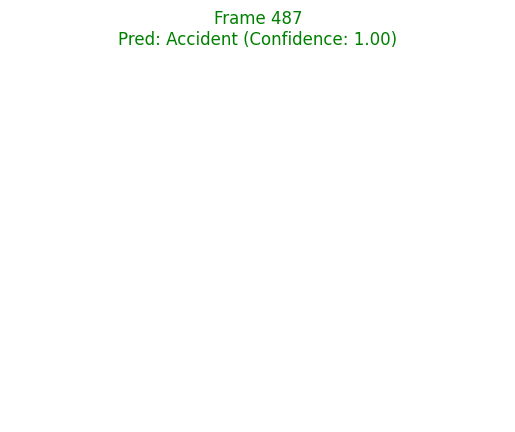

In [ ]:
import glob
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.base import MIMEBase
from email import encoders
from IPython.display import Video
from keras.models import load_model
import cv2
import numpy as np

# Load your Keras model
model = load_model('/content/AccidentDetectionModel.h5')

# Load your video
video_path = '/content/runs/detect/predict5/accident21.mp4'
cap = cv2.VideoCapture(video_path)
class_names = ['Accident', 'Non-Accident']

# Get video properties
fps = cap.get(cv2.CAP_PROP_FPS)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Define the codec and create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Adjust the codec as needed
output_video_path_combined = '/content/output_video_combined.mp4'
out_combined = cv2.VideoWriter(output_video_path_combined, fourcc, fps, (frame_width, frame_height))

# Email configuration
email_sender = 'Labissf@gmail.com'
email_receiver = 'adityabendale@gmail.com'
email_password = 'ozviuxfitfoqtofo'

# Initialize flag
accident_detected = False

# Loop through video frames
for frame_idx in range(frame_count):
    ret, frame = cap.read()
    if not ret:
        break

    # Convert to RGB
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Preprocess the frame (adjust this based on your model's requirements)
    input_size = (300, 300)  # Adjust this based on your model's input size
    frame_preprocessed = cv2.resize(frame, input_size)
    frame_preprocessed = frame_preprocessed.astype("float32") / 255.0
    frame_preprocessed = np.expand_dims(frame_preprocessed, axis=0)

    # Make predictions for the frame
    predictions = model.predict(frame_preprocessed)

    # Get predicted label and confidence
    pred_label = class_names[np.argmax(predictions)]
    confidence = np.max(predictions)

    # Display the prediction and confidence on the frame
    cv2.putText(frame, f'Prediction: {pred_label}', (500, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
    cv2.putText(frame, f'Confidence: {confidence:.2f}', (500, 70), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

    # Adjust the title based on prediction correctness
    if confidence > 0.5:
        plt.title(f'Frame {frame_idx + 1}\nPred: {pred_label} (Confidence: {confidence:.2f})', color="green")

        # Send email only once when accident is detected
        if pred_label == 'Accident' and not accident_detected:
            # Set the flag
            accident_detected = True
            # Email content
            subject = 'Accident Detected!'
            body = 'An accident has been detected. Please check the attached video for details.'

            # Create the MIME object
            msg = MIMEMultipart()
            msg['From'] = email_sender
            msg['To'] = email_receiver
            msg['Subject'] = subject

            # Attach the video to the email
            attachment = open(output_video_path_combined, 'rb')
            video_attachment = MIMEBase('application', 'octet-stream')
            video_attachment.set_payload(attachment.read())
            encoders.encode_base64(video_attachment)
            video_attachment.add_header('Content-Disposition', f'attachment; filename={output_video_path_combined}')
            msg.attach(video_attachment)

            # Attach the email body
            msg.attach(MIMEText(body, 'plain'))

            # Connect to the SMTP server and send the email
            try:
                smtp_server = smtplib.SMTP(host='smtp.gmail.com', port=587)
                smtp_server.starttls()
                smtp_server.login(email_sender, email_password)
                smtp_server.sendmail(email_sender, email_receiver, msg.as_string())
            except smtplib.SMTPAuthenticationError as e:
                print("Failed to authenticate with the SMTP server:", e)

    else:
        plt.title(f'Frame {frame_idx + 1}\nPred: {pred_label} (Low Confidence)', color="red")
    cv2.putText(frame, 'Email Sent!', (500, 500), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2, cv2.LINE_AA)
    plt.axis('off')
    plt.grid(True)

    # Write the frame to the output video
    out_combined.write(cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))

# Save the plotted figure
# plt.savefig('/content/video_predictions.png')

# Release the video capture and writer objects
cap.release()
out_combined.release()

# Display the combined output video in the notebook
Video('/content/output_video_combined.mp4', width=600)


In [ ]:
from smtplib import SMTPAuthenticationError